## Решение двумерного волнового уравнения
#### с отражающими граничными условиями

In [1]:
import numpy as np
import math as m
from sympy import *
#from sympy.abc import x
import pylab as py
from JSAnimation import IPython_display
import matplotlib.animation as animation
import matplotlib.pyplot as plt
from numpy import linalg as LA
from scipy.interpolate import interp1d
%matplotlib inline

In [2]:
print 'Enter number of segments'
n = int(raw_input()) #кол-во отрезков
print 'Enter ends of segment'
a , b = raw_input().split() #отрезок
a = float(a)
b = float(b)
h = (b - a) / n

Enter number of segments
100
Enter ends of segment
-1 1


In [3]:
A1 = np.array([[0,-1,0],[-1,0,0],[0,0,0]])
A1s = [0 for i in range(n)]
for i in range(n):
    A1s[i] = A1

In [4]:
A2 = np.array([[0,0,-1],[0,0,0],[-1,0,0]])
A2s = [0 for i in range(n)]
for i in range(n):
    A2s[i] = A2

In [6]:
np.shape(A1s)

(100, 3, 3)

In [13]:
print A1s[0]

[[ 0 -1  0]
 [-1  0  0]
 [ 0  0  0]]


In [14]:
lam1s = [0 for i in range(n)]
OMEGA1_s = [0 for i in range(n)]
OMEGA1s = [0 for i in range(n)]
lam2s = [0 for i in range(n)]
OMEGA2_s = [0 for i in range(n)]
OMEGA2s = [0 for i in range(n)]

In [15]:
for i in range(n):
    lam, OMEGA_ = LA.eig(A1s[i])
    lam = np.array([lam[1], lam[2], lam[0]])
    OMEGA_ = np.array([OMEGA_[:, 1], OMEGA_[:, 2], OMEGA_[:, 0]])
    OMEGA_ = np.transpose(OMEGA_)
    OMEGA = LA.inv(OMEGA_)
    lam1s[i] = lam
    OMEGA1_s[i] = OMEGA_
    OMEGA1s[i] = OMEGA

In [16]:
for i in range(n):
    lam, OMEGA_ = LA.eig(A2s[i])
    lam = np.array([lam[1], lam[2], lam[0]])
    OMEGA_ = np.array([OMEGA_[:, 1], OMEGA_[:, 2], OMEGA_[:, 0]])
    OMEGA_ = np.transpose(OMEGA_)
    OMEGA = LA.inv(OMEGA_)
    lam2s[i] = lam
    OMEGA2_s[i] = OMEGA_
    OMEGA2s[i] = OMEGA

In [19]:
print A2s[1]

[[ 0  0 -1]
 [ 0  0  0]
 [-1  0  0]]


In [25]:
LAMBDA1s = [0 for i in range(n)]
LAMBDA = np.zeros([3,3])
for j in range(n):
    for i in range(3):
        LAMBDA[i,i] = lam1s[j][i]
    LAMBDA1s[j] = LAMBDA

In [26]:
LAMBDA2s = [0 for i in range(n)]
LAMBDA = np.zeros([3,3])
for j in range(n):
    for i in range(3):
        LAMBDA[i,i] = lam2s[j][i]
    LAMBDA2s[j] = LAMBDA

In [27]:
np.shape(LAMBDA1s)

(100, 3, 3)

In [29]:
TEMP = np.matmul(OMEGA1_s[1], LAMBDA1s[1])
print np.matmul(TEMP, OMEGA1s[1])

[[ -1.01465364e-17  -1.00000000e+00   0.00000000e+00]
 [ -1.00000000e+00  -1.01465364e-17   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00]]


In [30]:
nul = [0,0,0]

In [38]:
Ds = [0 for i in range(3)]
for i in range(3):
    D = np.zeros([3,3])
    D[i,i] = 1
    Ds[i] = D

In [39]:
C1s = [0 for i in range(3)]
C2s = [0 for i in range(3)]
for i in range(3):
    TEMP = np.matmul(OMEGA1_s[0], Ds[i])
    C = np.matmul(TEMP, OMEGA1s[0])
    C1s[i] = C
    TEMP = np.matmul(OMEGA2_s[0], Ds[i])
    C = np.matmul(TEMP, OMEGA2s[0])
    C2s[i] = C

In [44]:
# tau = h / c *(X), такое что c*tau/h < 1
print 'Enter X for tau'
X = float(raw_input())

Enter X for tau
0.3


In [45]:
def f(x):
    if (a + 0.25*(b-a) <= x <= a + 0.5*(b-a)):
        return (x - (a + 0.25*(b-a))) / (0.25*(b-a))
    elif (a + 0.5*(b-a) <= x <= a + 0.75*(b-a)):
        return (x - (a + 0.75*(b-a))) / (-0.25*(b-a))
    else:
        return 0

In [46]:
def fp(x):
    if x >= 0:
        return f(x)
    else:
        return 0

In [47]:
U = np.zeros([10,n+1]) # решение
x = np.linspace(a, b, n+1) #сетка

In [48]:
#for j in range(5):
for i in range(n+1):
    U[3][i] = f(x[i])
    U[8][i] = f(x[i])

1.0


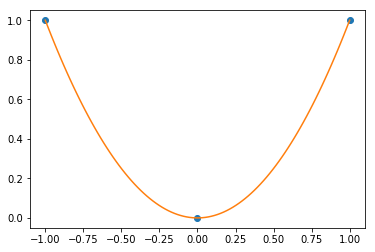

In [49]:
test = interp1d([-1, 0, 1], [1 ,0, 1], kind='quadratic')
print test(-1)
testx = np.linspace(-1, 1, 100)
testnew = test(testx)
plt.plot([-1, 0, 1], [1 ,0, 1], 'o', testx, testnew, '-')
plt.show()

In [50]:
right = interp1d(x, U[3])
right(0.135)

array(0.73)

In [51]:
print U[3]

[ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.04  0.08  0.12  0.16  0.2   0.24  0.28  0.32  0.36  0.4   0.44  0.48
  0.52  0.56  0.6   0.64  0.68  0.72  0.76  0.8   0.84  0.88  0.92  0.96
  1.    0.96  0.92  0.88  0.84  0.8   0.76  0.72  0.68  0.64  0.6   0.56
  0.52  0.48  0.44  0.4   0.36  0.32  0.28  0.24  0.2   0.16  0.12  0.08
  0.04 -0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.  ]


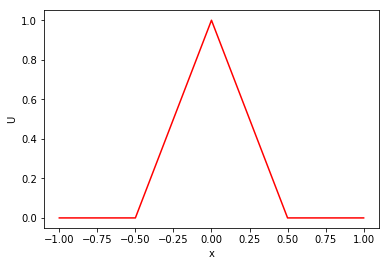

In [52]:
py.figure()
py.xlabel('x')
py.ylabel('U')
#py.ylim(0,1.1)
py.plot(x, U[3], 'r')
py.show()

In [53]:
lmax = max([max(lams[i]) for i in range(n)])
tau = h * X / lmax
print tau

0.00346410161514


In [54]:
result = []
result.append(list(U[3]))
x_ed = x[1:n]

In [55]:
print OMEGA[0]
print OMEGAs[0][0]

[ 0.60092521  0.          0.          1.040833    0.        ]
[ 0.60092521  0.          0.          1.040833    0.        ]


In [56]:
for i in range(1,n):
    '''print x[i-1], x[i] - lams[i-1][0]*tau, x[i+1]'''
    print x[i-1] <= x[i] - lams[i-1][0]*tau <= x[i+1]

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [57]:
time = int(1.0 / tau) + 1
print time

289


In [58]:
lams[0]

array([-1.73205081, -1.        ,  0.        ,  1.        ,  1.73205081])

In [59]:
for j in range(3*time):
    Um = []
    Up = []
    '''
    Um.append(list([0,0,0,0,0]))
    Up.append(list([0,0,0,0,0]))
    '''
    u01 = interp1d([x[0], x[1]], [U[0][0], U[0][1]])
    u02 = interp1d([x[0], x[1]], [U[1][0], U[1][1]])
    u03 = interp1d([x[0], x[1]], [U[2][0], U[2][1]])
    u04 = interp1d([x[0], x[1]], [U[3][0], U[3][1]])
    u05 = interp1d([x[0], x[1]], [U[4][0], U[4][1]])
    B = [OMEGAs[0][0], OMEGAs[0][1], OMEGAs[0][2], np.array([0,0,0,0,1]), np.array([0,0,0,1,0])]
    u0 = [u01(x[0] - lams[0][0]*tau), u02(x[0] - lams[0][0]*tau), u03(x[0] - lams[0][0]*tau), u04(x[0] - lams[0][0]*tau), u05(x[0] - lams[0][0]*tau)]
    right = [np.matmul(OMEGAs[0][0], u0)]
    u0 = [u01(x[0] - lams[0][1]*tau), u02(x[0] - lams[0][1]*tau), u03(x[0] - lams[0][1]*tau), u04(x[0] - lams[0][1]*tau), u05(x[0] - lams[0][1]*tau)]
    right = np.append(right, np.matmul(OMEGAs[0][1], u0))
    u0 = [u01(x[0] - lams[0][2]*tau), u02(x[0] - lams[0][2]*tau), u03(x[0] - lams[0][2]*tau), u04(x[0] - lams[0][2]*tau), u05(x[0] - lams[0][2]*tau)]
    right = np.append(right, np.matmul(OMEGAs[0][2], u0))
    right = np.append(right, [0,0])
    v = np.linalg.solve(B, right)
    Um.append(list(v))
    Up.append(list(v))
    for i in range(1,n):
        u01 = interp1d([x[i-1], x[i], x[i+1]], [U[0][i-1], U[0][i], U[0][i+1]])
        u02 = interp1d([x[i-1], x[i], x[i+1]], [U[1][i-1], U[1][i], U[1][i+1]])
        u03 = interp1d([x[i-1], x[i], x[i+1]], [U[2][i-1], U[2][i], U[2][i+1]])
        u04 = interp1d([x[i-1], x[i], x[i+1]], [U[3][i-1], U[3][i], U[3][i+1]])
        u05 = interp1d([x[i-1], x[i], x[i+1]], [U[4][i-1], U[4][i], U[4][i+1]])
        B = [np.append(OMEGAs[i][0], nul), np.append(OMEGAs[i][1], nul), np.append(OMEGAs[i][2], nul), np.append(nul, OMEGAs[i-1][2]), np.append(nul, OMEGAs[i-1][3]), np.append(nul, OMEGAs[i-1][4]), np.array([0,0,0,0,1,0,0,0,0,-1]), np.array([0,0,0,1,0,0,0,0,-1,0]),np.array([1,0,0,0,0,-1,0,0,0,0]),np.array([0,0,1,0,0,0,0,-1,0,0])]
        u0 = [u01(x[i] - lams[i][0]*tau), u02(x[i] - lams[i][0]*tau), u03(x[i] - lams[i][0]*tau), u04(x[i] - lams[i][0]*tau), u05(x[i] - lams[i][0]*tau)]
        right = [np.matmul(OMEGAs[i][0], u0)]
        u0 = [u01(x[i] - lams[i][1]*tau), u02(x[i] - lams[i][1]*tau), u03(x[i] - lams[i][1]*tau), u04(x[i] - lams[i][1]*tau), u05(x[i] - lams[i][1]*tau)]
        right = np.append(right, np.matmul(OMEGAs[i][1], u0))
        u0 = [u01(x[i] - lams[i][2]*tau), u02(x[i] - lams[i][2]*tau), u03(x[i] - lams[i][2]*tau), u04(x[i] - lams[i][2]*tau), u05(x[i] - lams[i][2]*tau)]
        right = np.append(right, np.matmul(OMEGAs[i][2], u0))
        u0 = [u01(x[i] - lams[i-1][2]*tau), u02(x[i] - lams[i-1][2]*tau), u03(x[i] - lams[i-1][2]*tau), u04(x[i] - lams[i-1][2]*tau), u05(x[i] - lams[i-1][2]*tau)]
        right = np.append(right, np.matmul(OMEGAs[i-1][2], u0))
        u0 = [u01(x[i] - lams[i-1][3]*tau), u02(x[i] - lams[i-1][3]*tau), u03(x[i] - lams[i-1][3]*tau), u04(x[i] - lams[i-1][3]*tau), u05(x[i] - lams[i-1][3]*tau)]
        right = np.append(right, np.matmul(OMEGAs[i-1][3], u0))
        u0 = [u01(x[i] - lams[i-1][4]*tau), u02(x[i] - lams[i-1][4]*tau), u03(x[i] - lams[i-1][4]*tau), u04(x[i] - lams[i-1][4]*tau), u05(x[i] - lams[i-1][4]*tau)]
        right = np.append(right, np.matmul(OMEGAs[i-1][4], u0))
        right = np.append(right, [0,0,0,0])
        v = np.linalg.solve(B, right)
        Up.append(list(v[:5]))
        Um.append(list(v[5:]))
    u01 = interp1d([x[n-1], x[n]], [U[0][n-1], U[0][n]])
    u02 = interp1d([x[n-1], x[n]], [U[1][n-1], U[1][n]])
    u03 = interp1d([x[n-1], x[n]], [U[2][n-1], U[2][n]])
    u04 = interp1d([x[n-1], x[n]], [U[3][n-1], U[3][n]])
    u05 = interp1d([x[n-1], x[n]], [U[4][n-1], U[4][n]])
    B = [OMEGAs[n-1][2], OMEGAs[n-1][3], OMEGAs[n-1][4], np.array([0,0,0,0,1]), np.array([0,0,0,1,0])]
    u0 = [u01(x[n] - lams[n-1][2]*tau), u02(x[n] - lams[n-1][2]*tau), u03(x[n] - lams[n-1][2]*tau), u04(x[n] - lams[n-1][2]*tau), u05(x[n] - lams[n-1][2]*tau)]
    right = [np.matmul(OMEGAs[n-1][2], u0)]
    u0 = [u01(x[n] - lams[n-1][3]*tau), u02(x[n] - lams[n-1][3]*tau), u03(x[n] - lams[n-1][3]*tau), u04(x[n] - lams[n-1][3]*tau), u05(x[n] - lams[n-1][3]*tau)]
    right = np.append(right, np.matmul(OMEGAs[n-1][3], u0))
    u0 = [u01(x[n] - lams[n-1][4]*tau), u02(x[n] - lams[n-1][4]*tau), u03(x[n] - lams[n-1][4]*tau), u04(x[n] - lams[n-1][4]*tau), u05(x[n] - lams[n-1][4]*tau)]
    right = np.append(right, np.matmul(OMEGAs[n-1][4], u0))
    right = np.append(right, [0,0])
    v = np.linalg.solve(B, right)
    Um.append(list(v))
    Up.append(list(v))
    for i in range(5):
        U[i] = np.array(Um)[:, i]
    result.append(list(U[3]))

In [60]:
lams[n-1][4]

1.7320508075688772

[-1.0, 1.0, -1, 1]

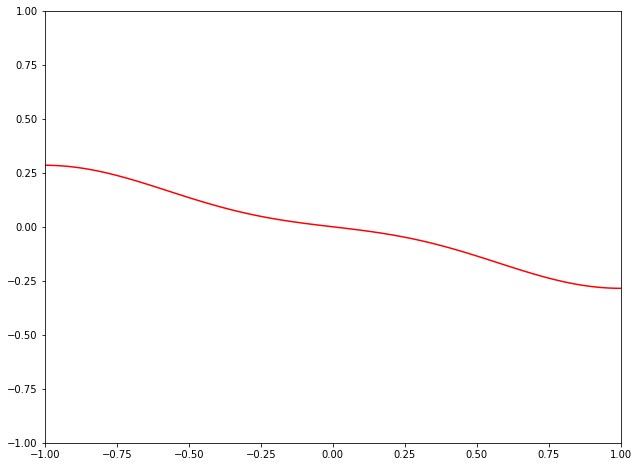

In [61]:
fig = plt.figure(figsize=(8, 6))
axis = fig.add_axes([0, 0, 1, 1])
axis.clear()
axis.plot(x, np.array(Um)[:, 1], 'r') #, x, result[1][i], 'b')
axis.axis([a, b, -1, 1])


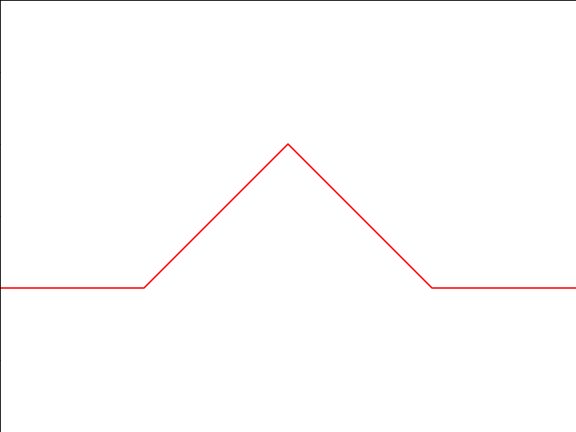
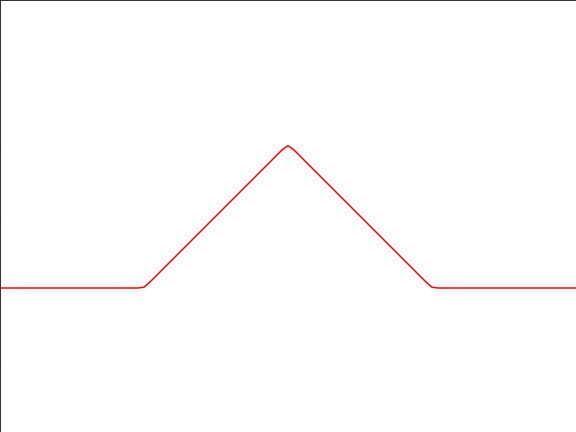
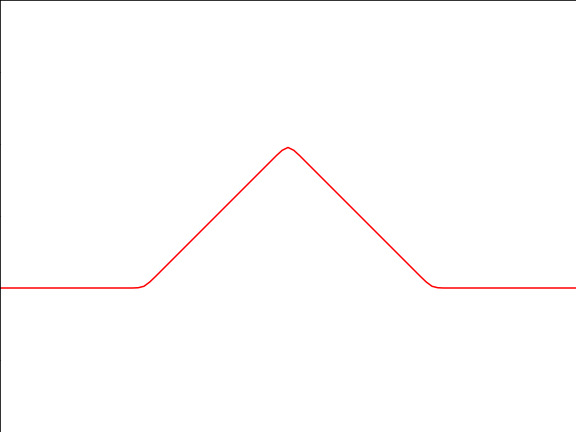
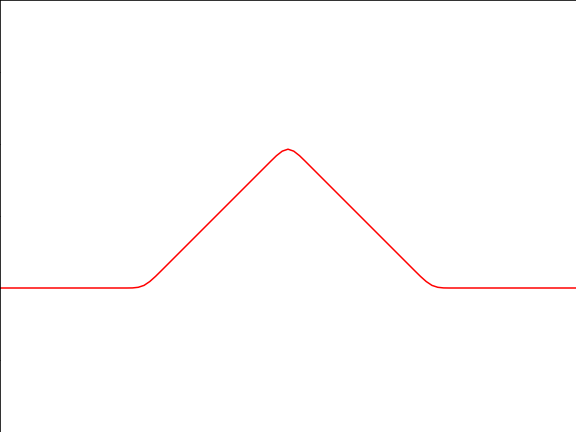
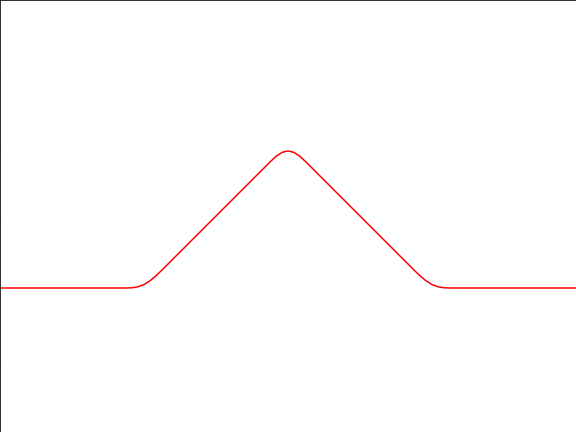
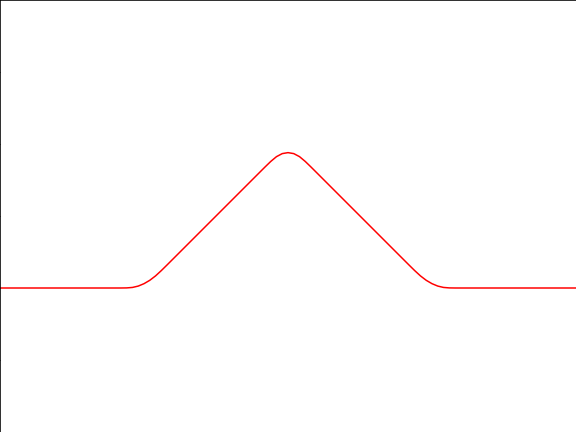
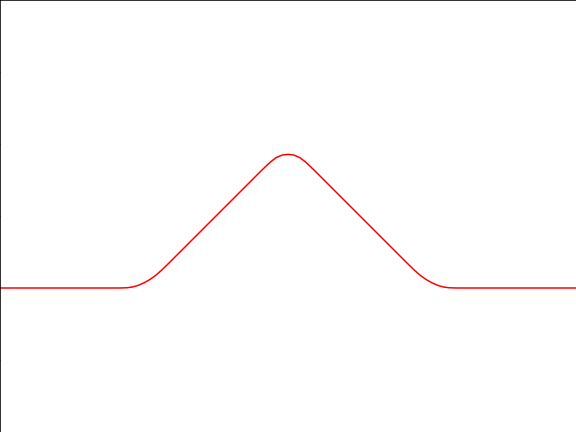
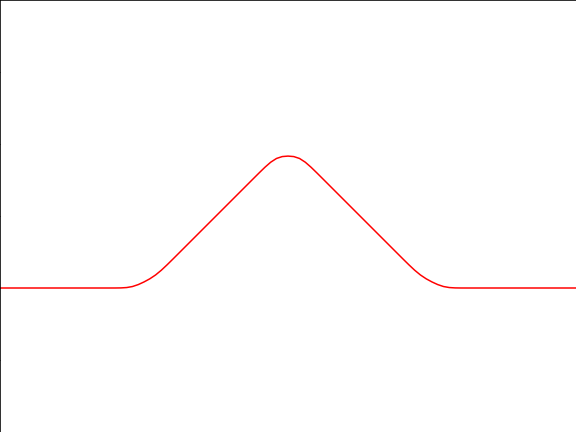
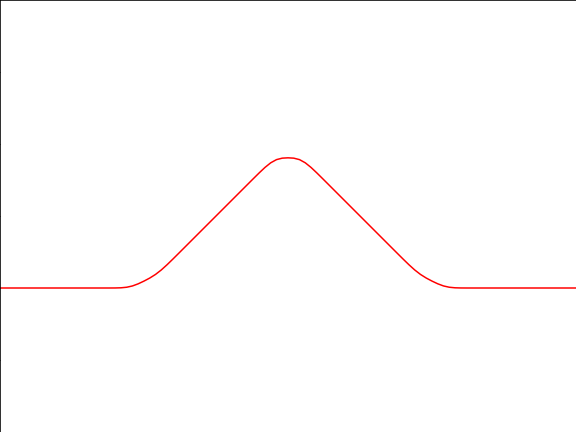
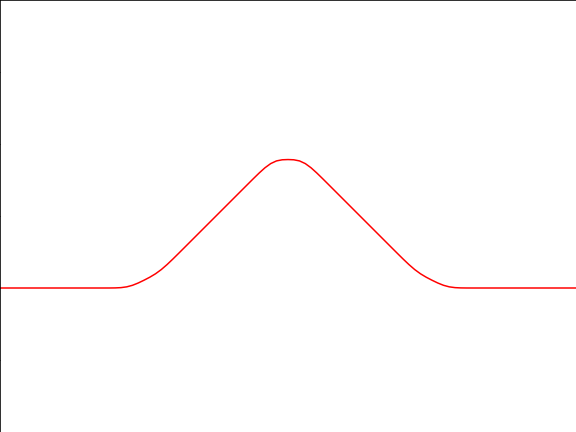
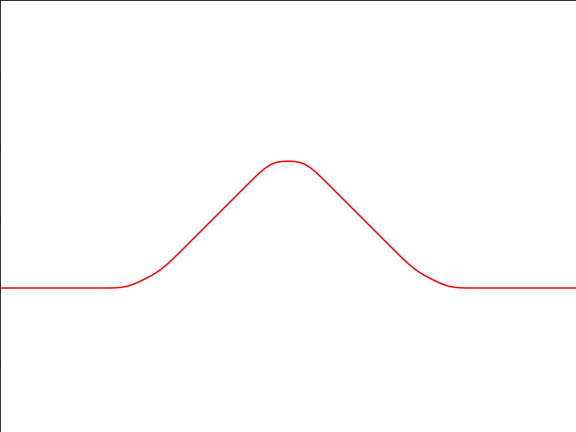
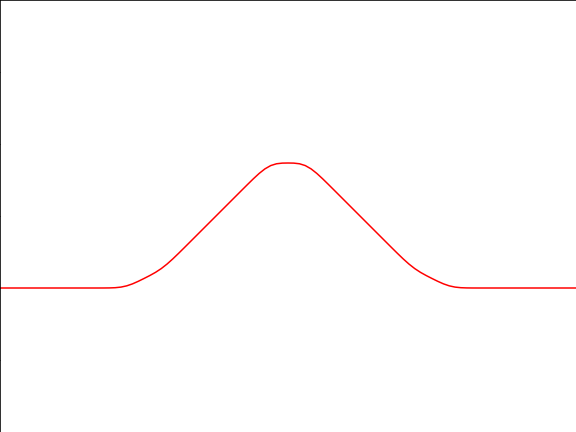
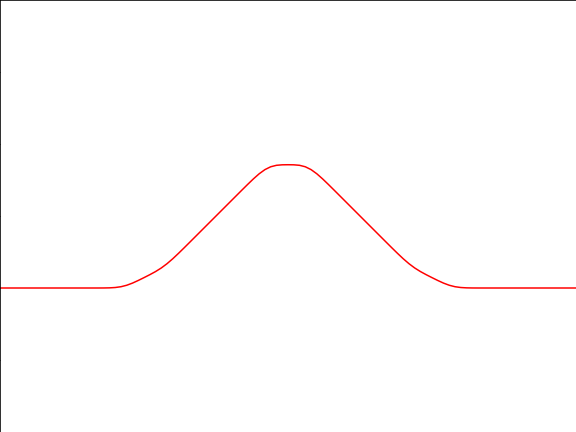
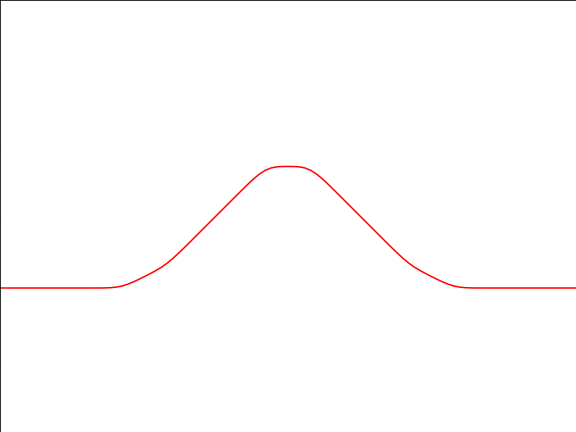
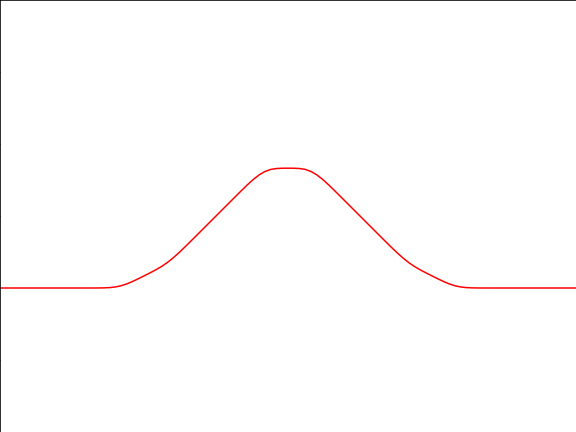
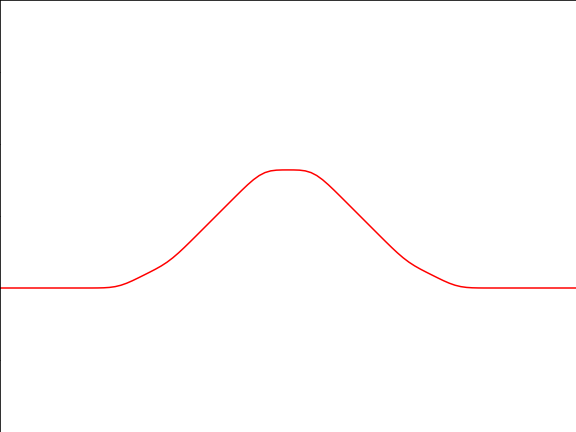
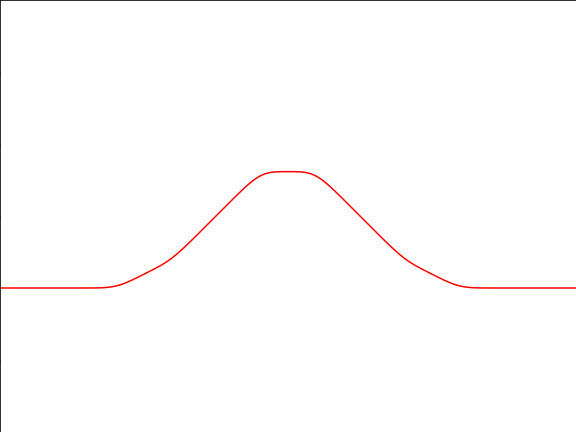
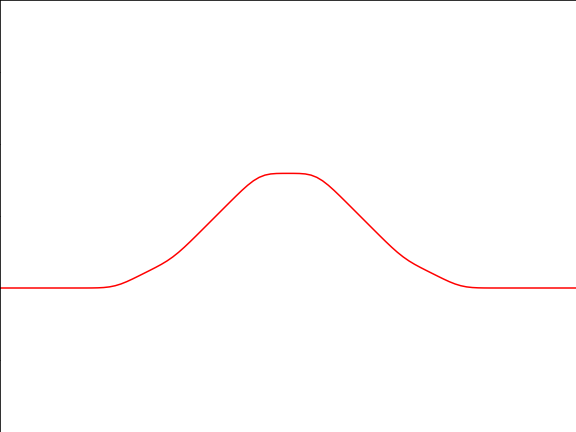
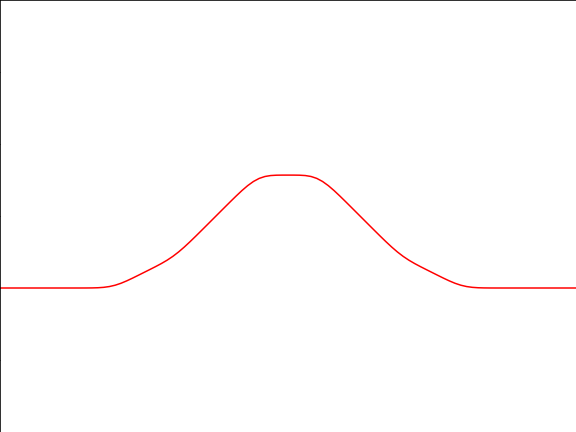
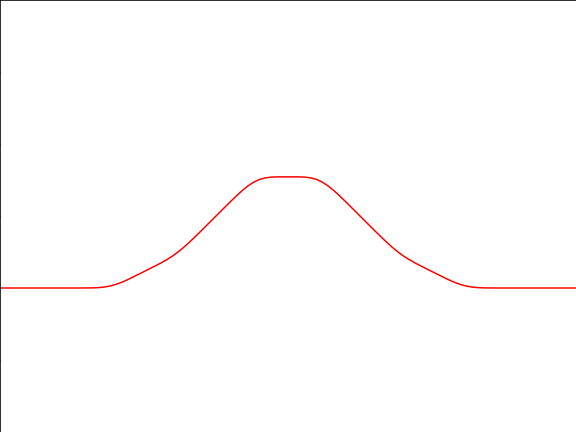
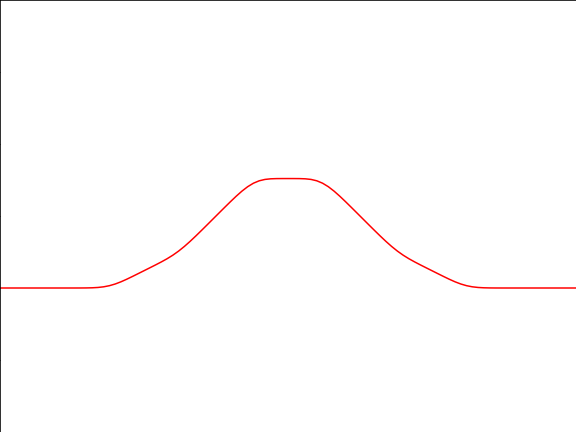
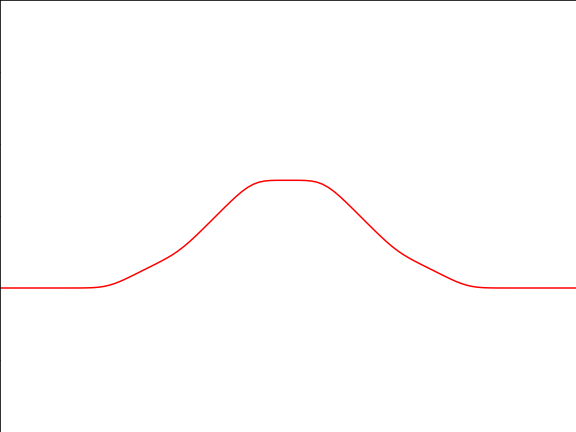
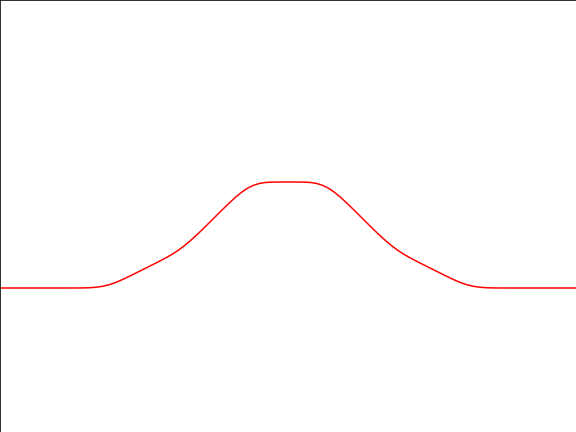
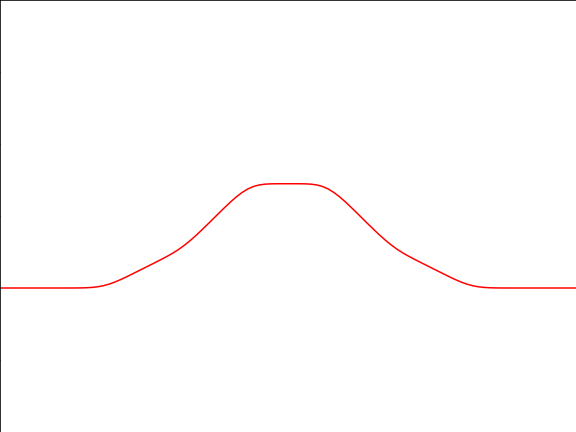
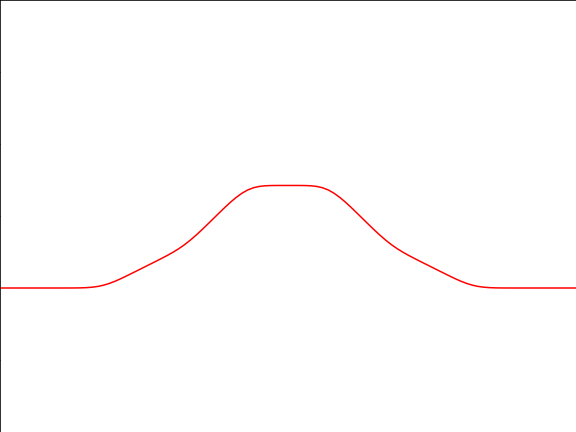
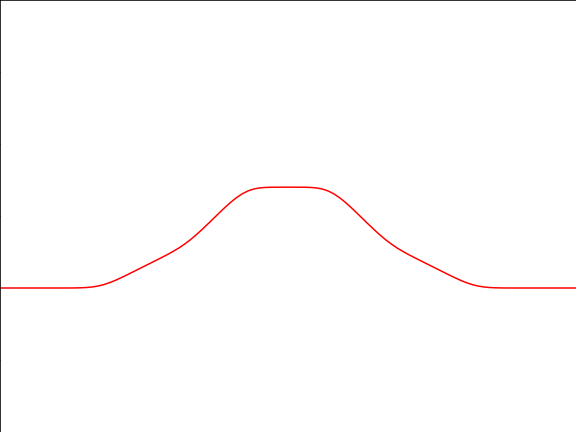
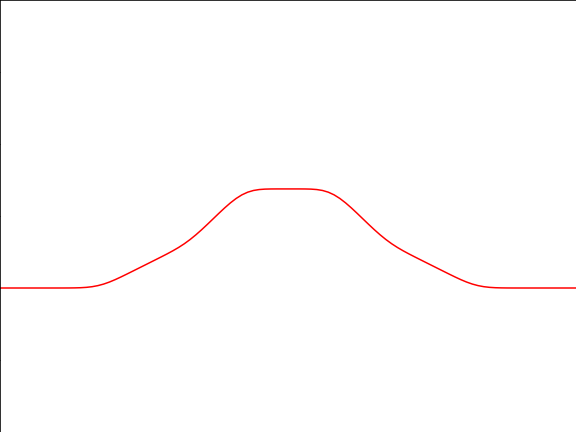
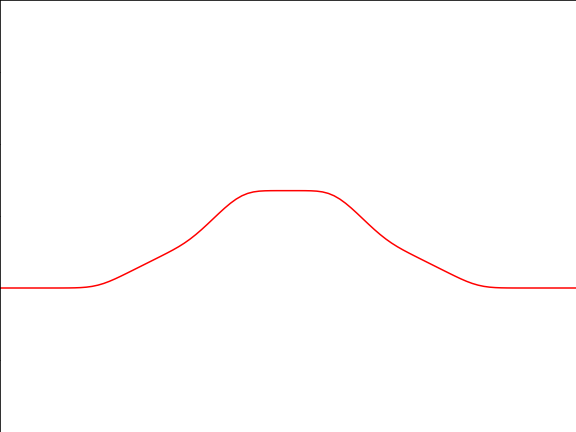
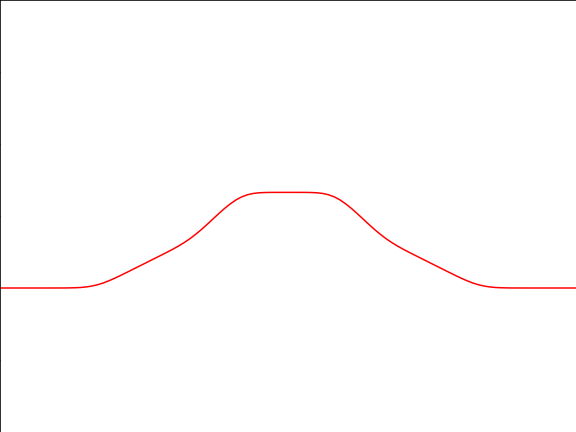
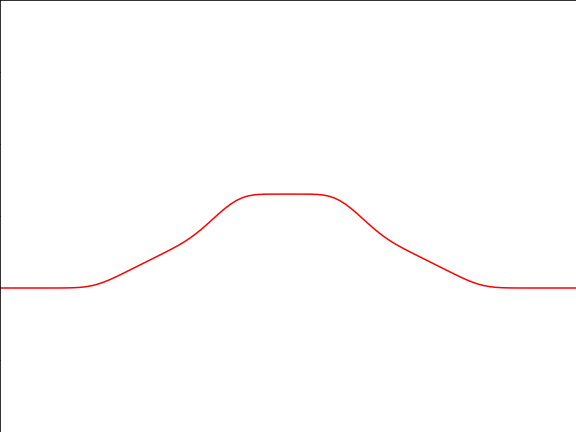
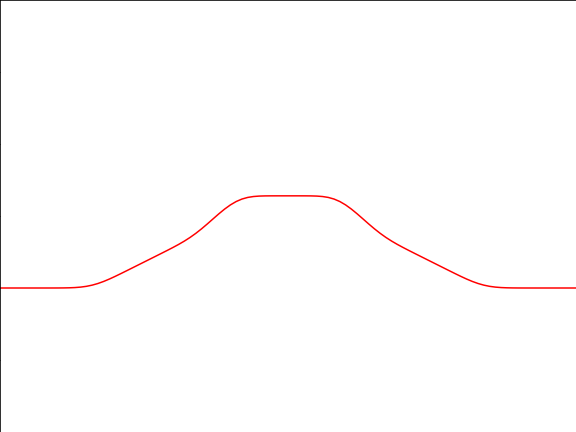
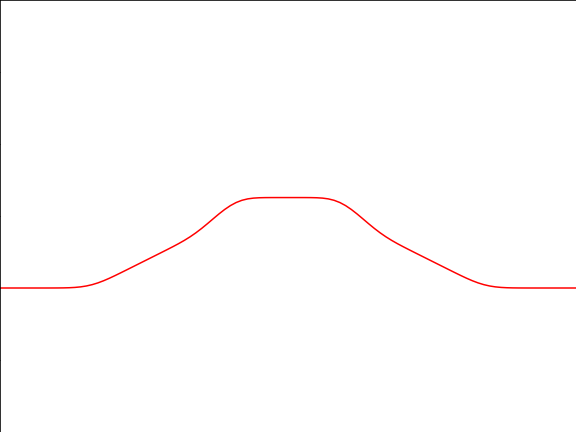
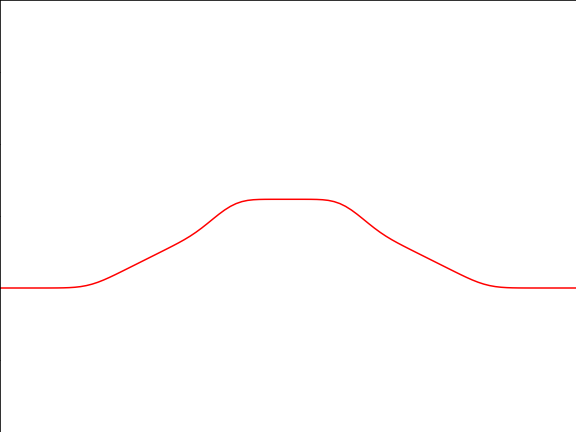
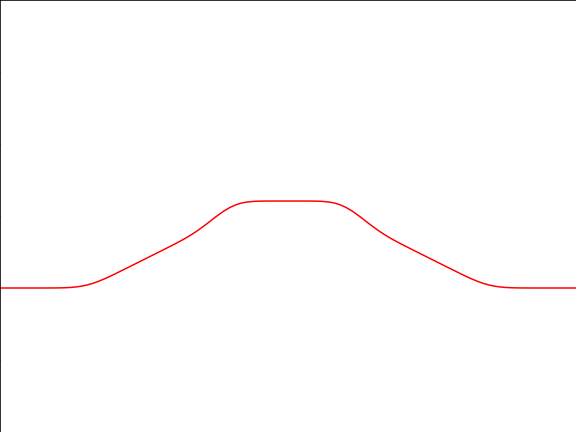
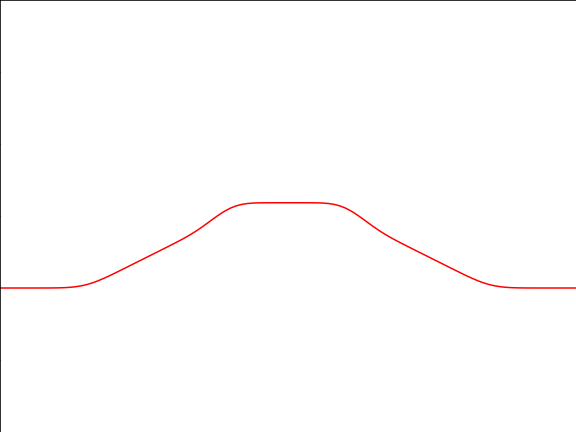
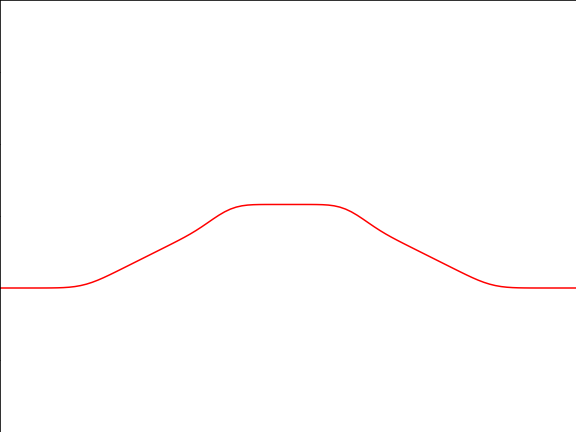
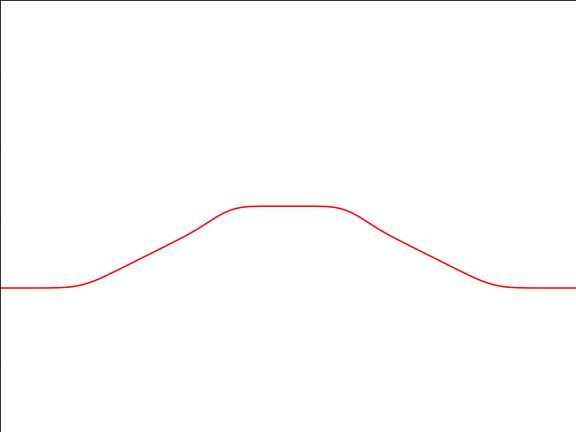
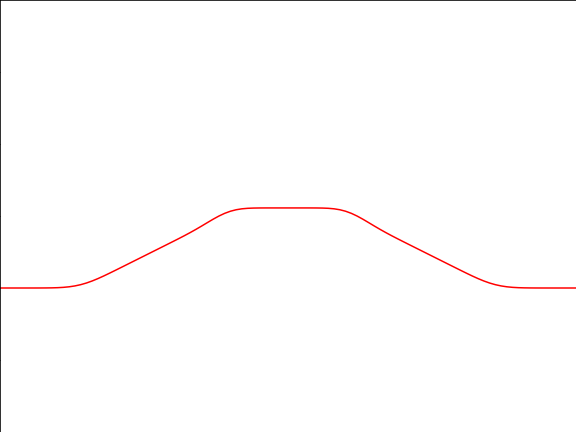
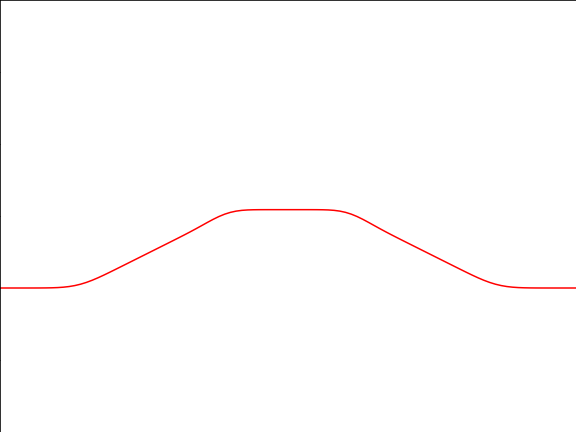
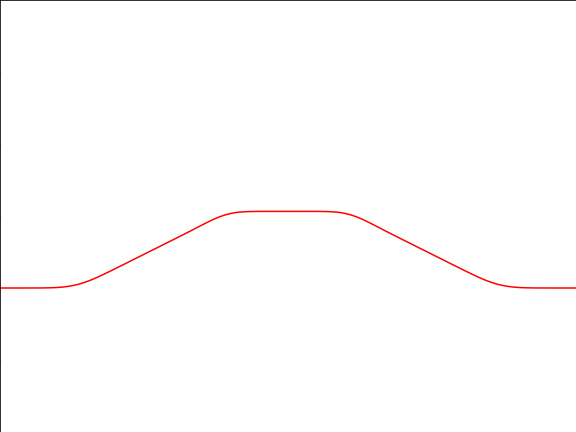
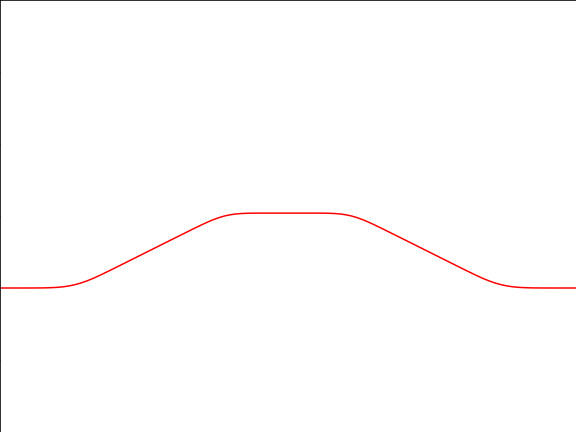
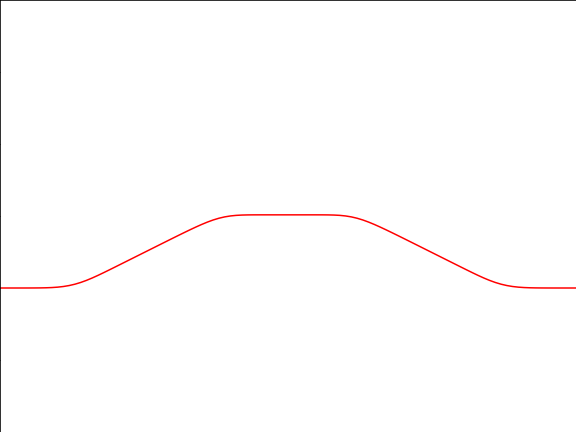
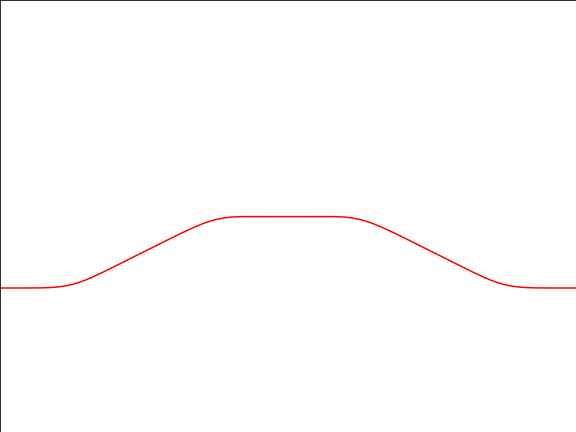
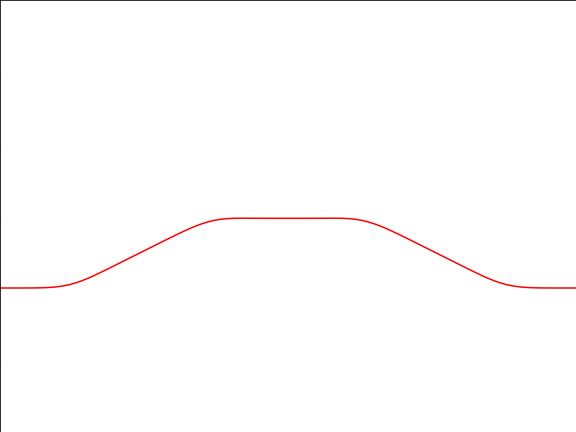
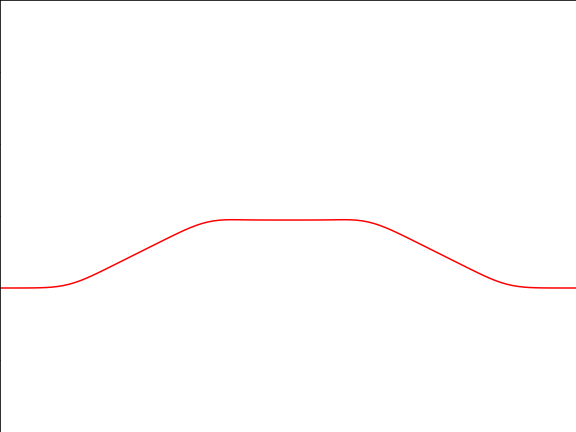
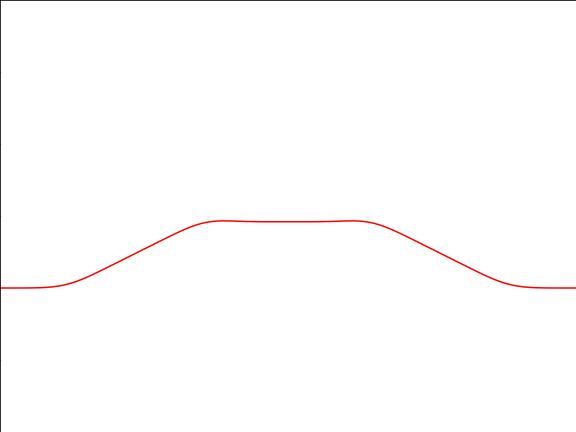
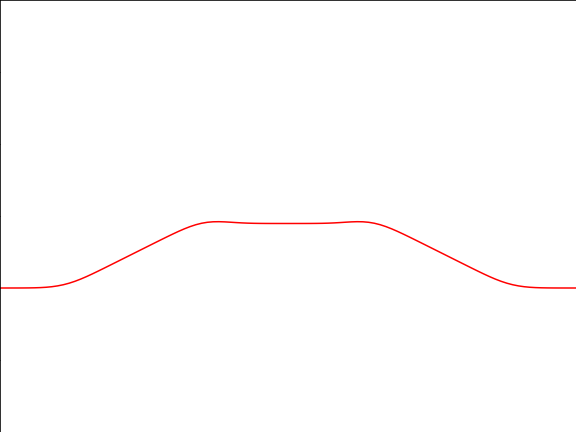
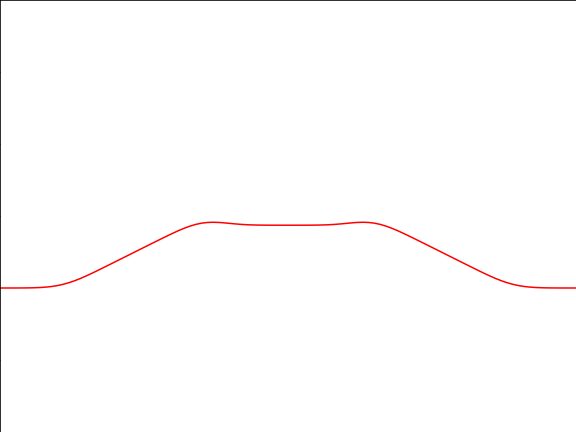
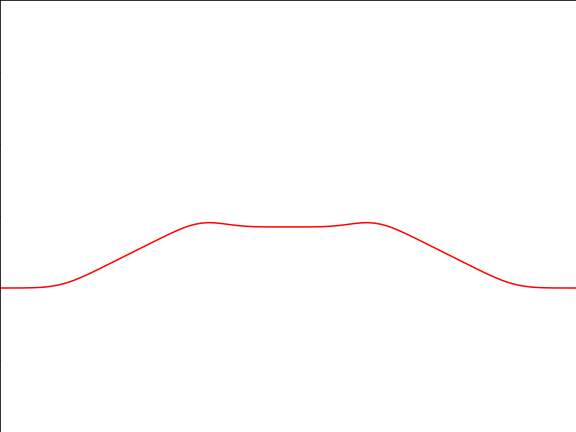
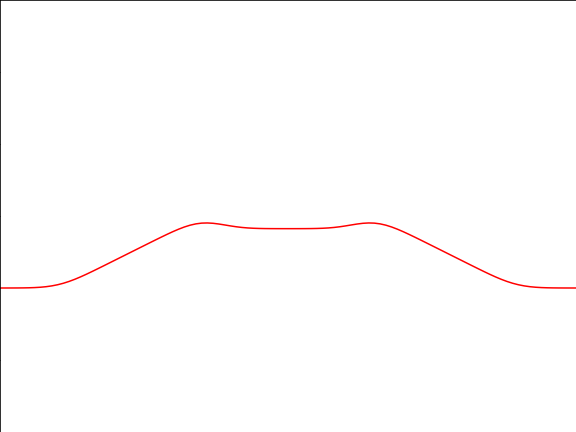
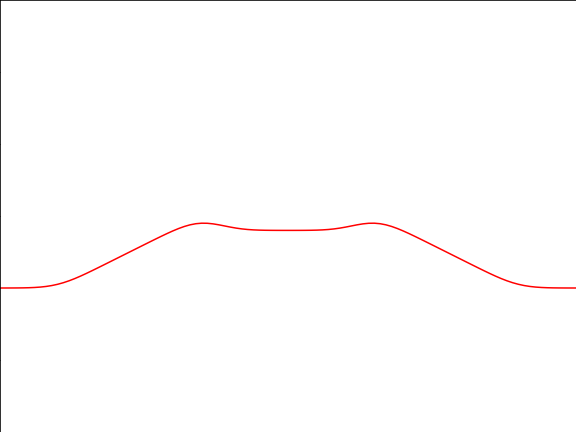
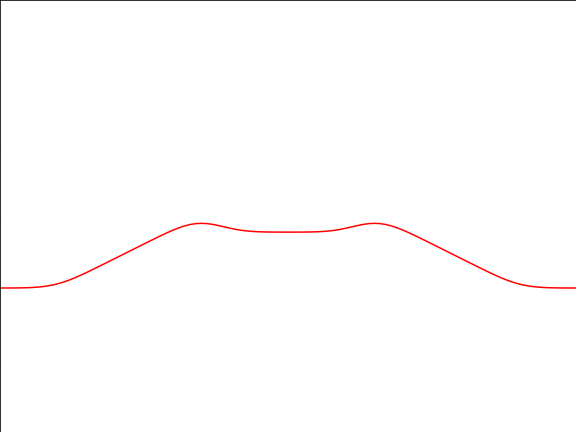
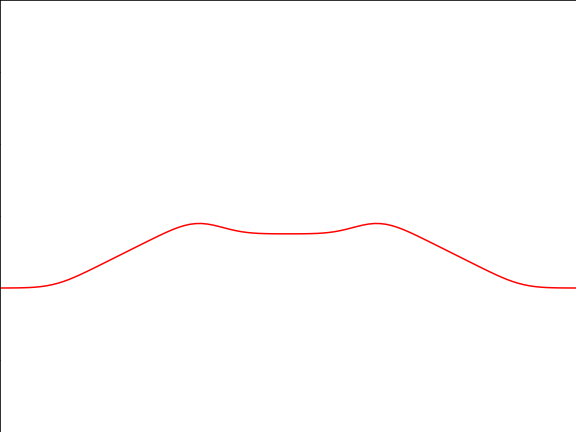
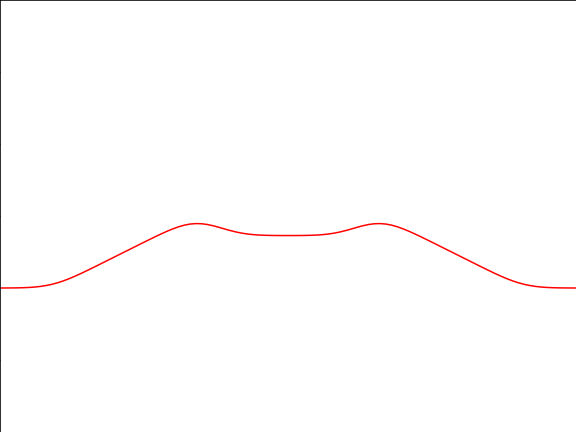
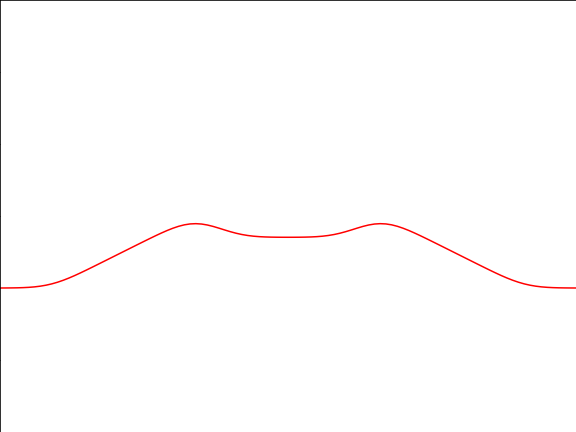
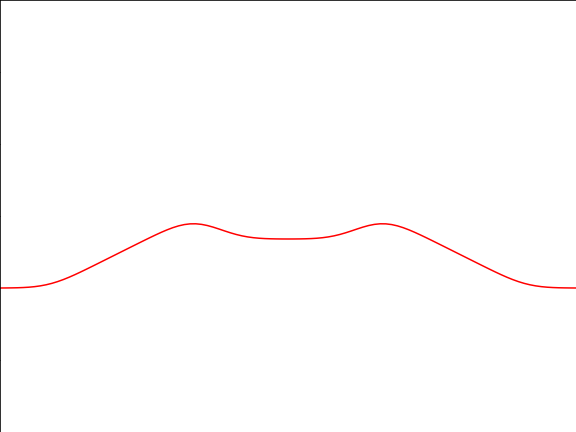
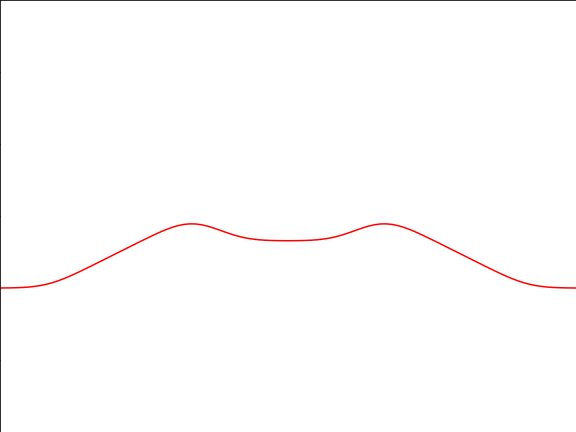
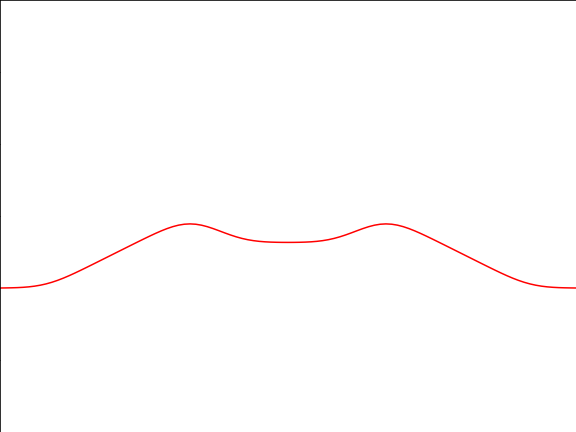
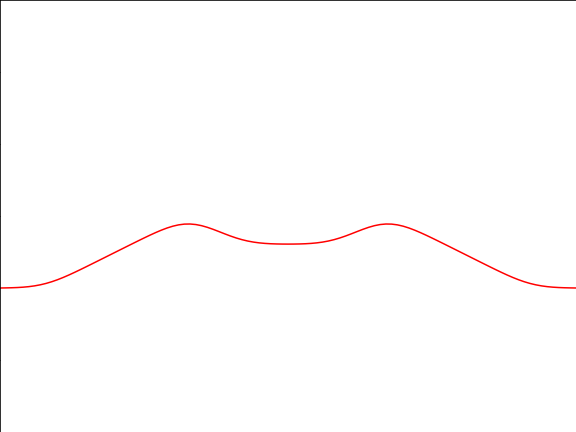
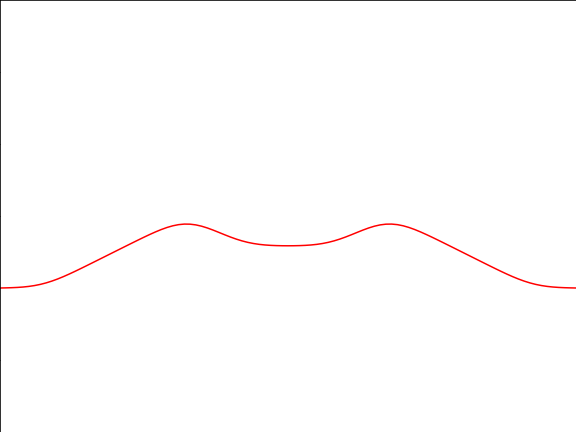
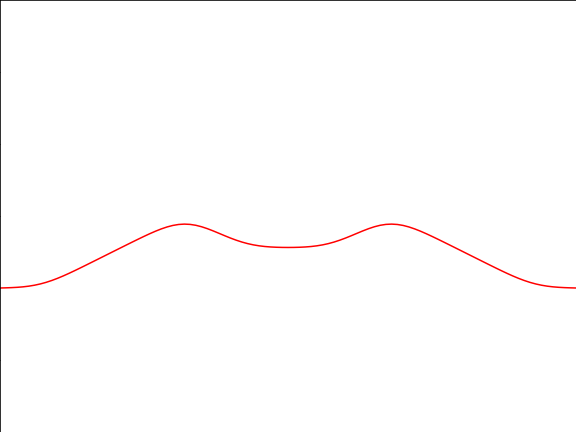
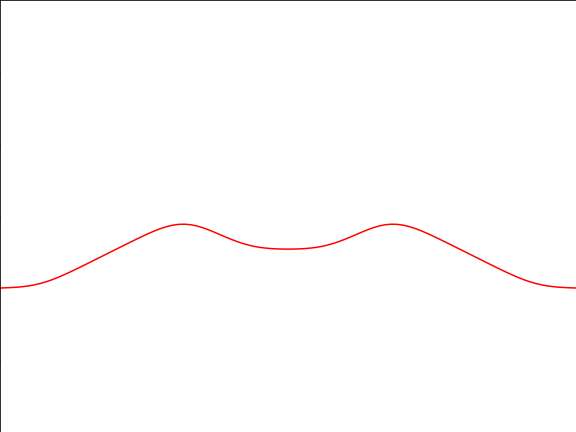
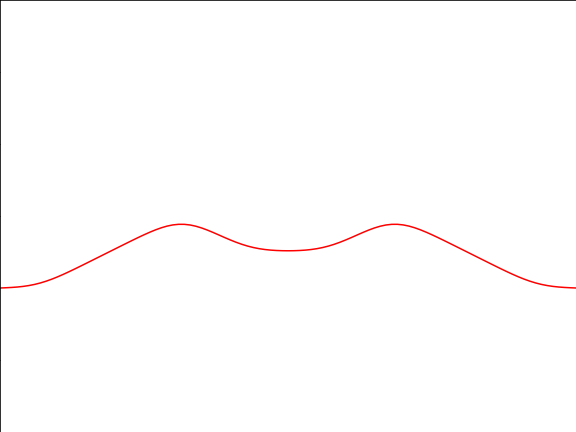
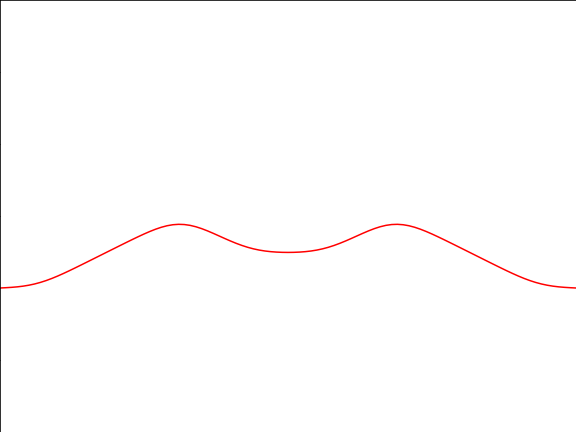
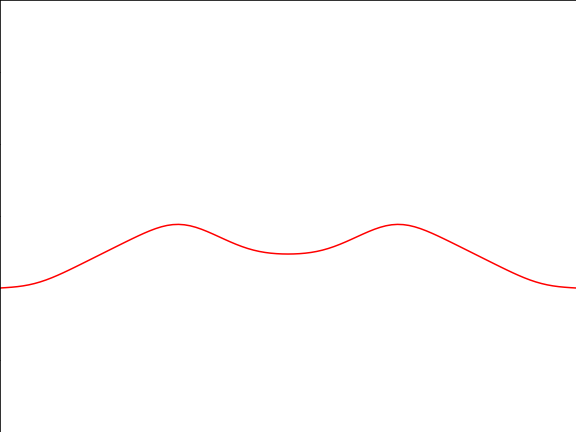
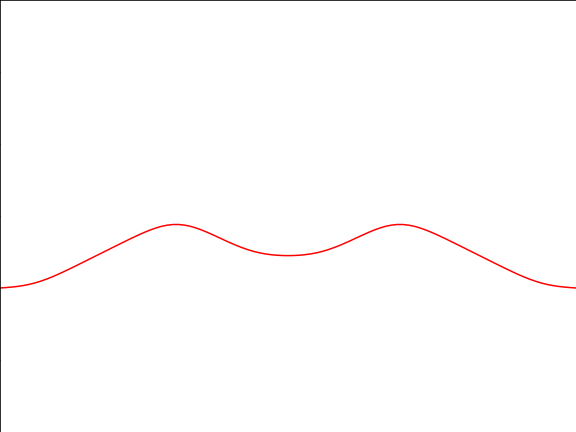
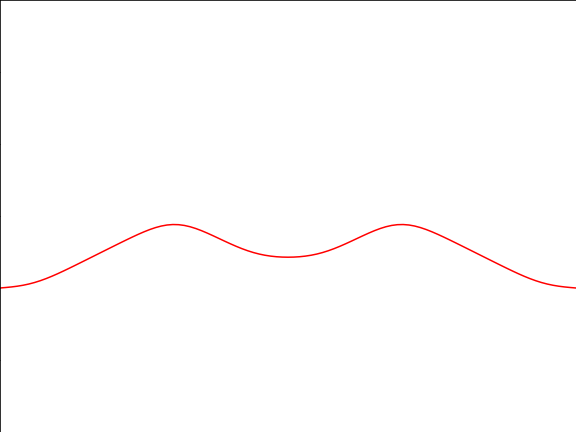
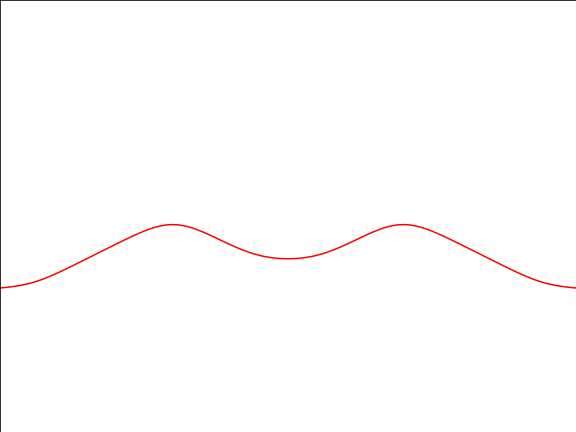
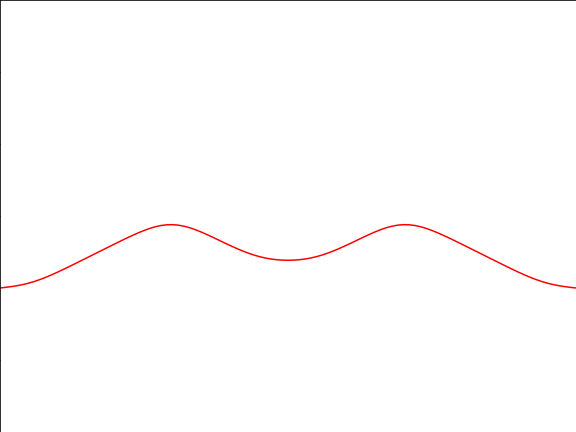
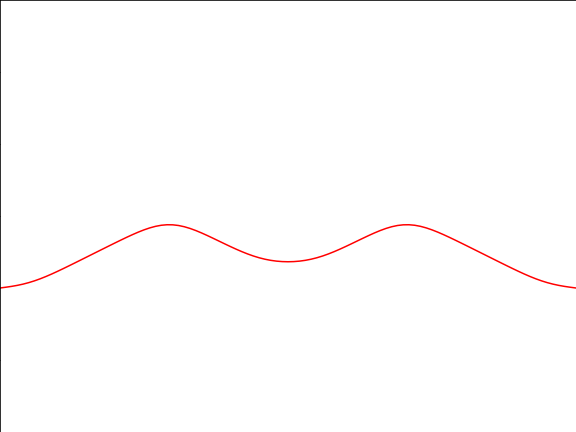
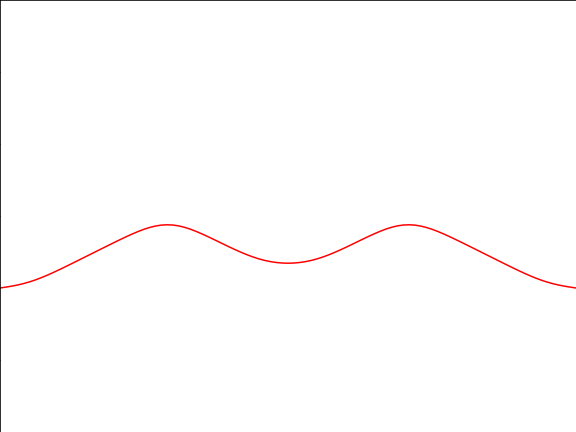
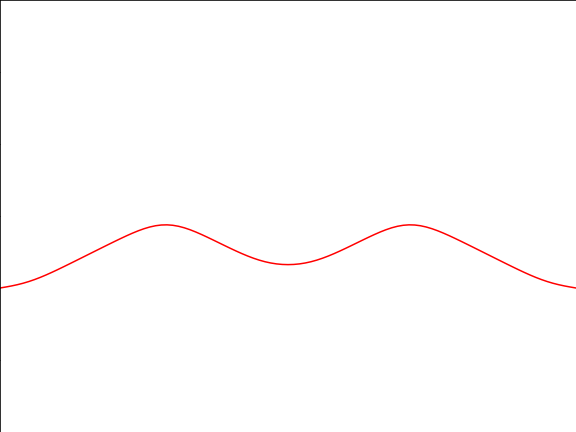
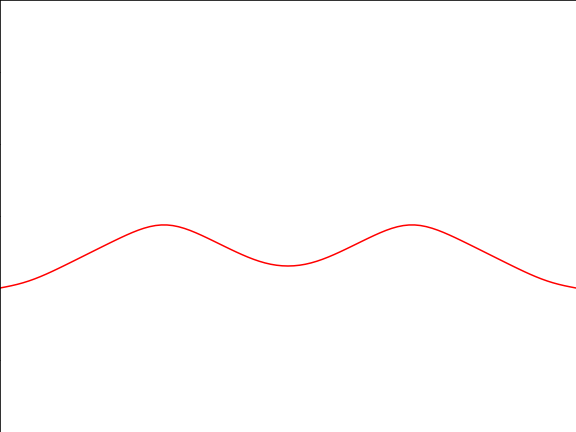
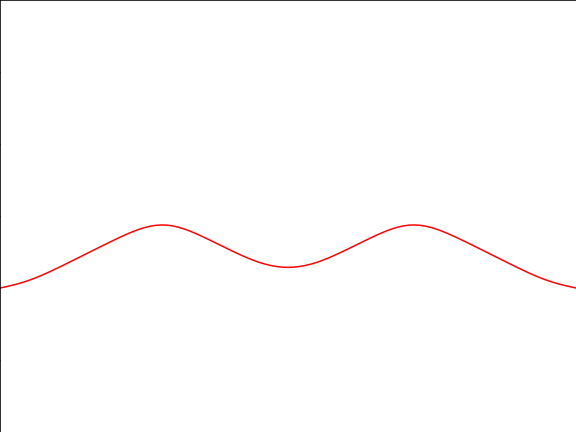
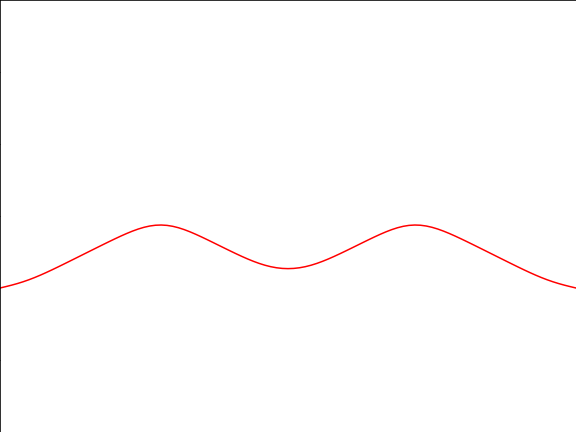
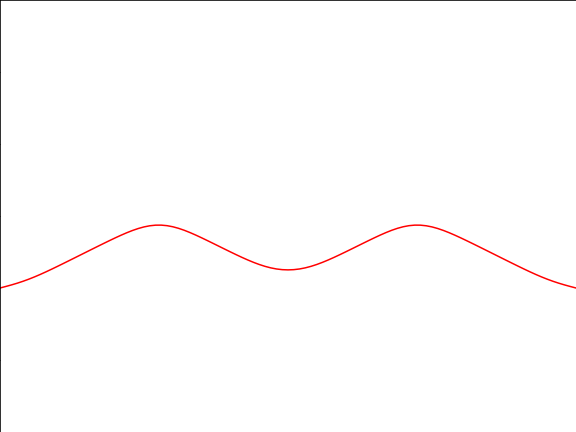
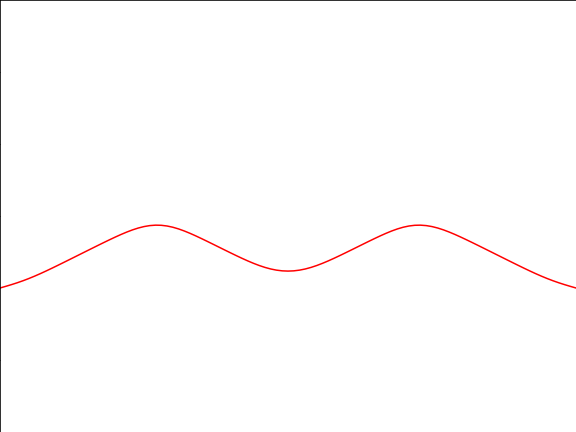
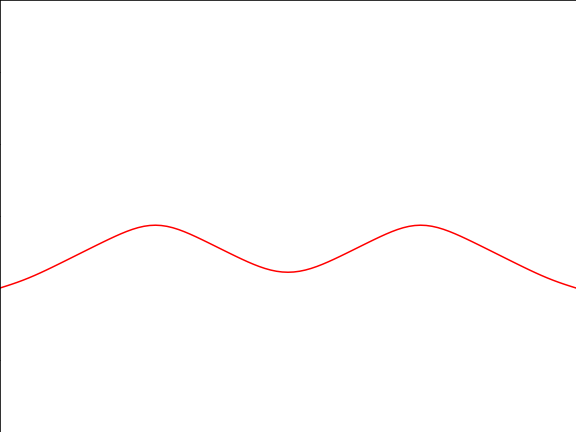
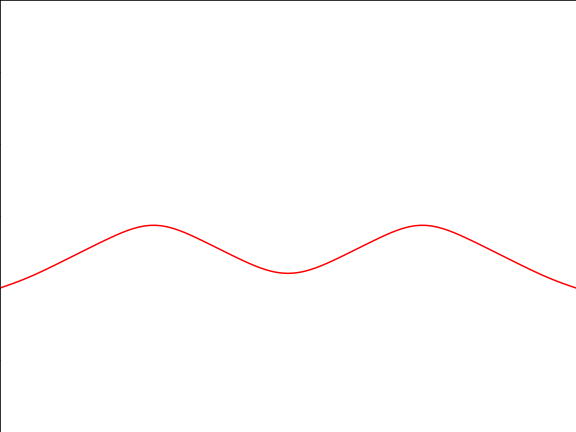
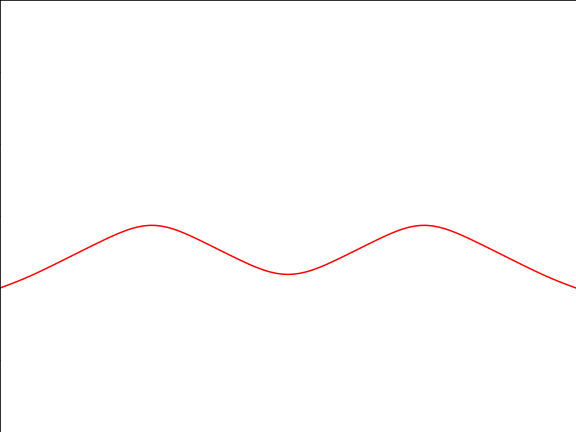
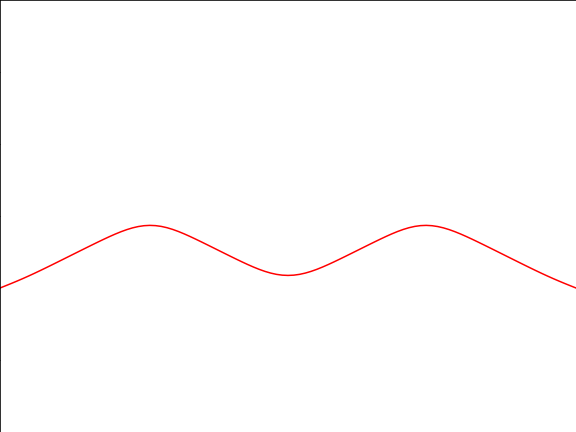
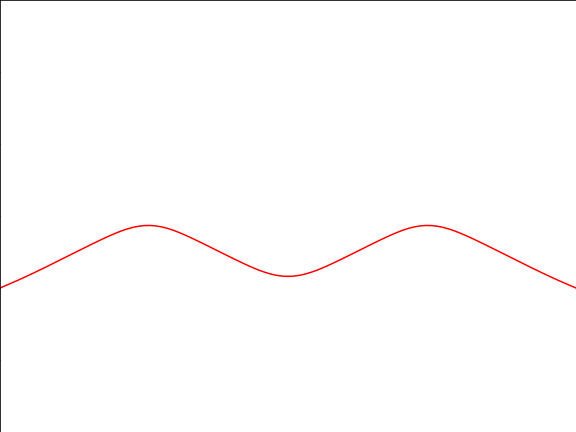
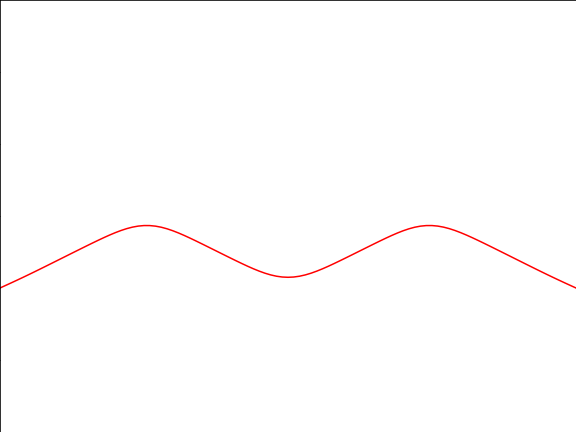
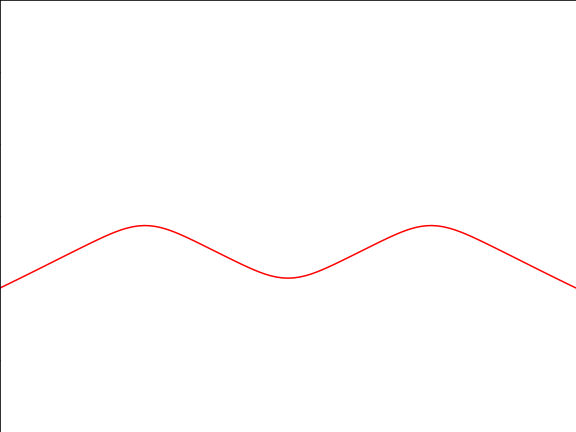
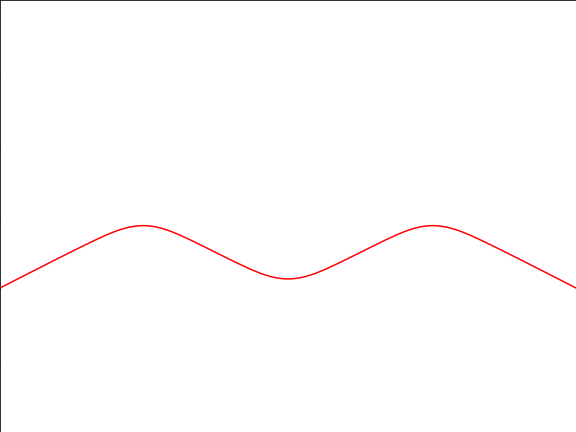
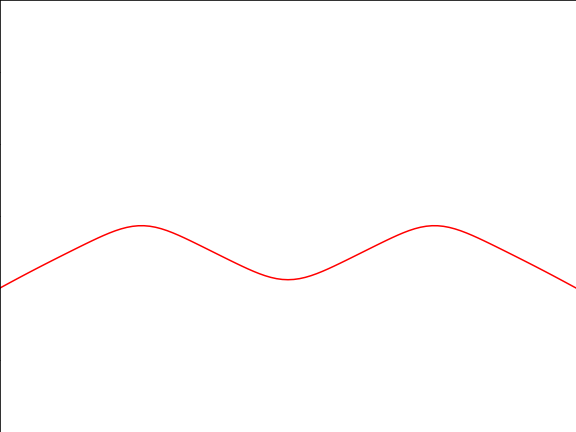
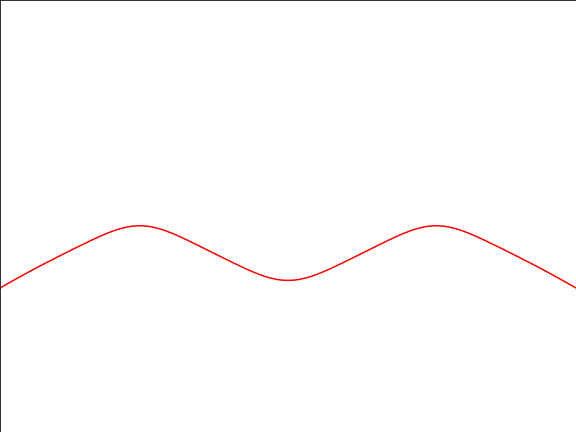
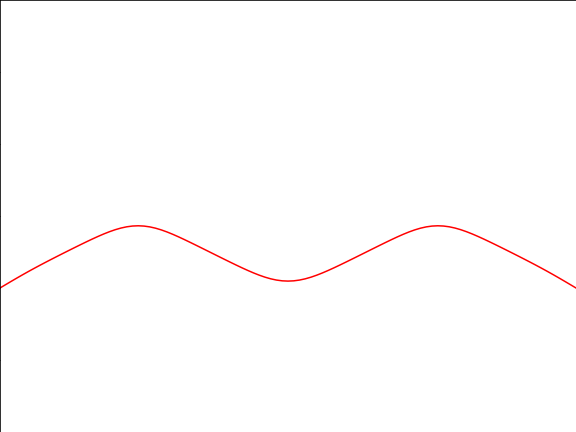
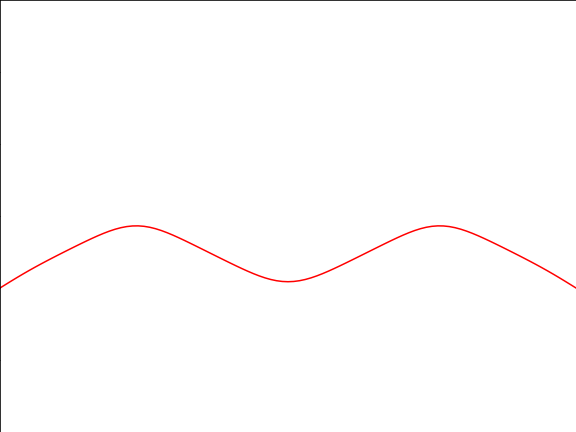
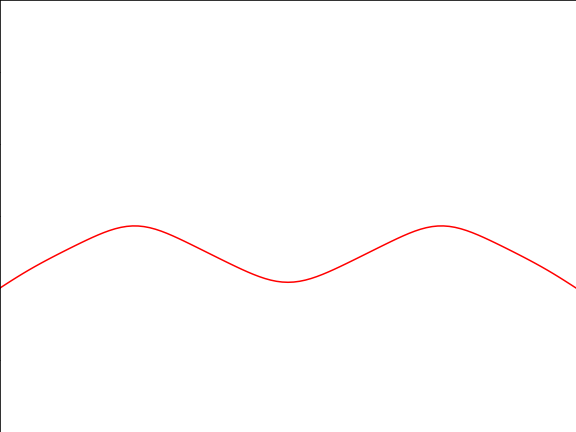
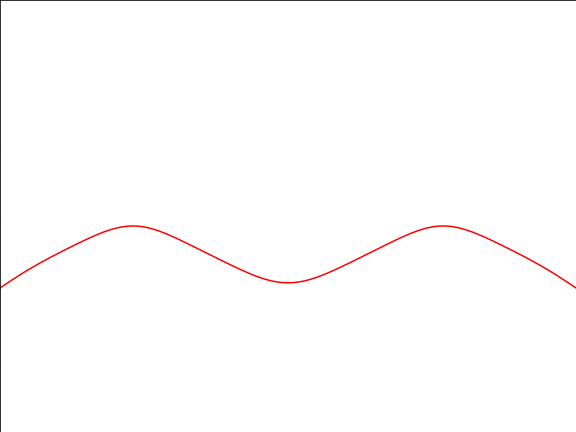
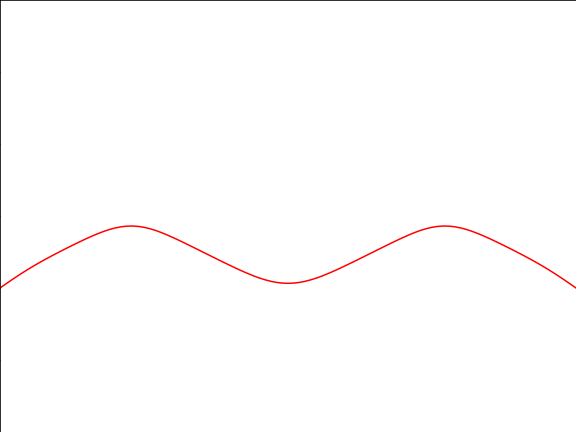
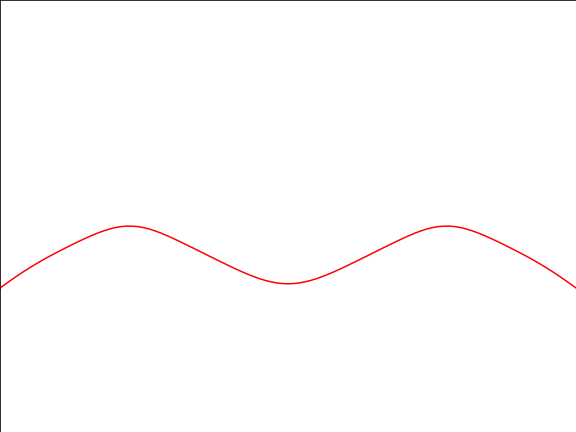
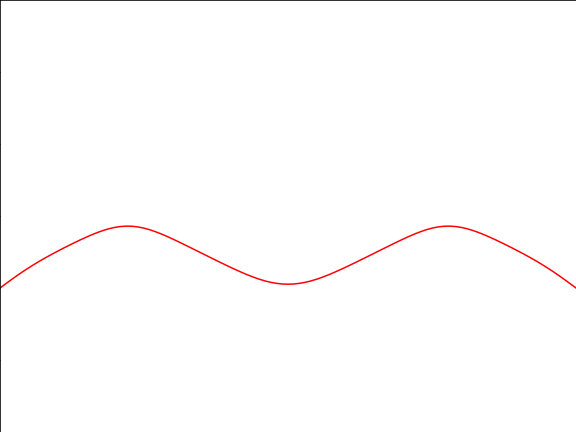
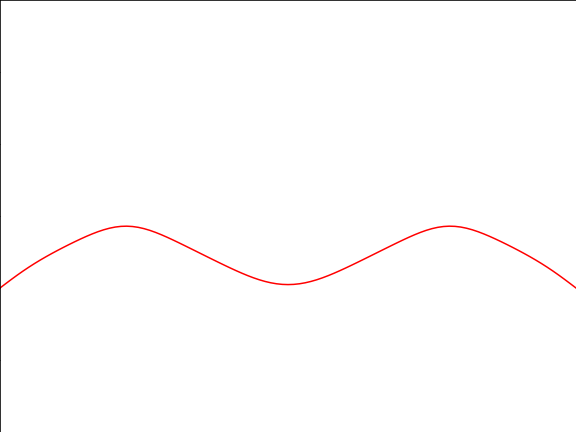
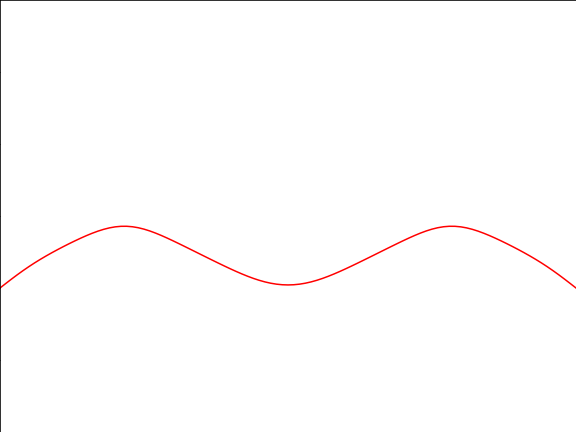
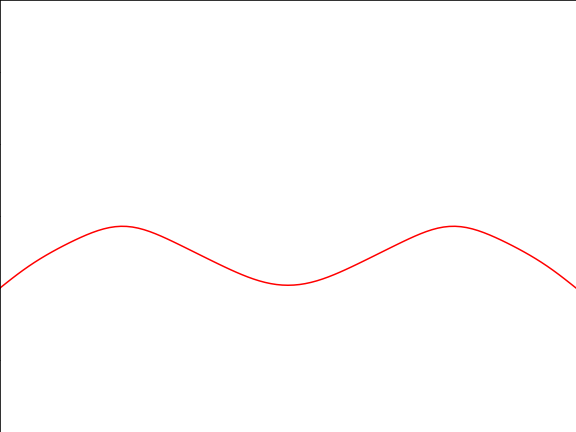
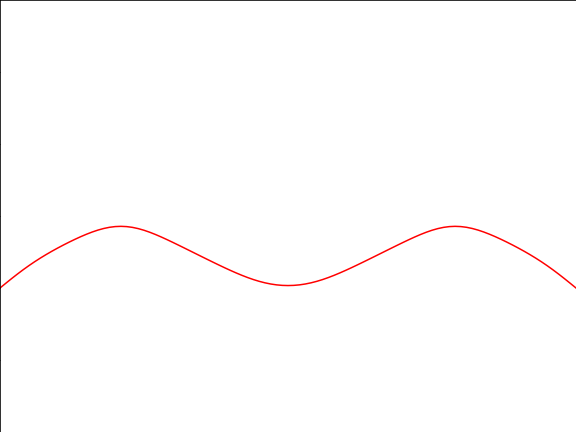
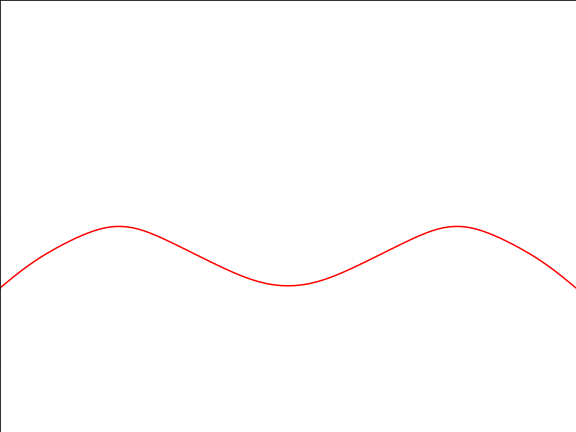
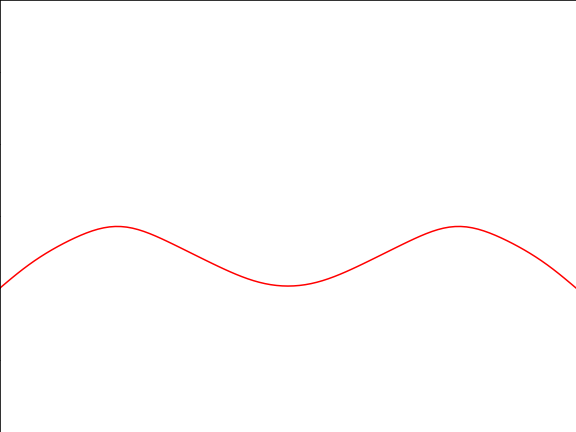
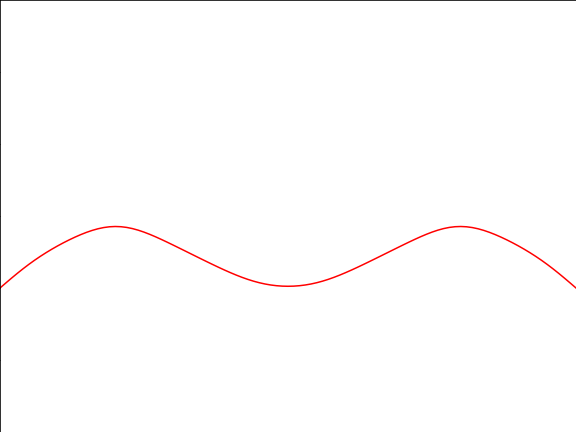
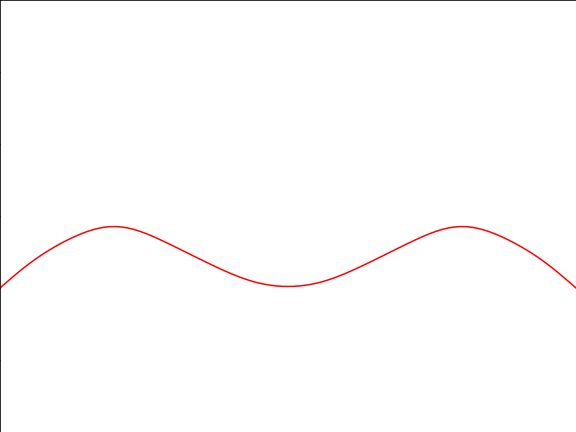
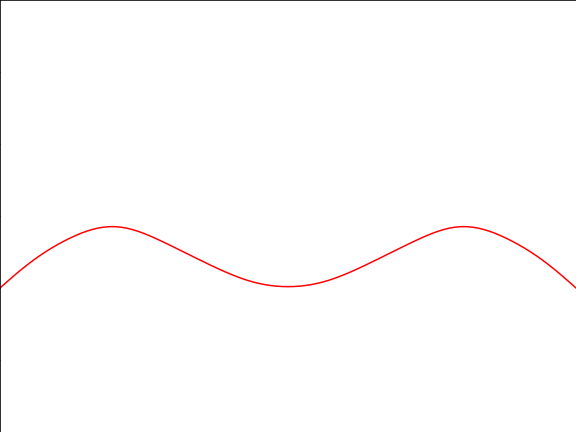
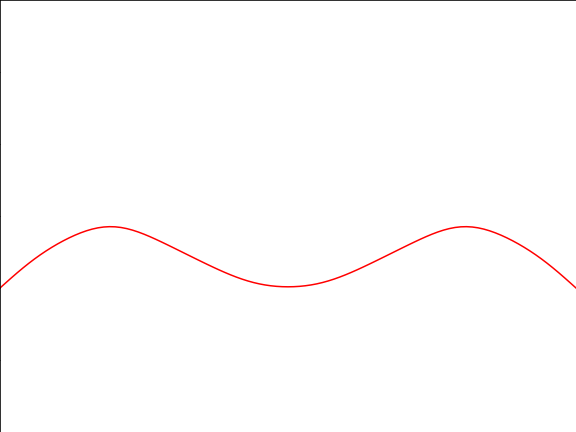
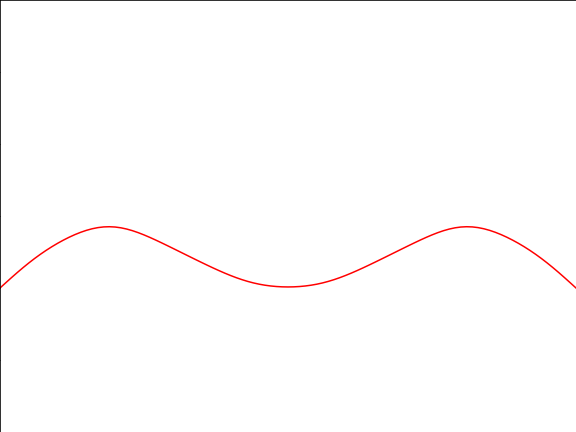
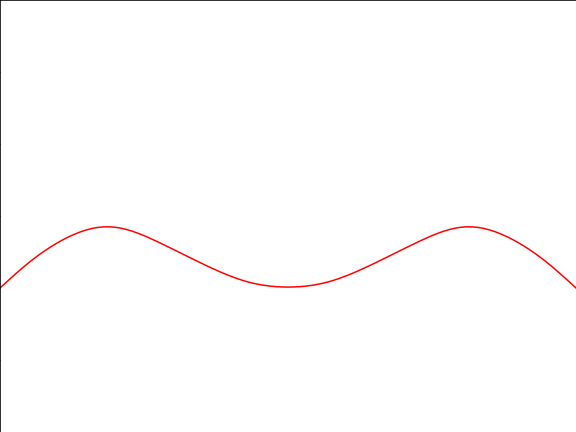
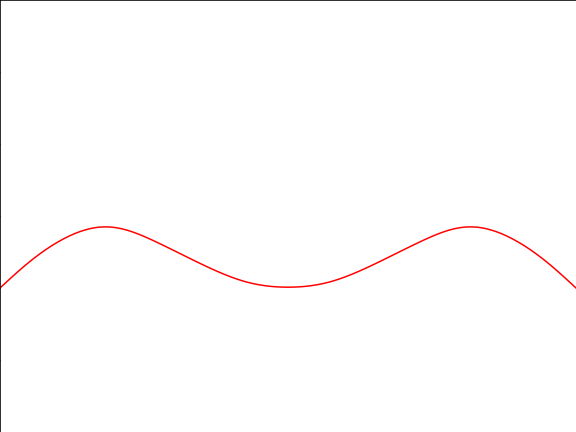
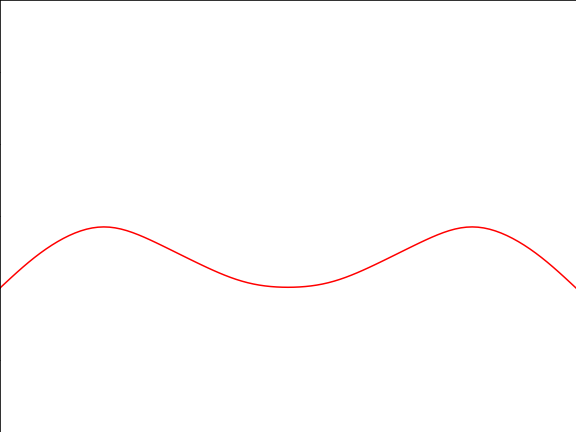
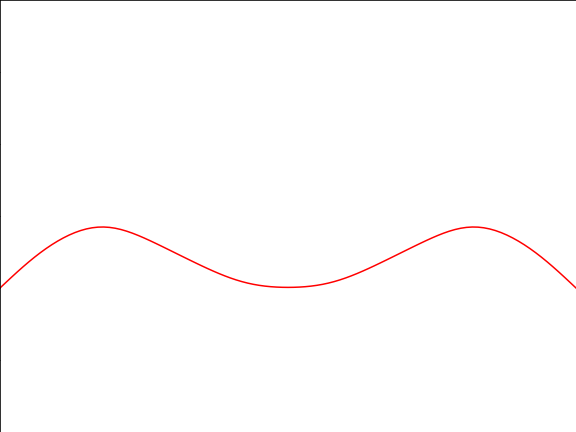
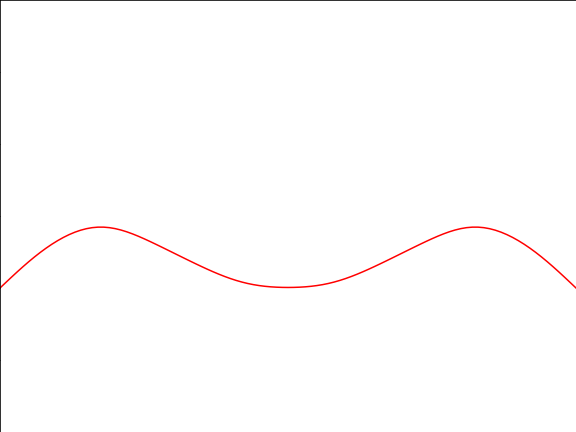
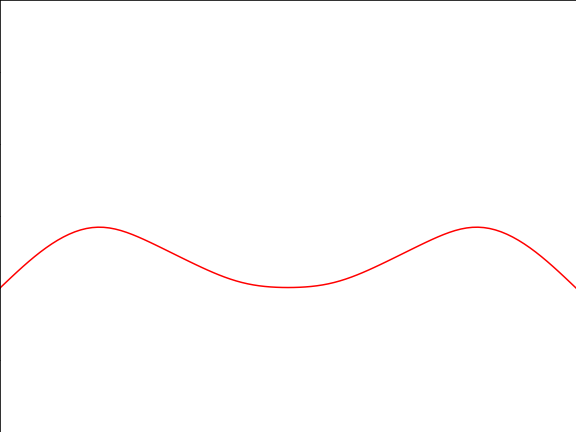
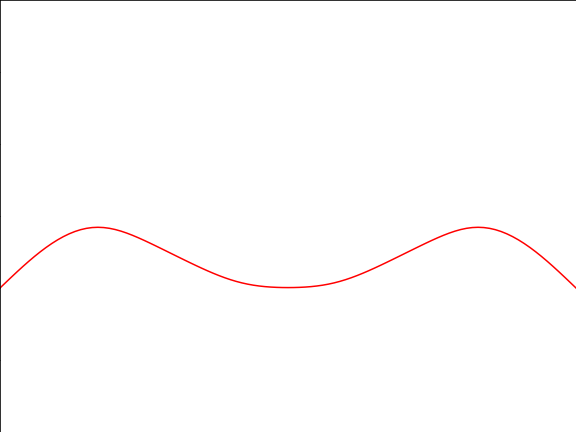
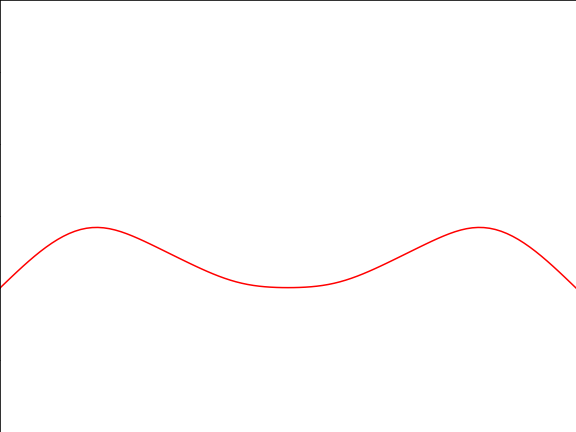
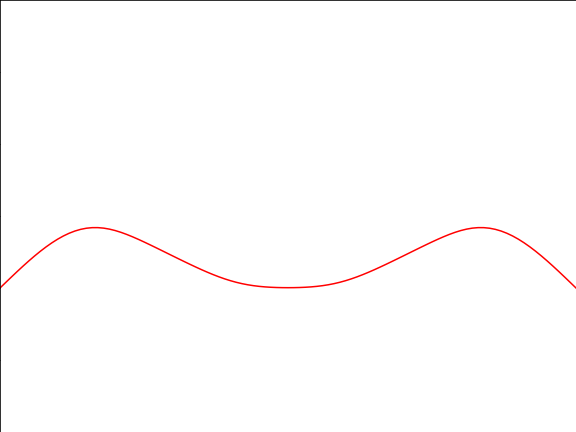
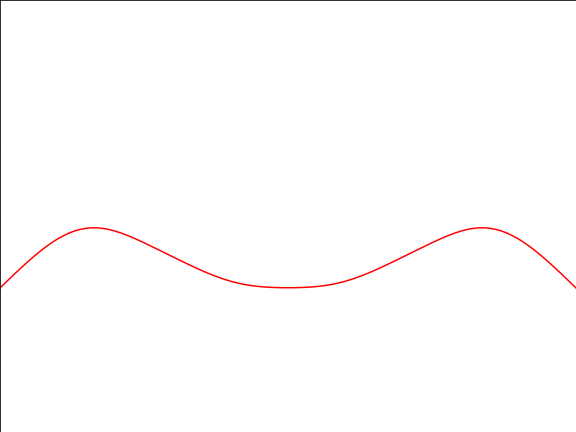
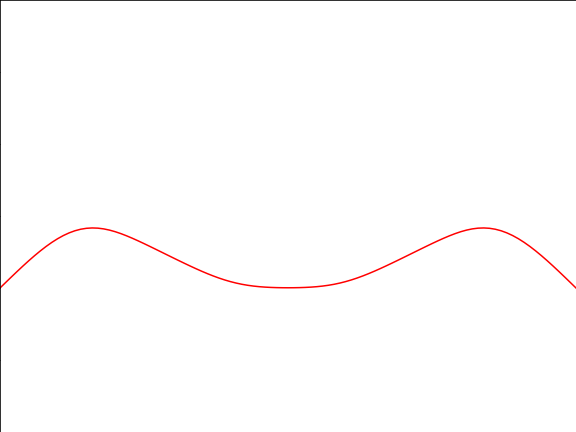
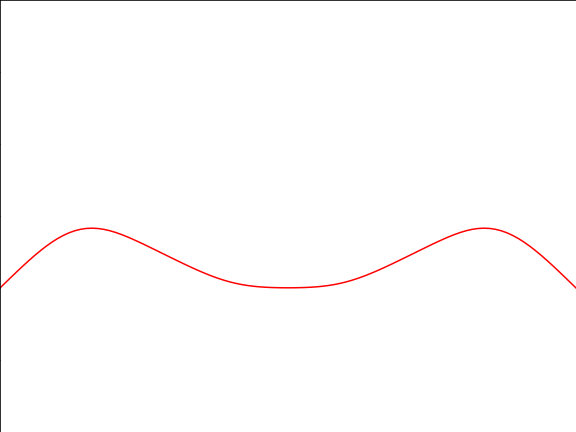
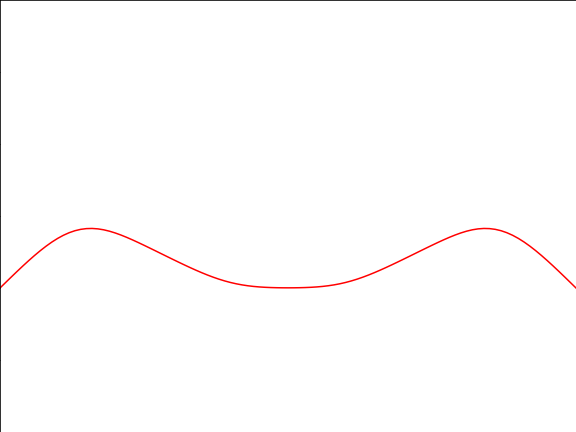
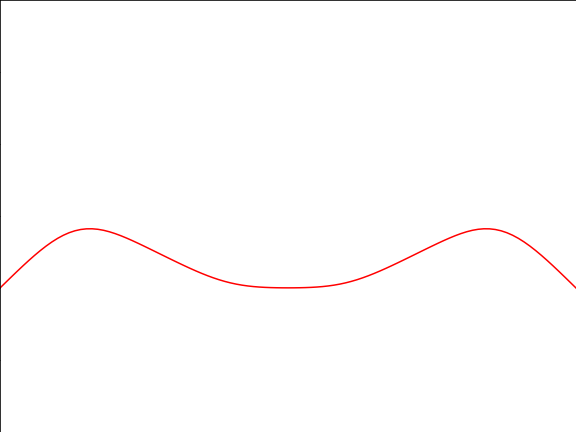
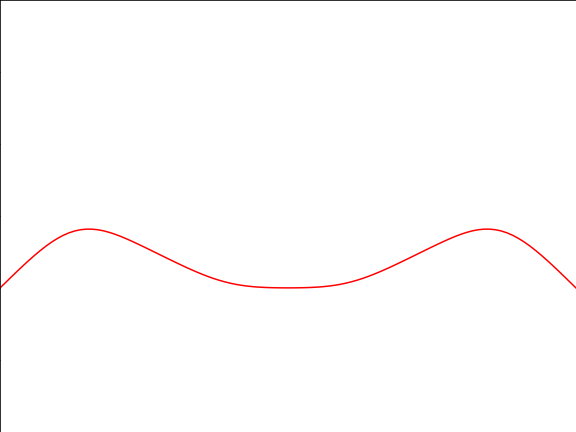
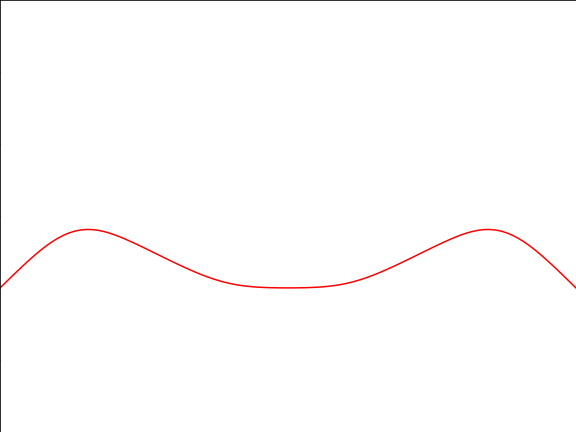
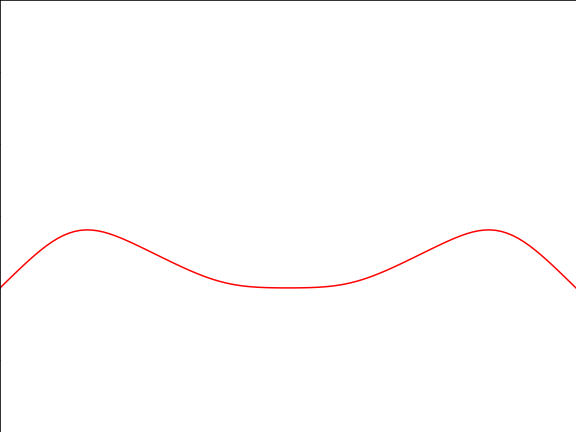
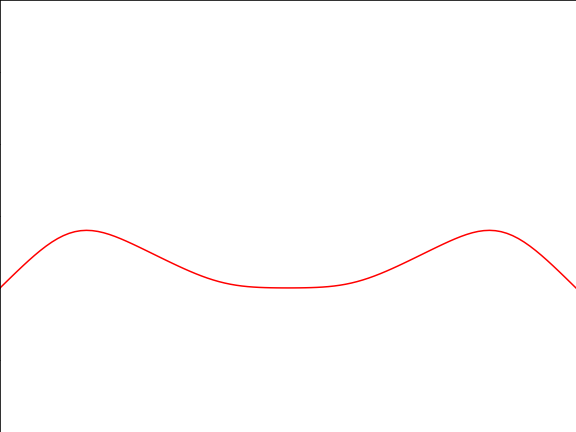
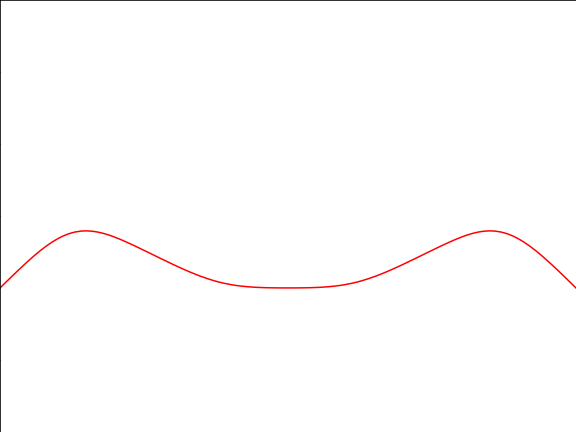
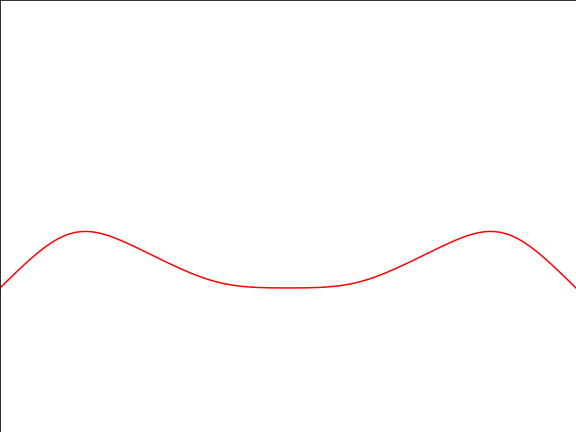
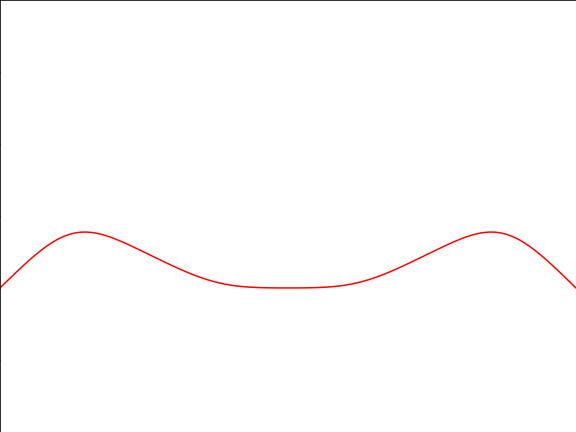
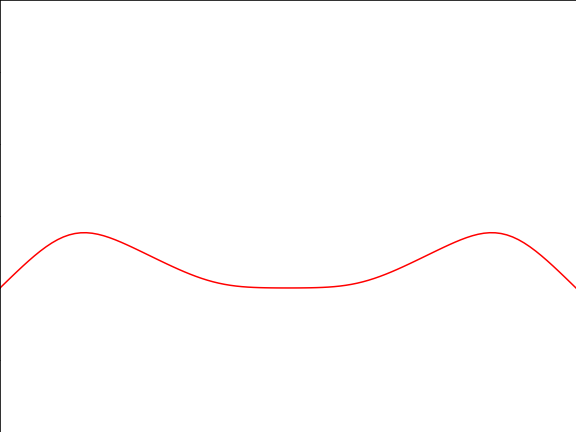
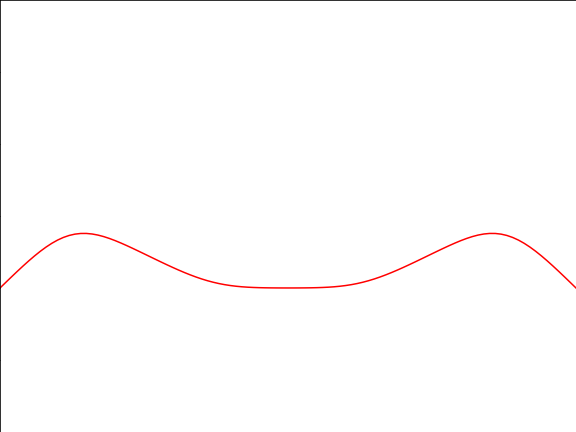
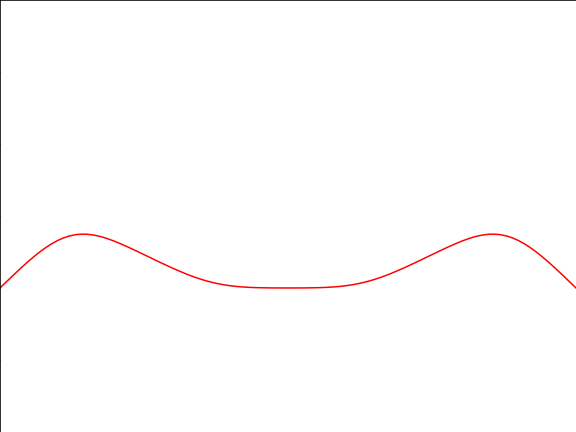
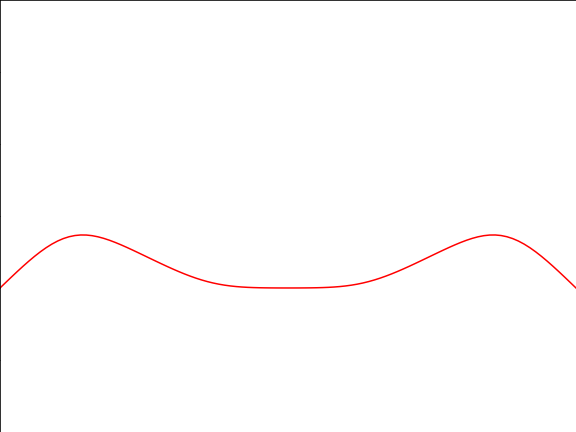
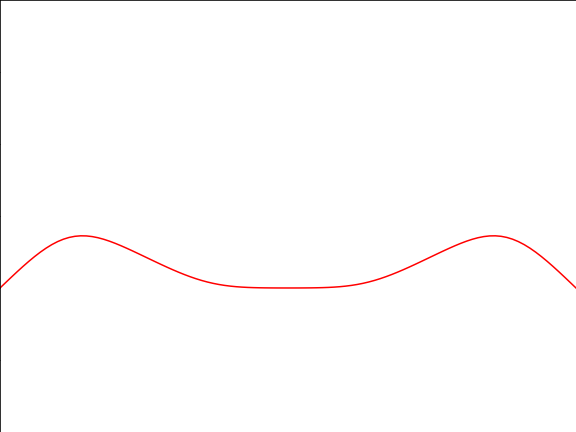
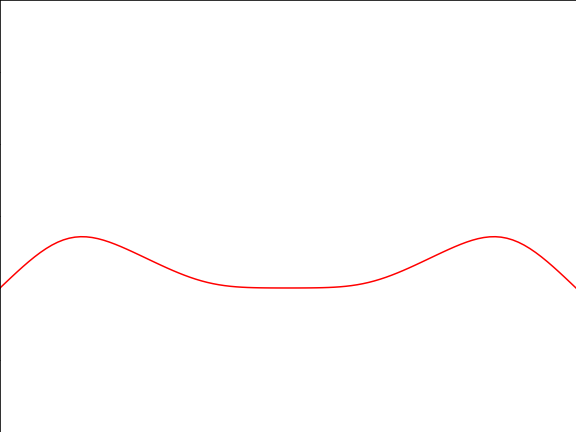
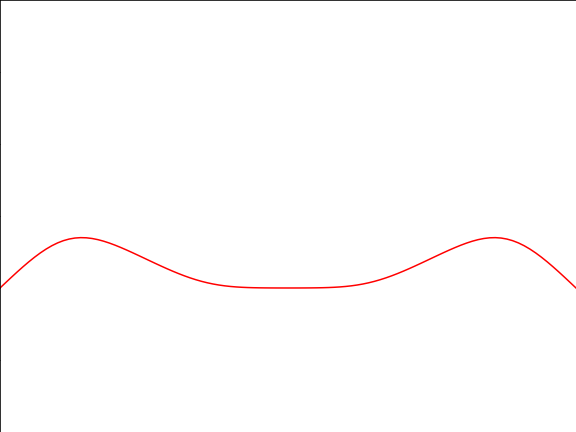
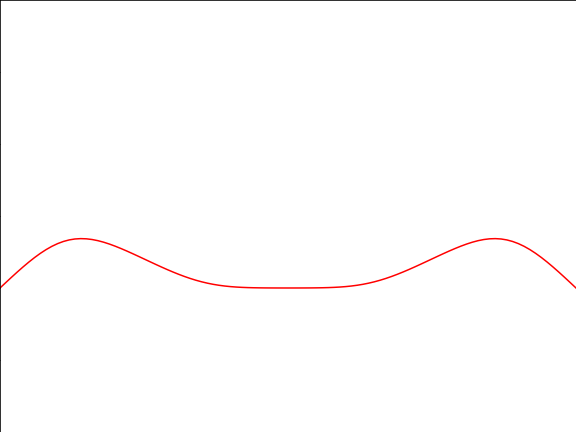
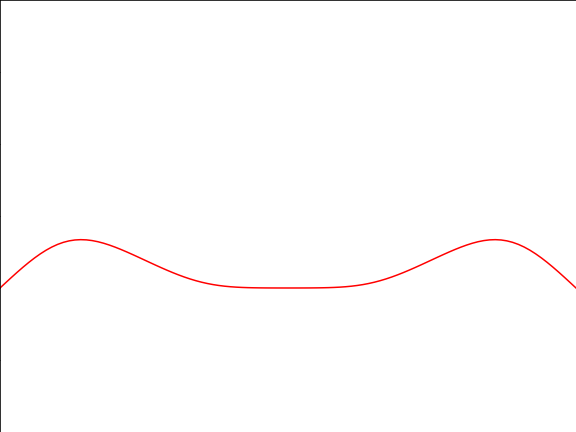
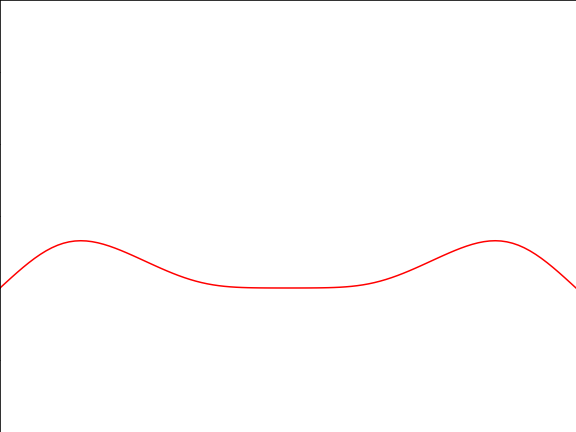
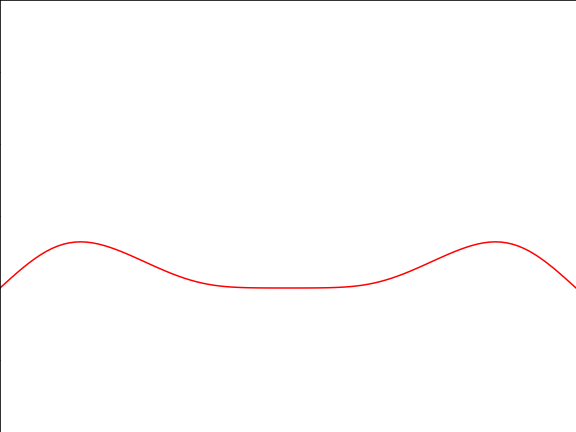
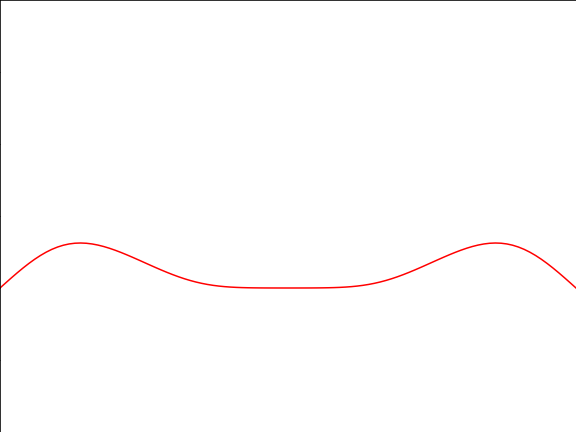
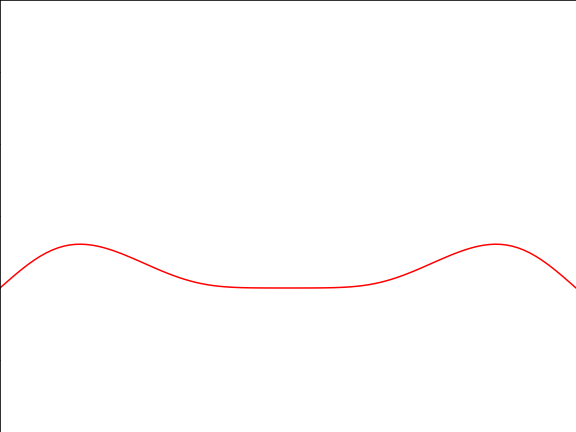
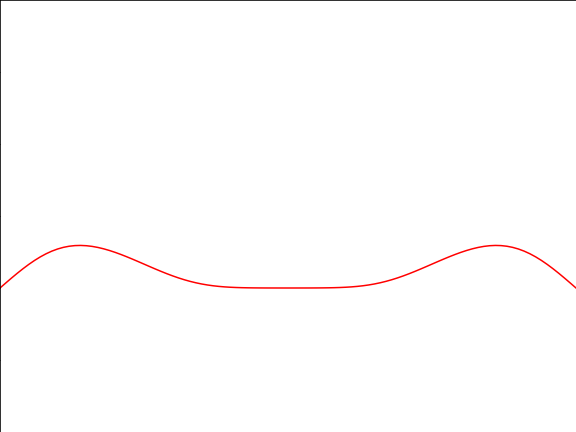
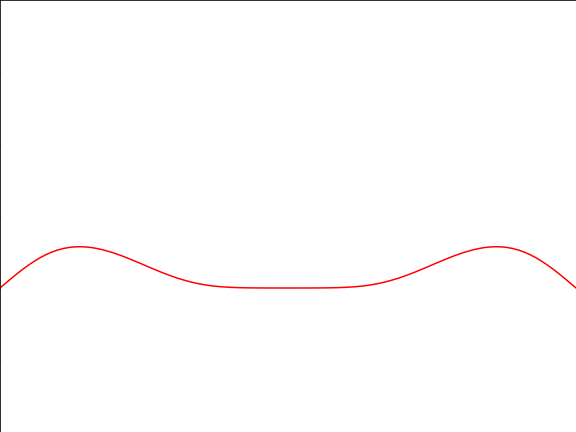
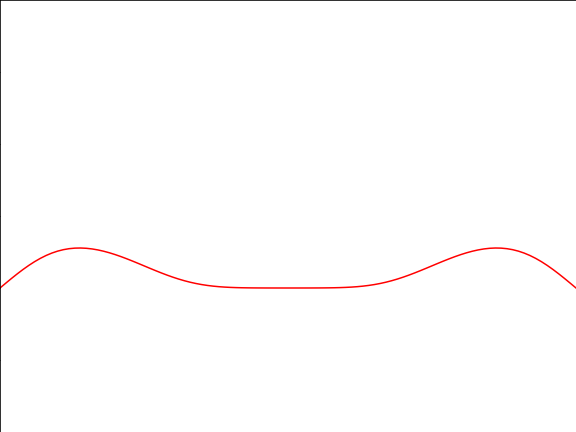
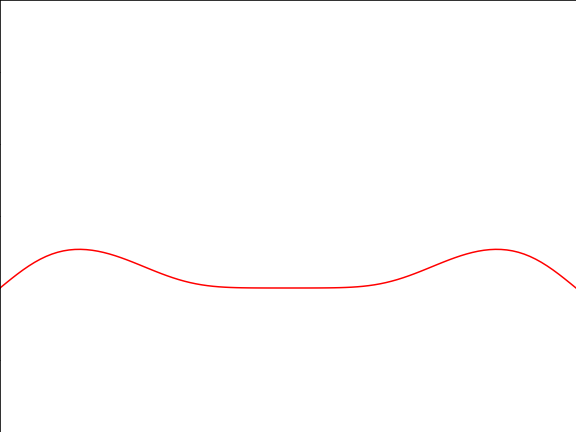
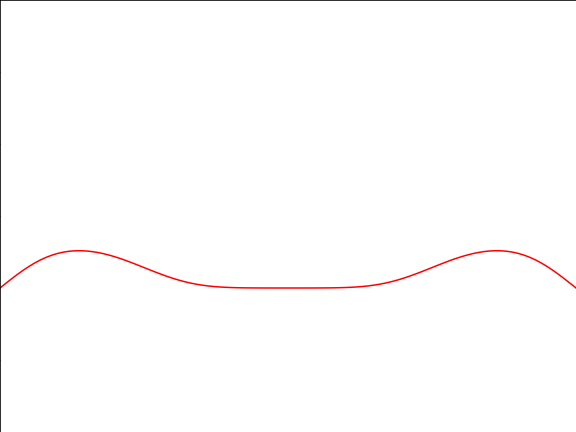
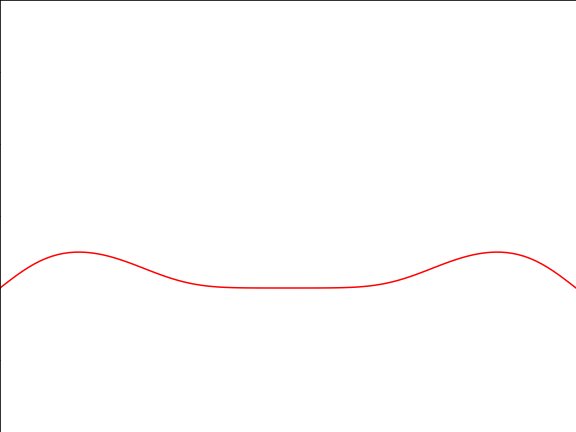
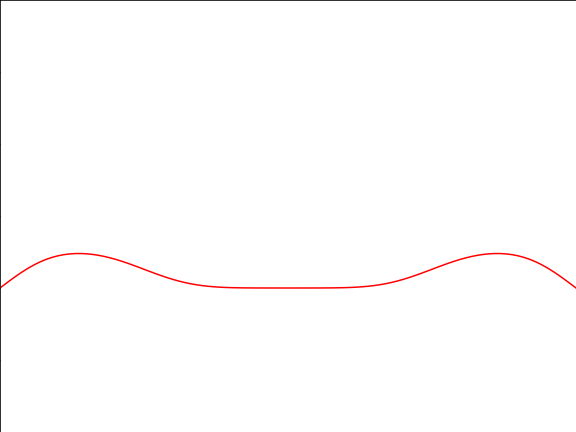
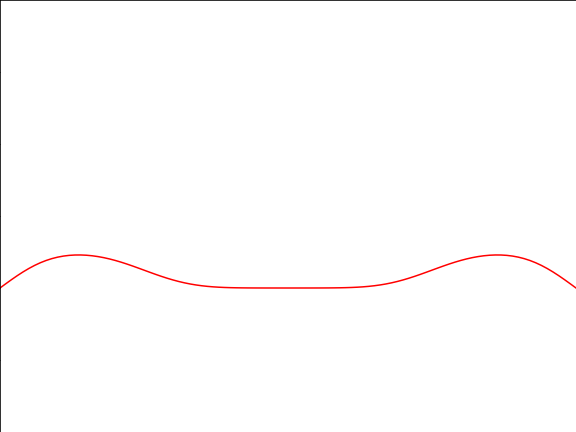
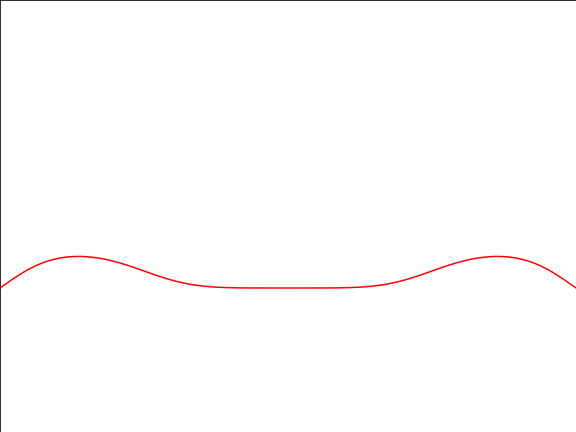
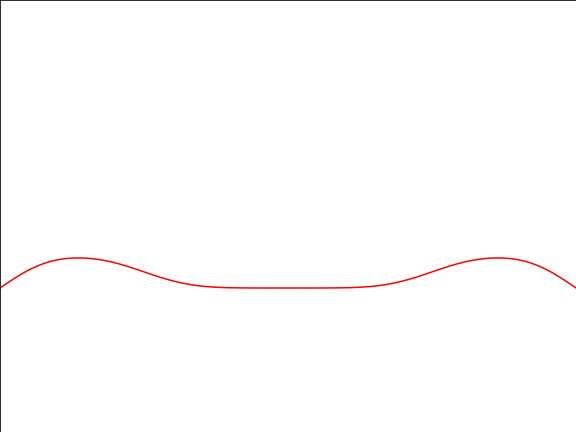
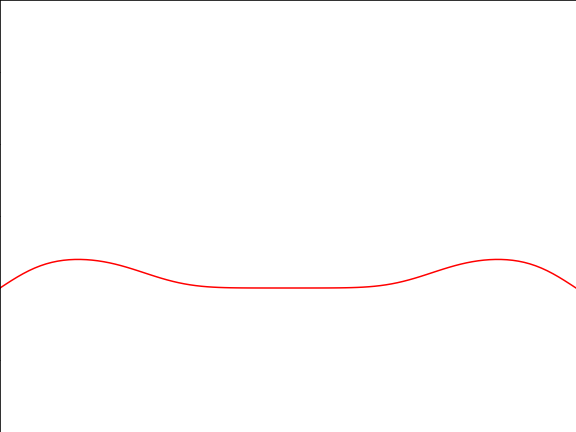
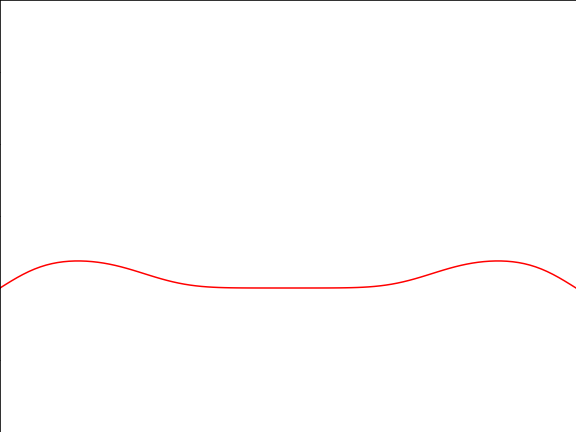
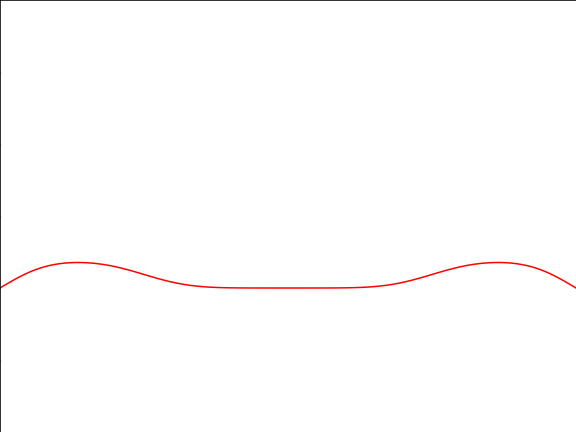
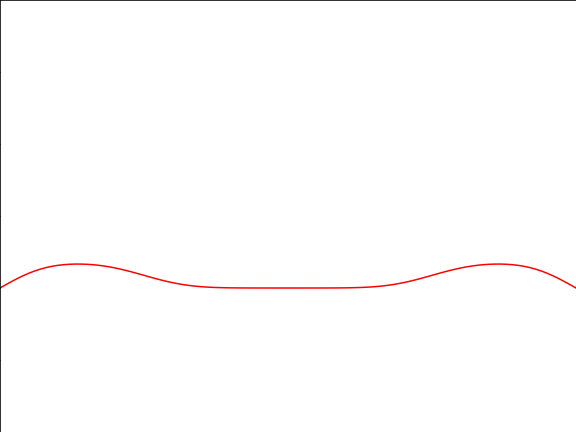
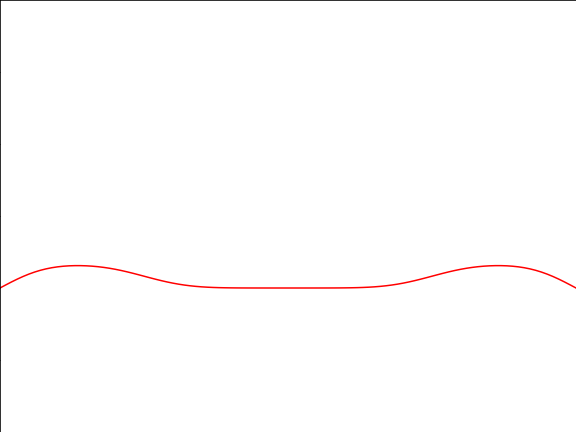
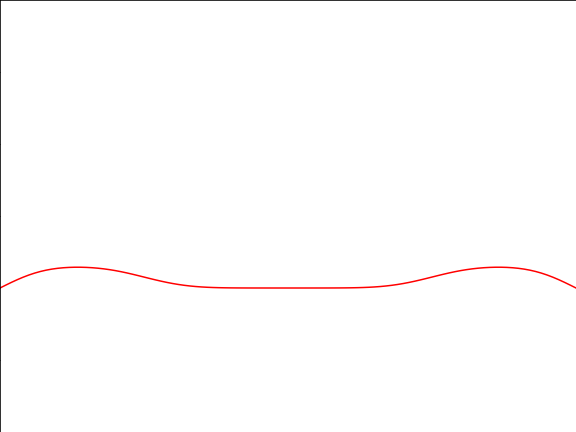
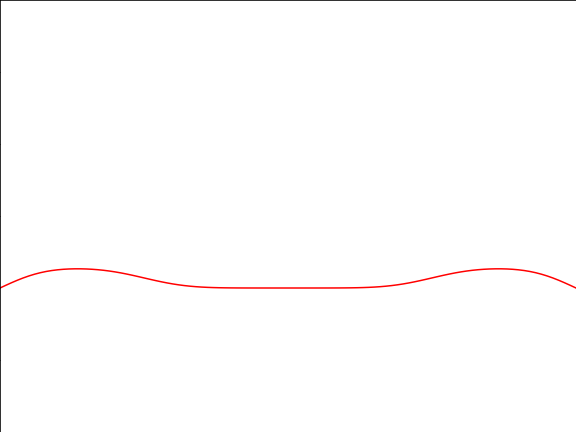
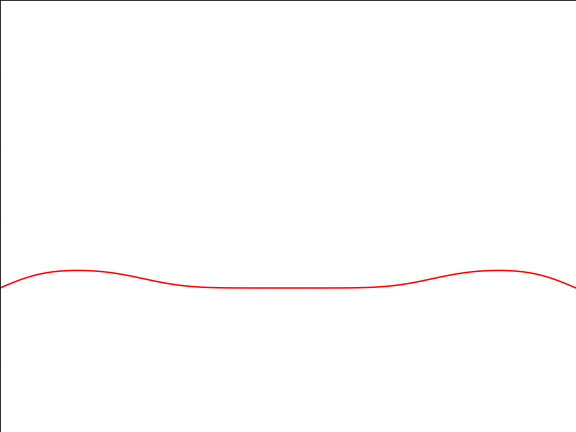
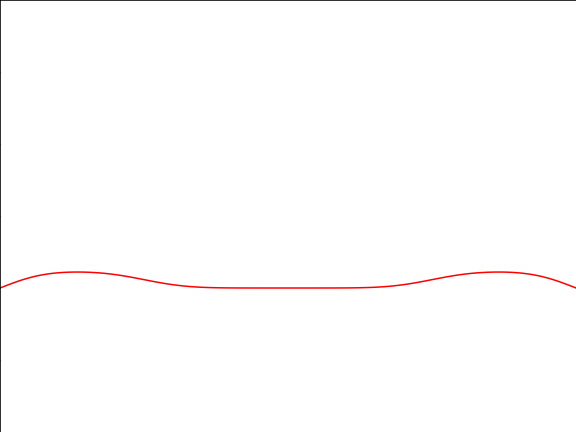
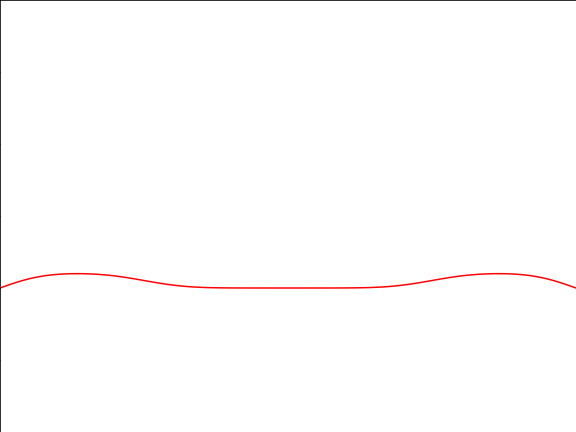
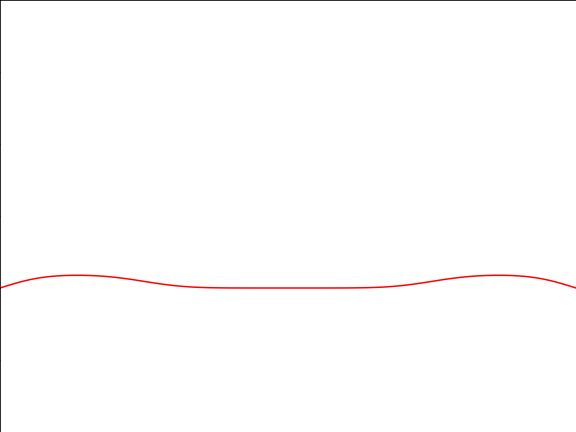
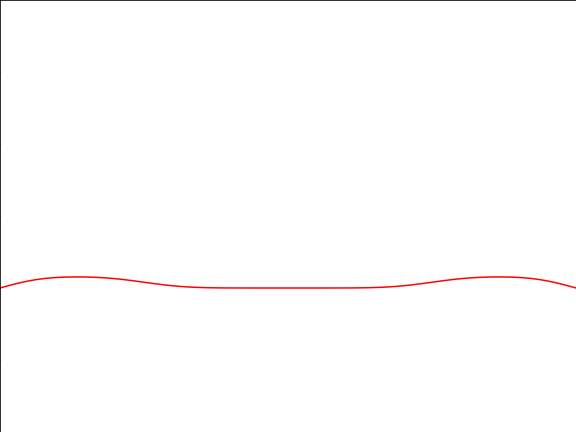
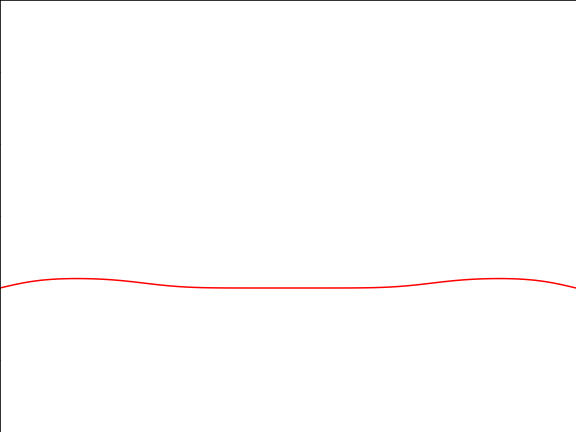
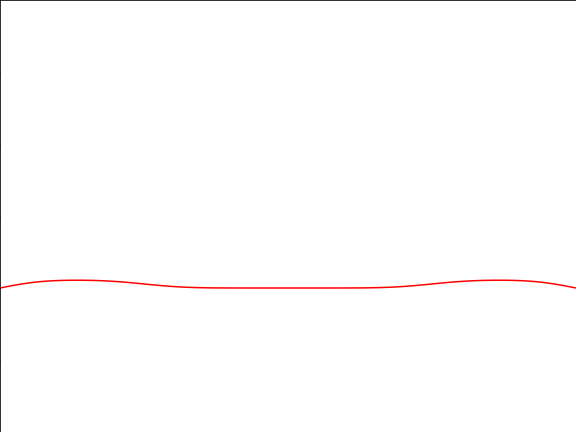
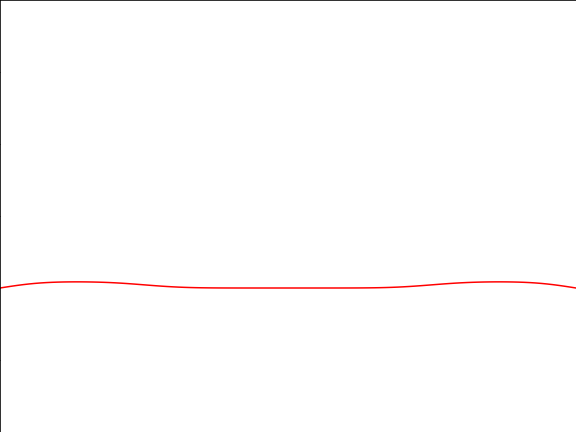
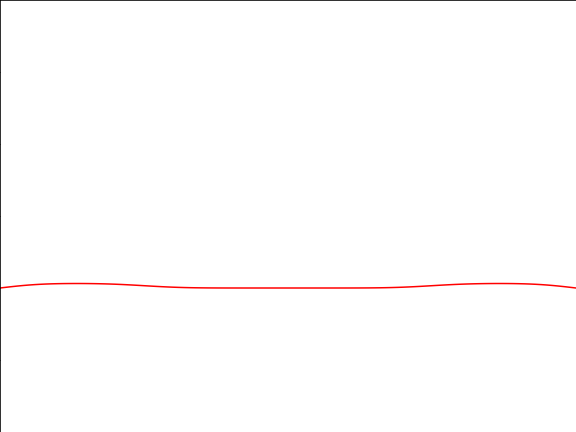
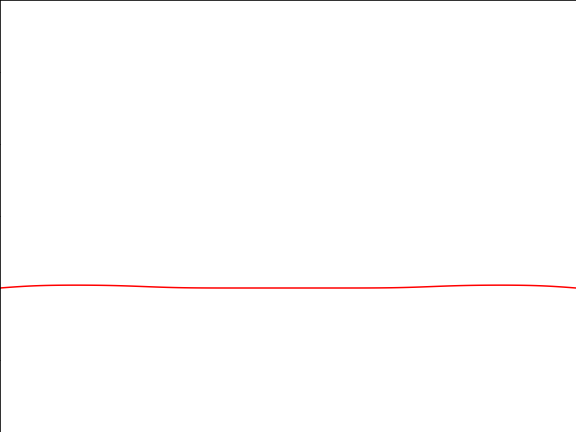
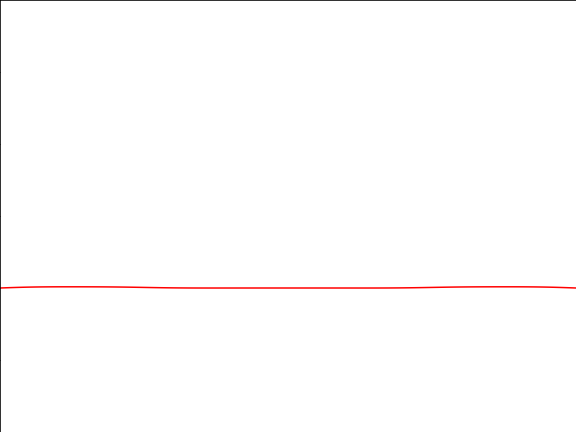
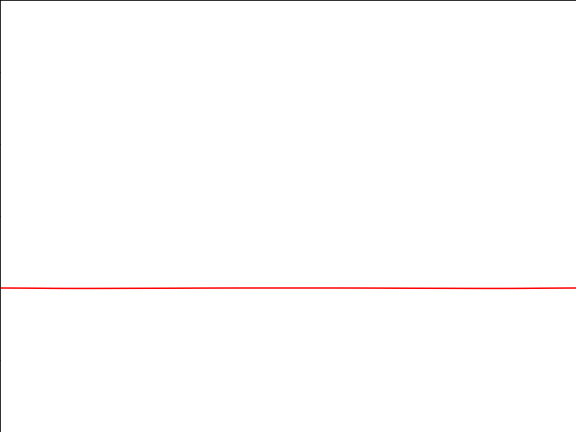
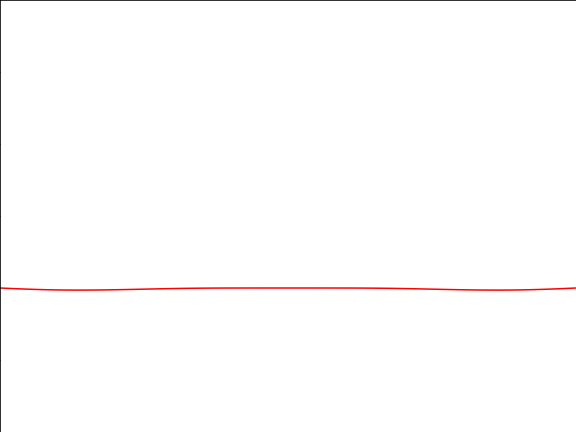
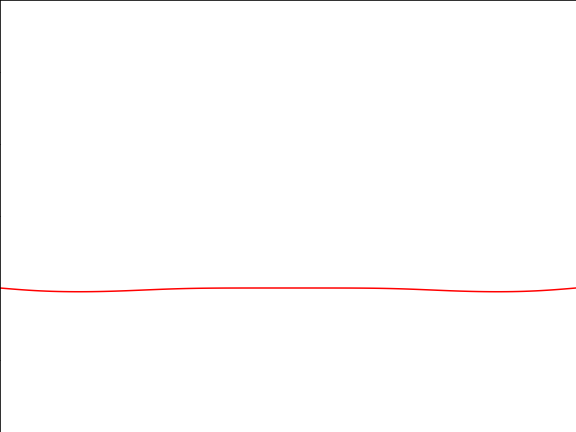
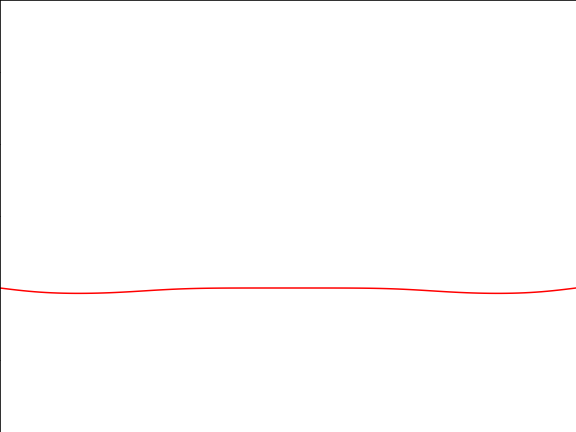
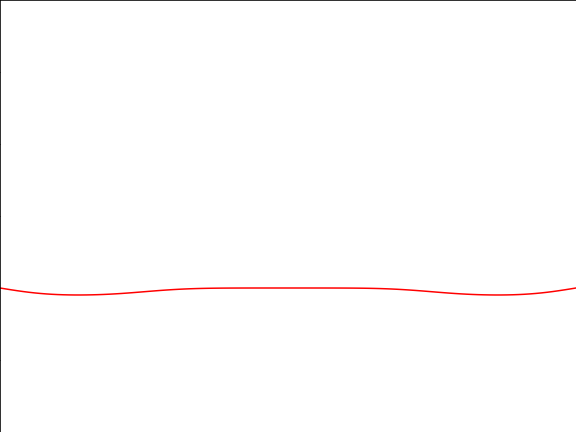
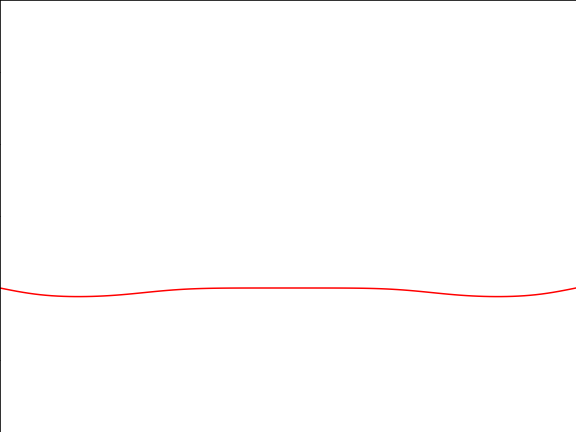
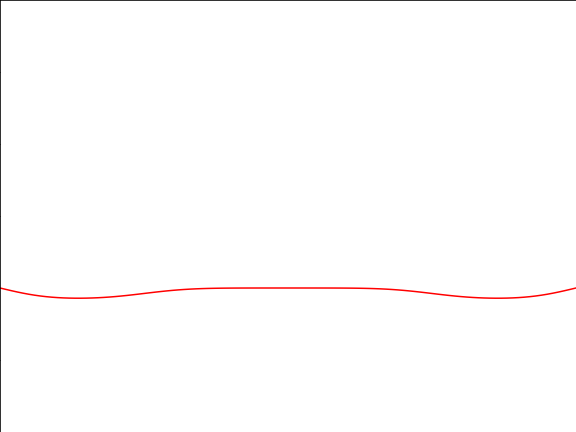
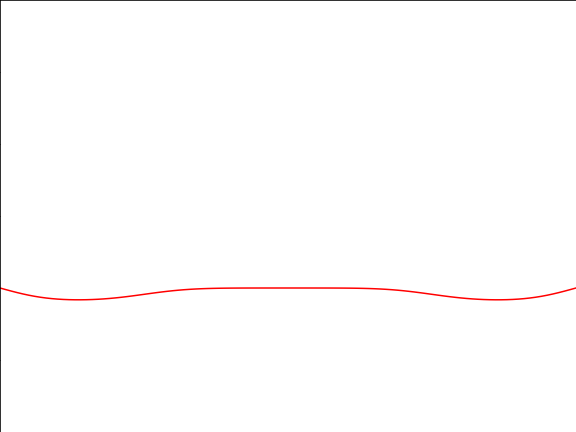
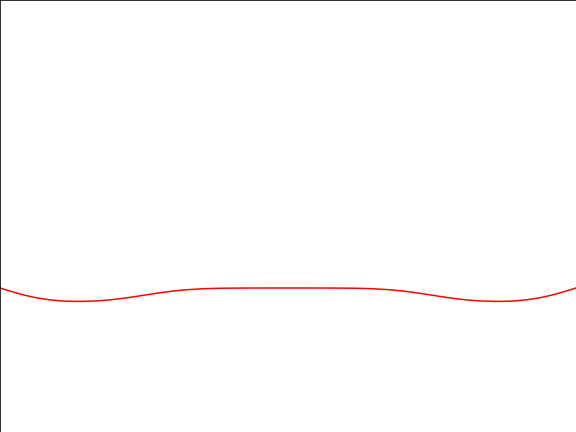
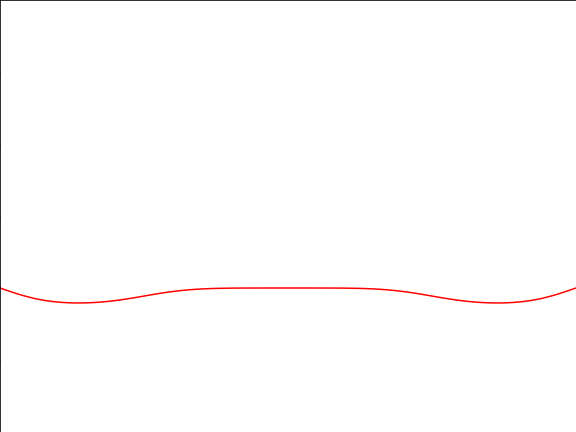
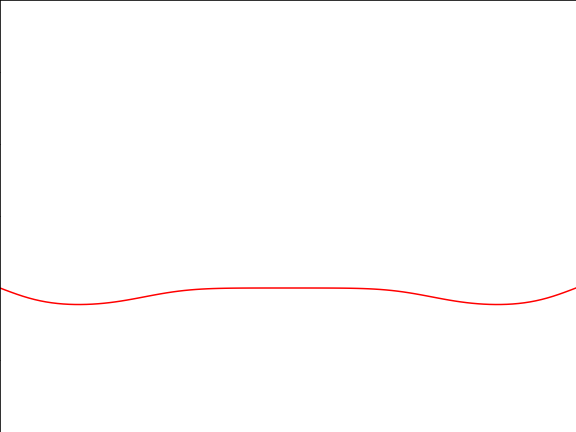
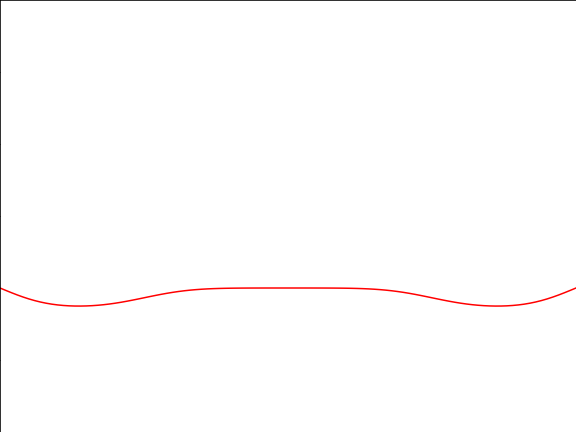
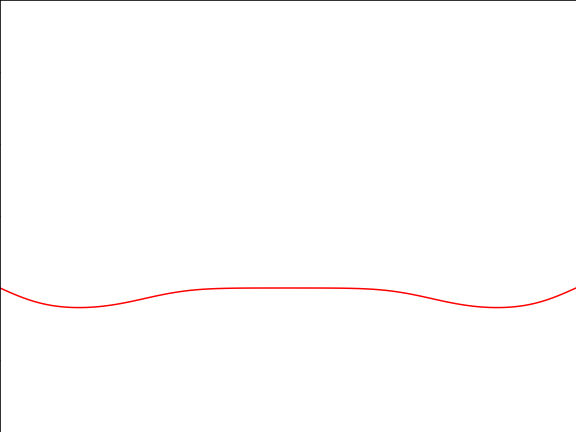
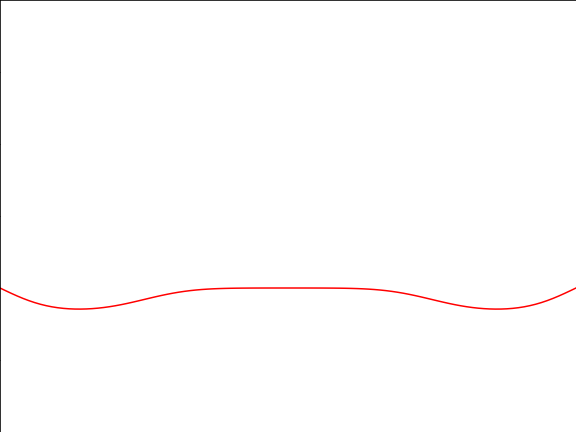
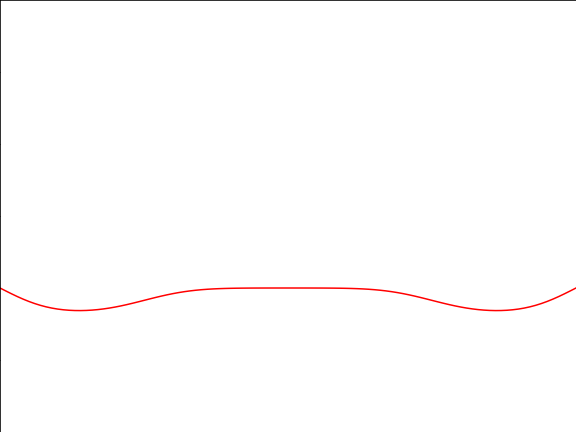
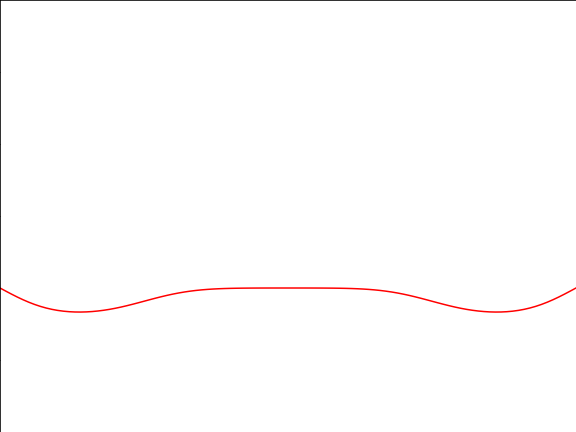
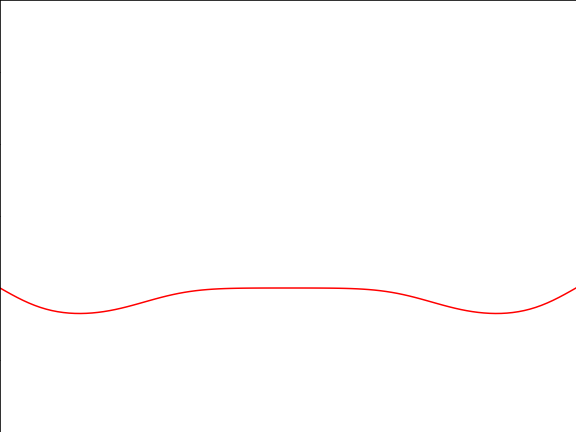
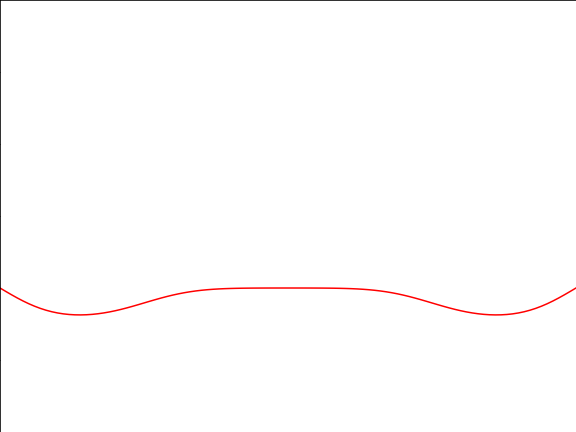
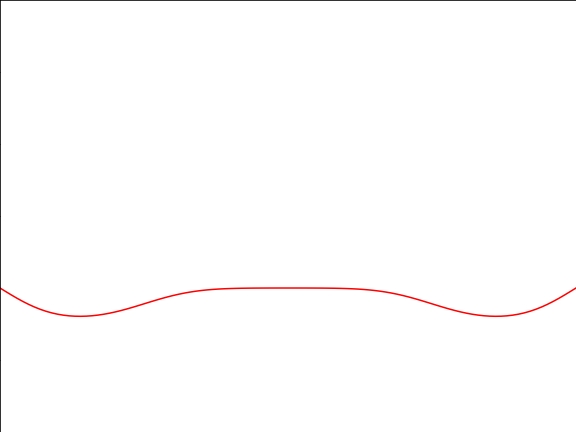
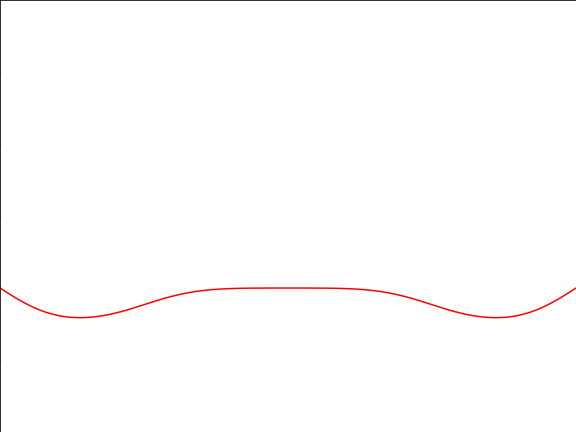
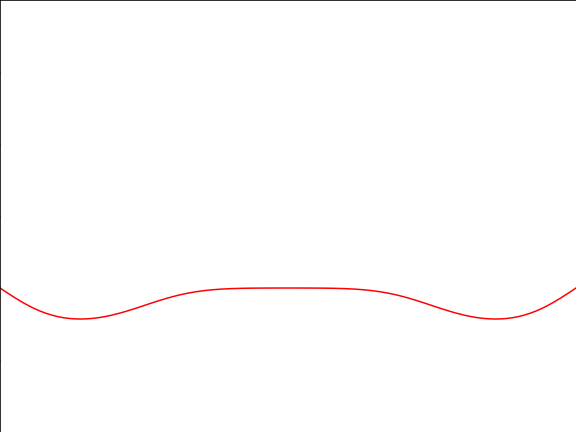
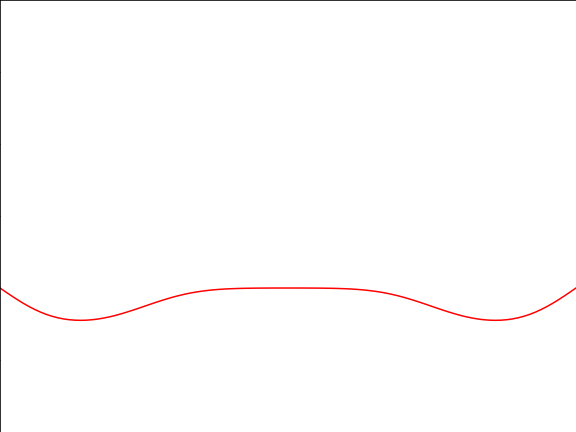
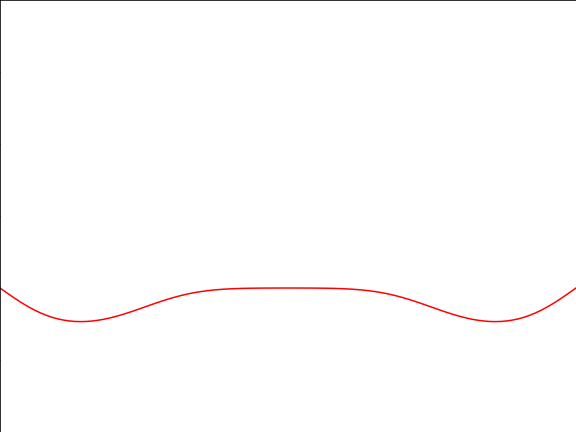
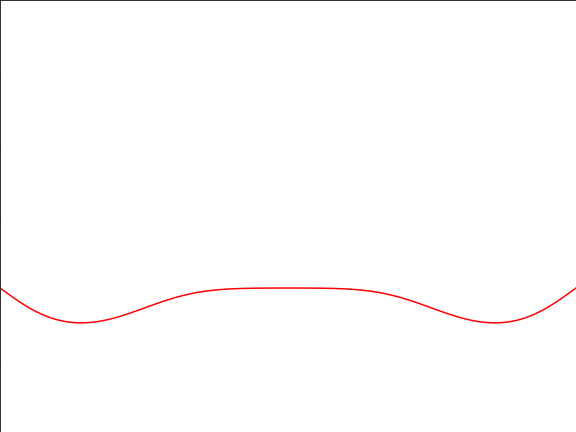
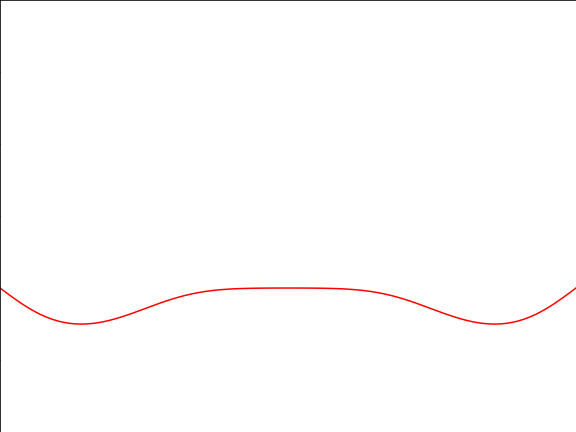
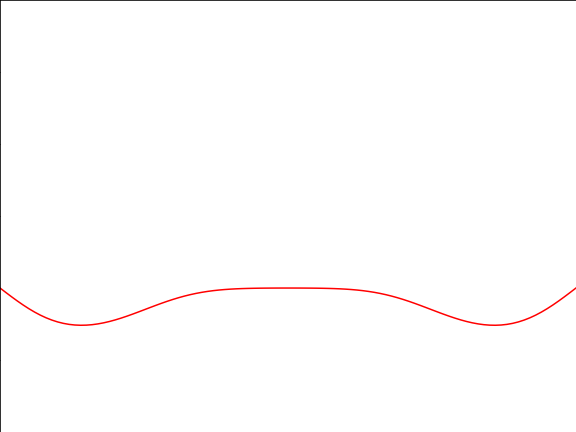
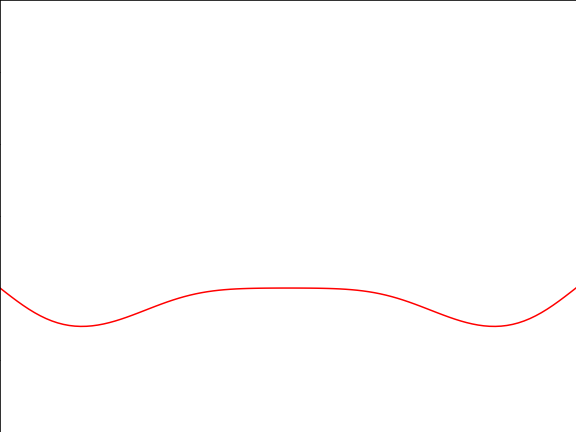
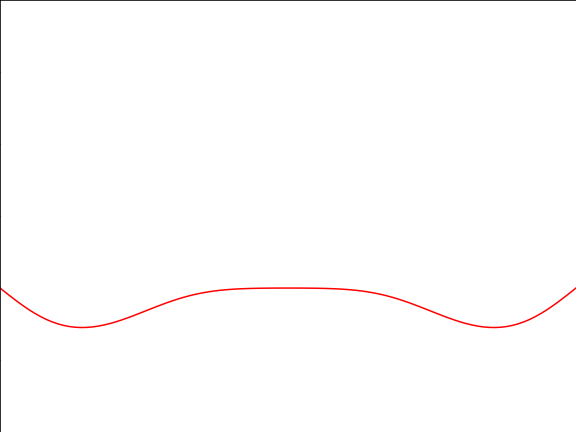
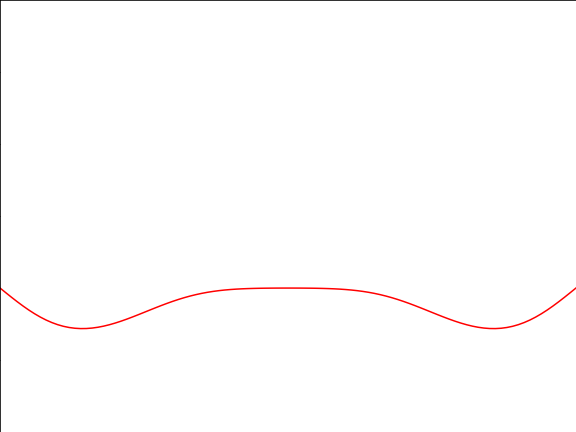
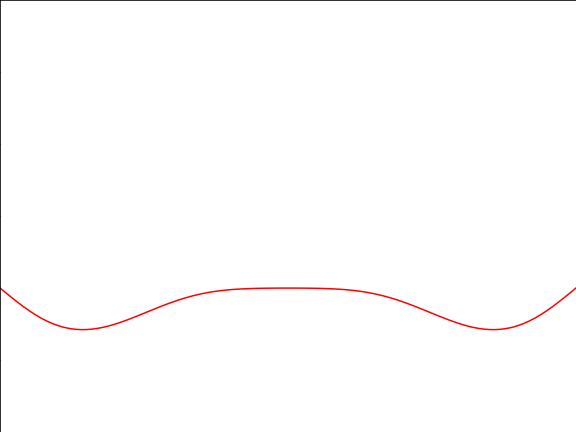
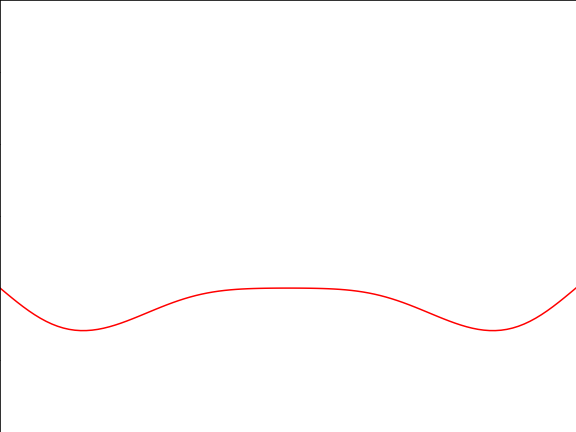
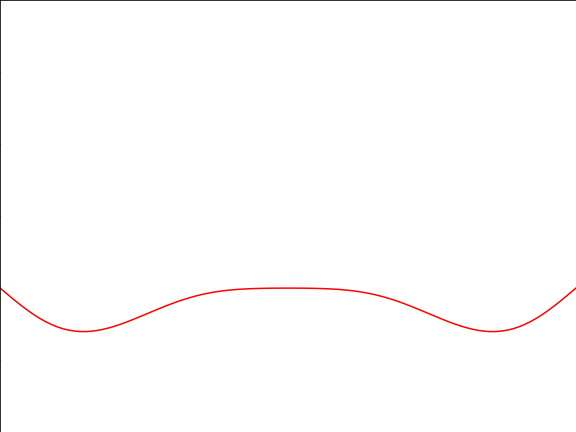
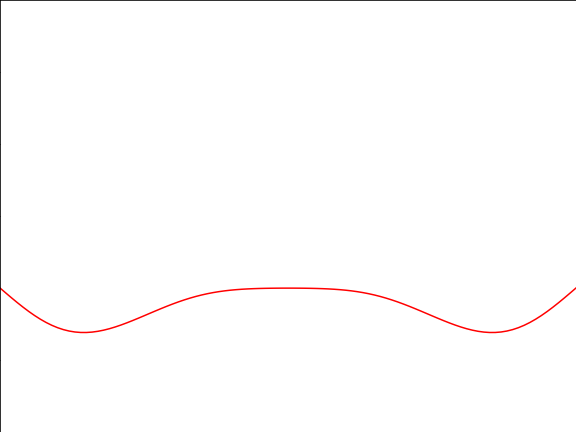
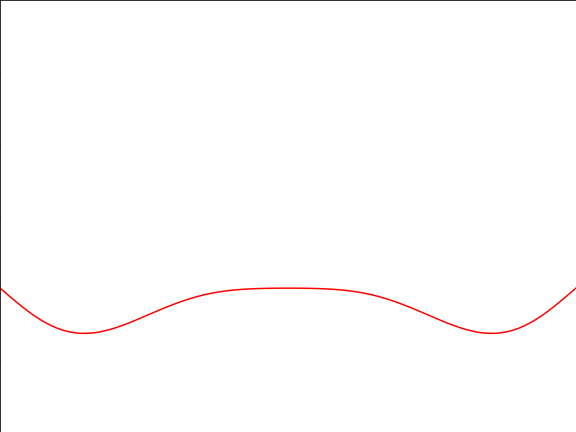
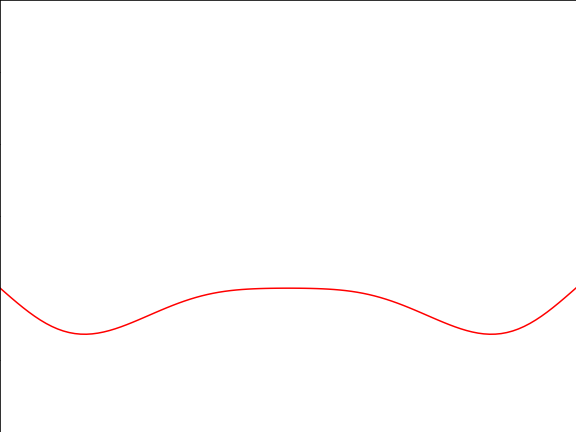
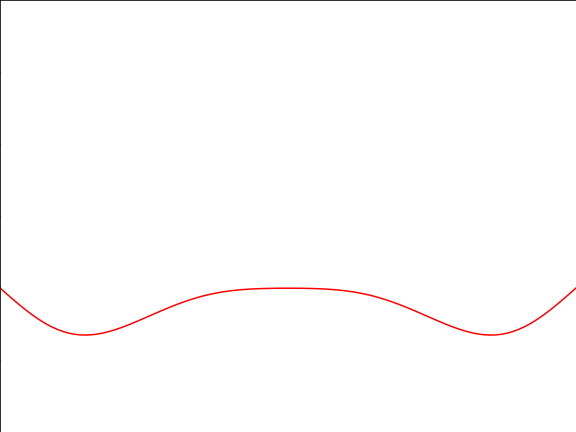
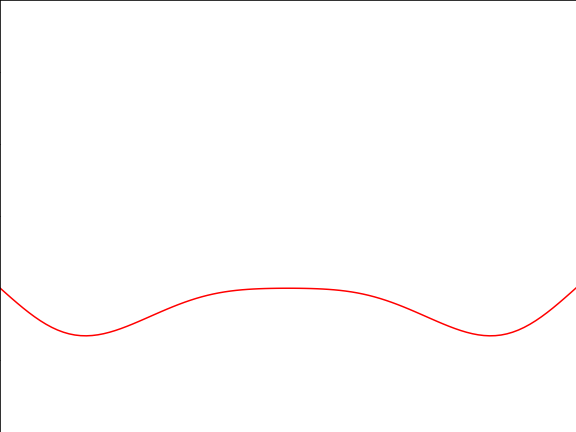
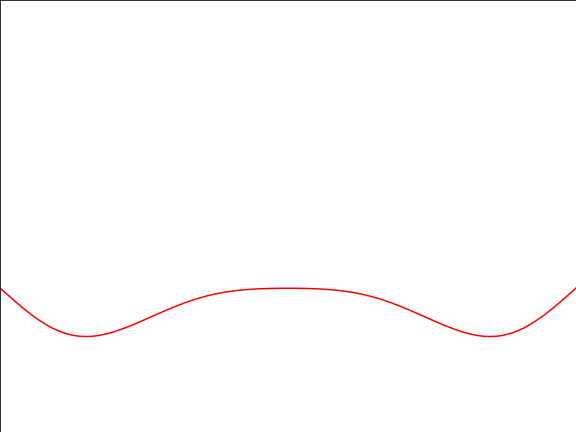
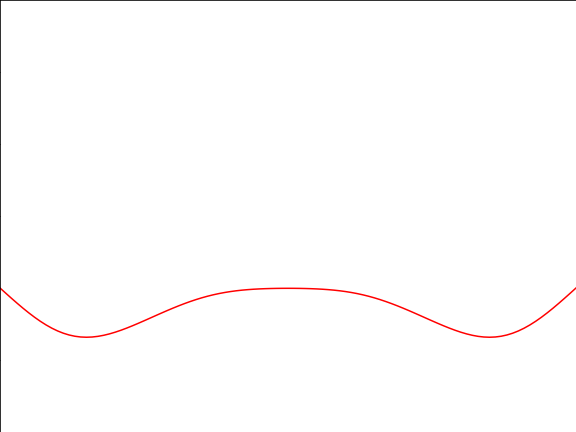
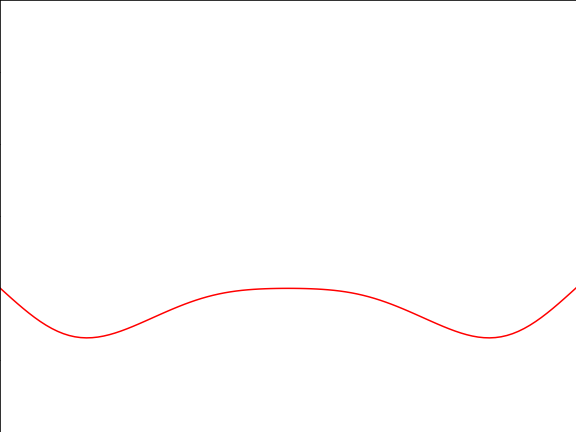
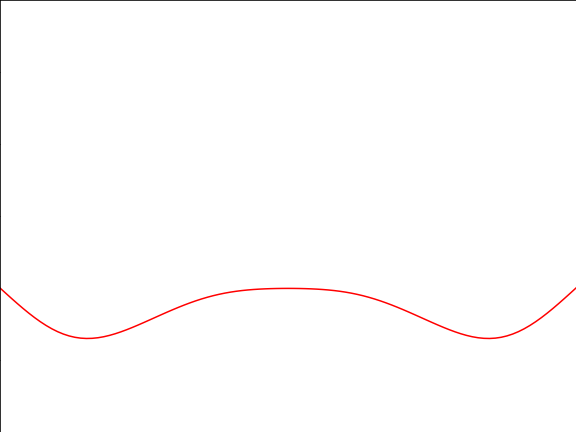
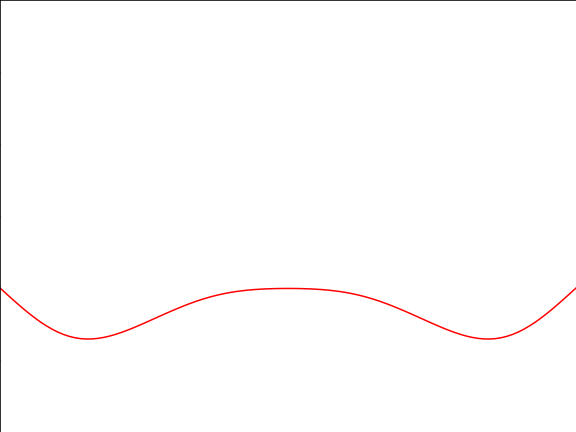
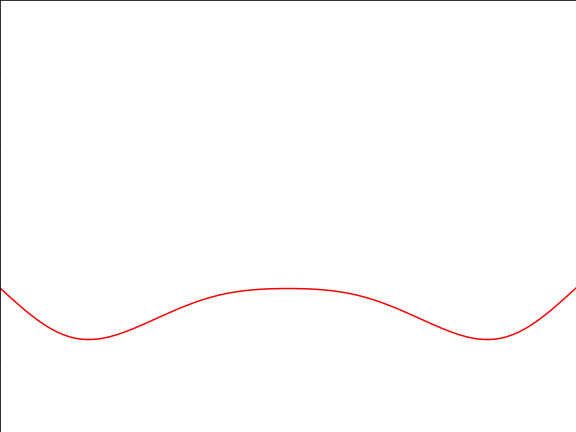
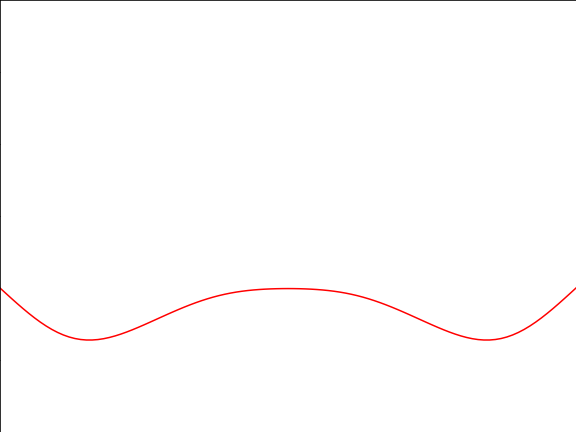
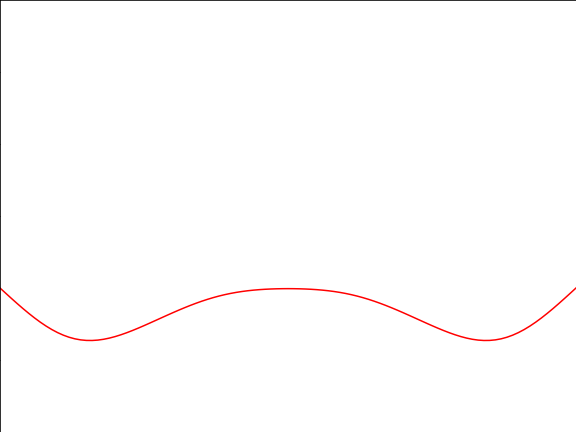
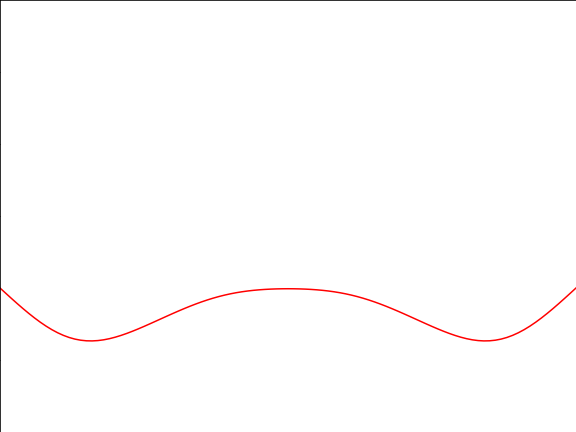
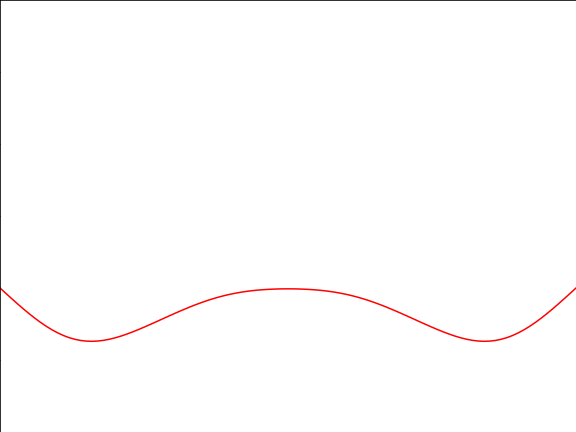
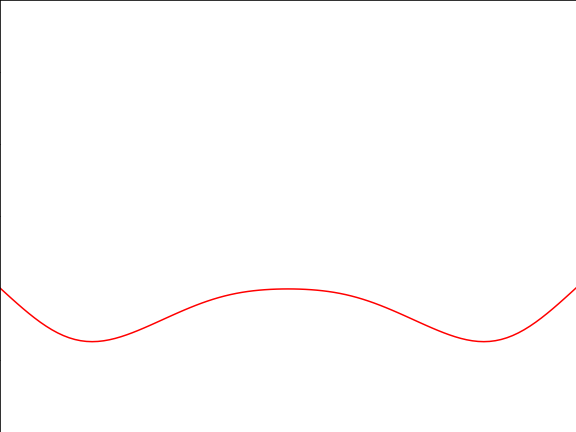
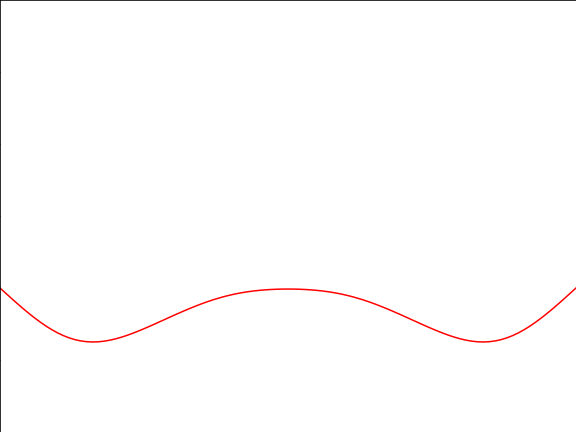
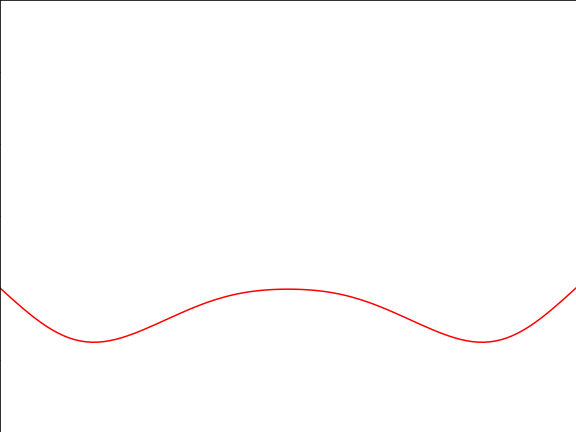
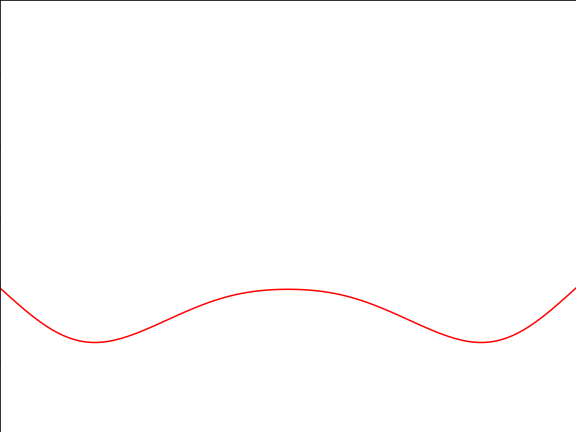
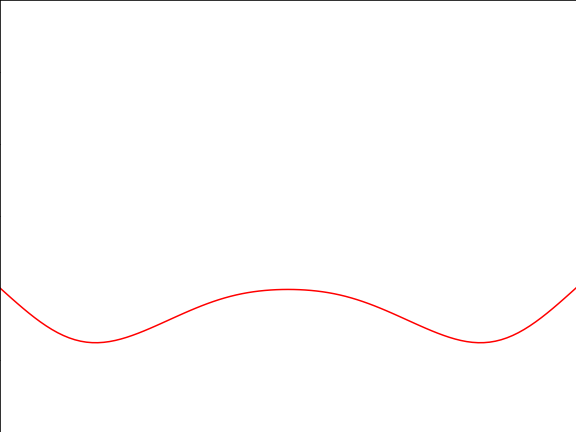
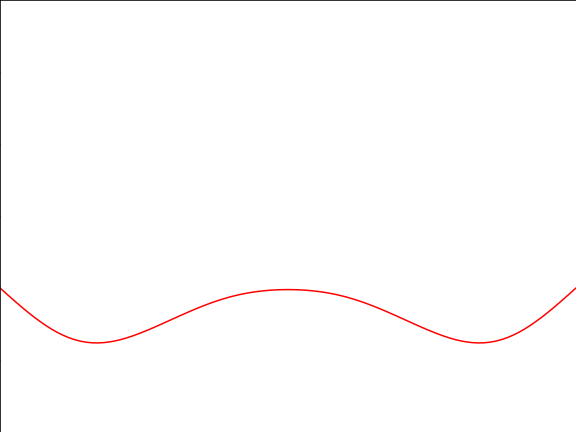
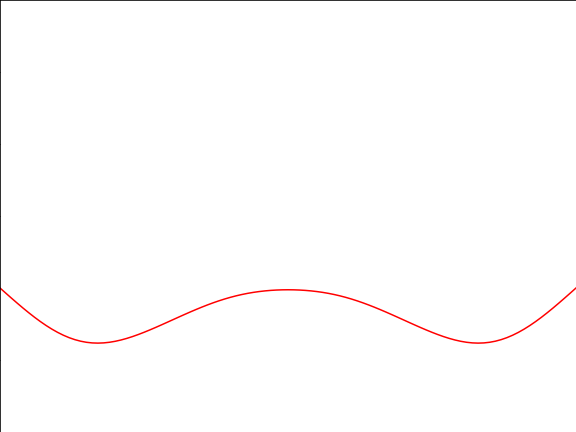
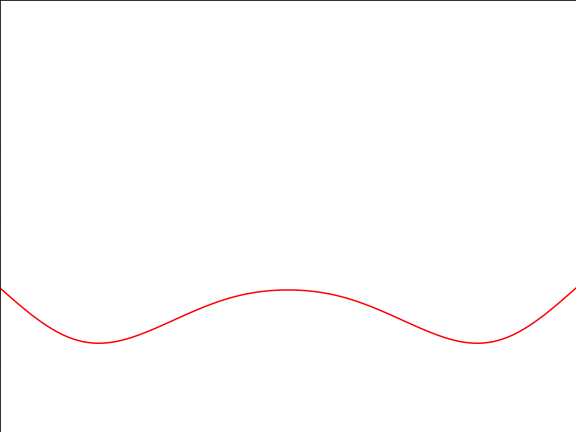
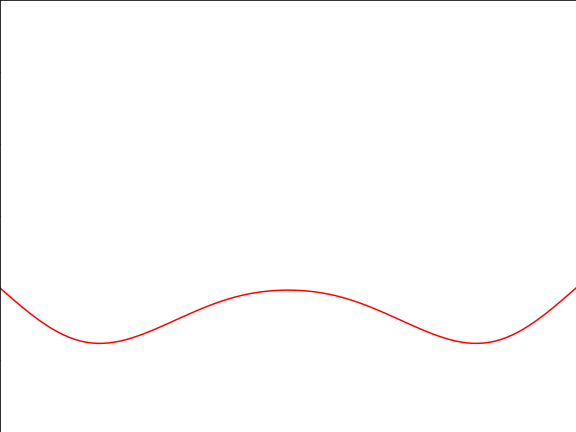
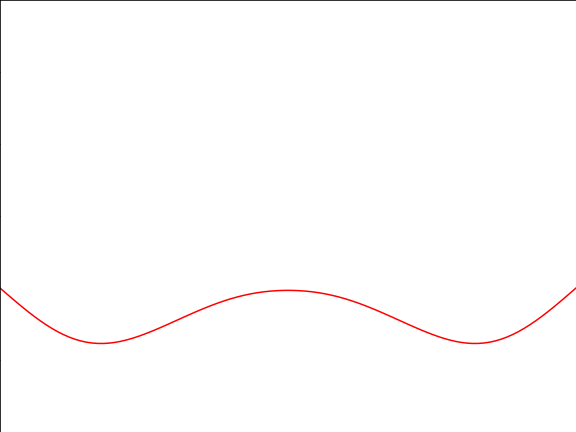
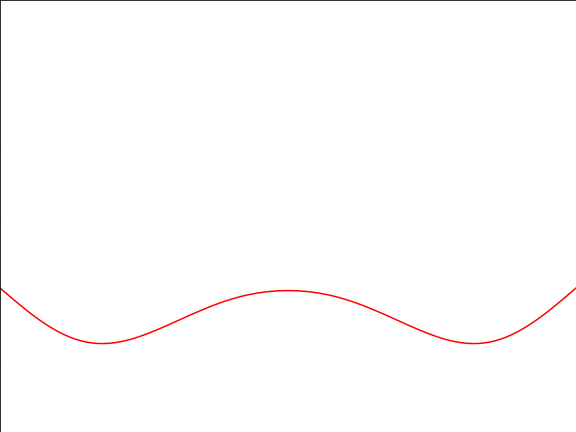
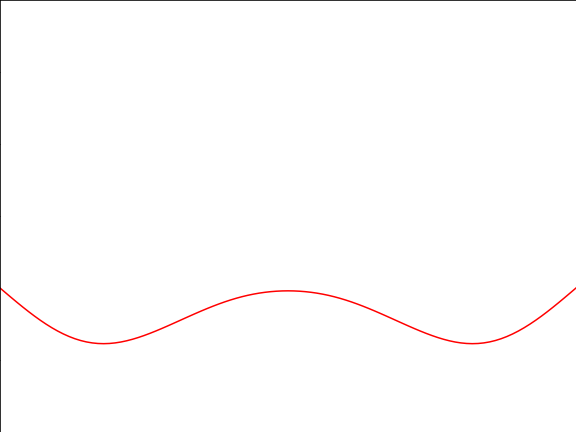
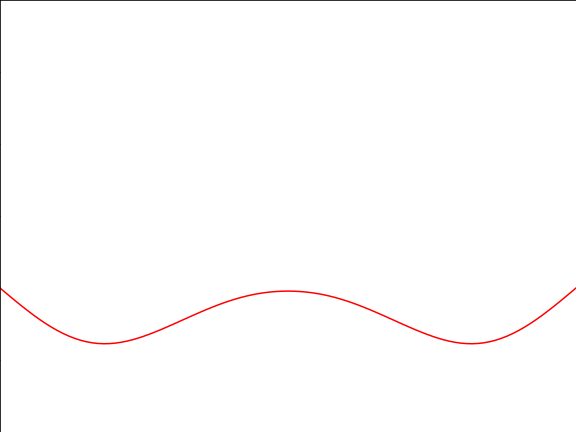
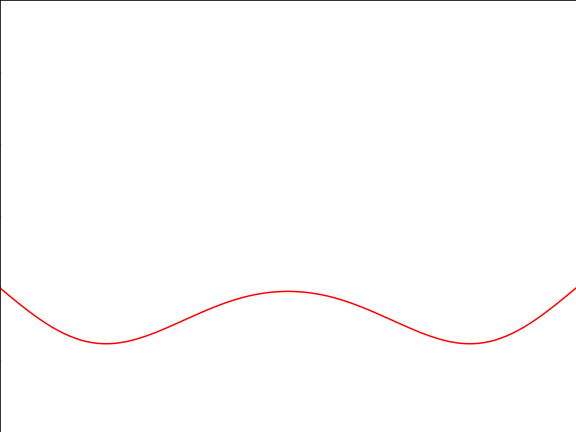
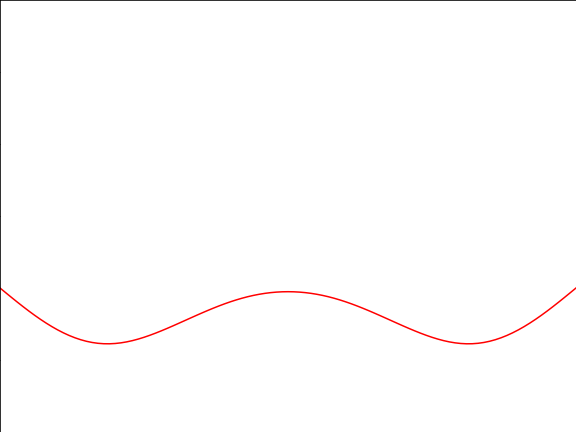
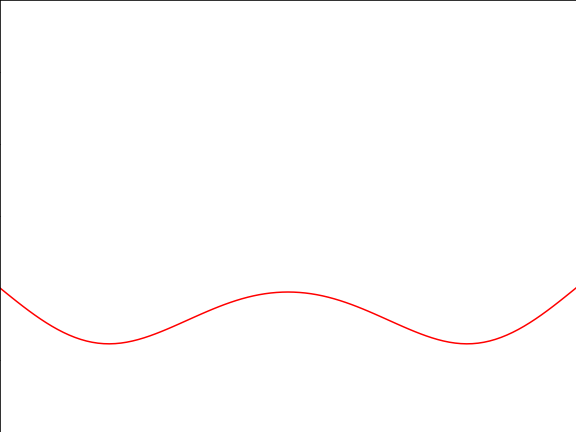
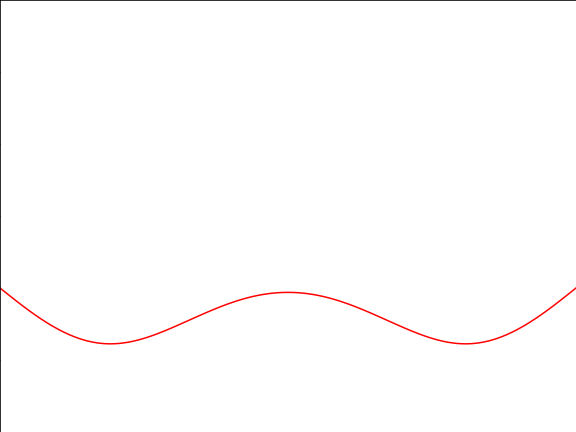
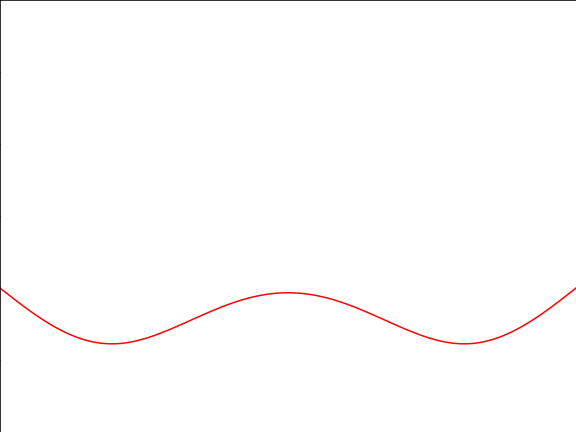
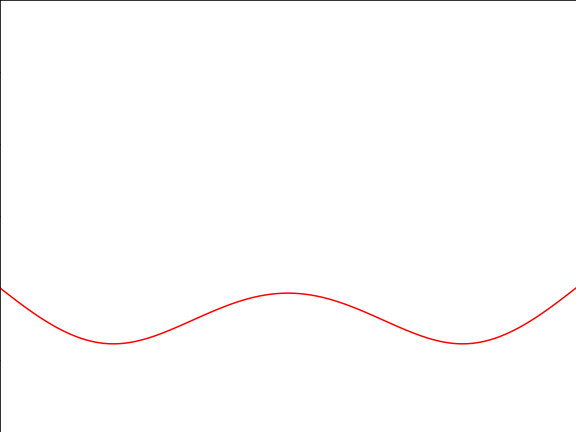
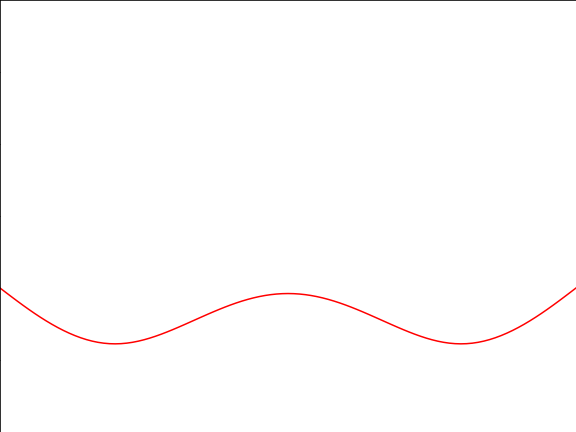
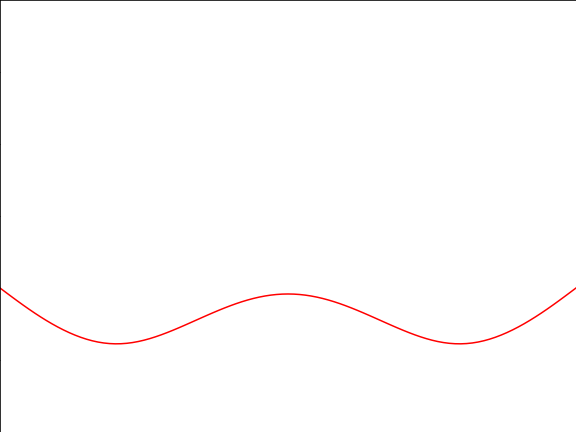
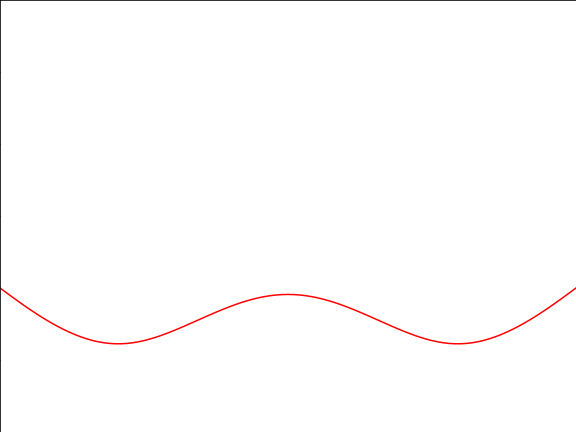
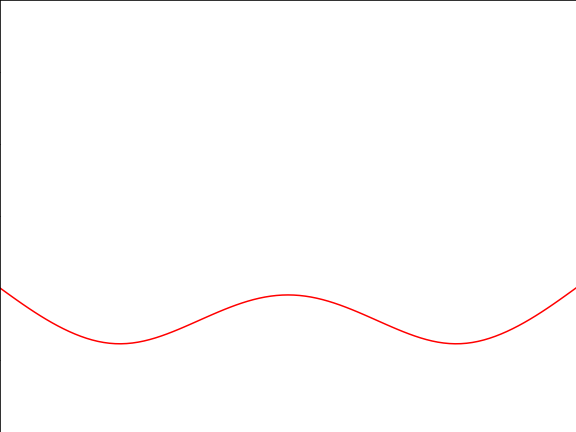
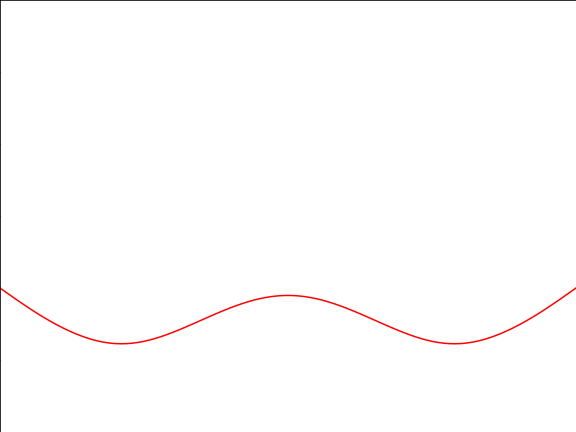
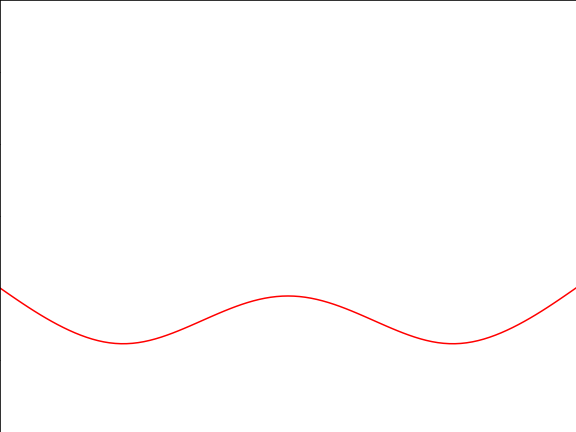
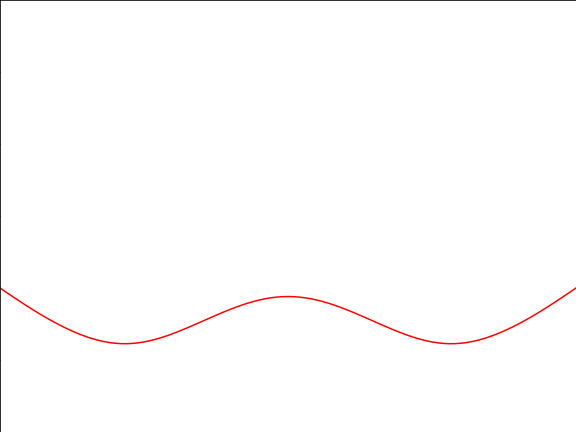
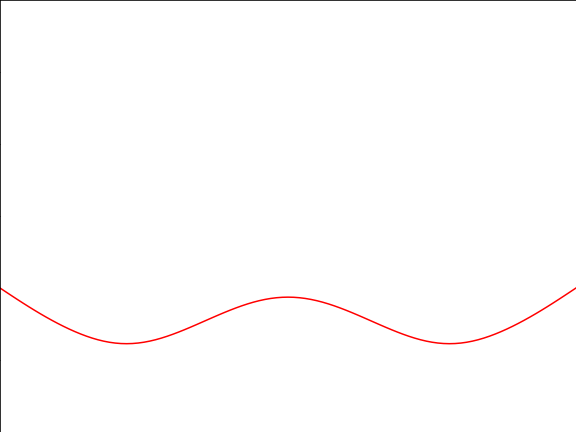
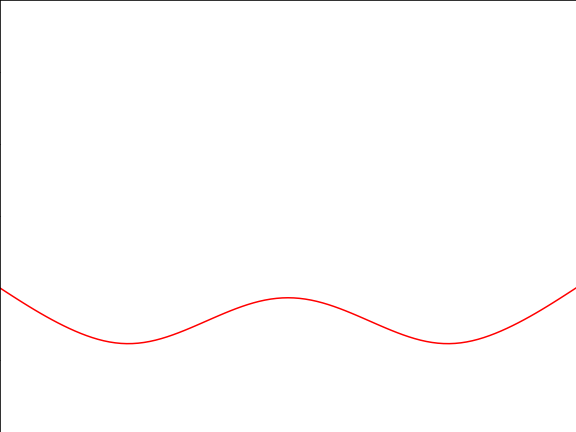
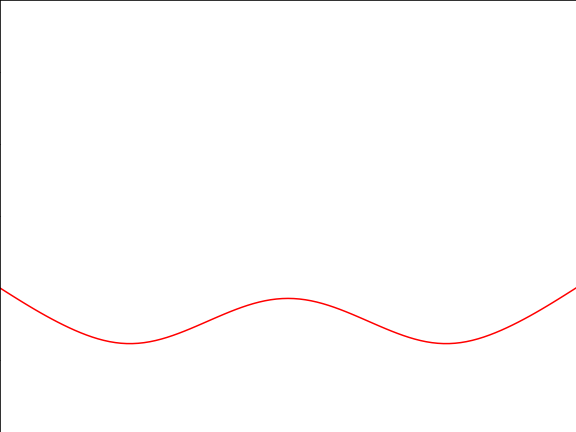
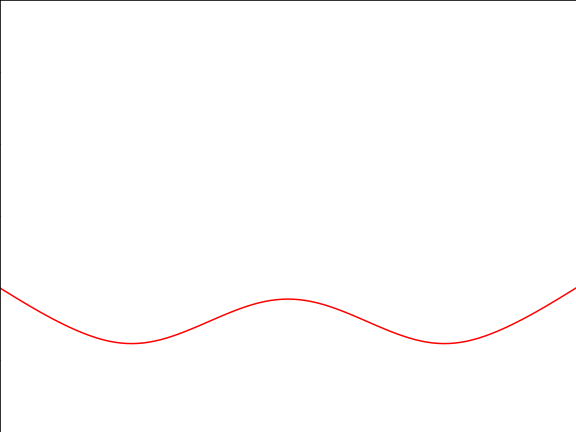
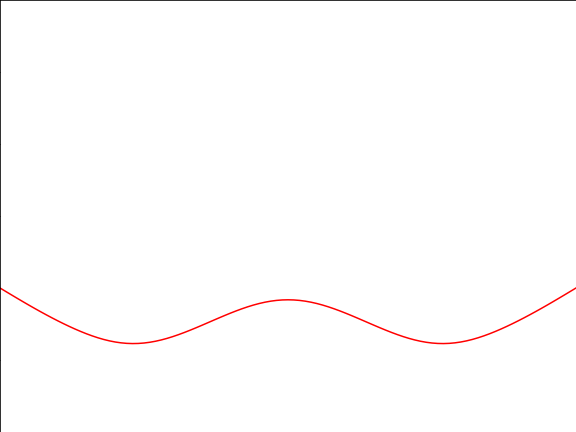
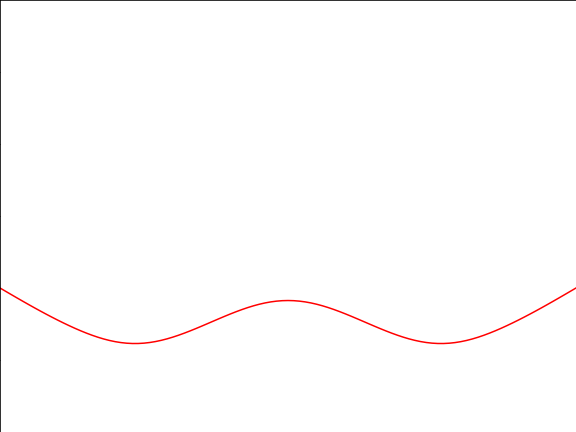
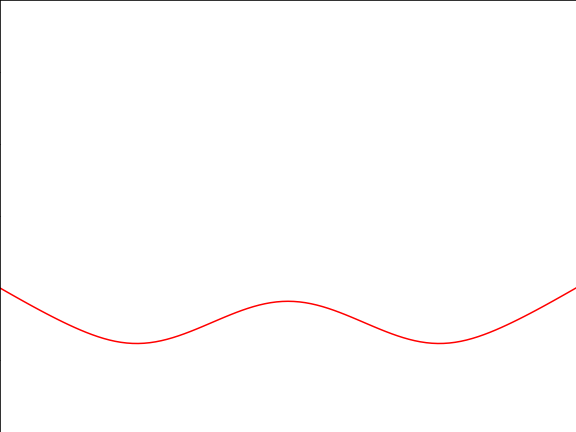
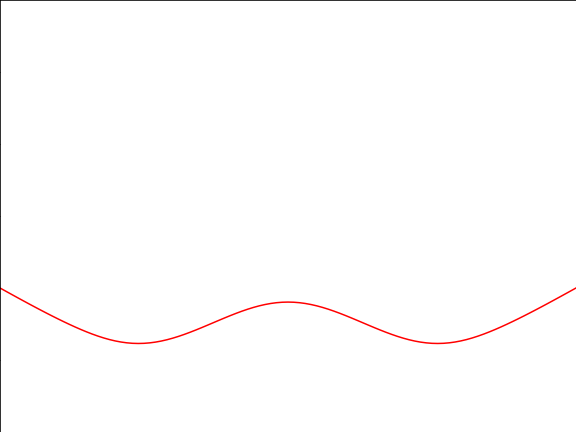
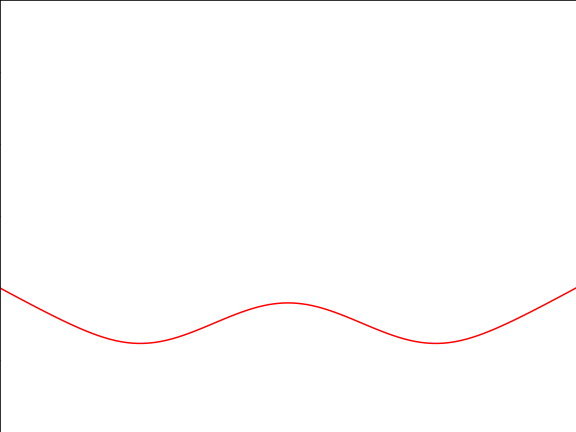
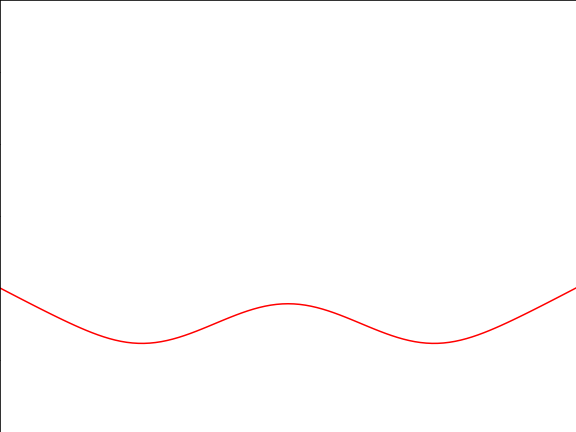
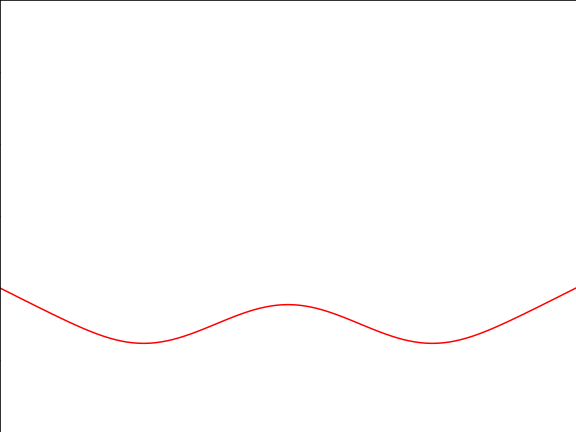
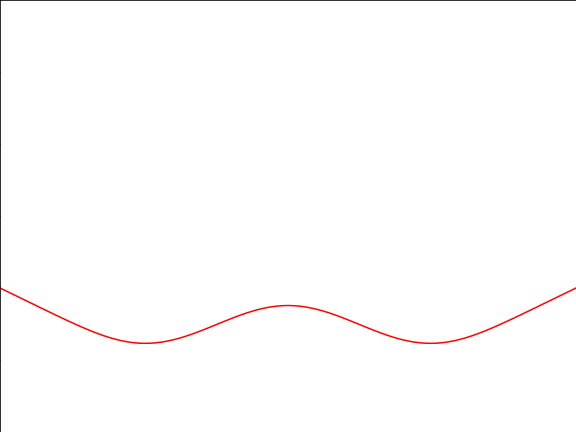
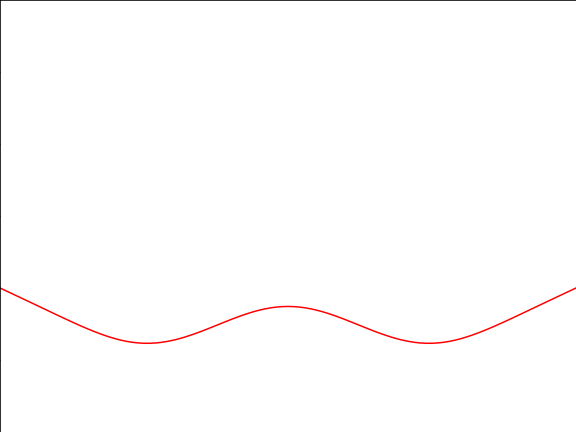
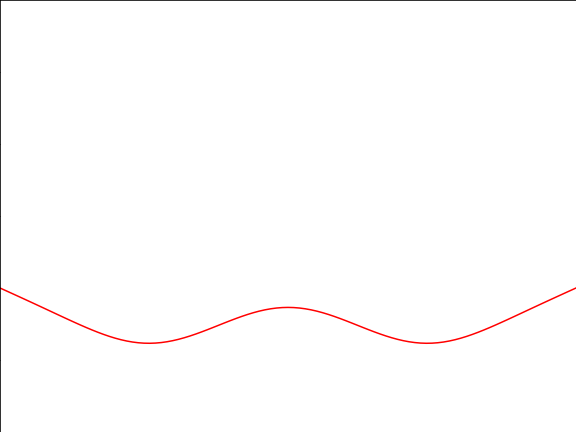
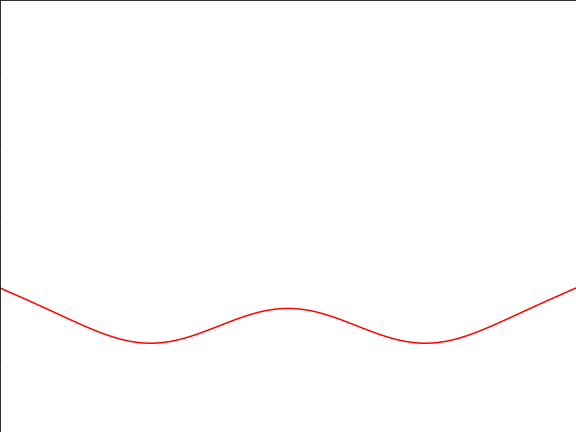
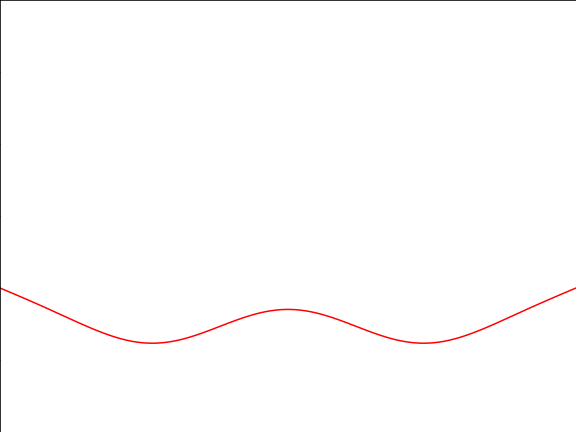
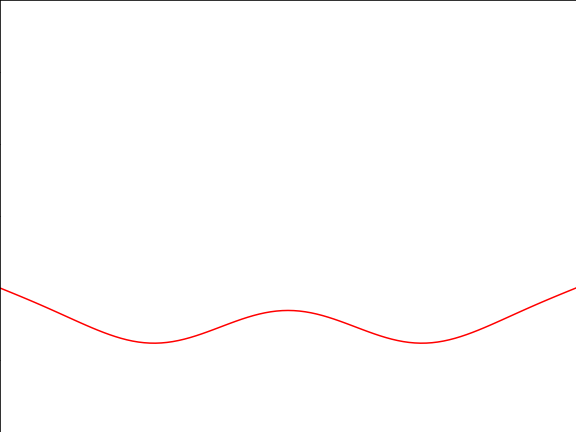
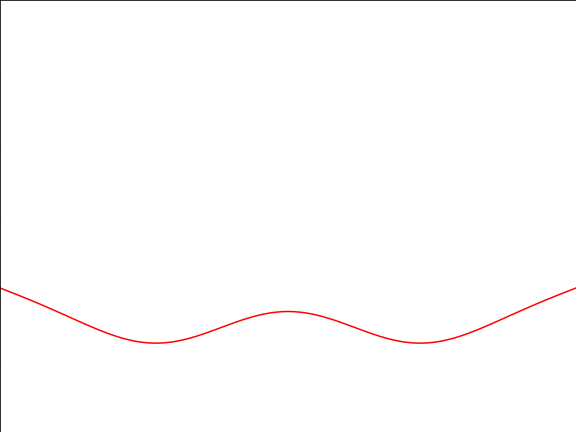
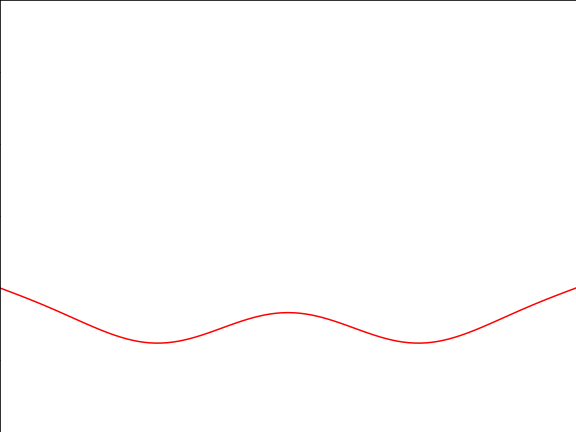
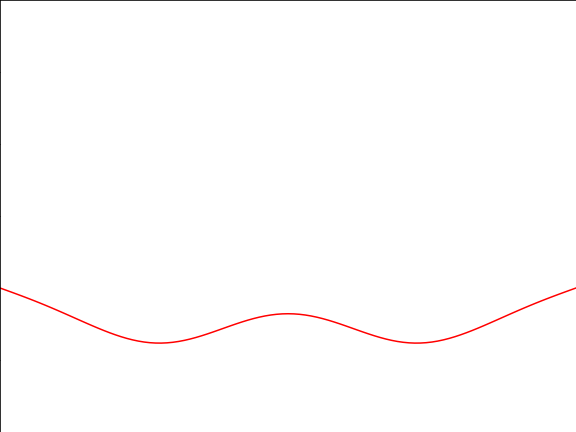
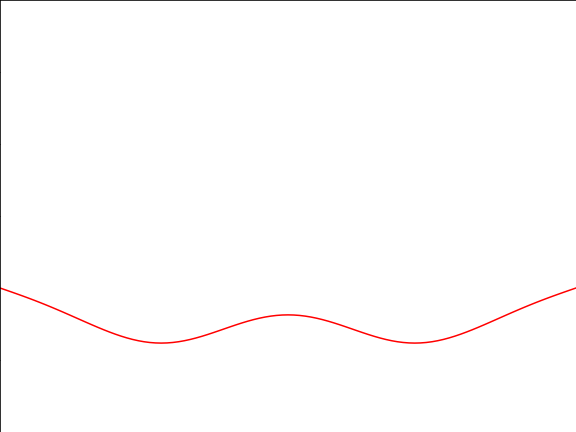
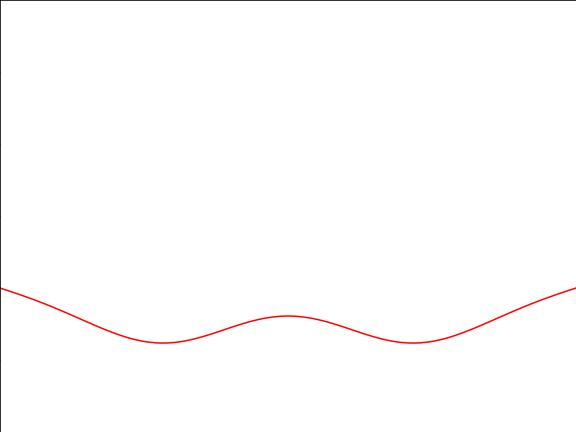
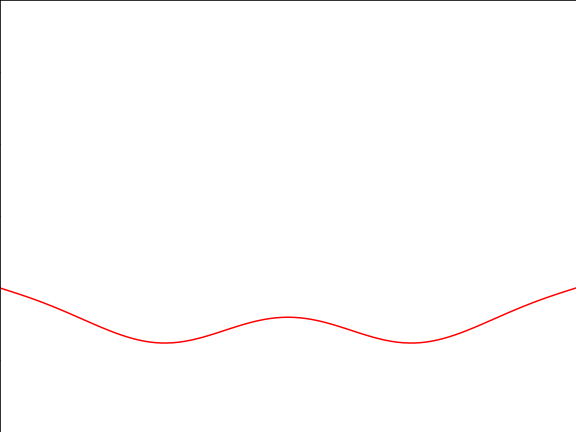
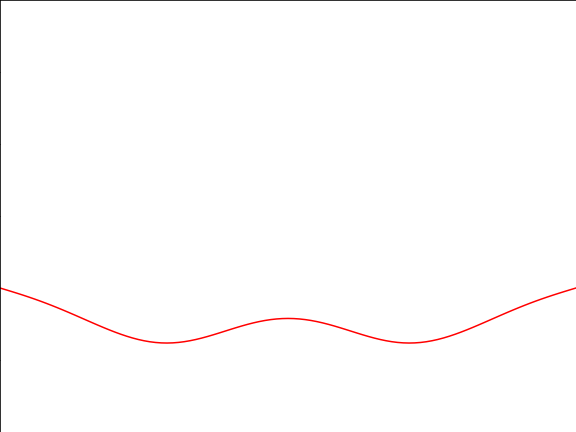
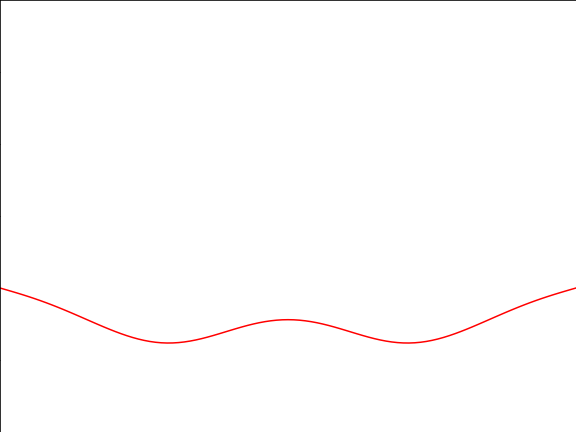
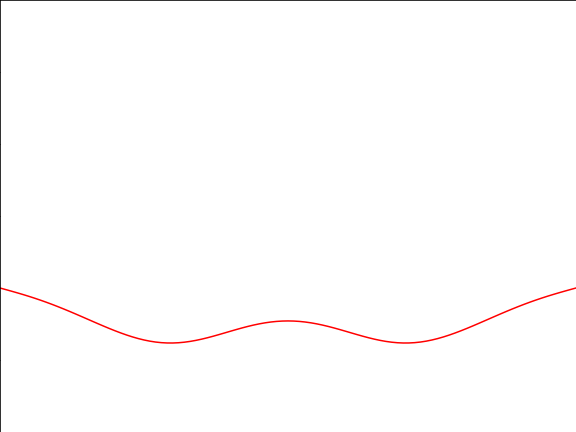
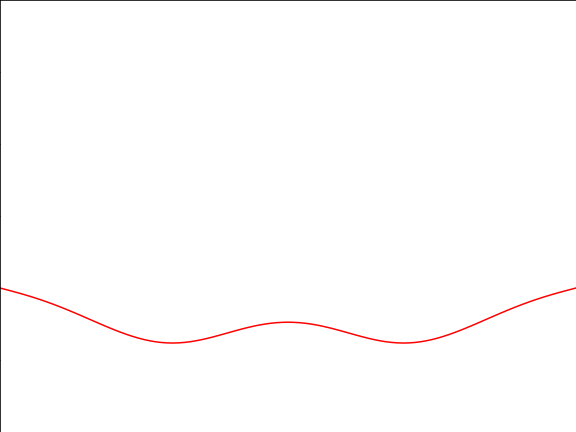
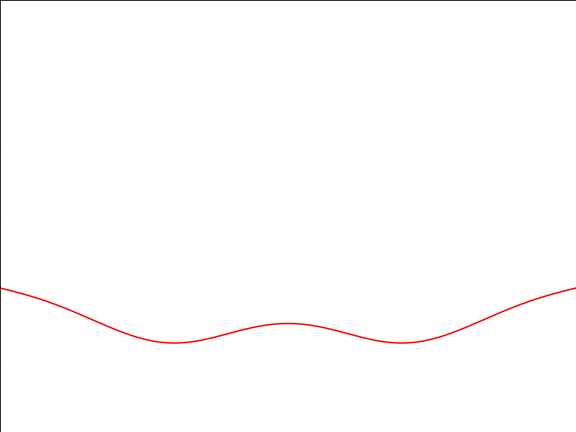
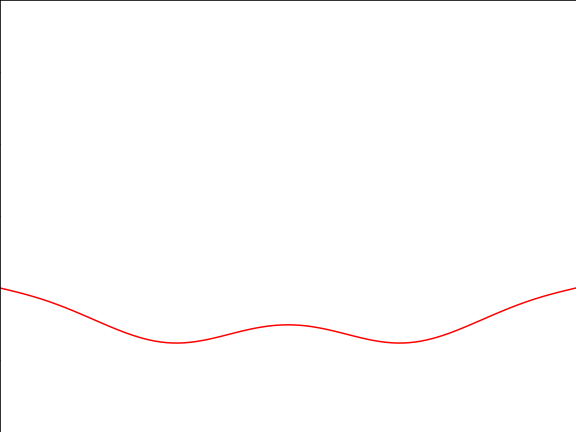
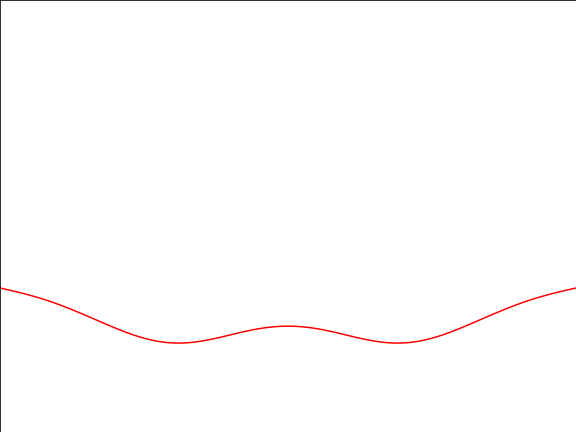
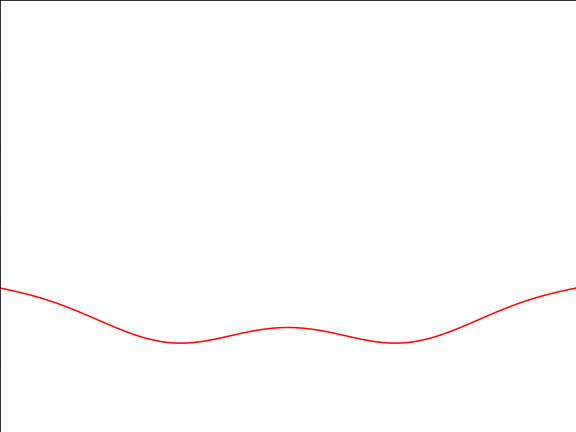
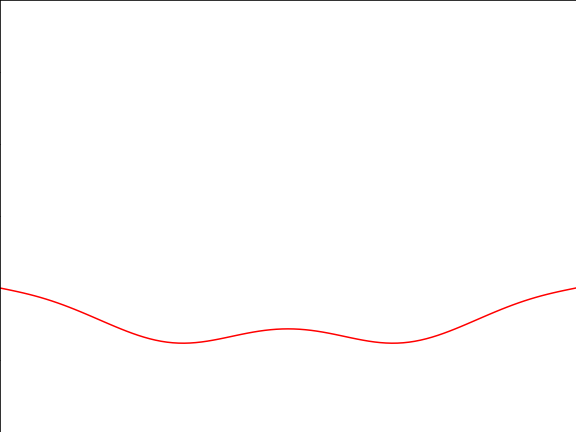
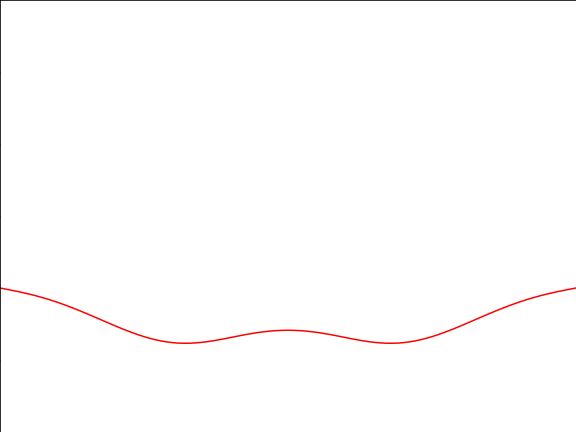
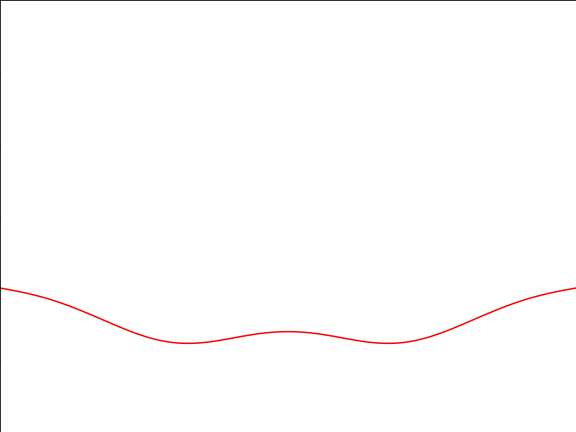
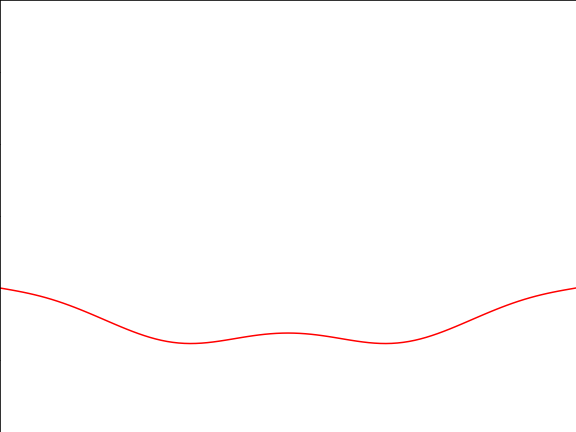
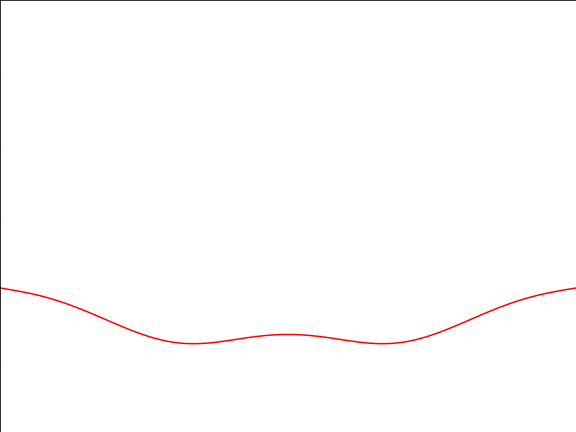
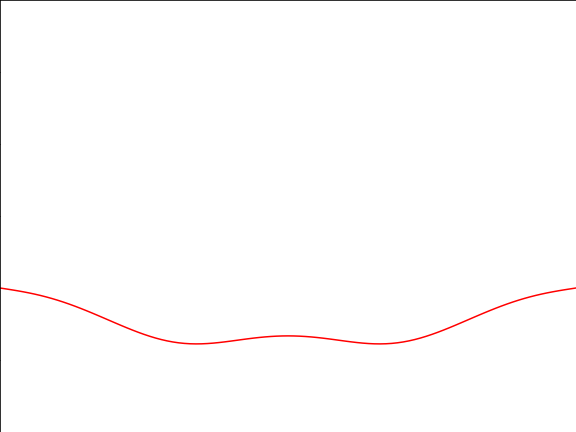
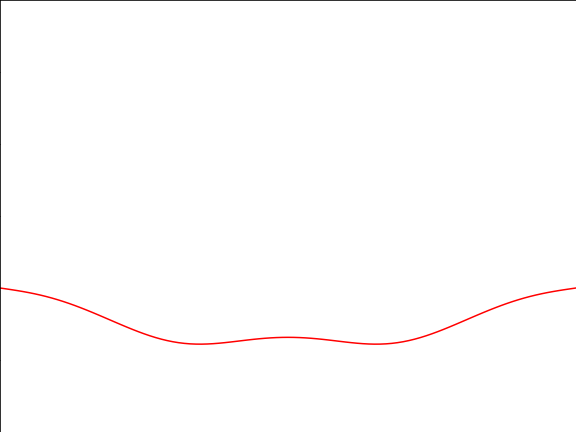
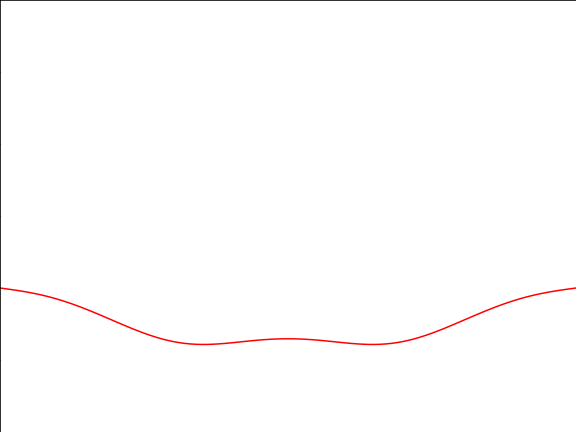
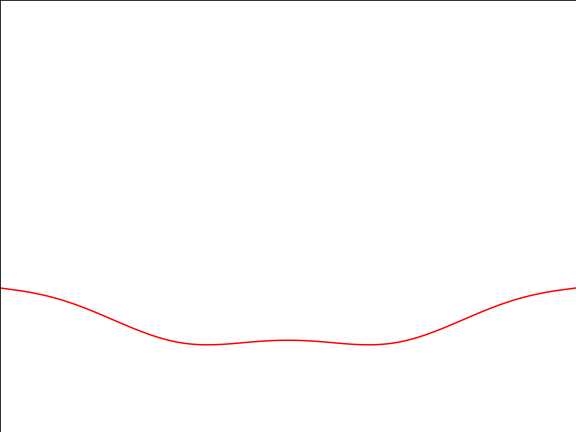
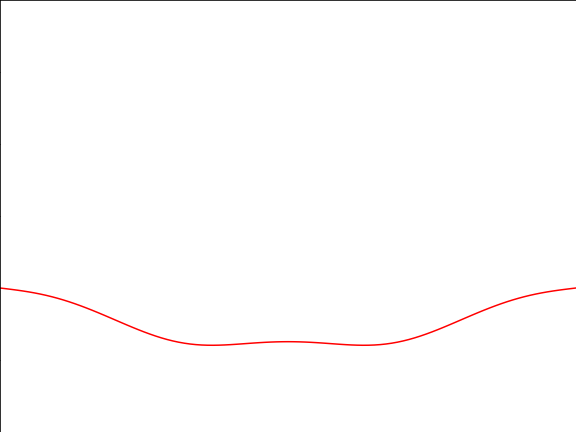
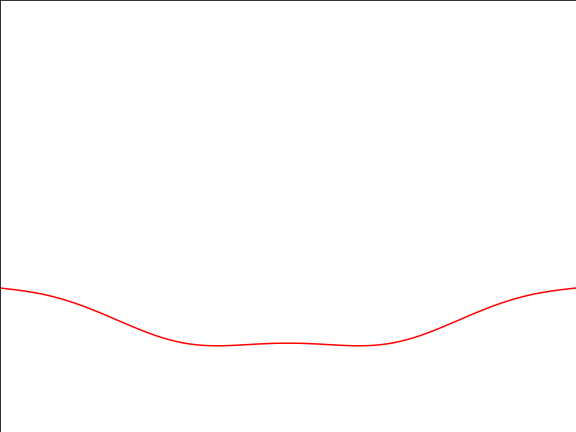
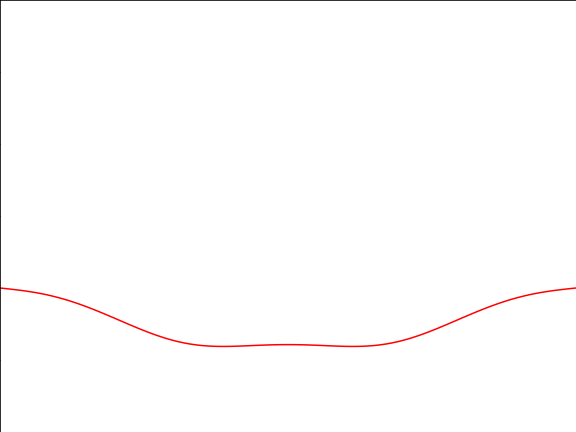
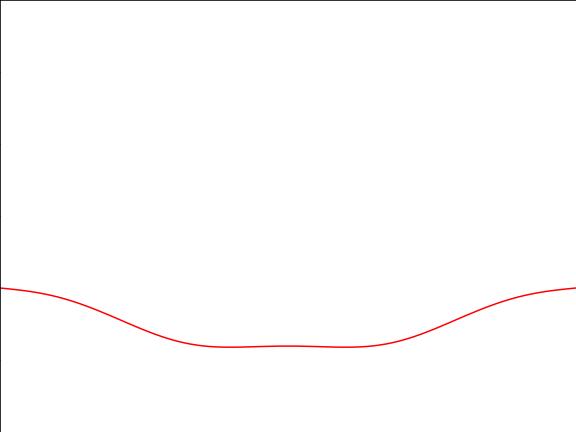
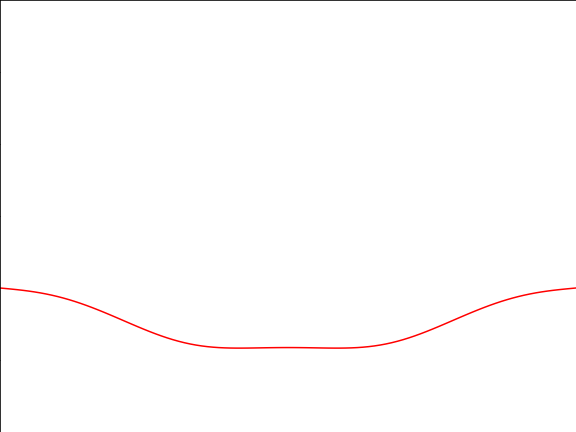
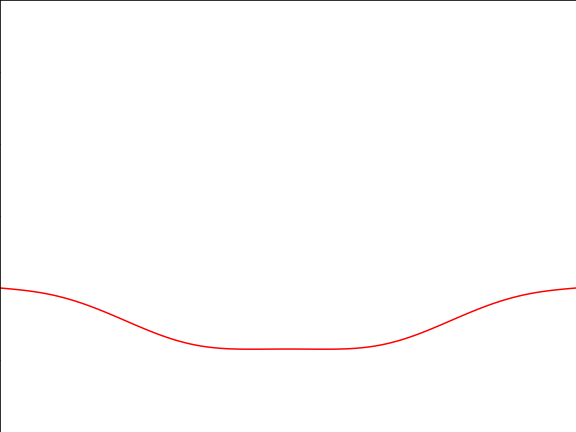
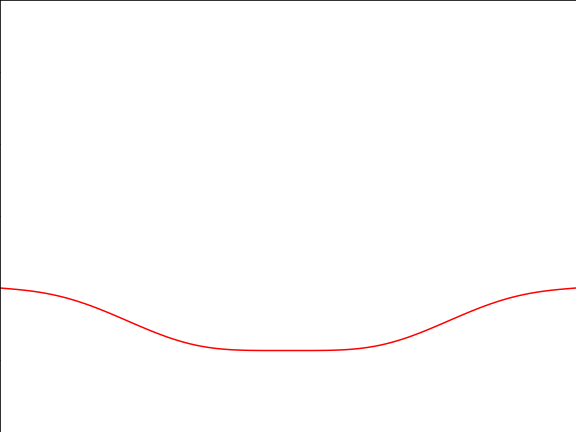
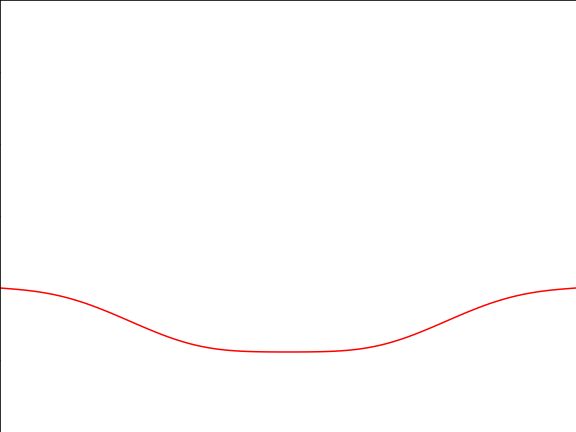
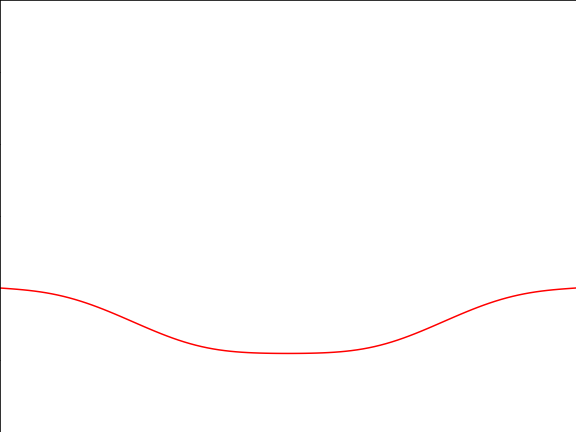
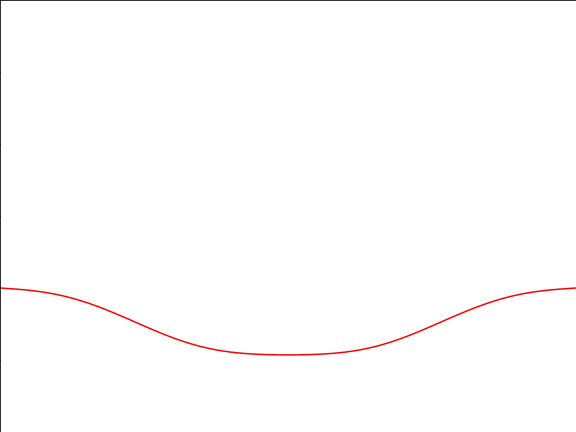
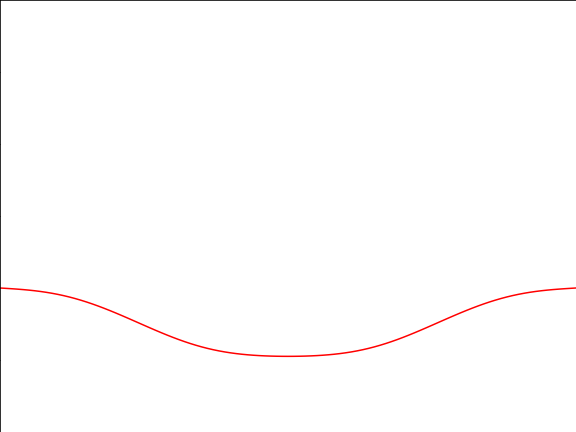
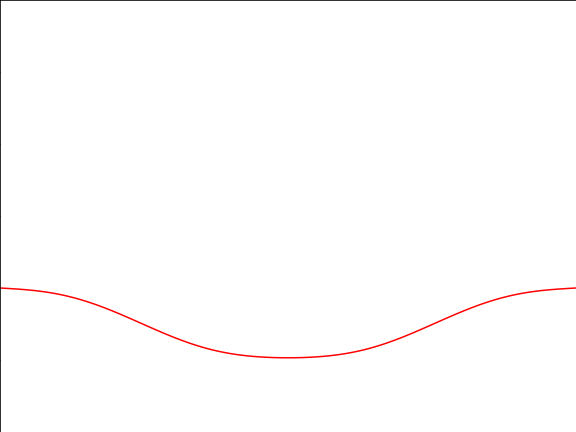
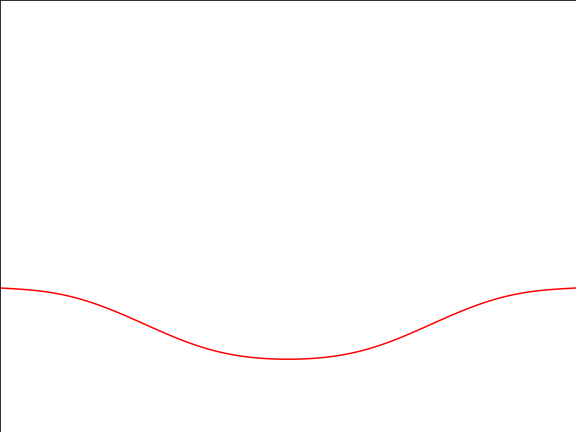
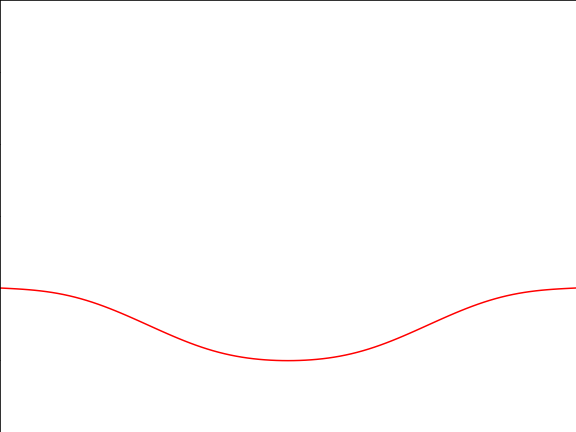
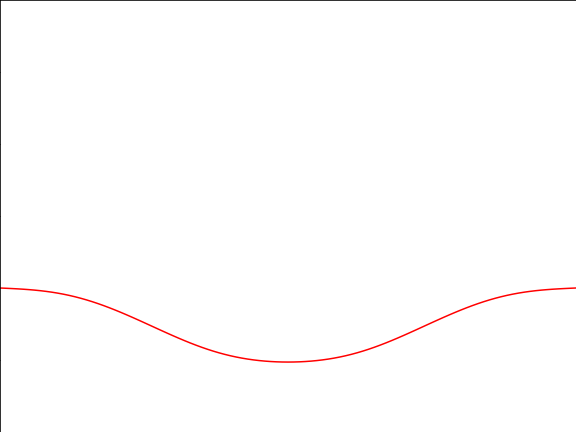
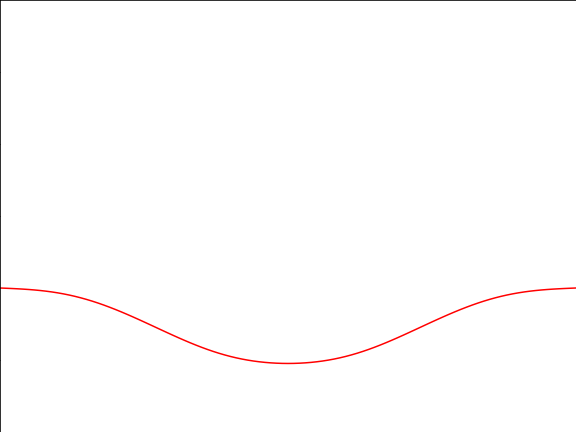
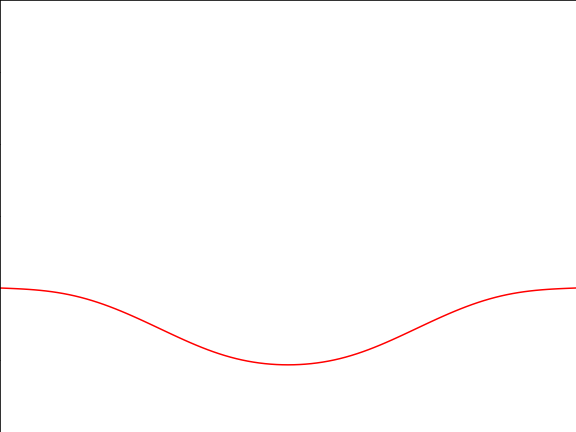
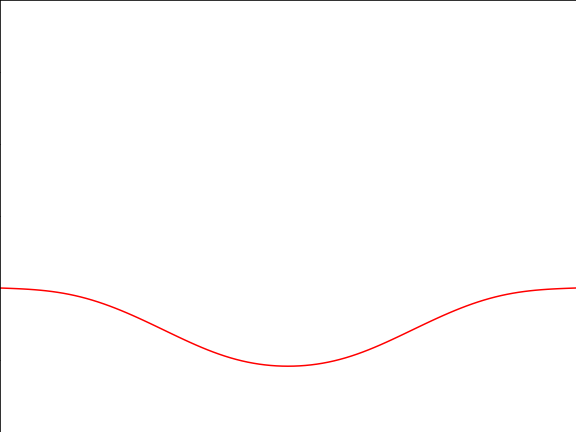
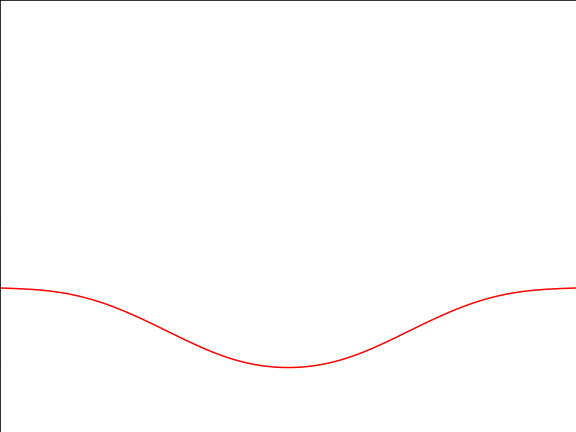
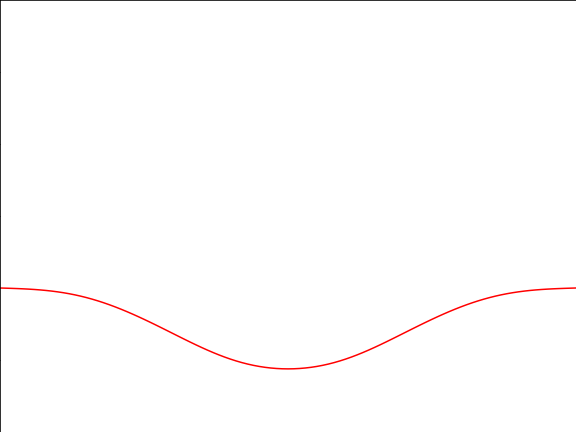
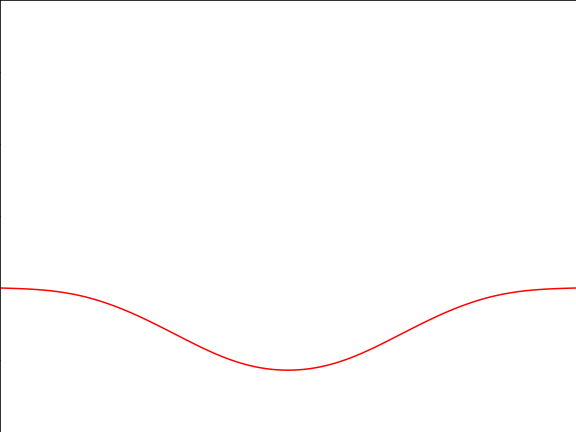
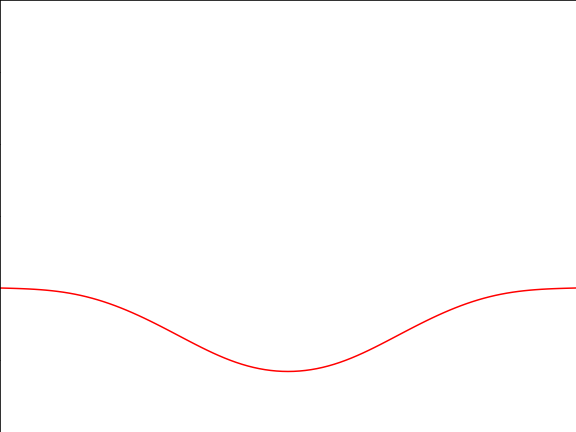
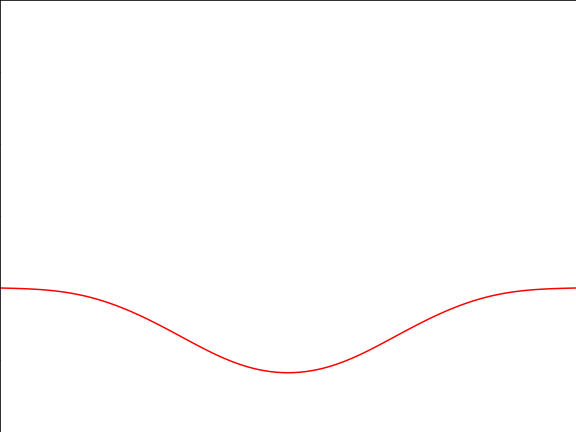
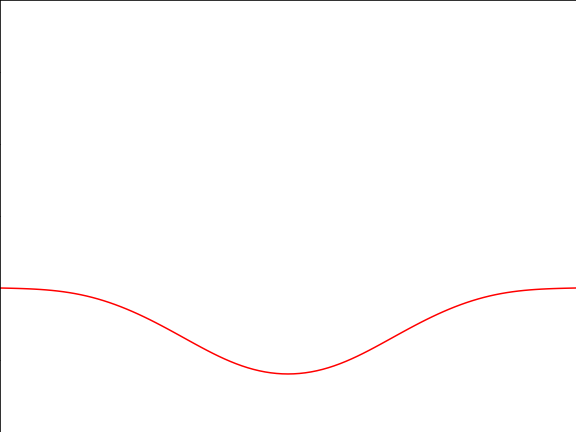
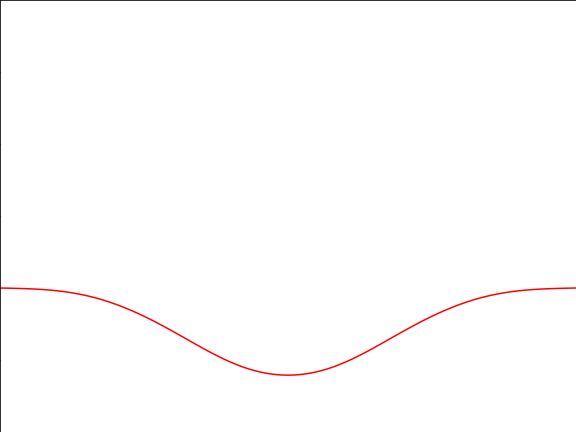
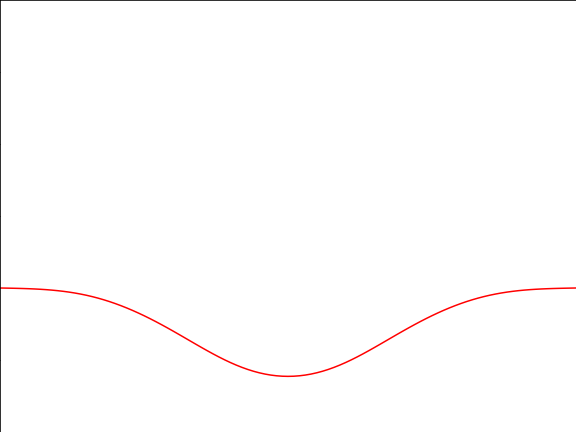
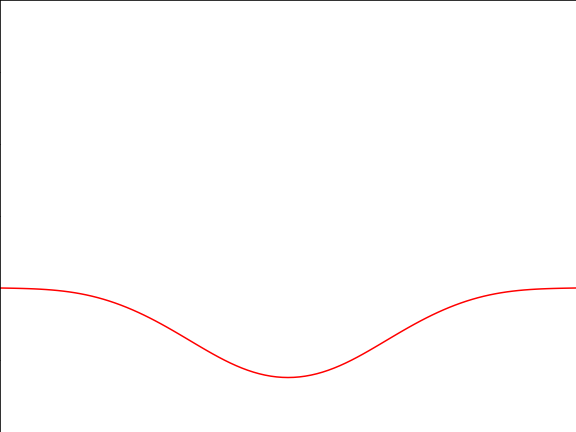
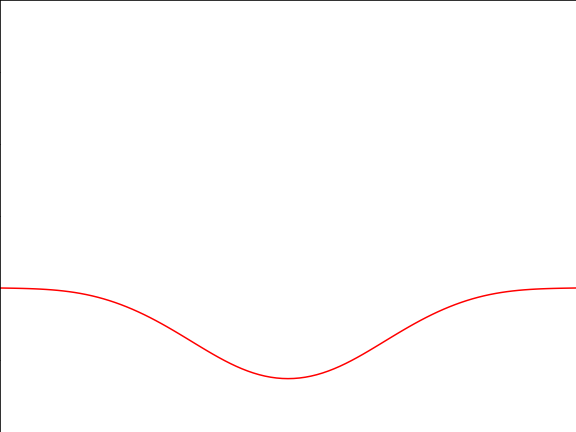
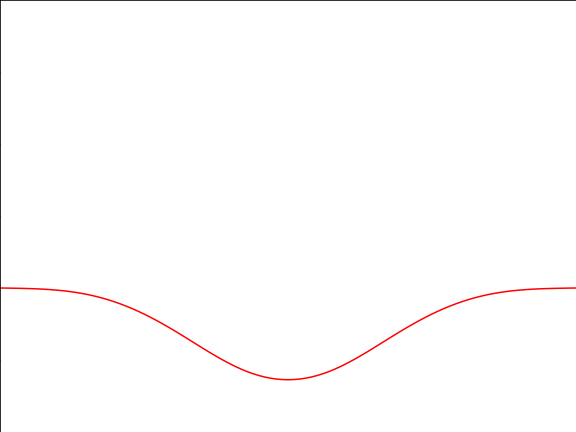
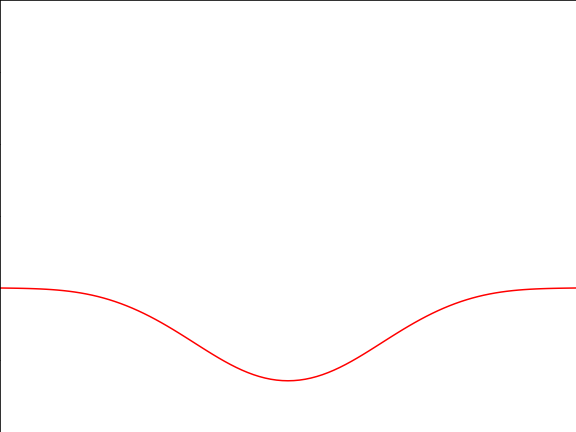
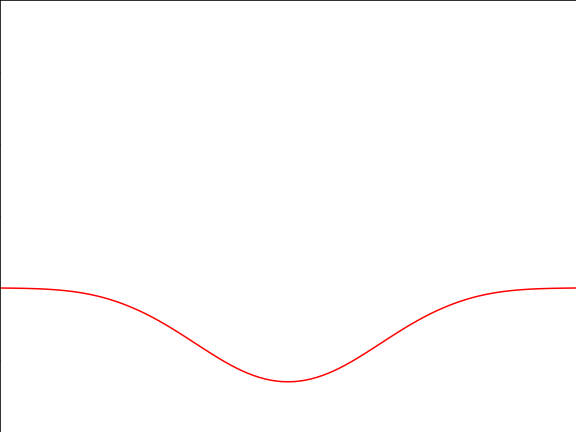
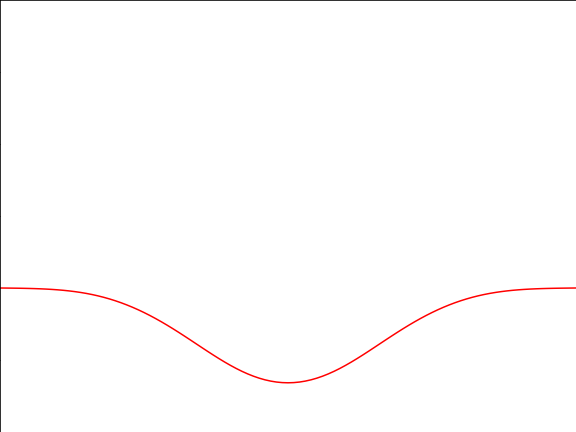
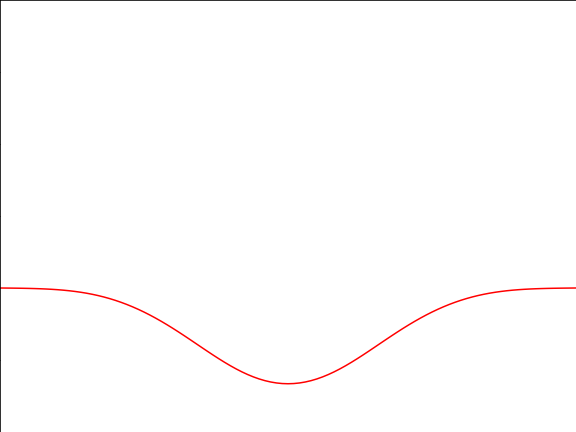
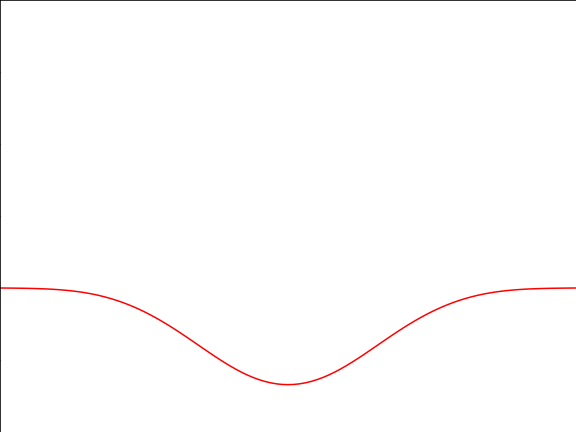
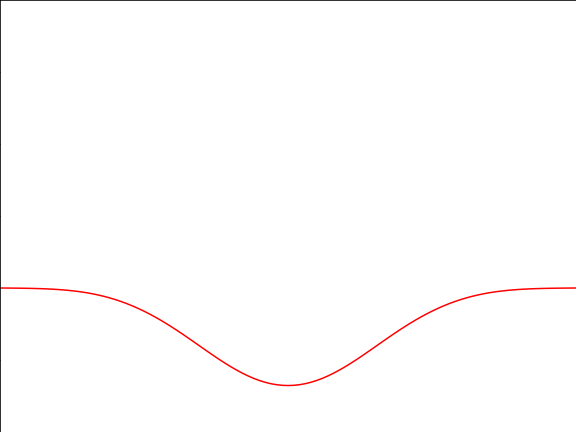
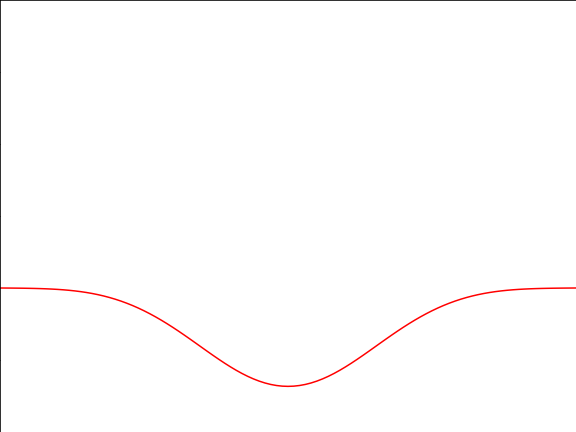
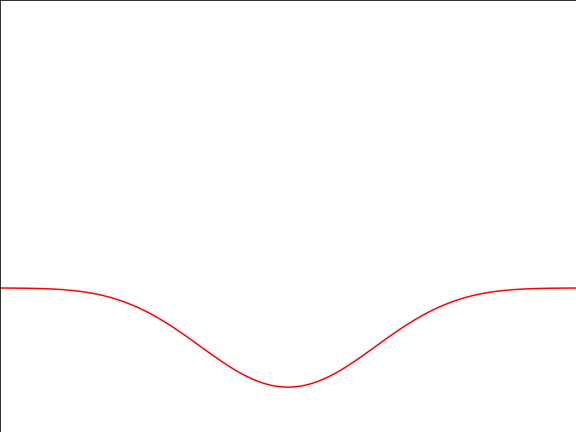
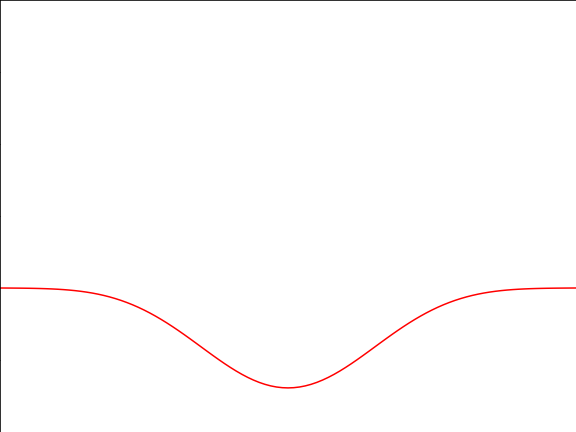
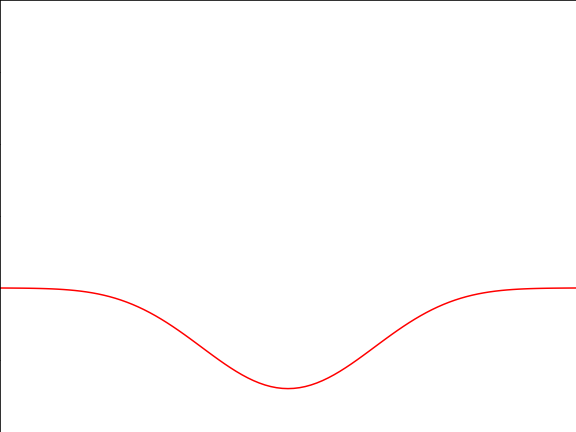
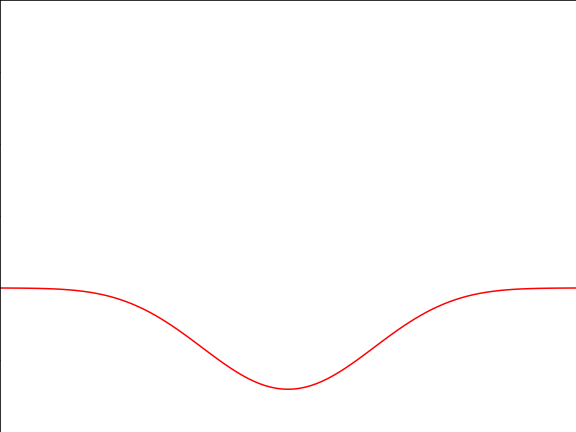
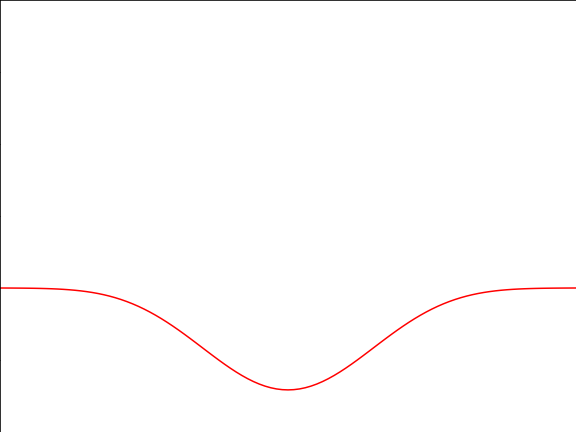
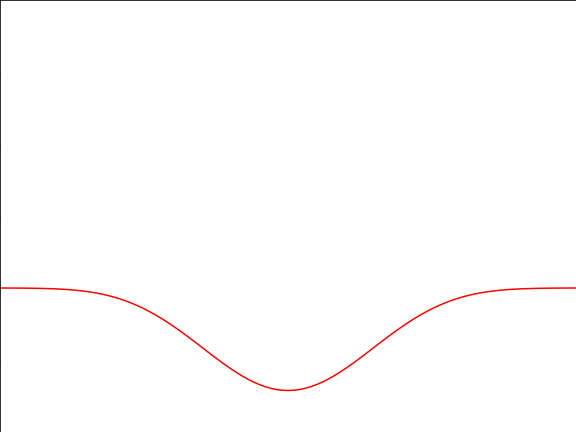
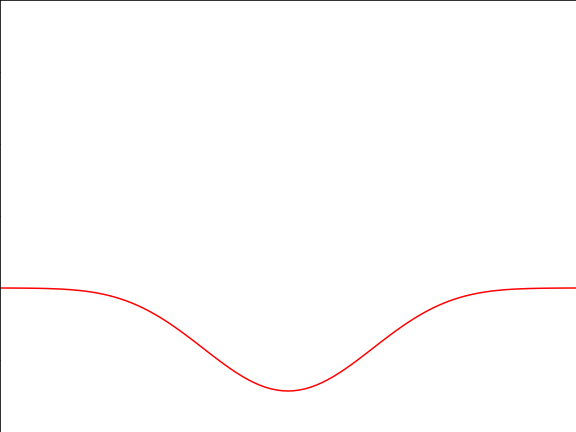
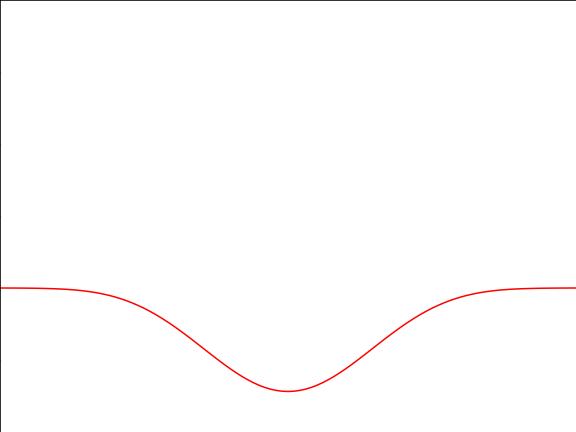
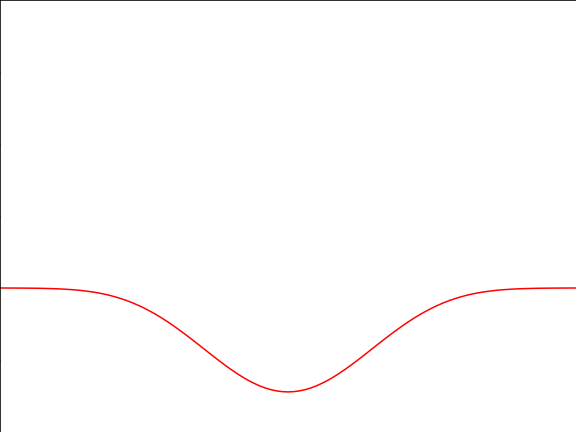
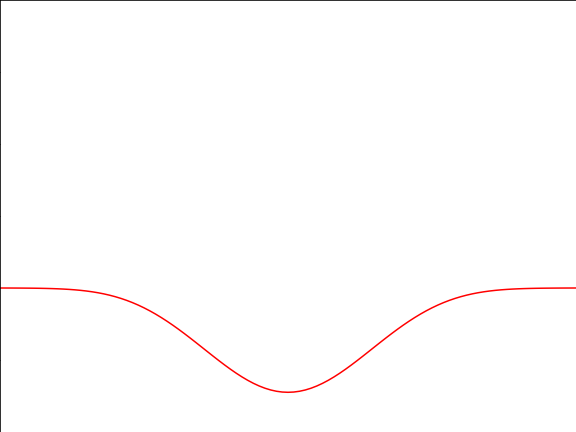
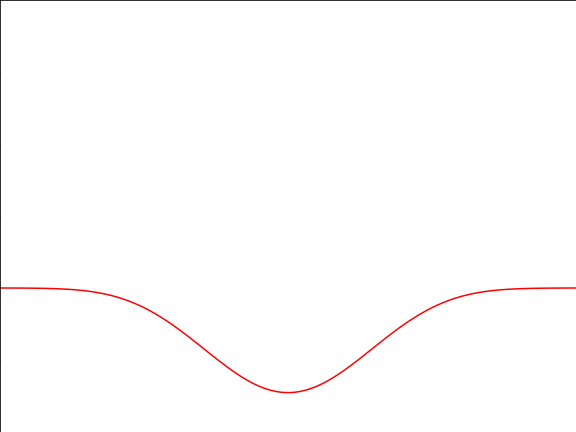
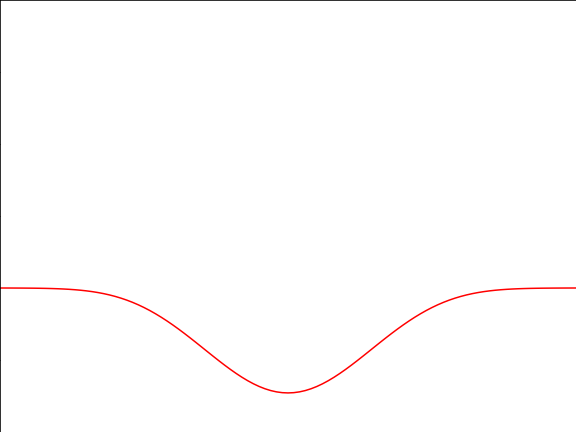
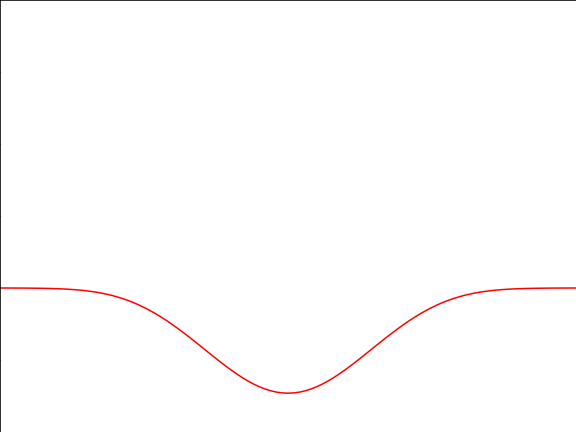
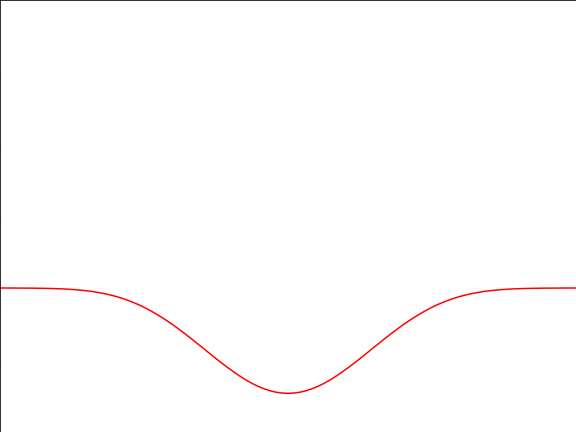
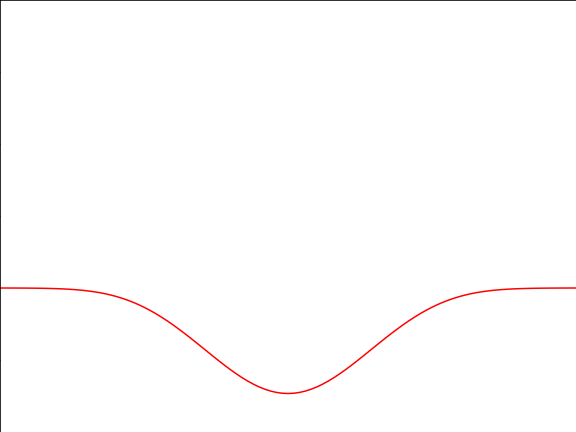
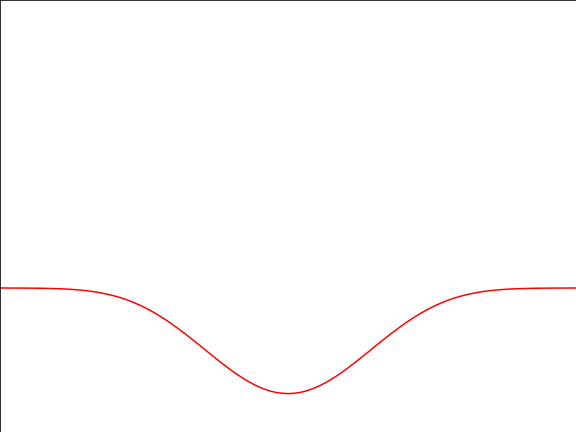
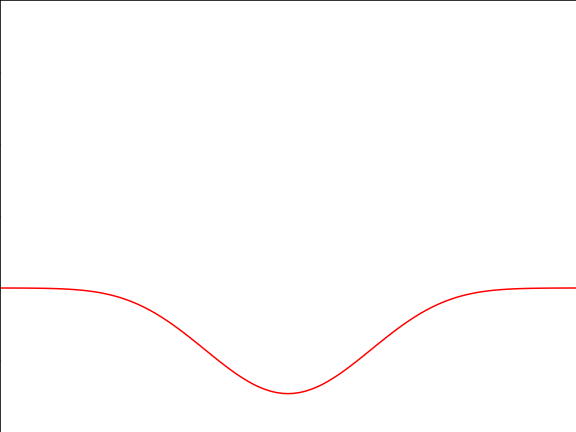
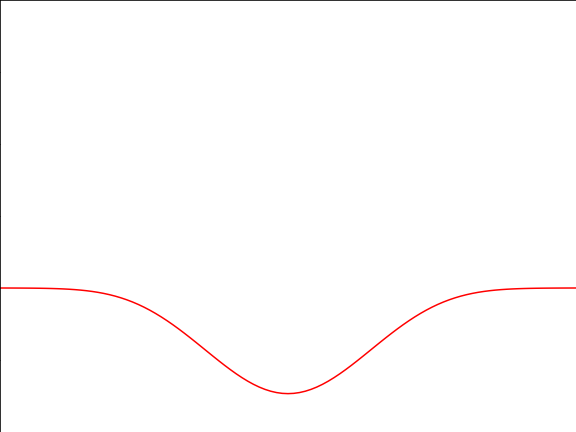
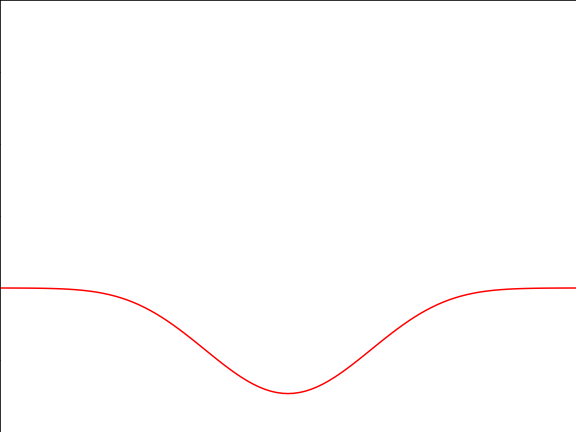
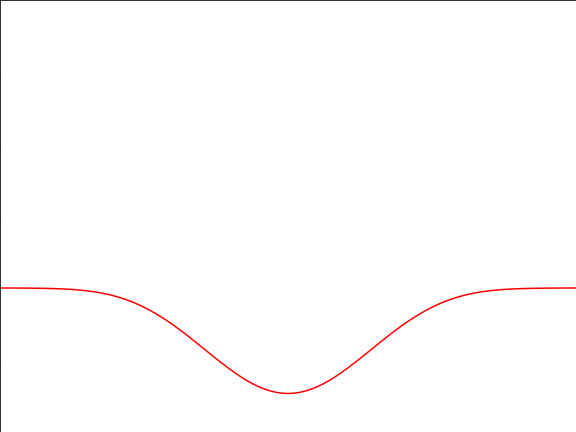
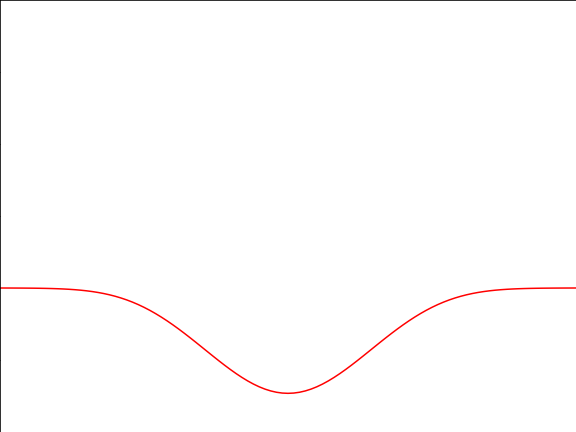
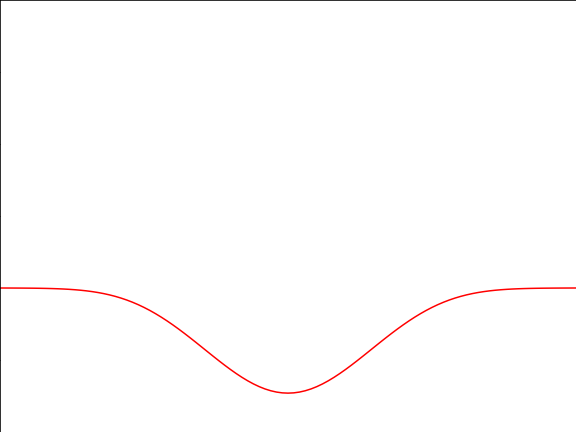
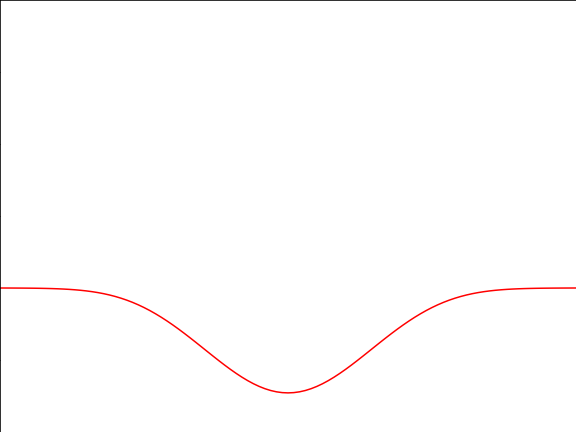
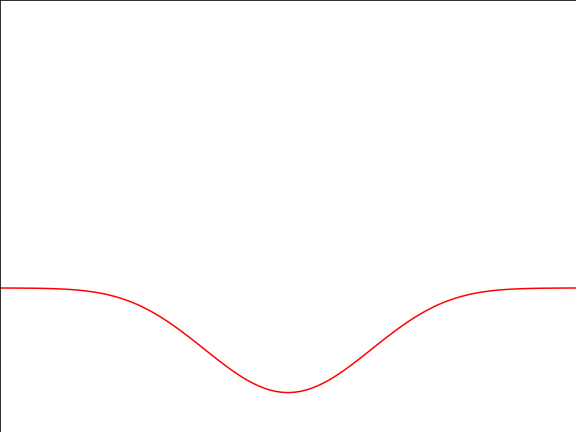
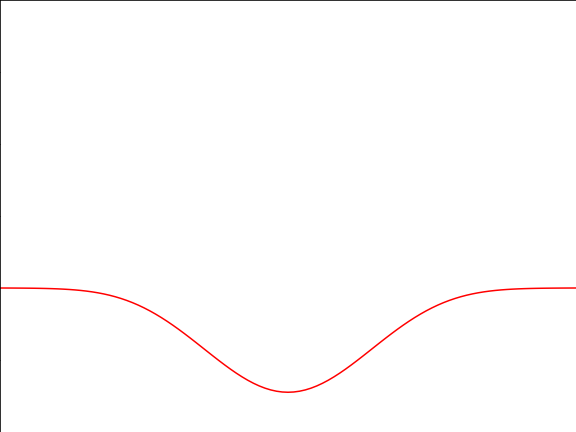
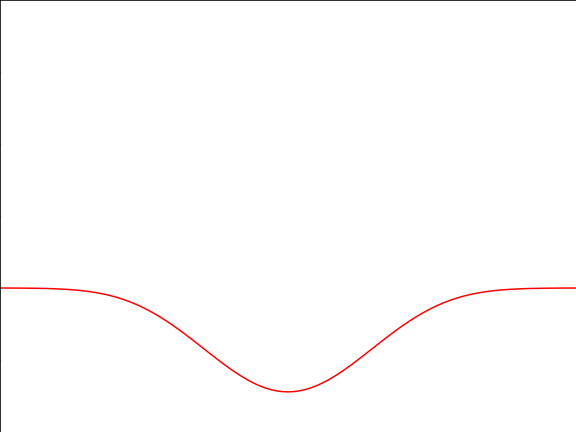
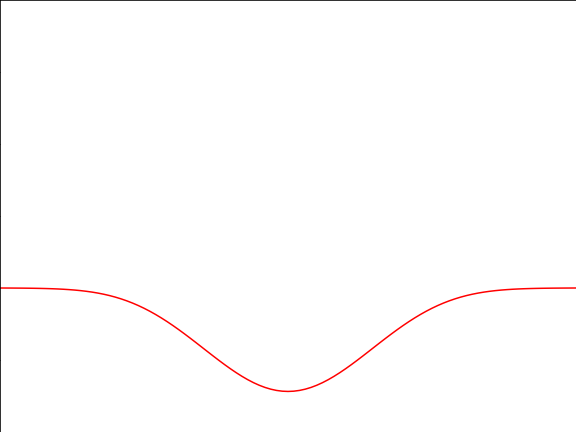
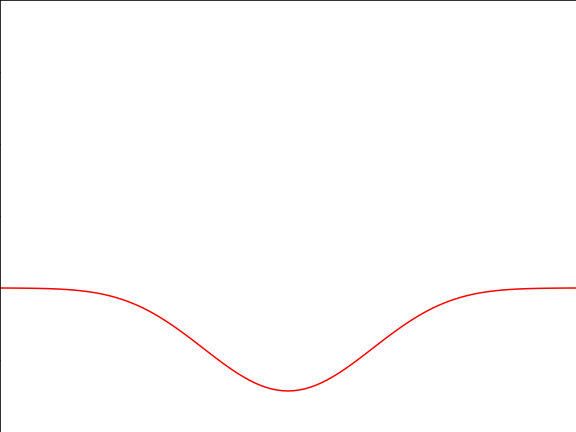
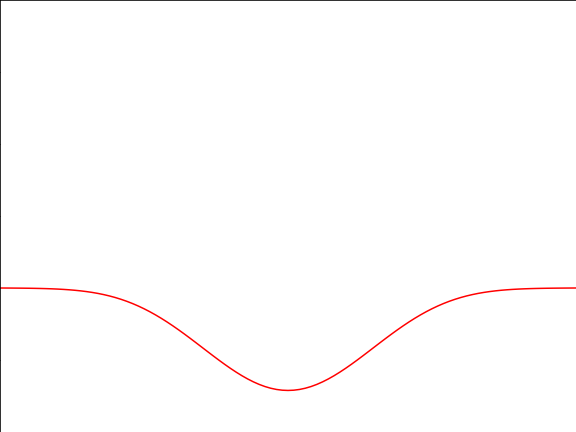
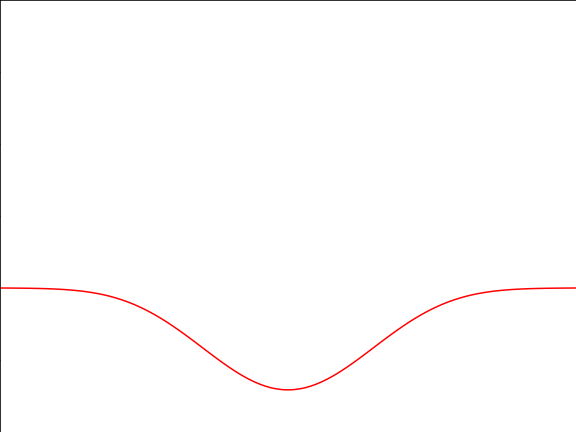
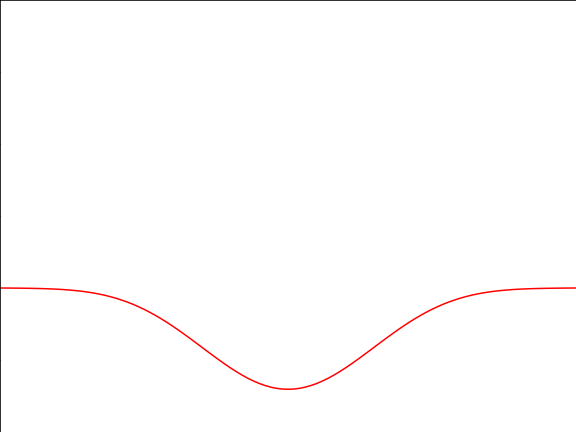
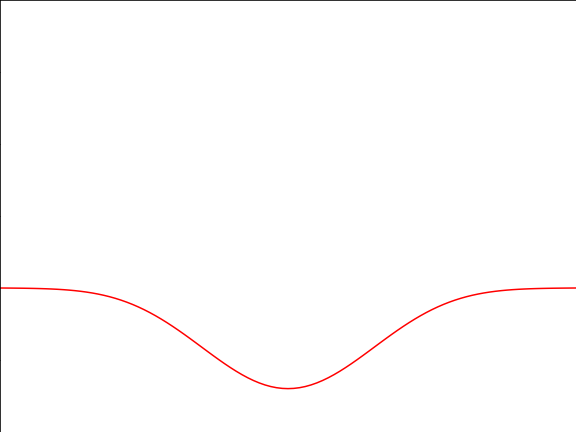
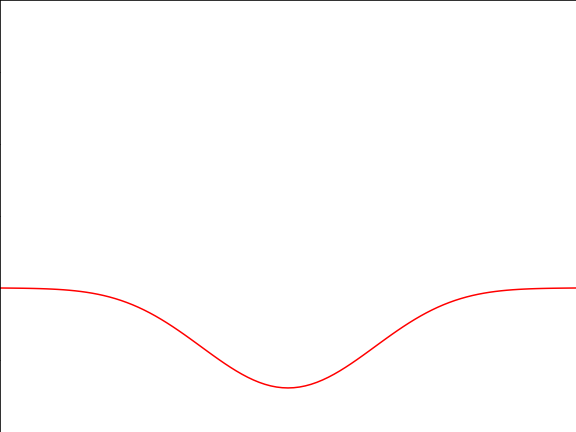
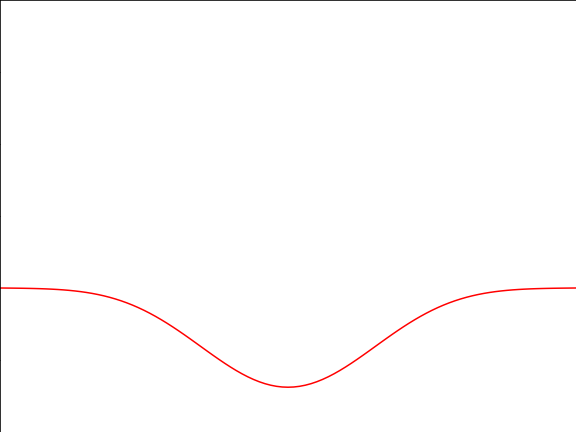
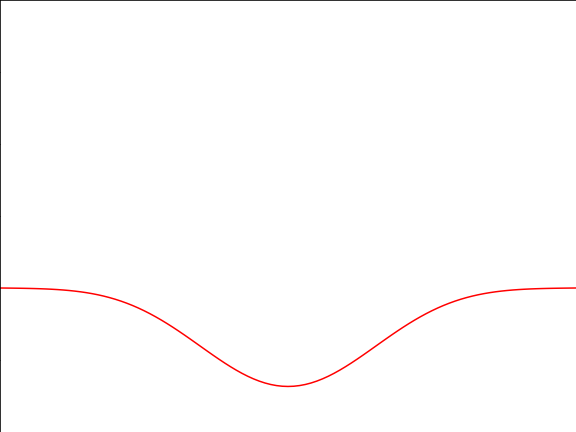
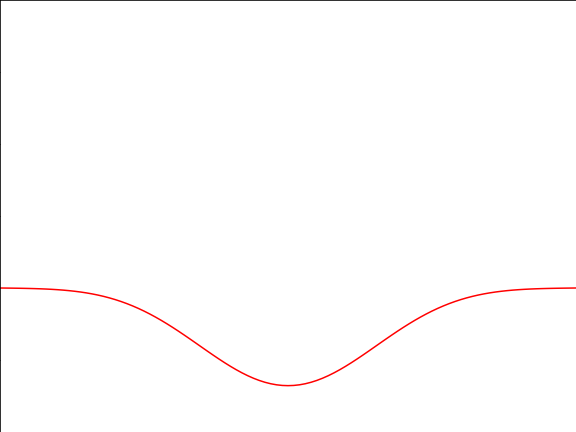
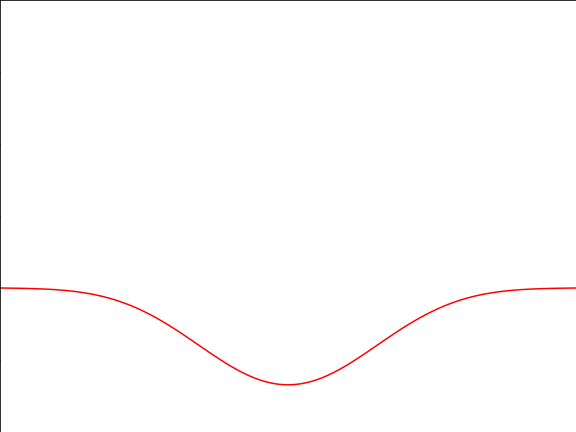
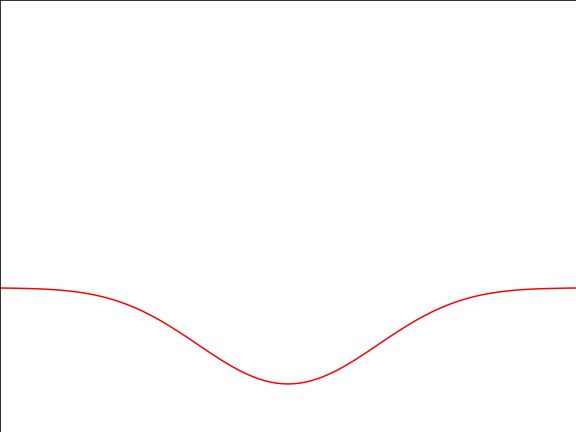
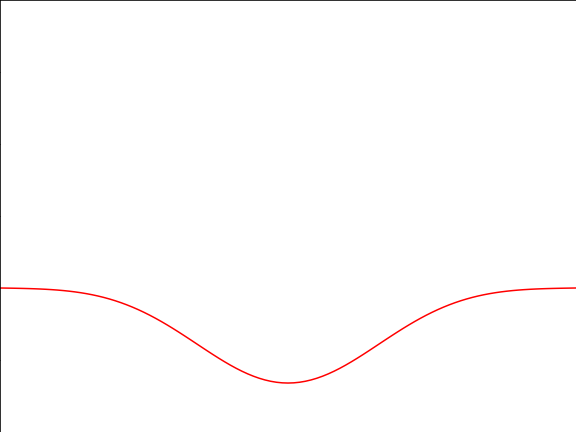
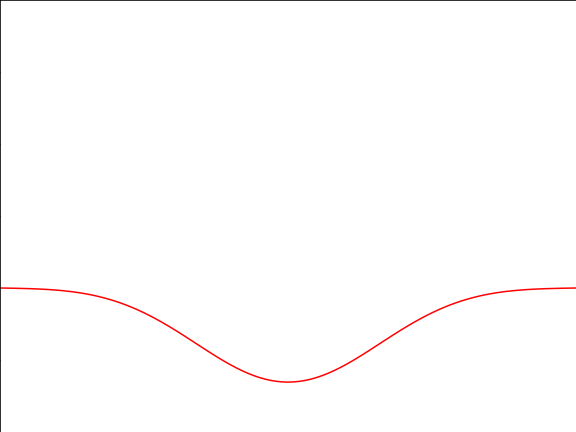
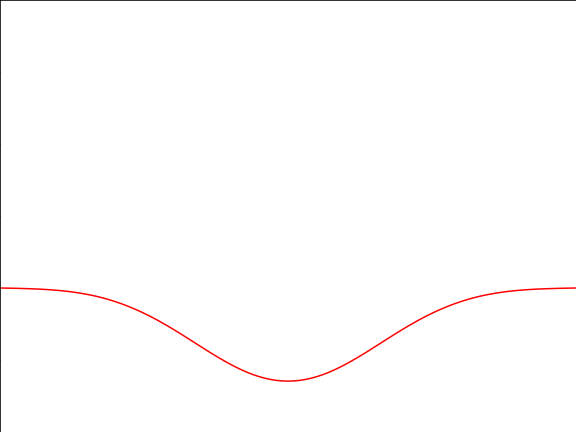
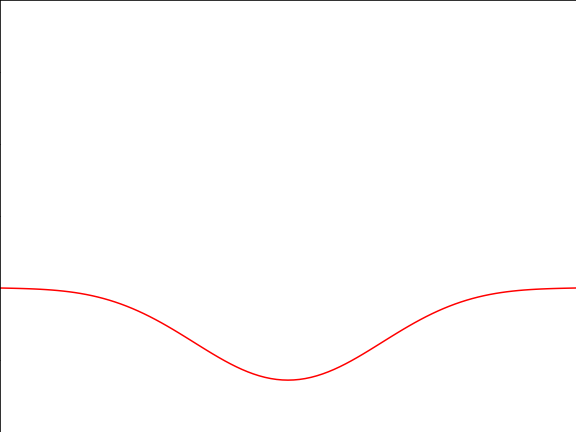
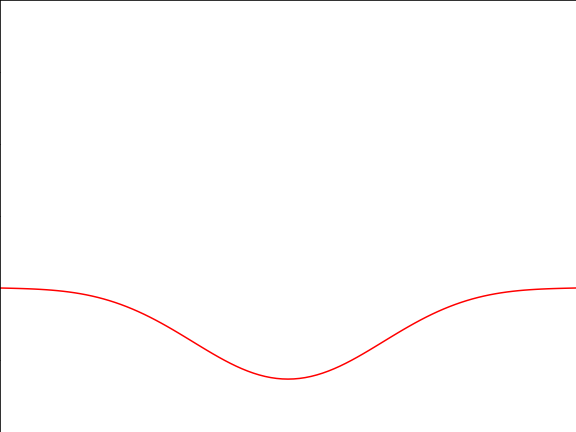
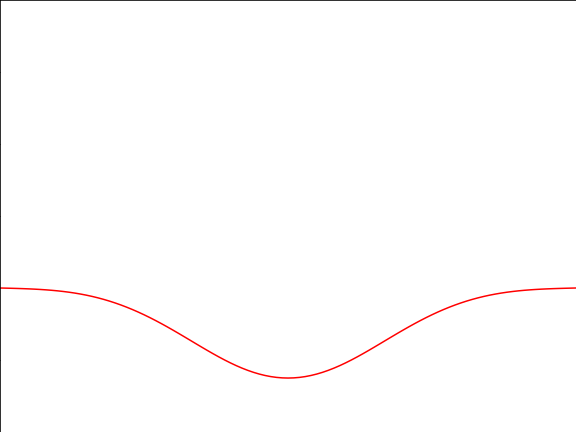
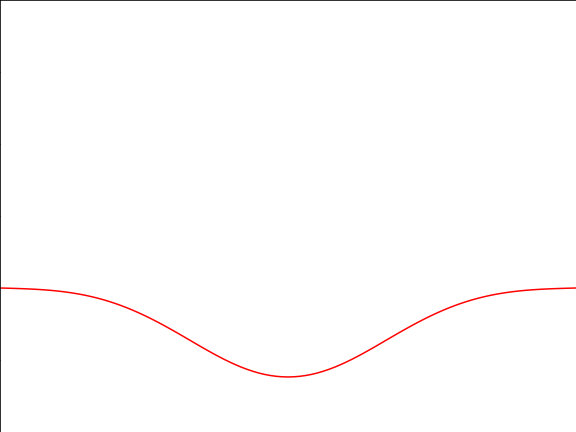
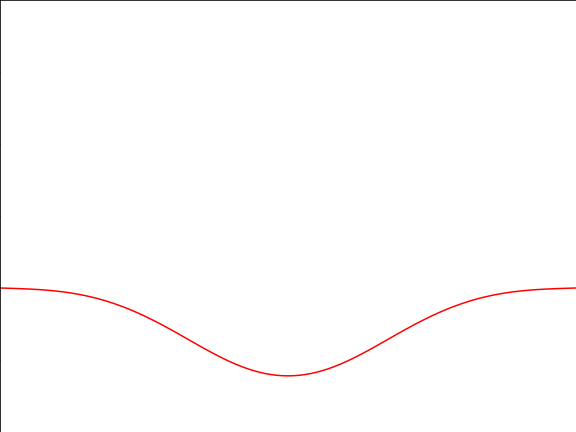
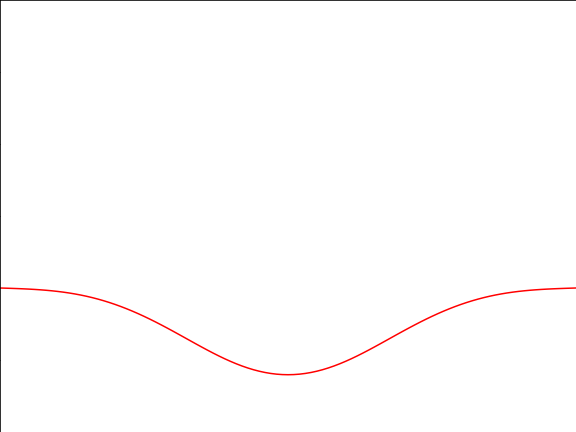
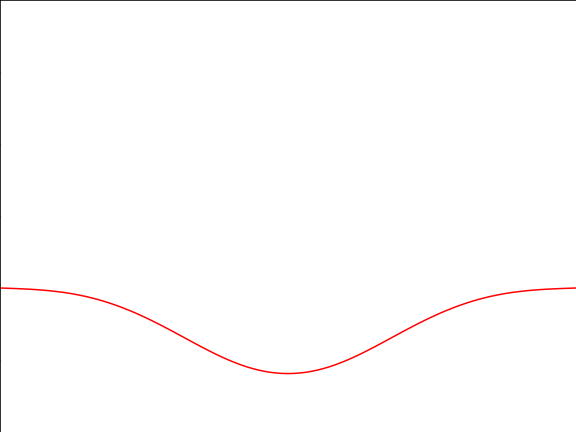
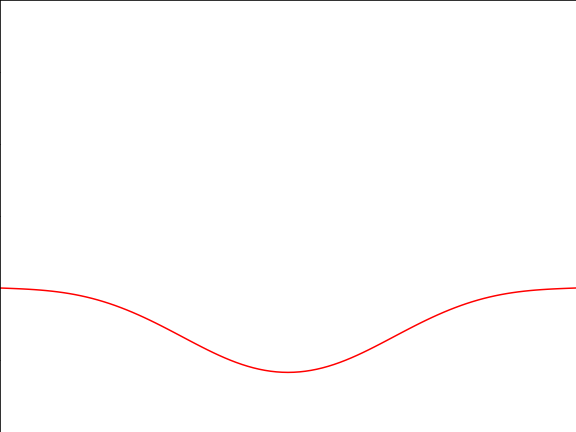
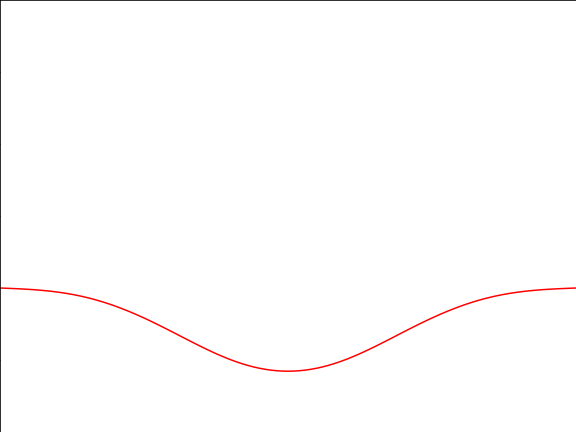
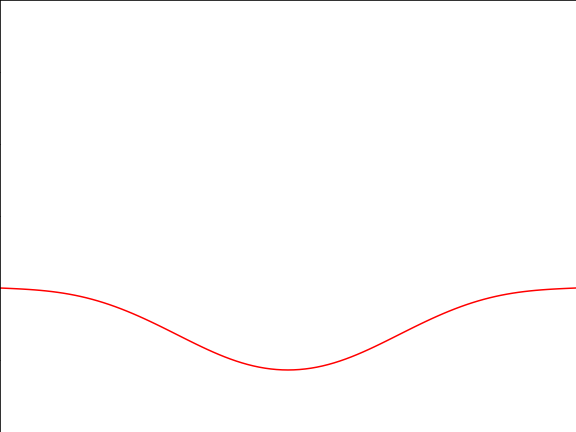
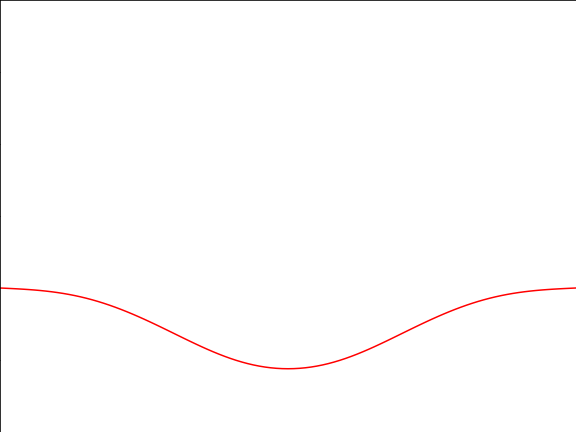
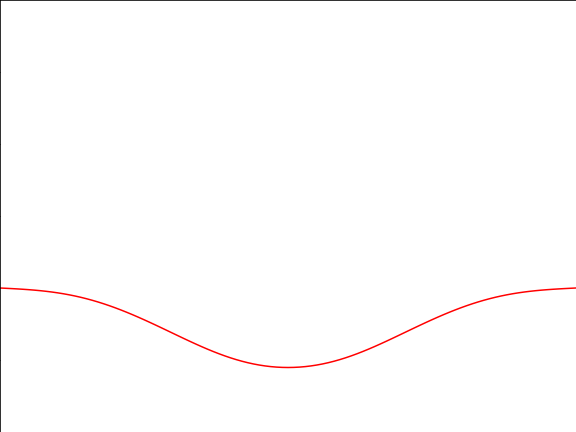
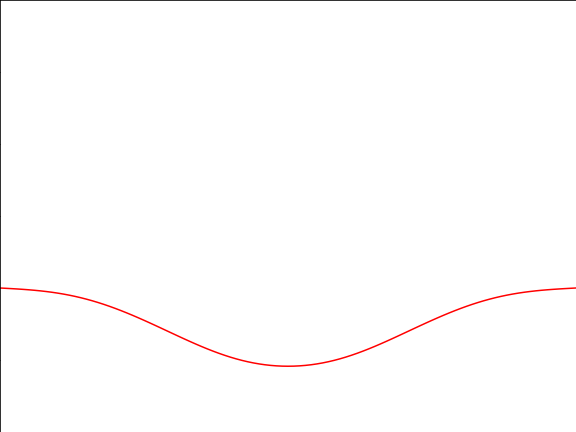
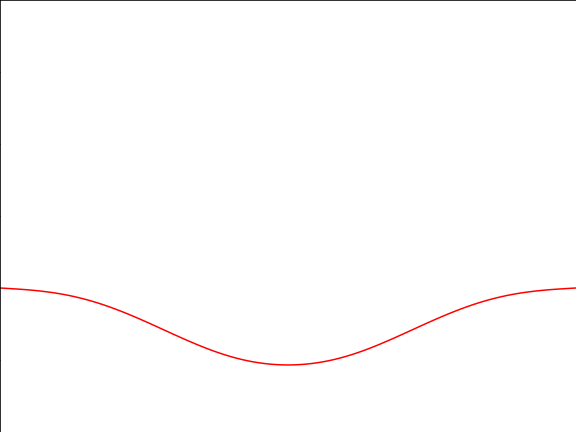
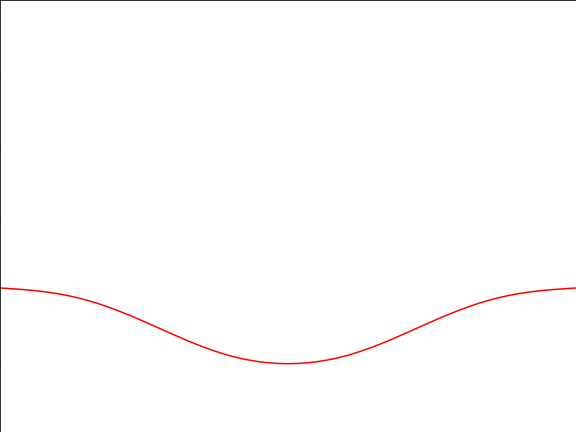
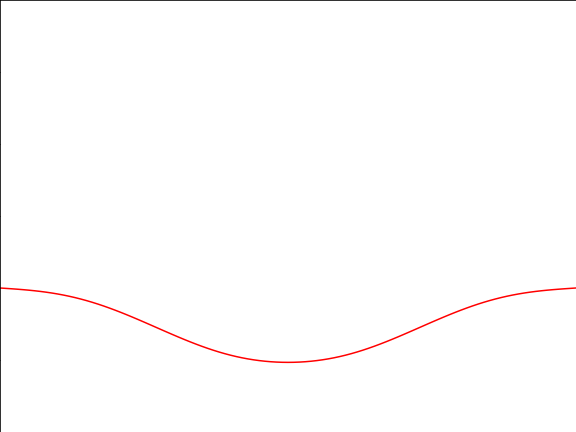
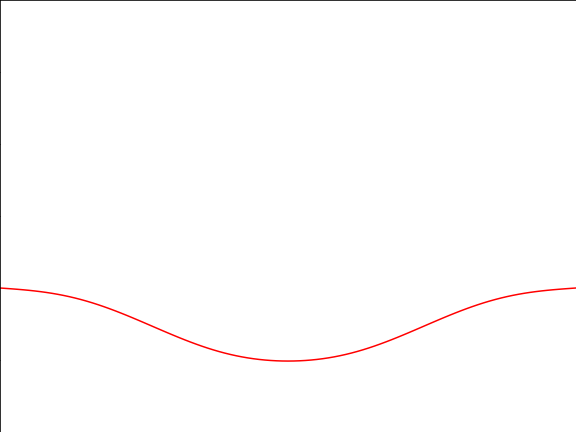
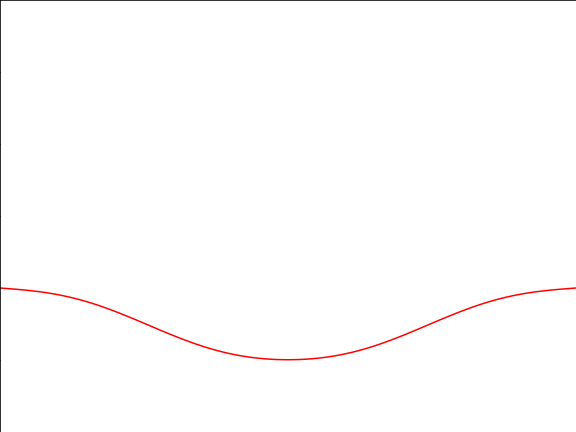
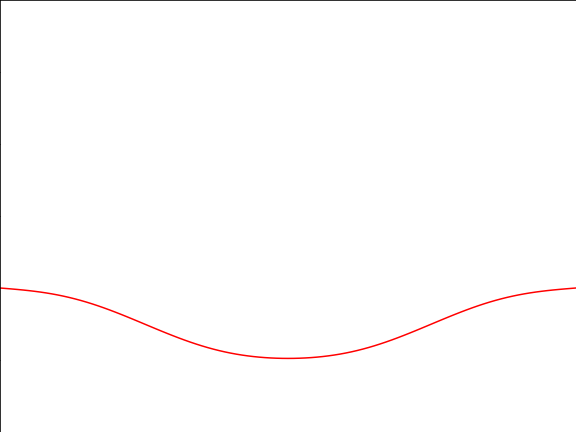
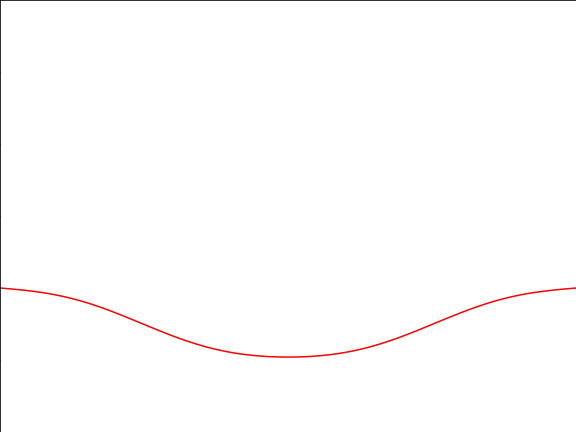
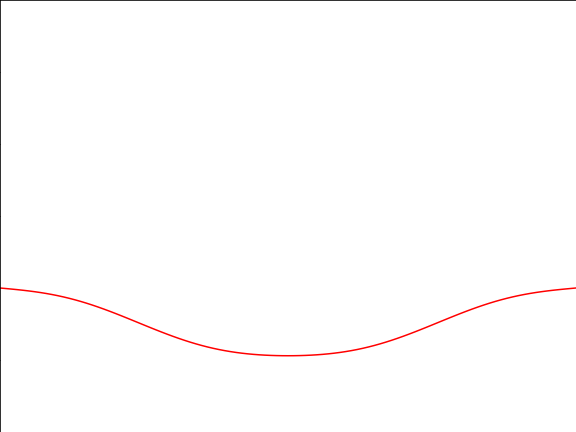
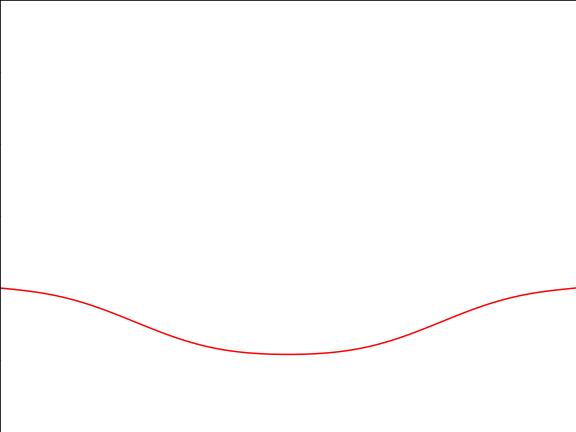
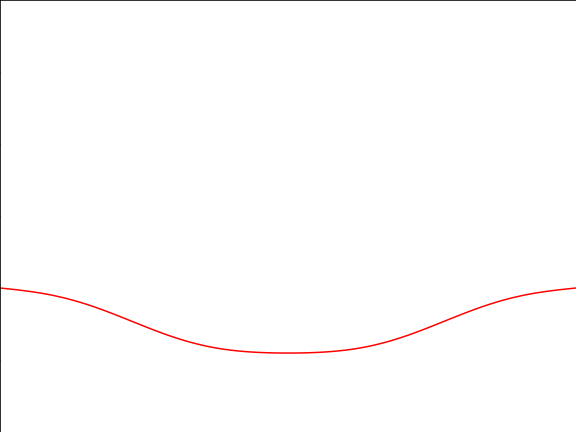
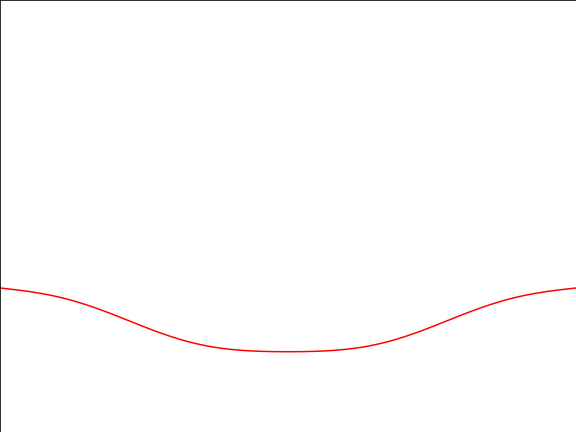
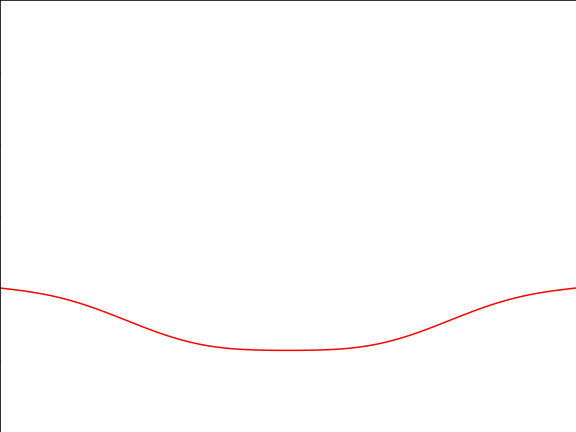
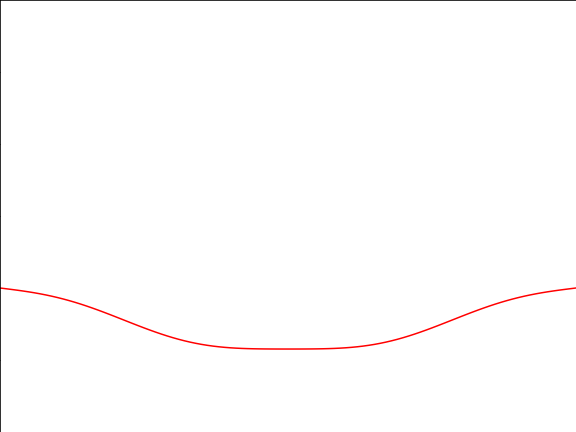
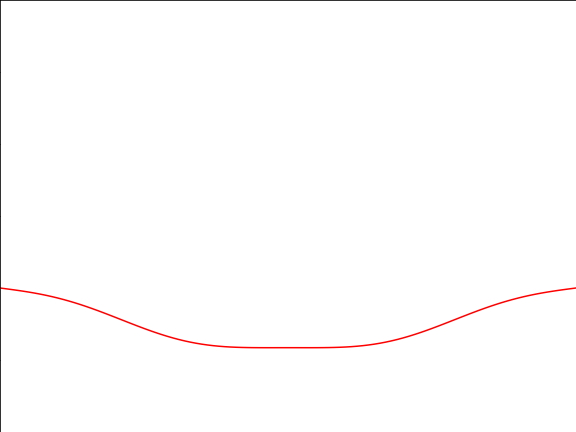
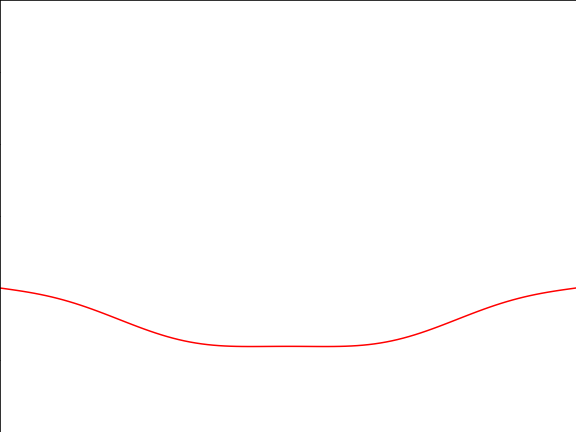
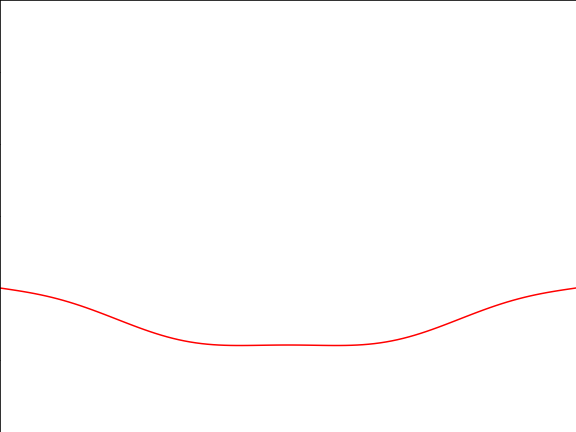
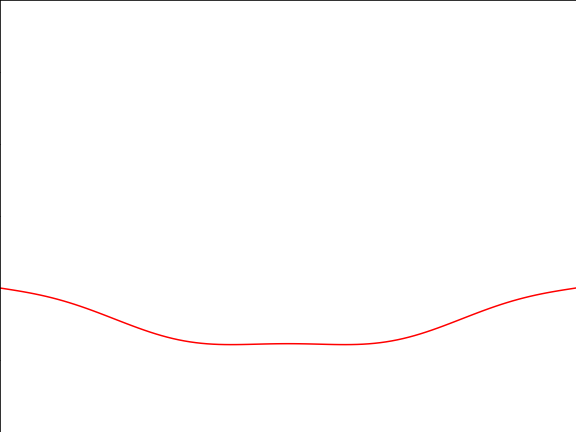
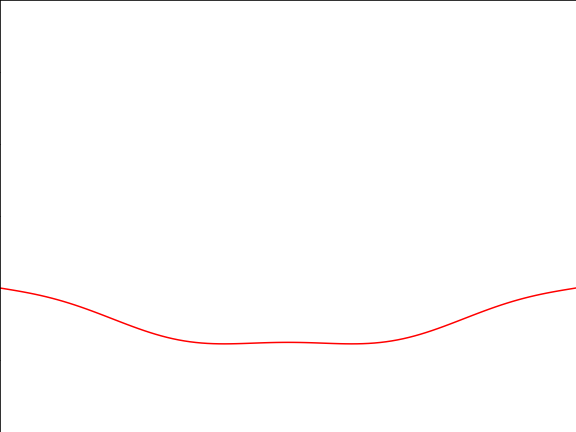
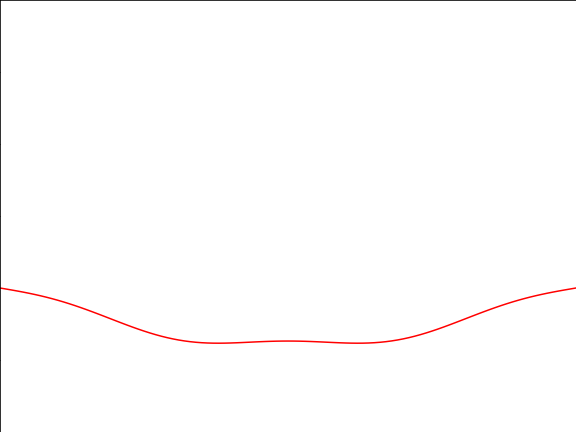
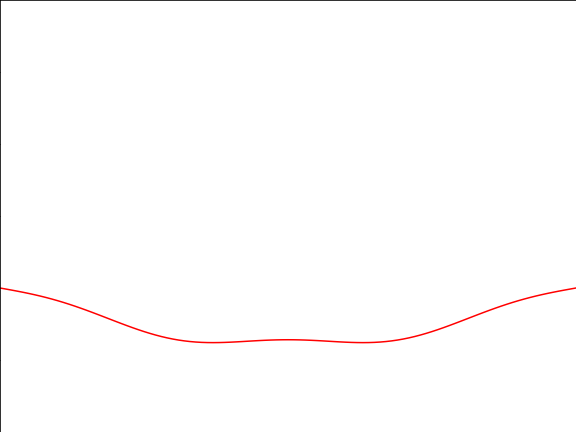
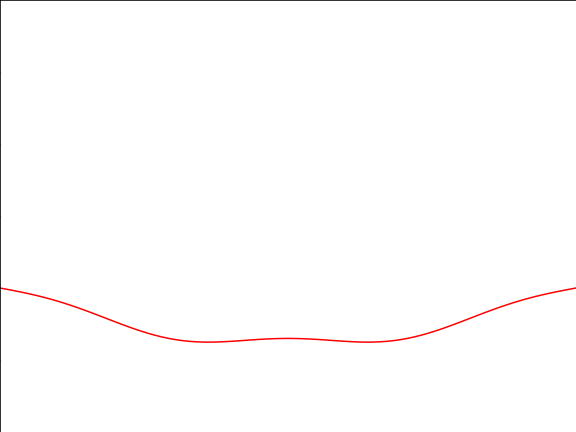
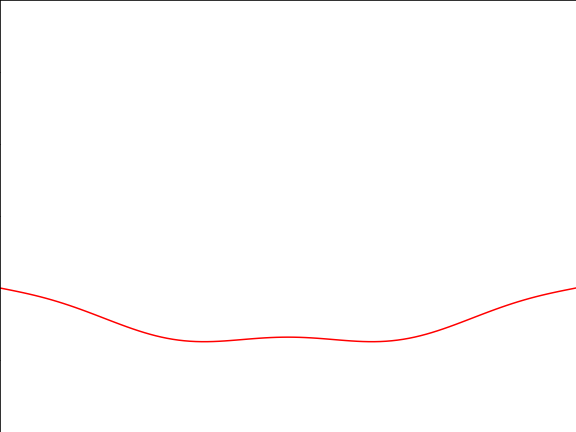
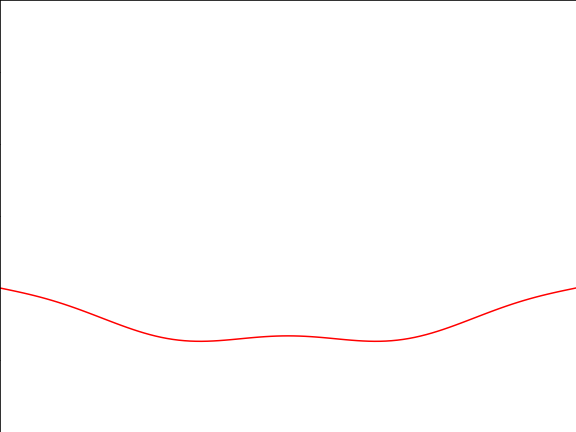
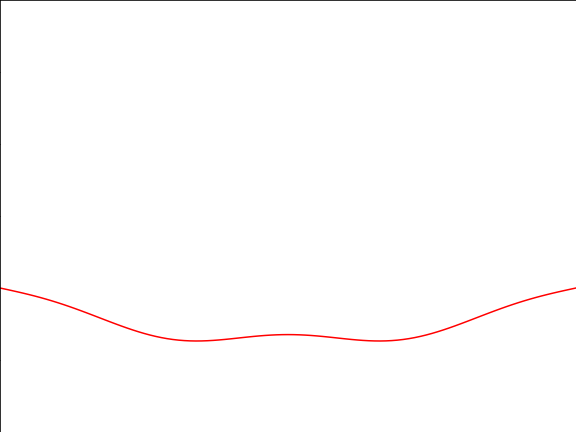
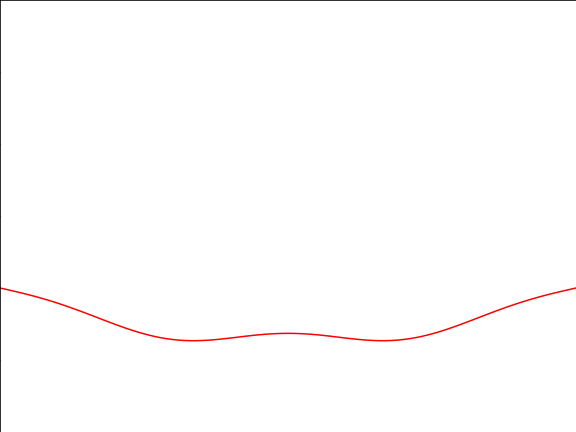
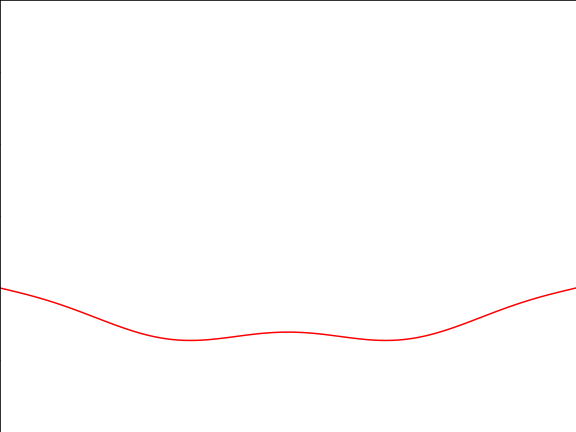
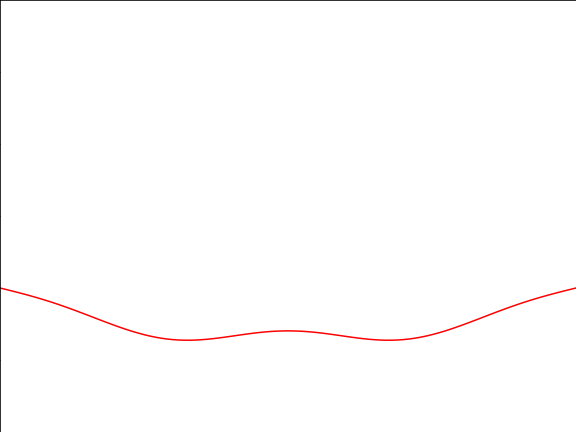
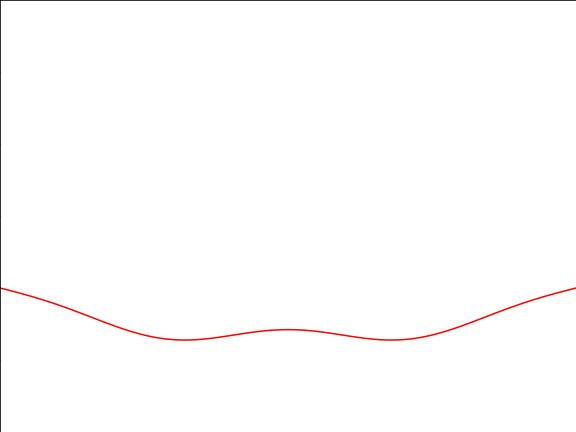
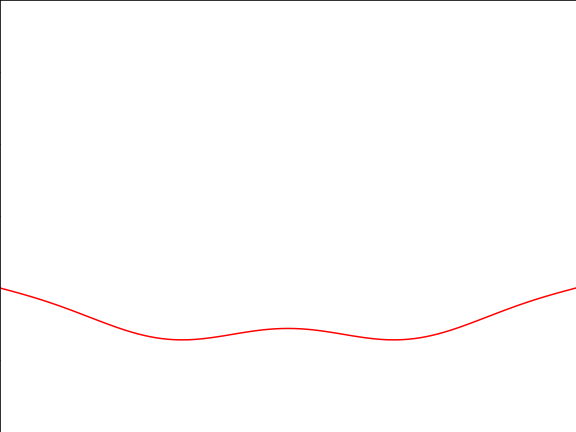
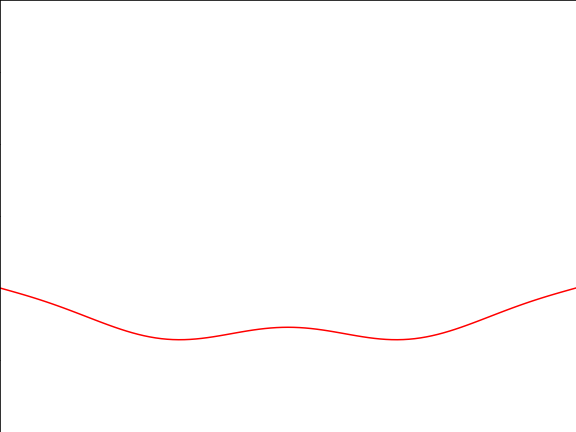
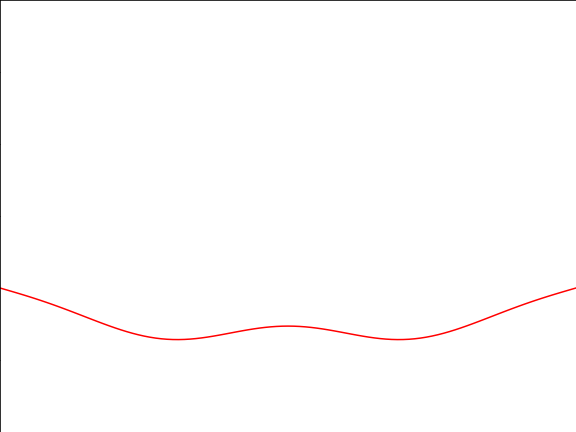
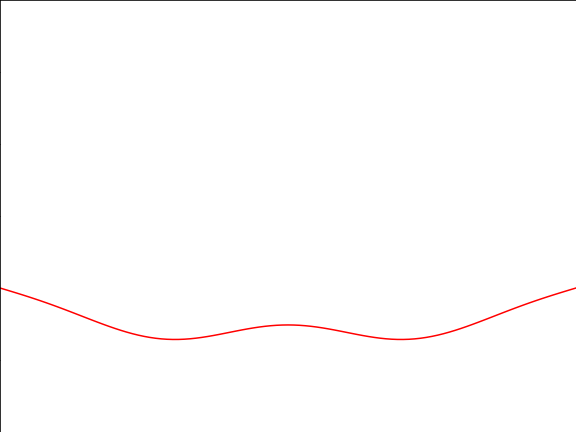
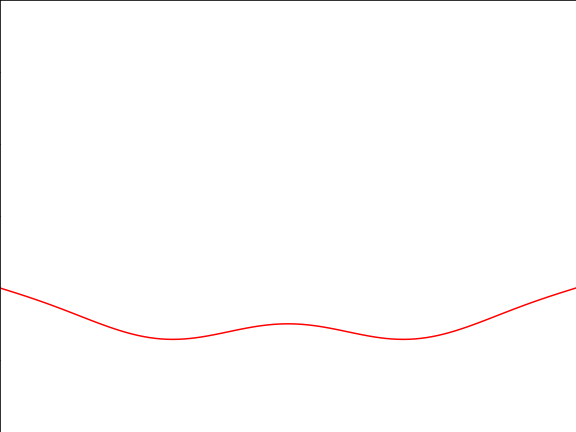
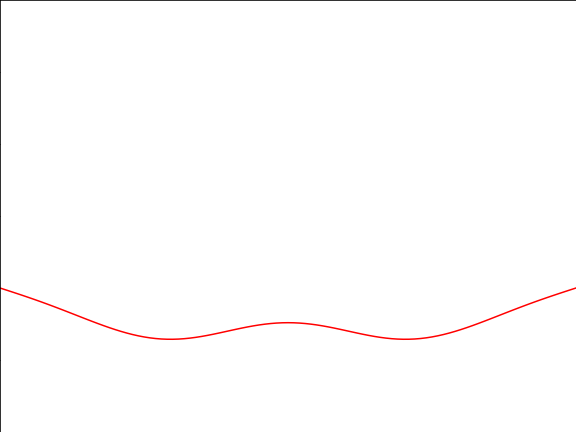
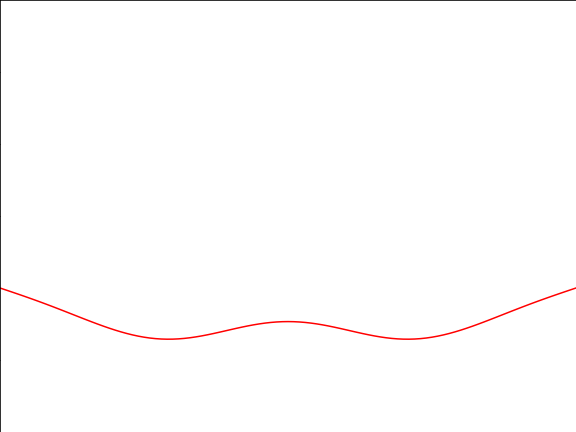
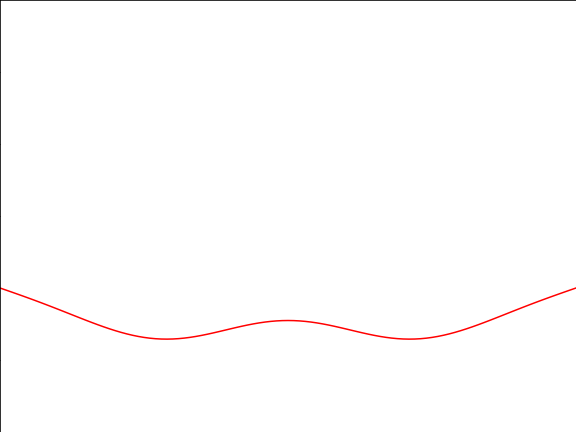
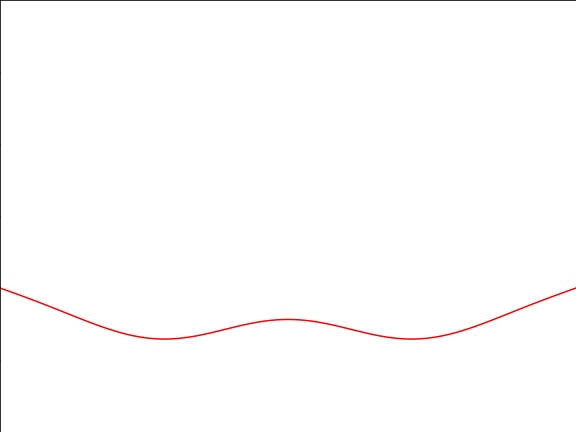
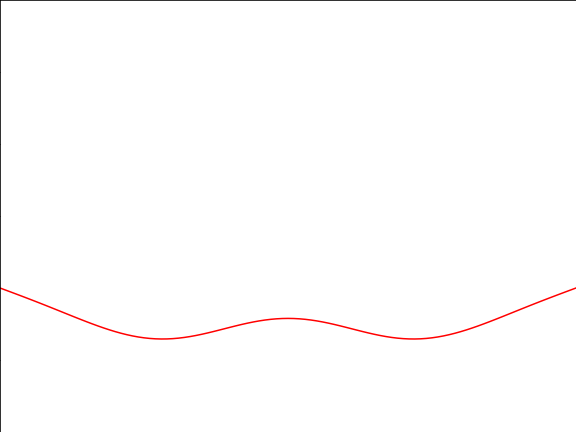
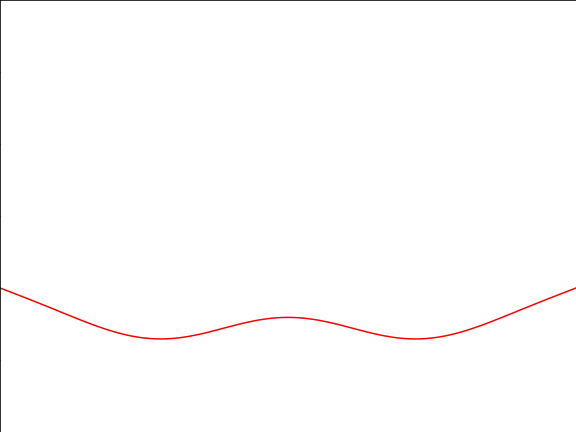
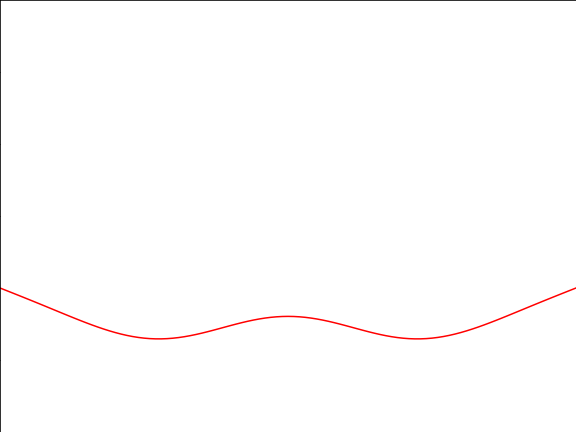
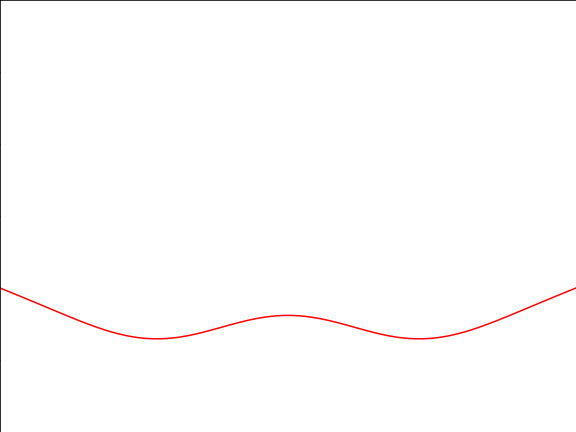
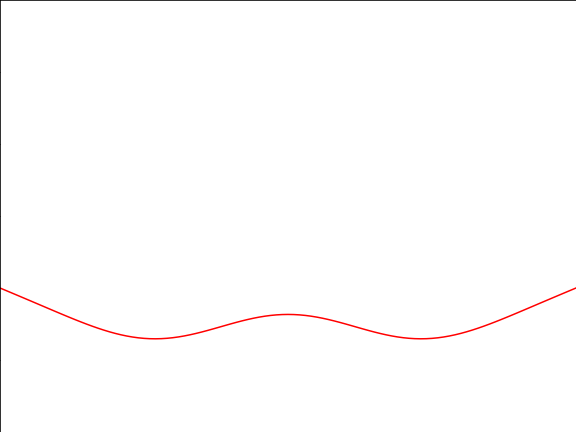
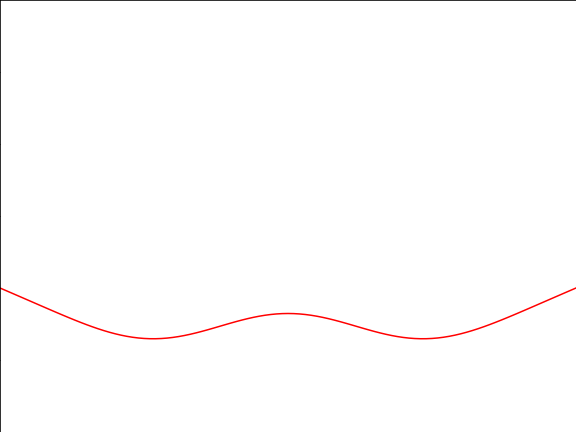
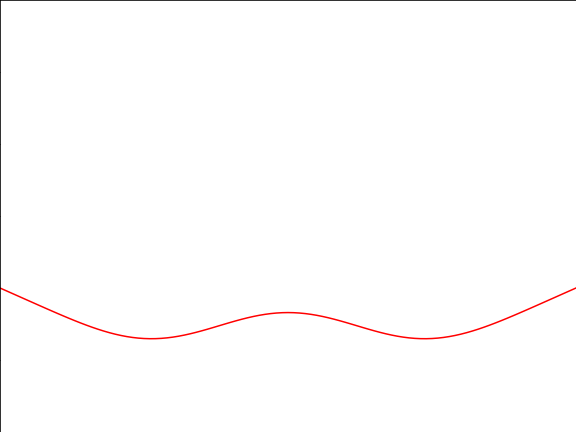
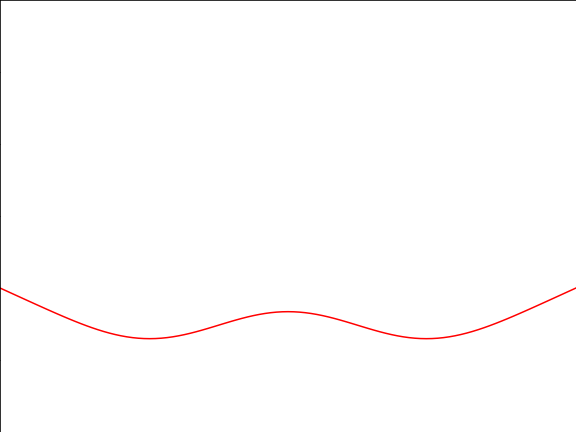
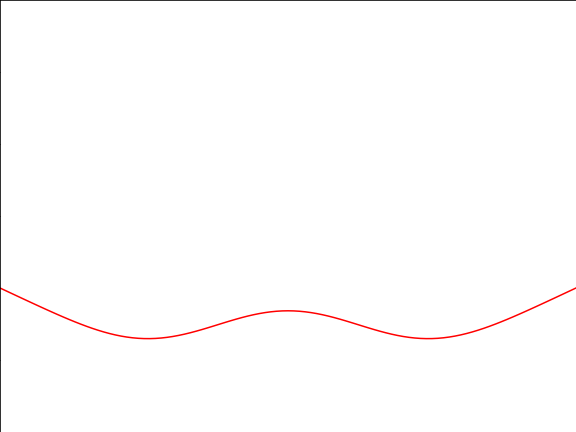
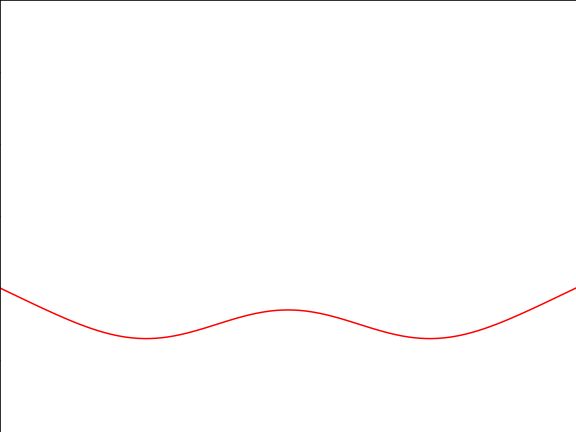
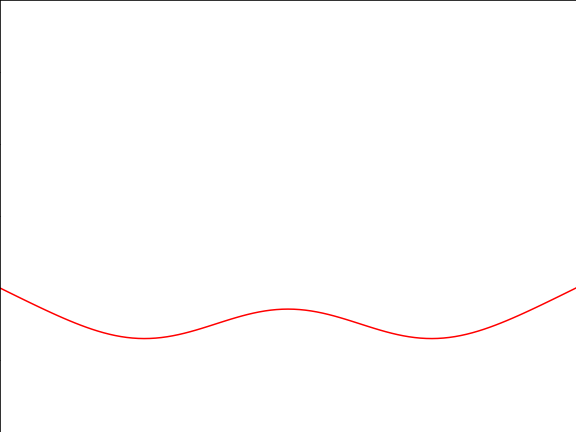
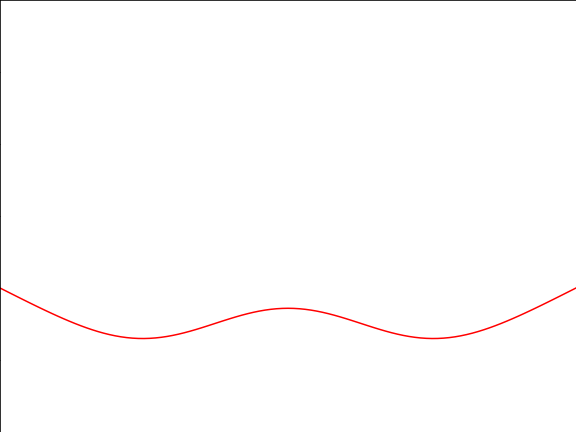
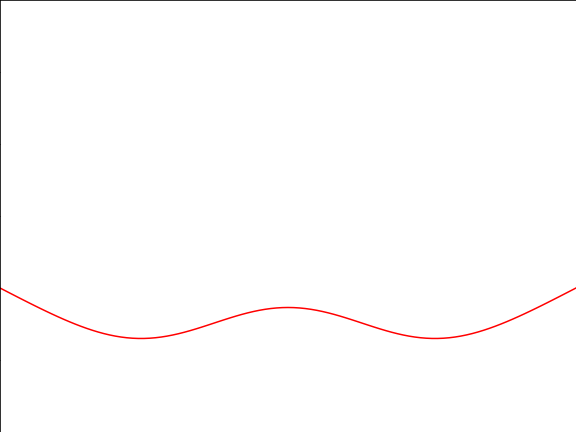
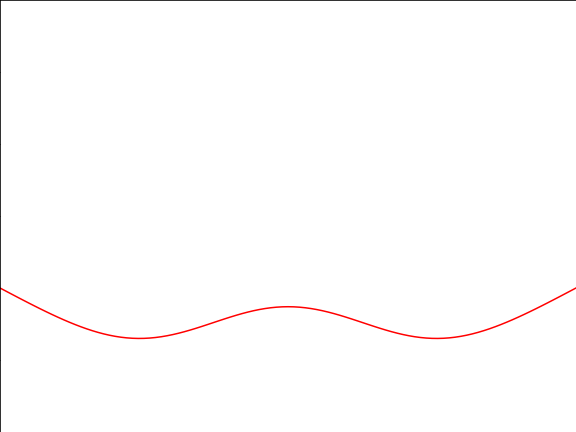
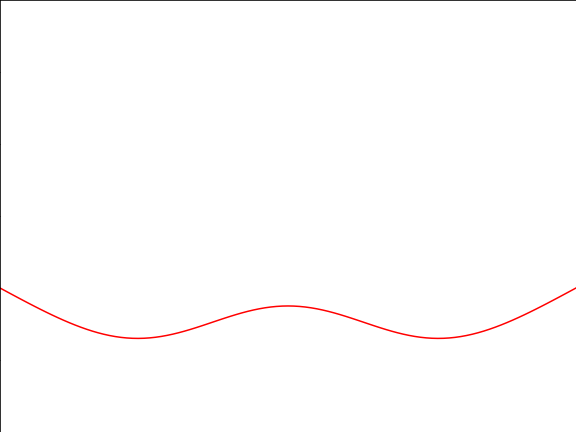
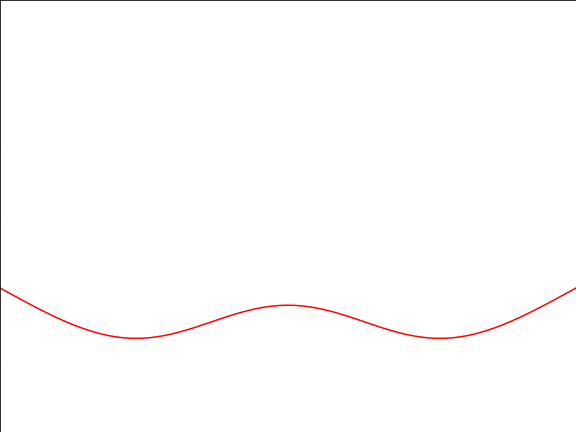
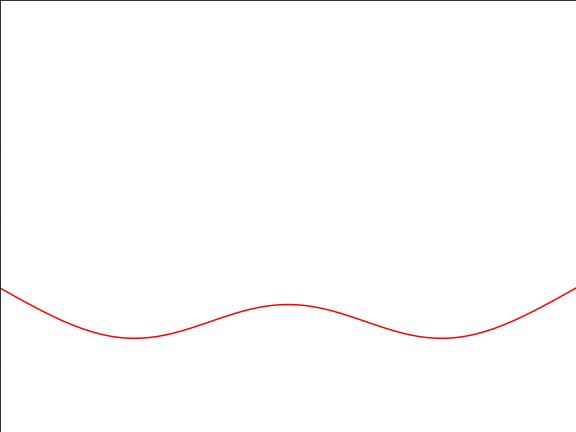
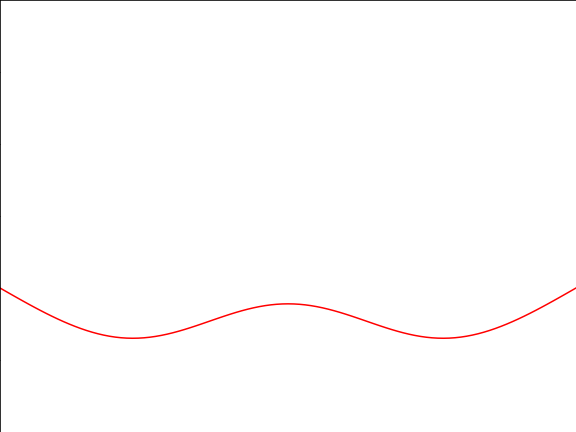
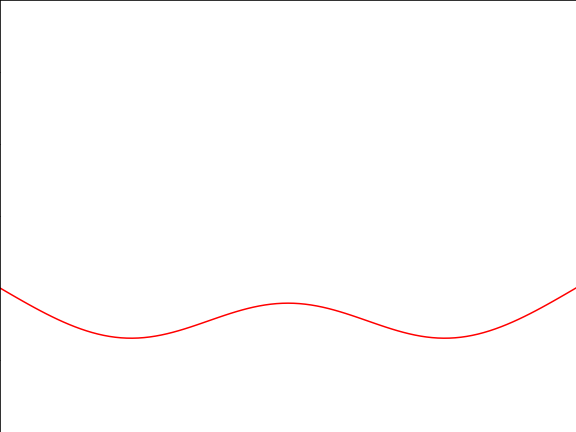
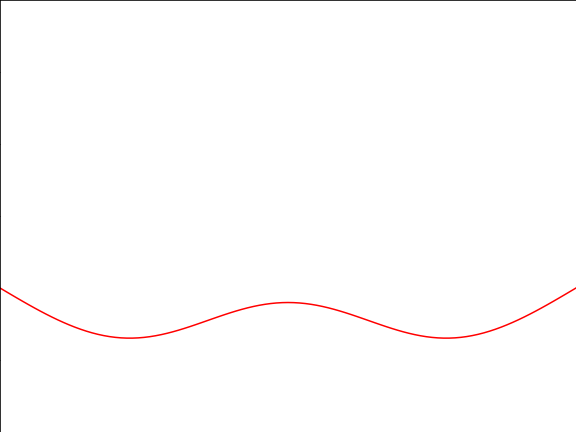
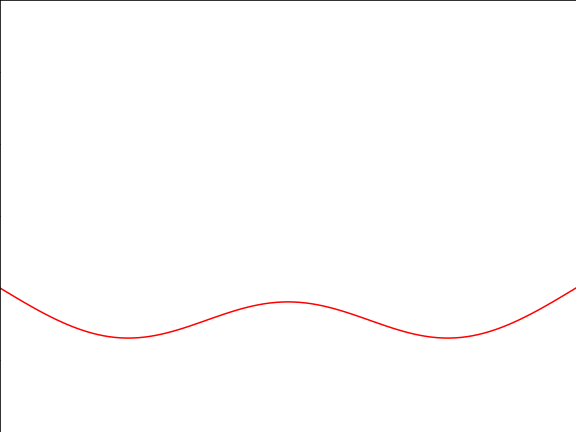
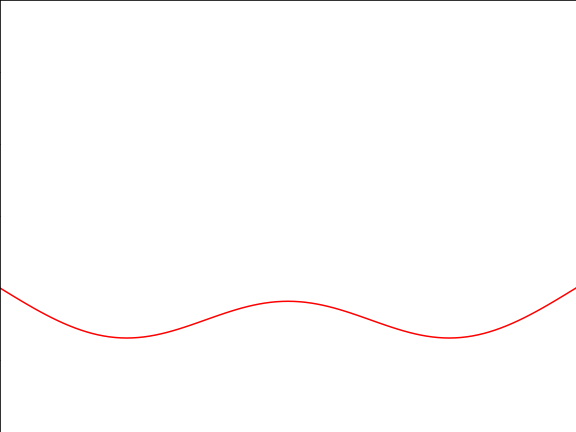
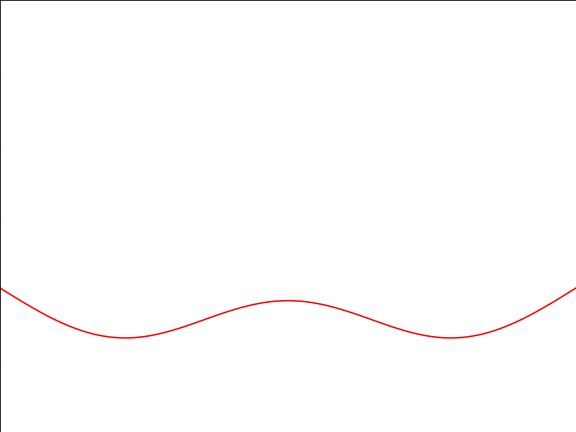
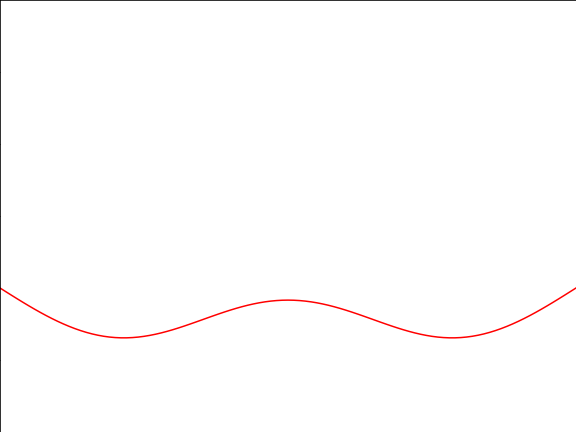
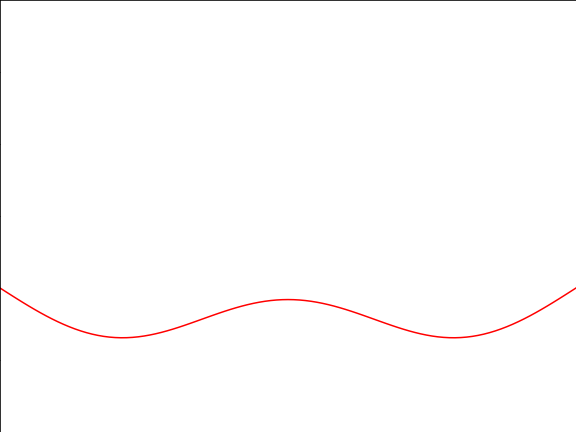
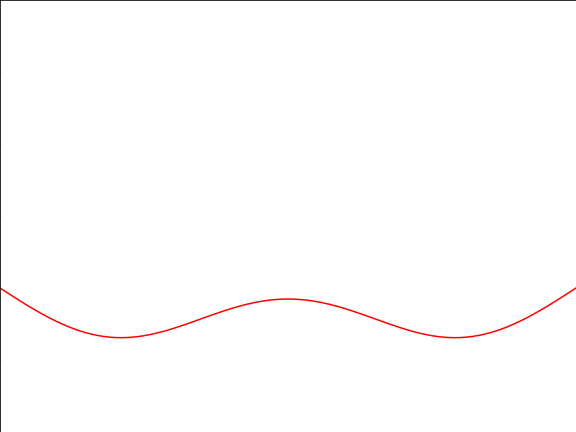
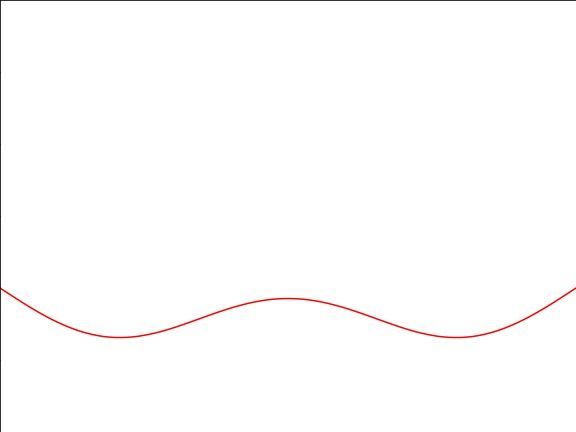
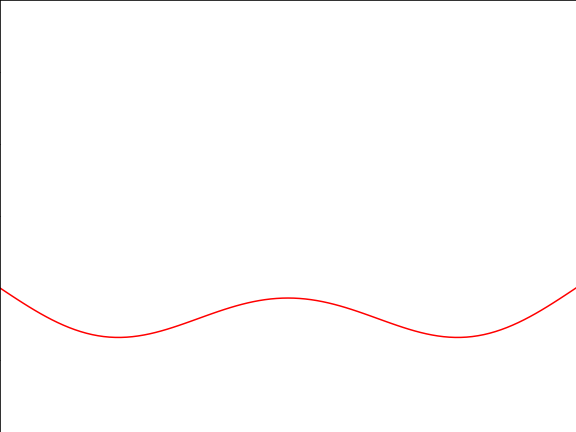
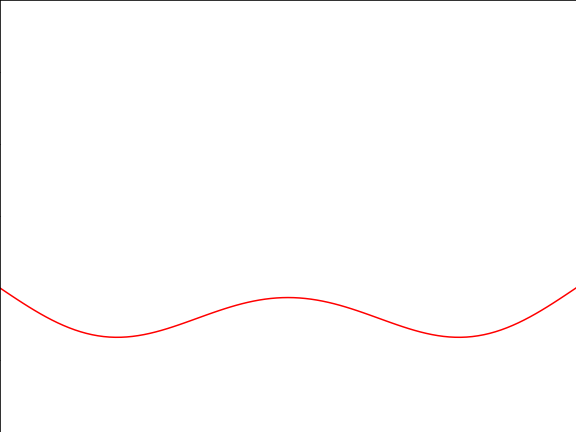
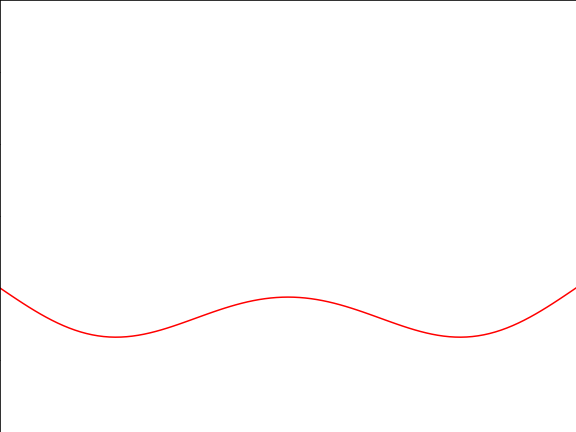
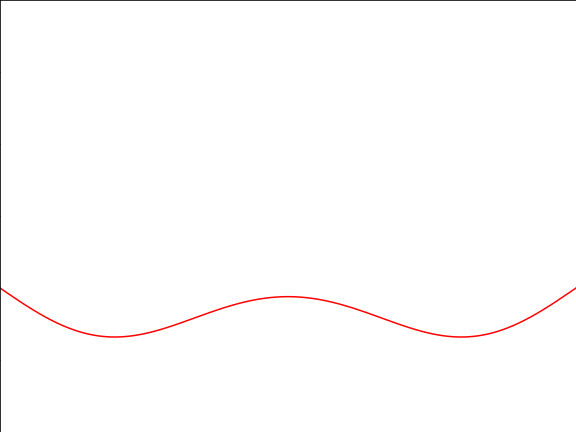
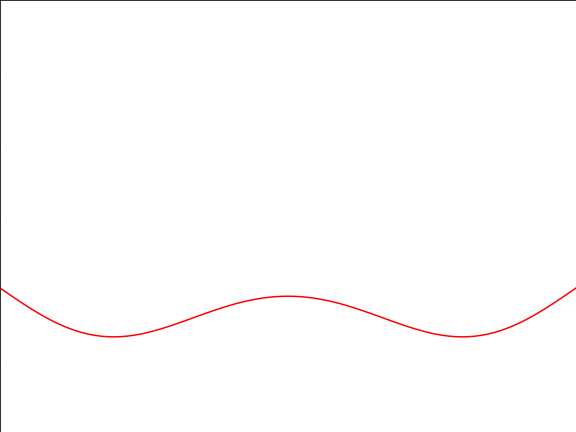
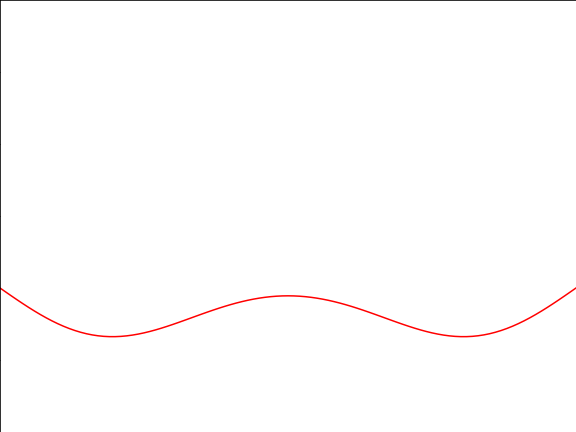
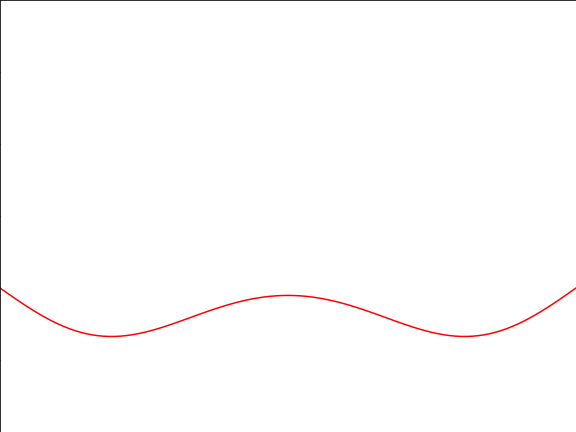
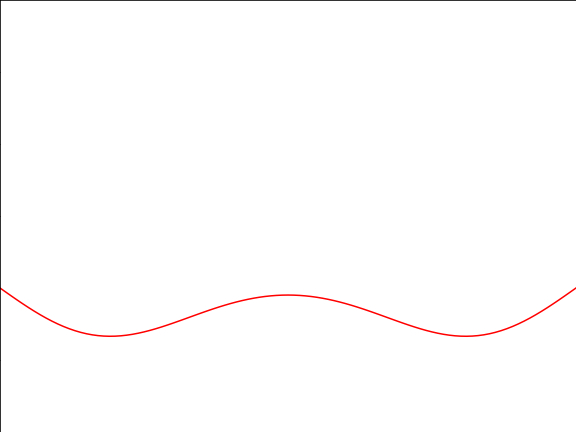
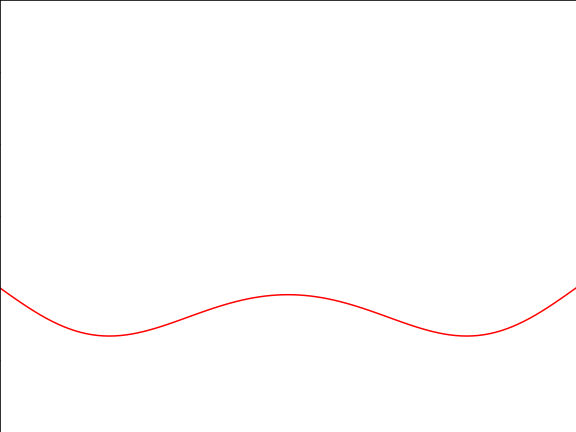
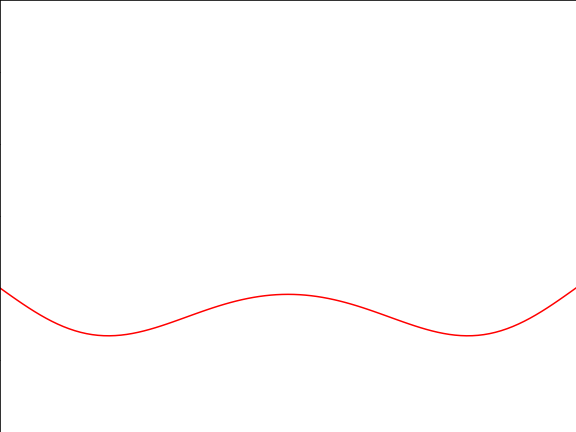
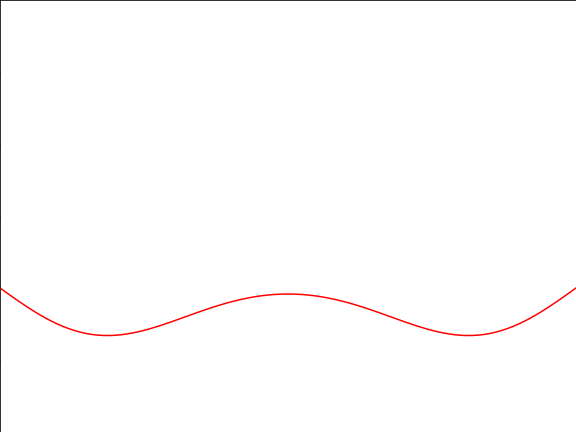
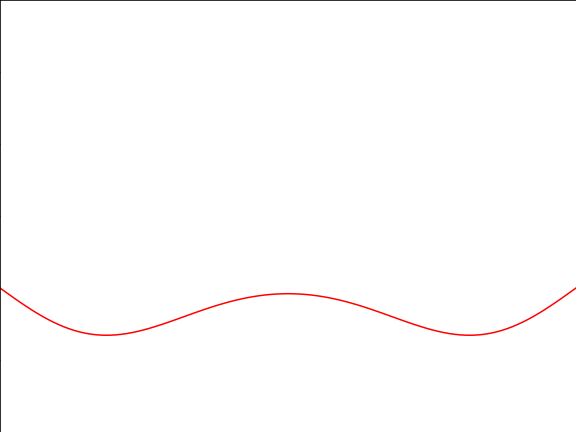
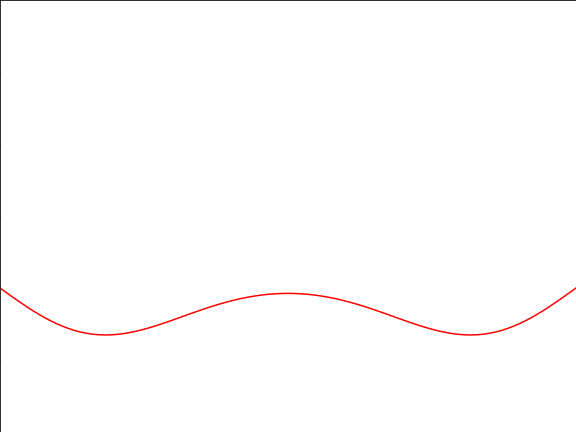
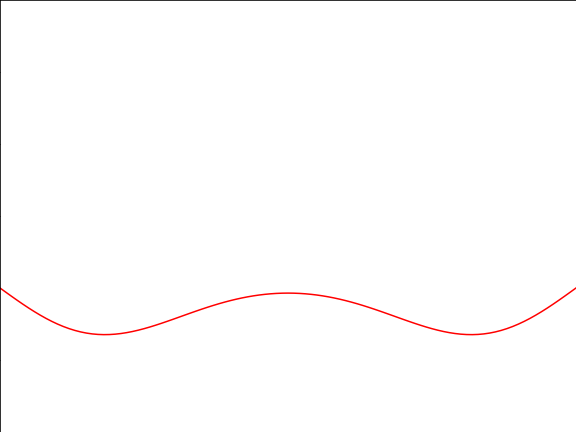
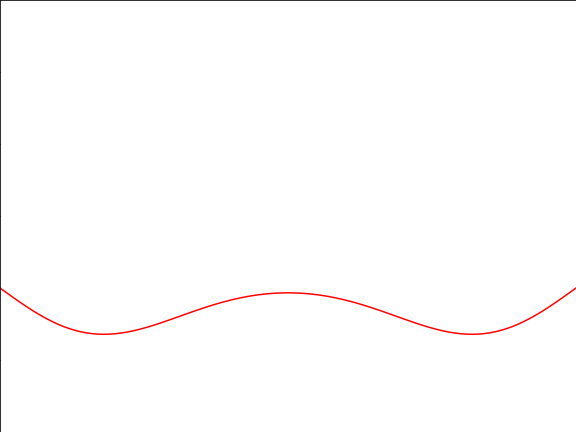
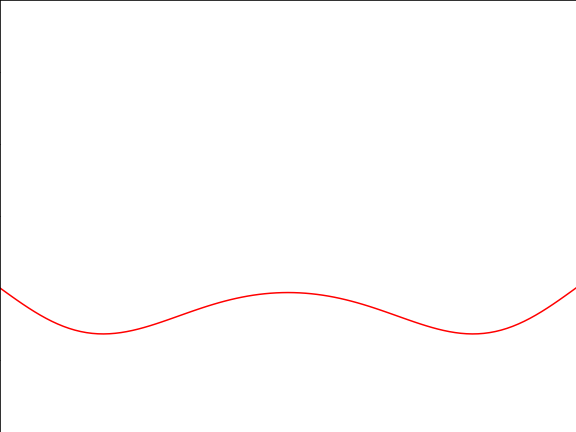
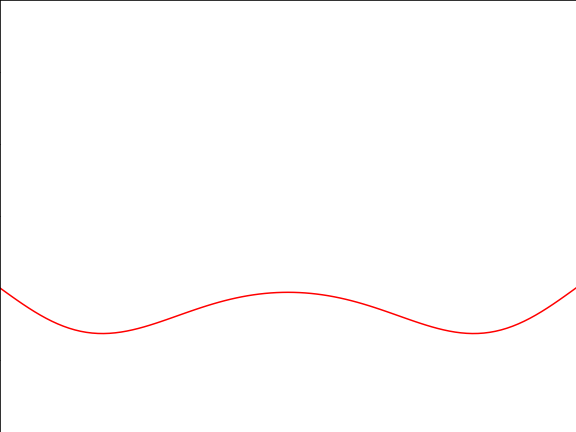
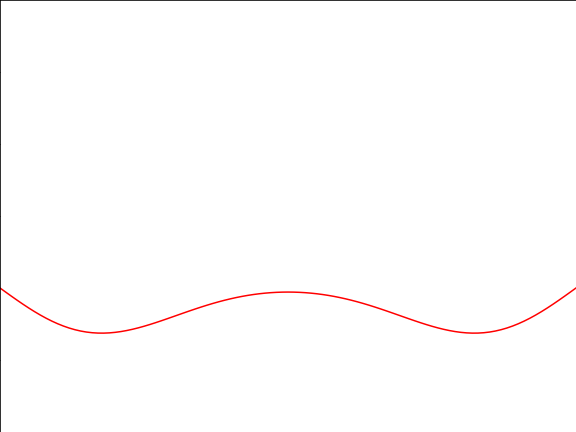
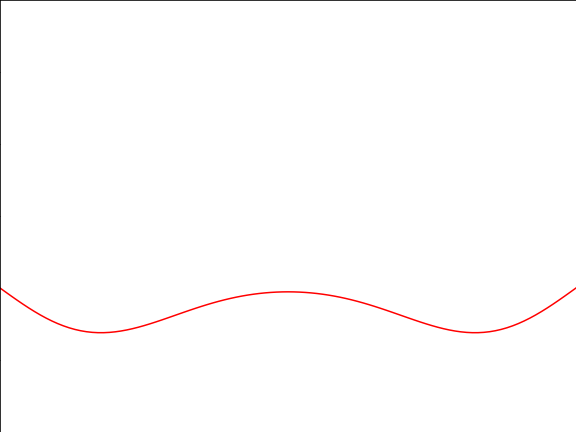
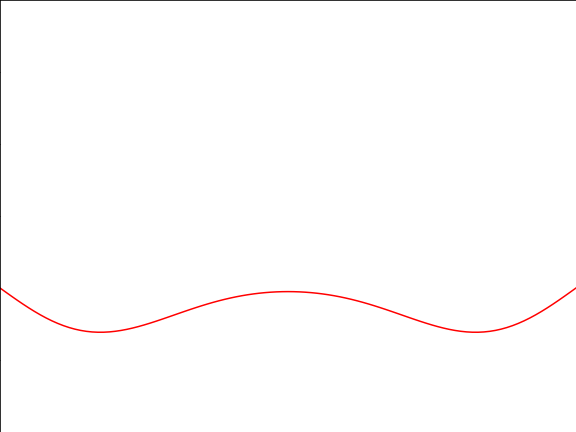
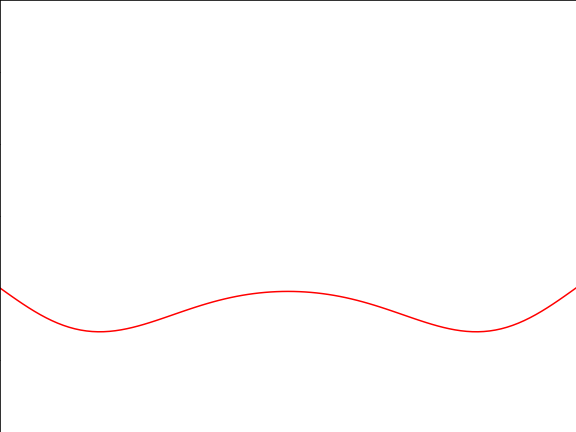
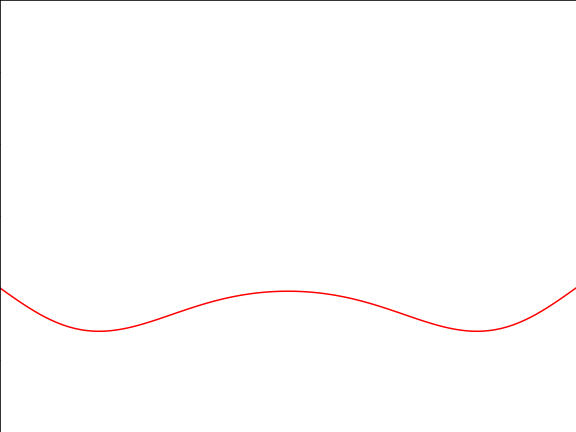
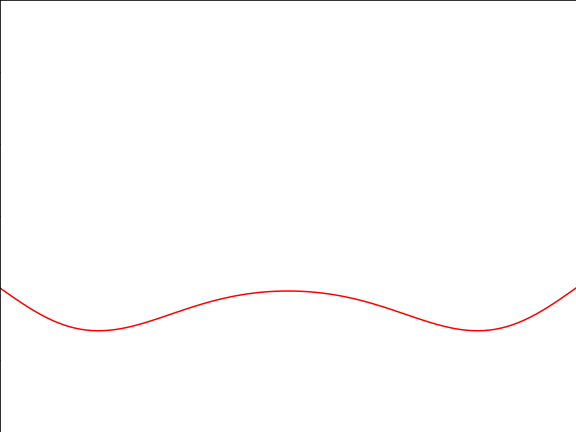
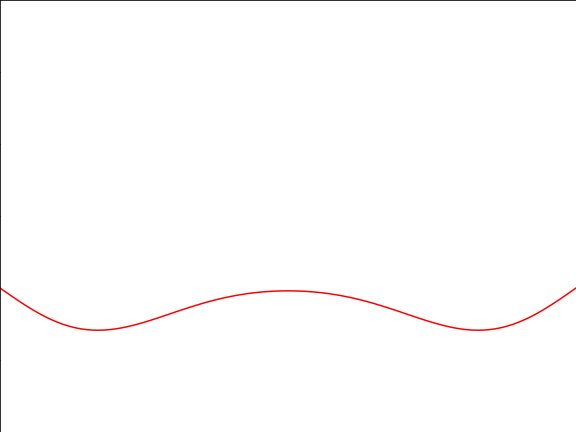
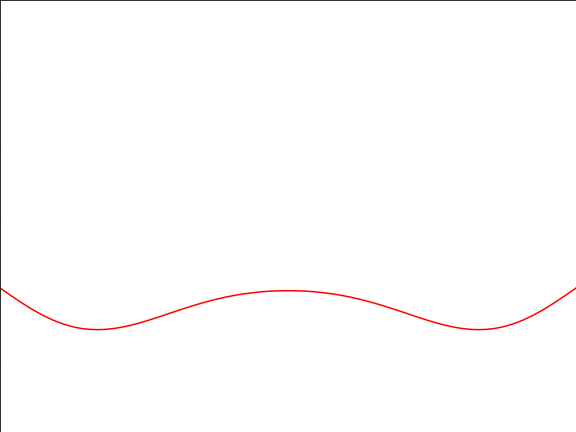
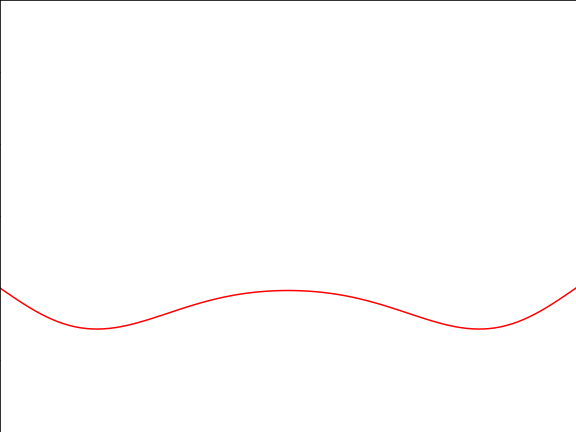
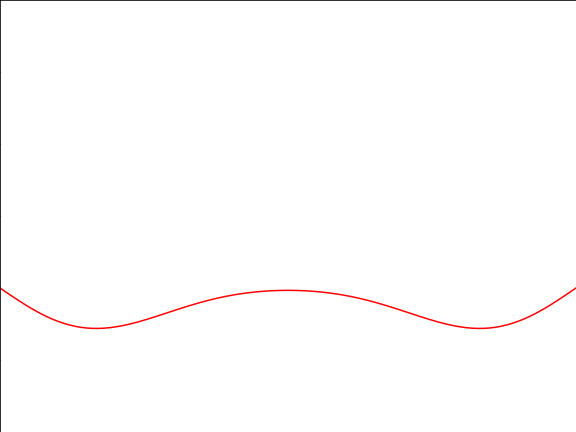
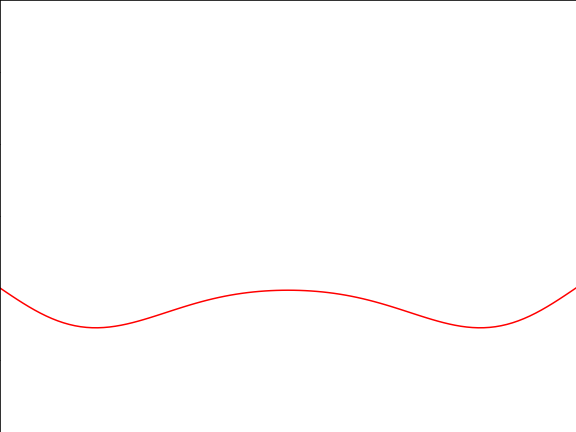
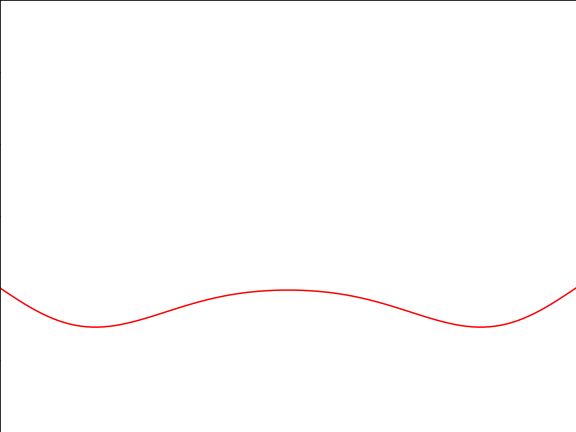
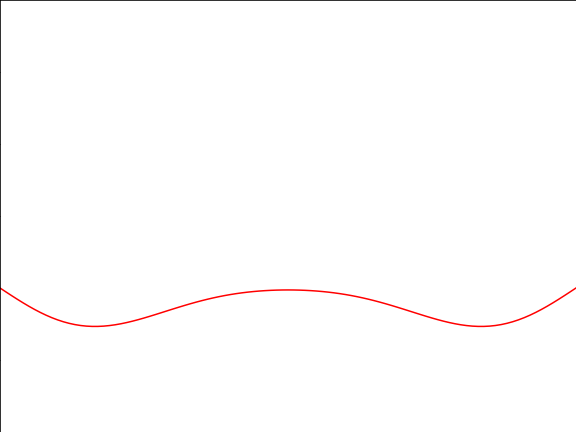
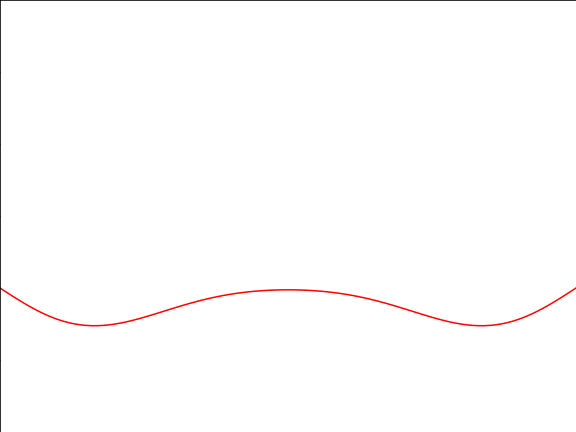
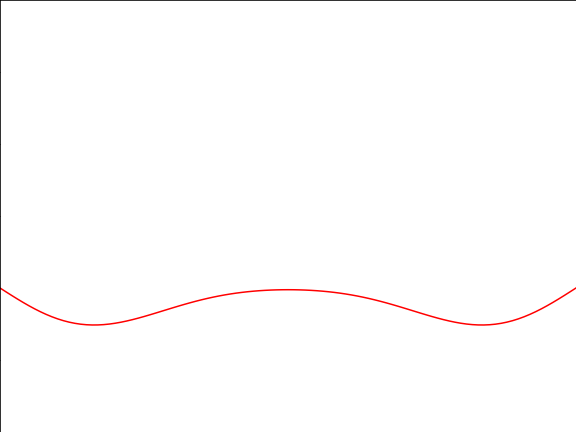
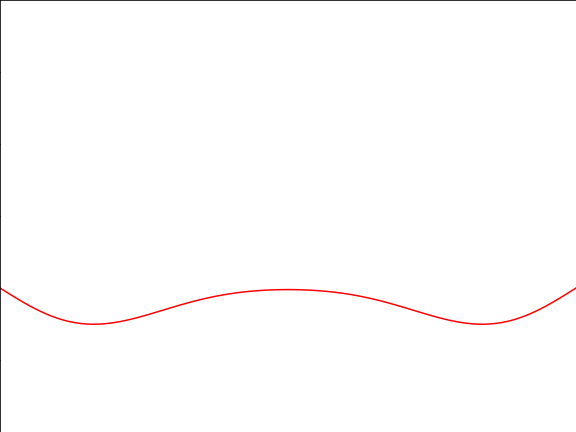
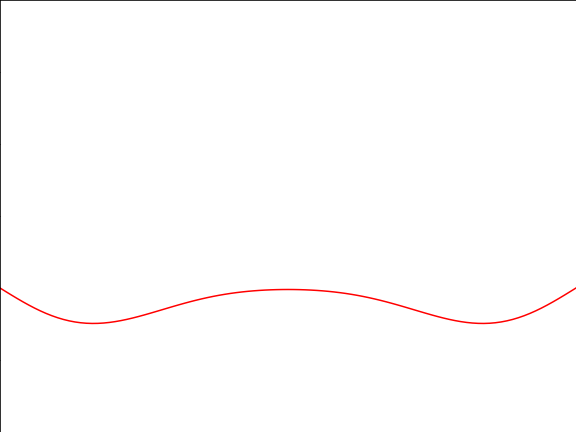
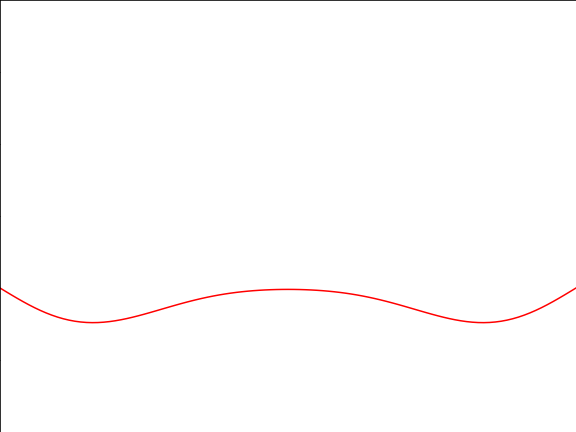
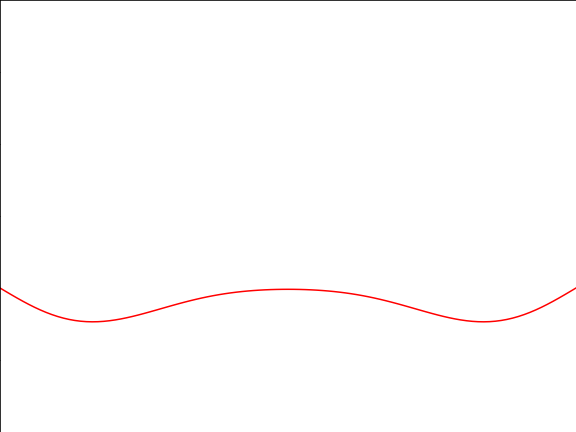
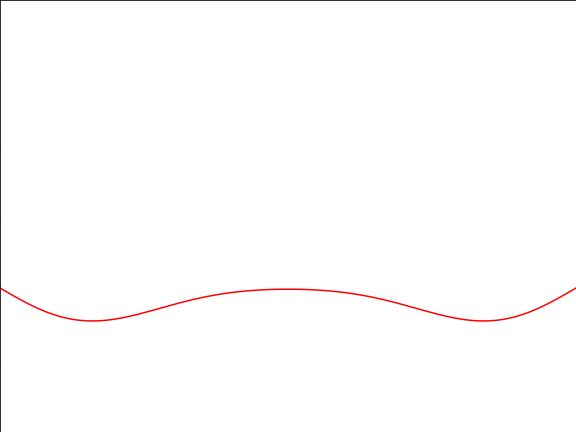
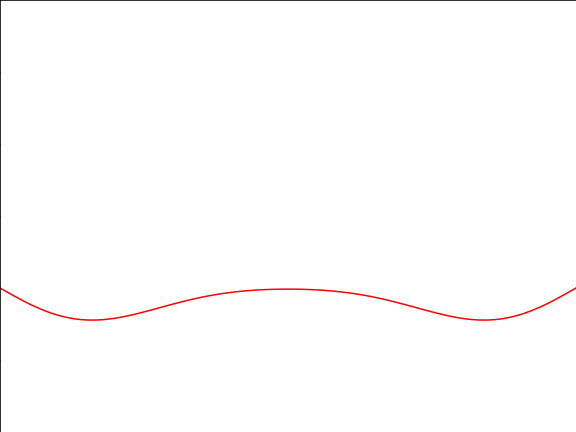
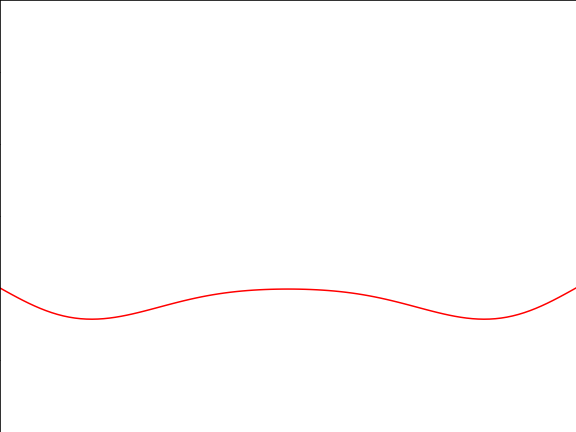
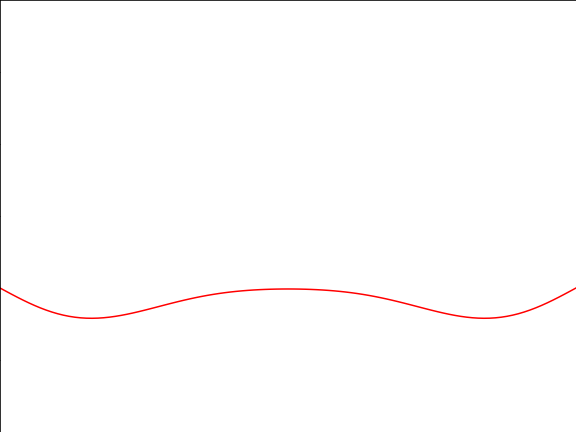
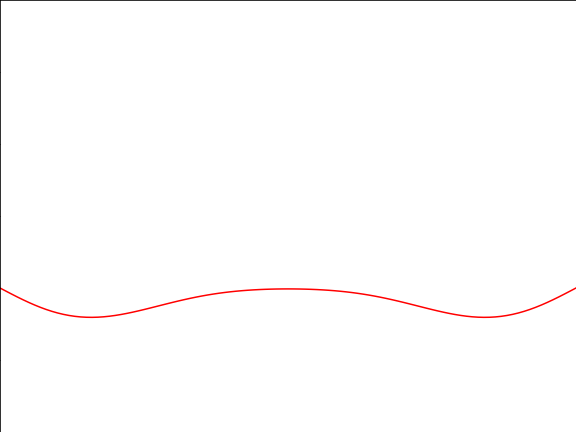
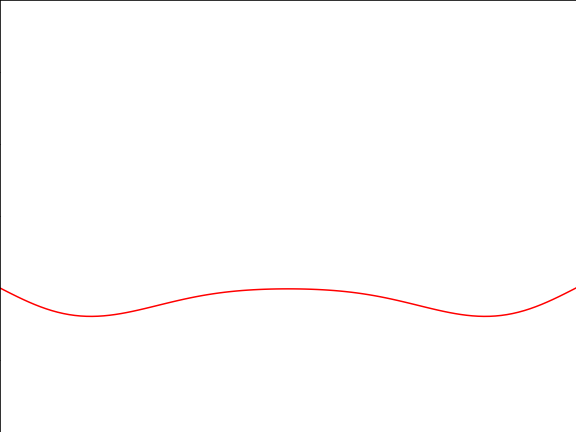
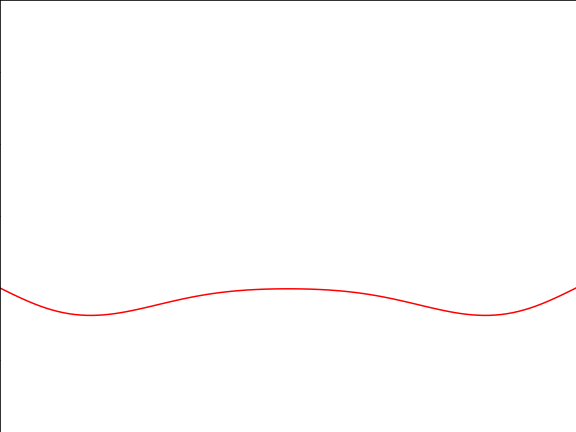
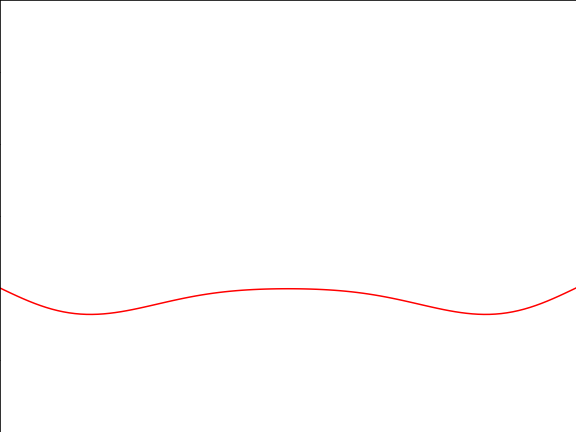
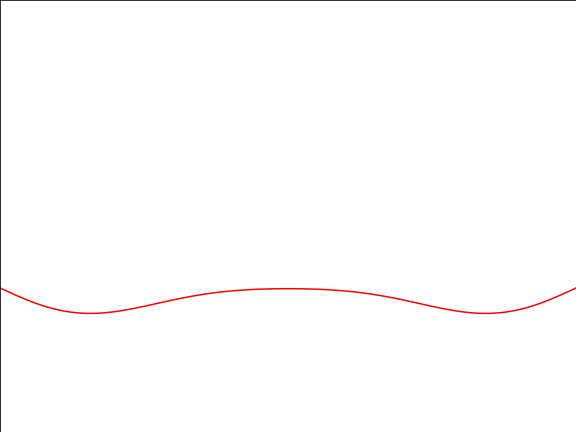
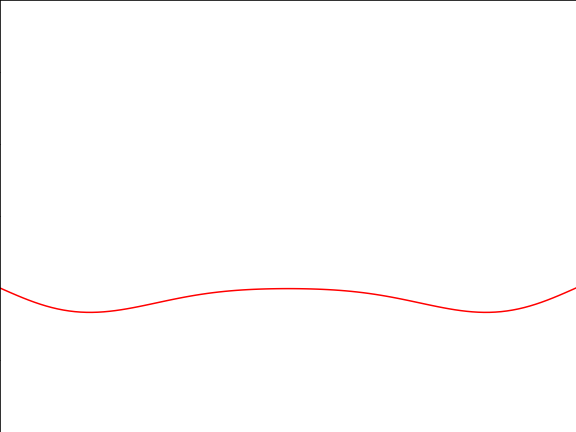
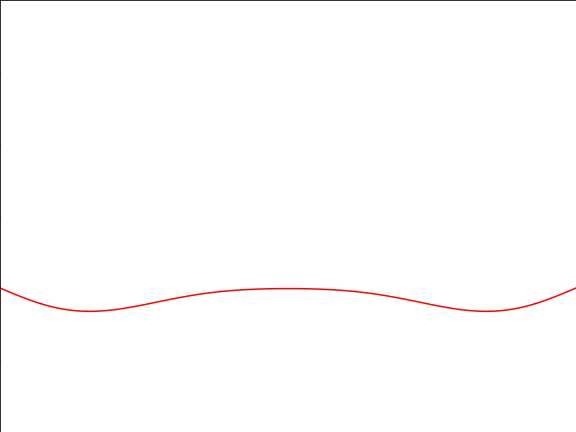
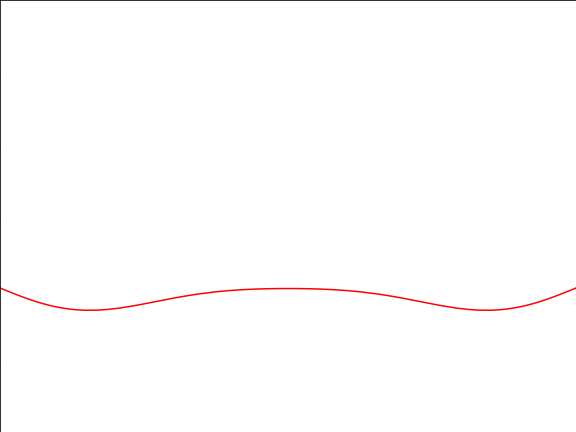
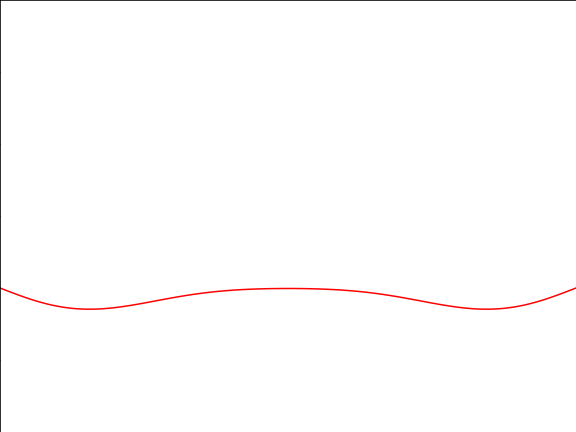
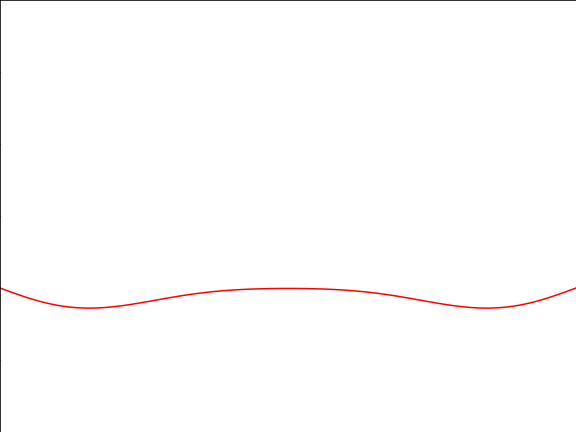
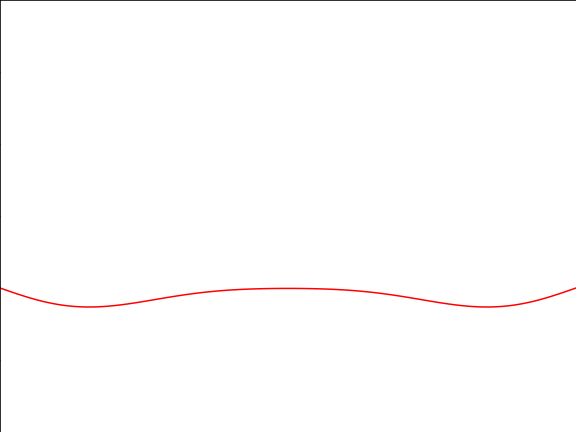
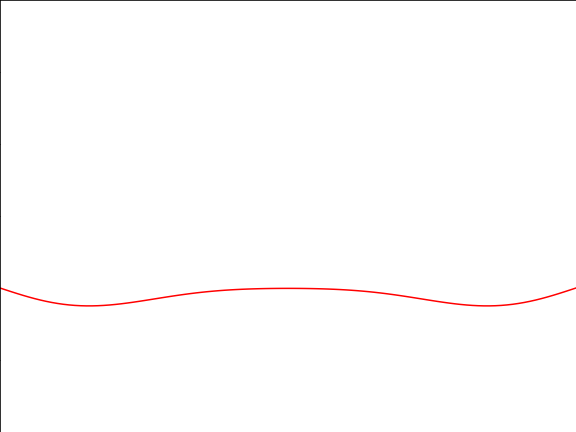
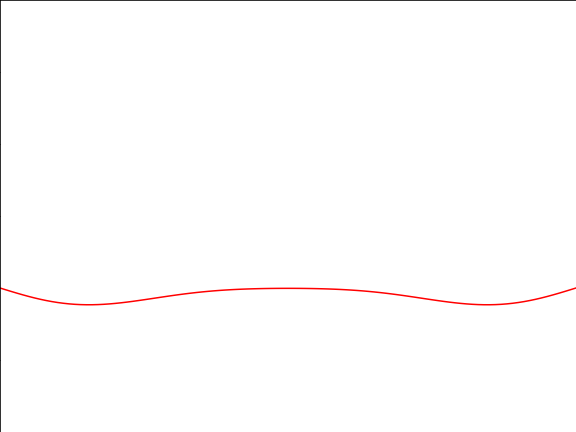
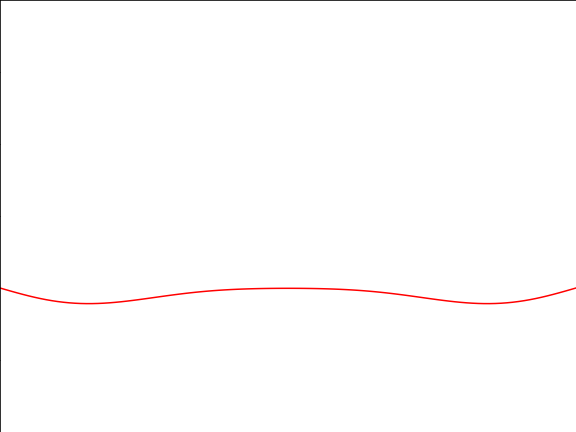
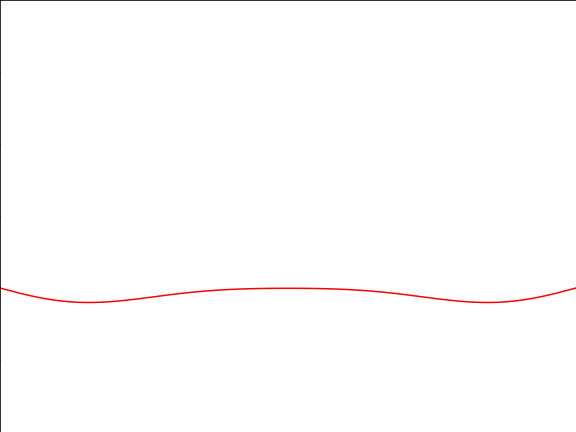
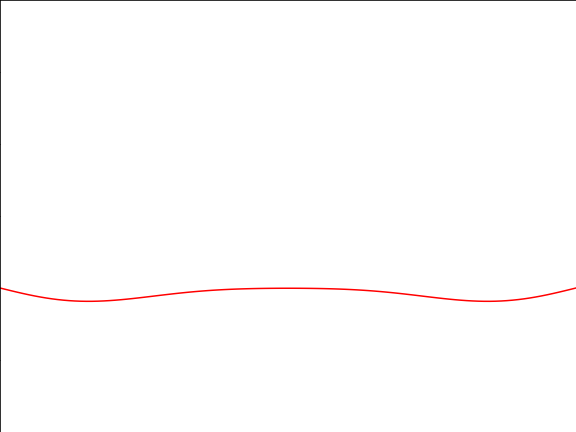
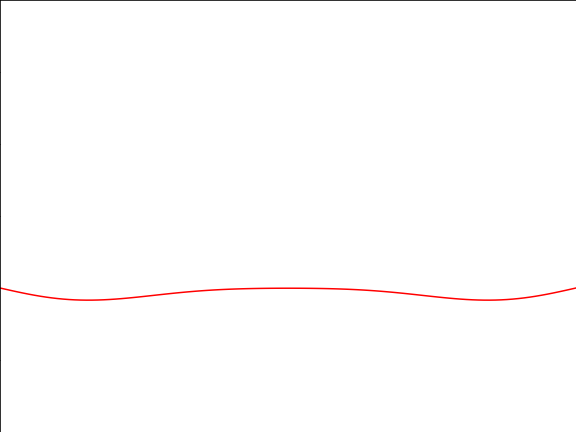
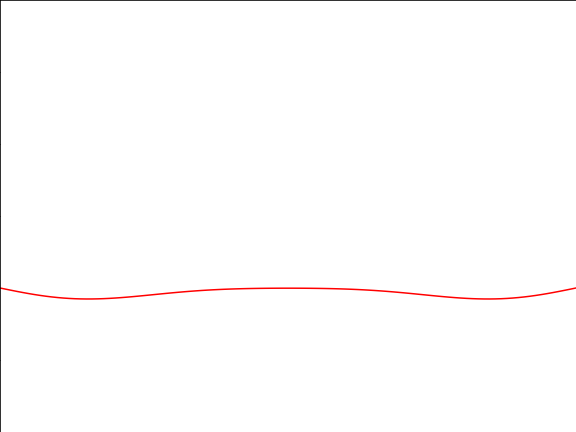
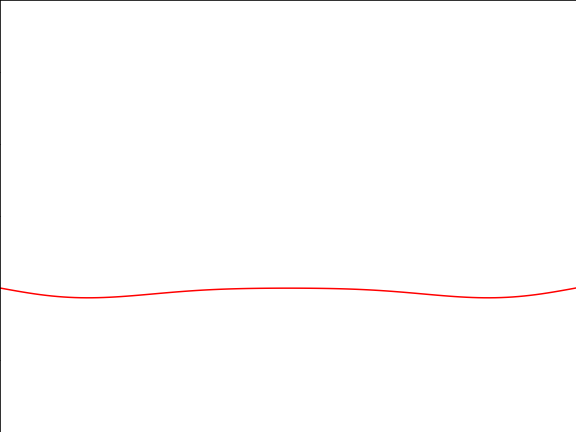
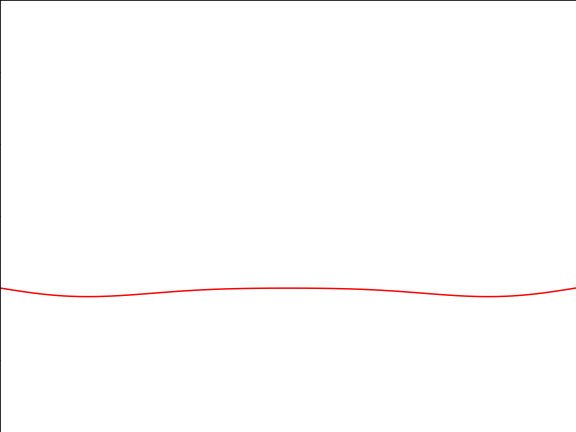
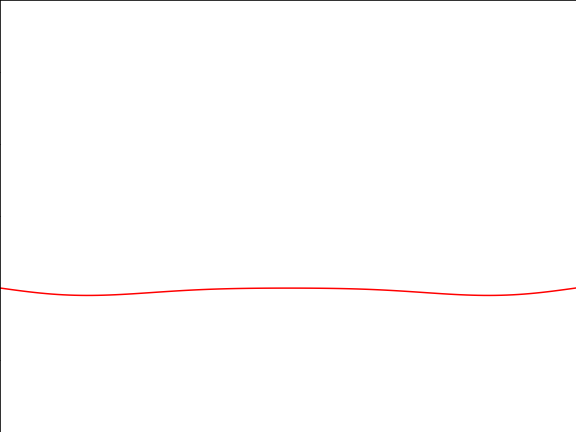
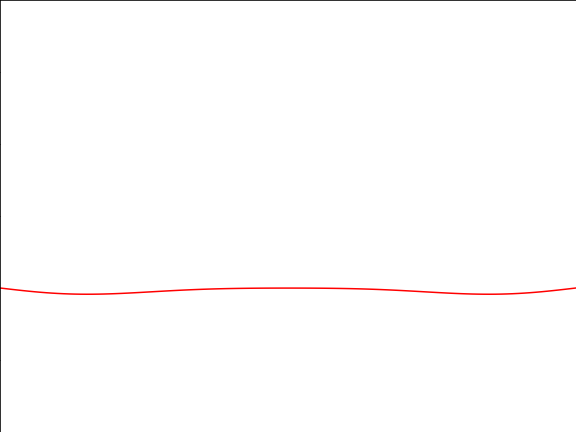
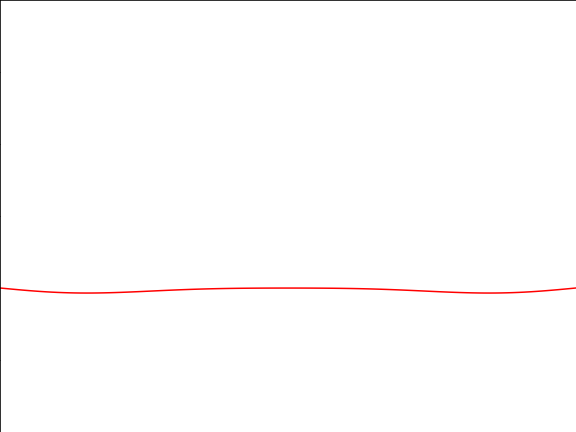
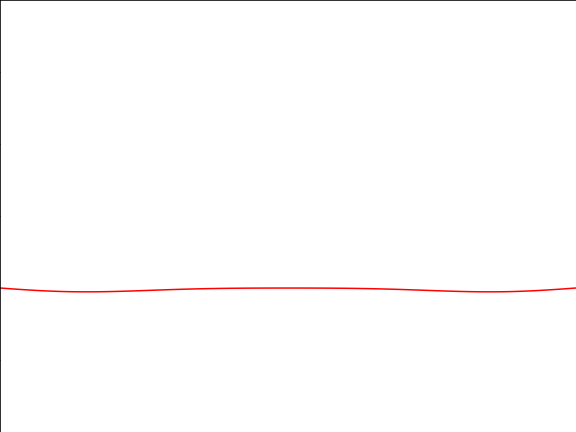
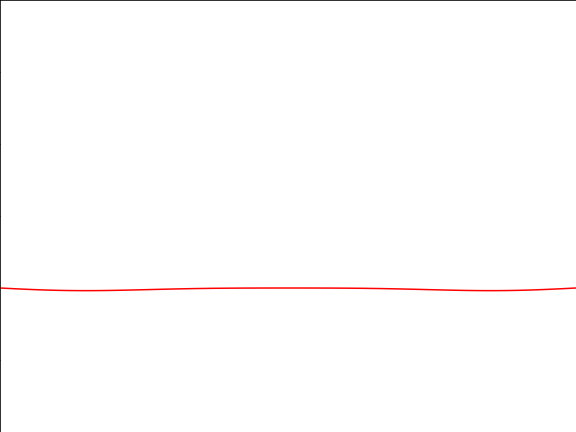
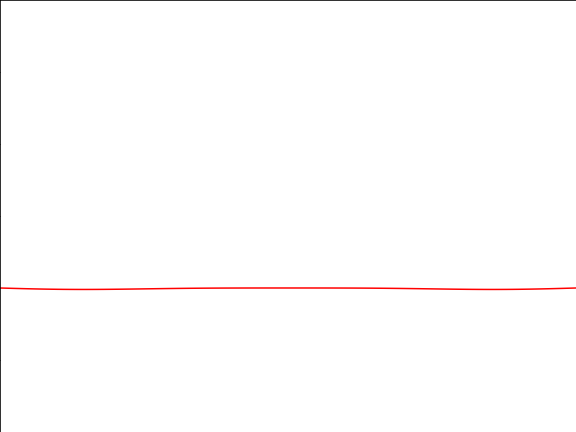
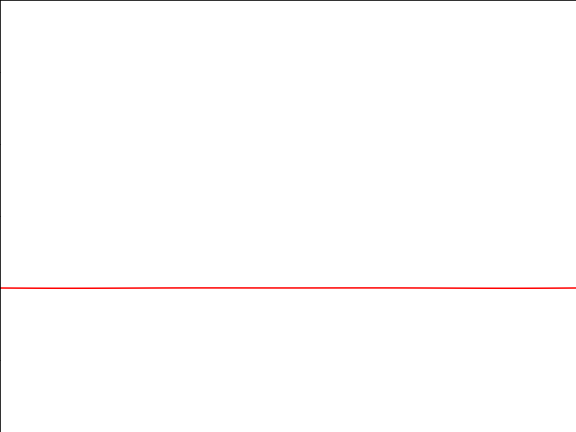
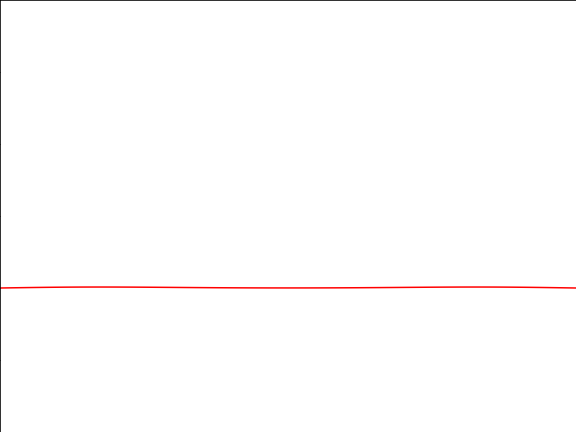
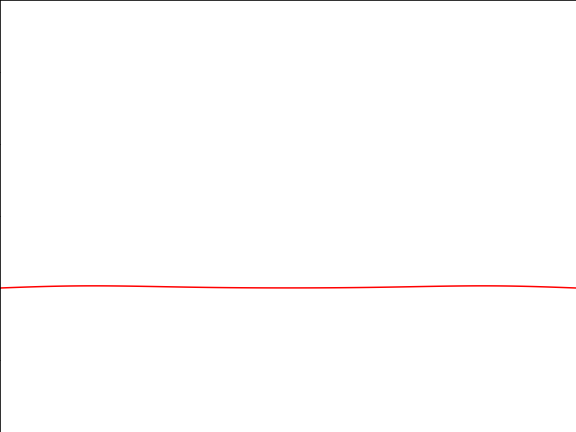
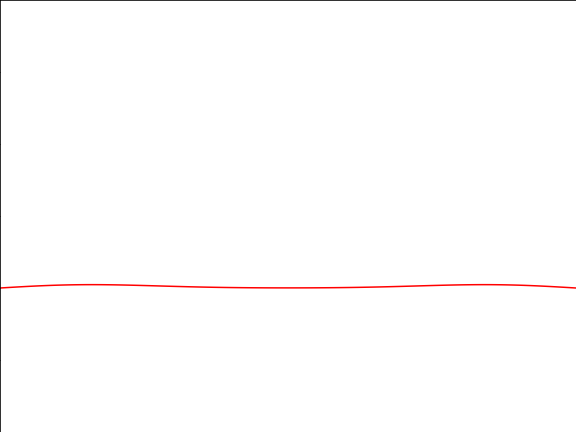
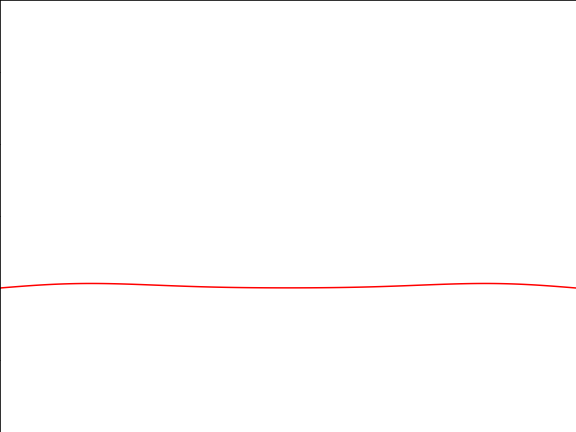
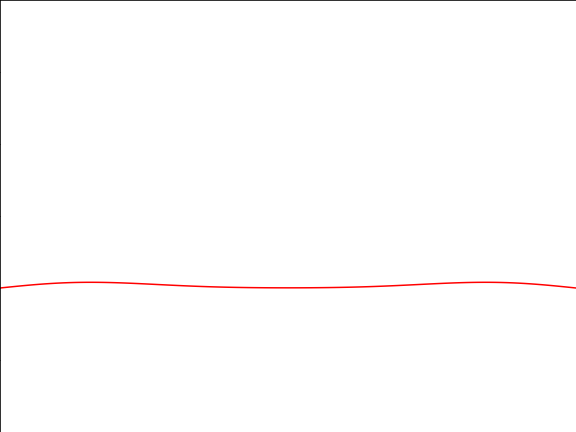
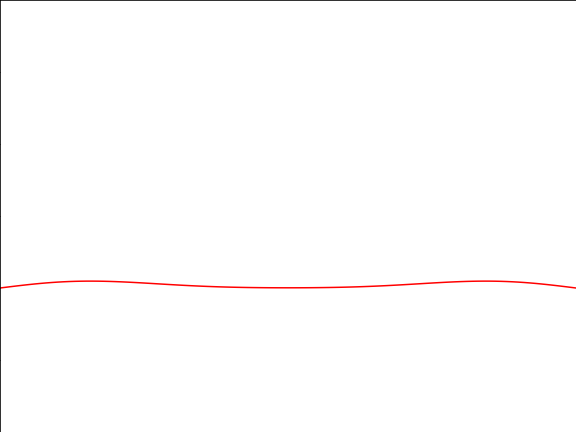
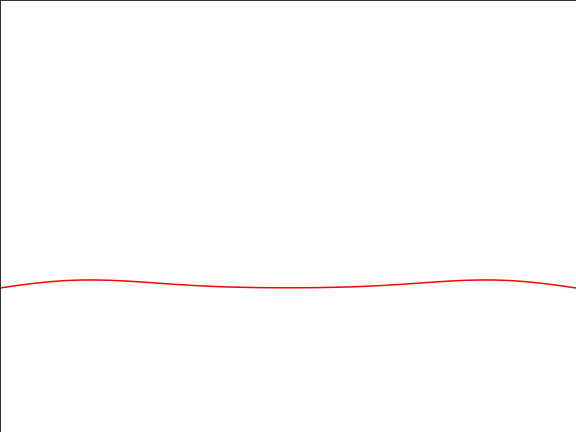
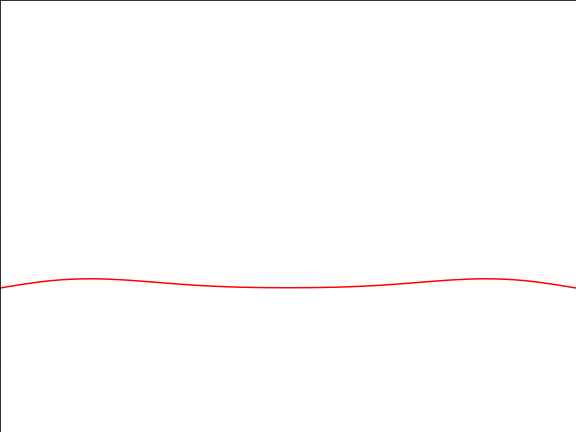
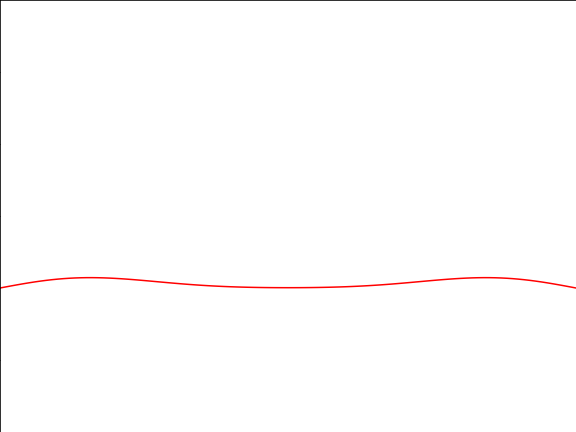
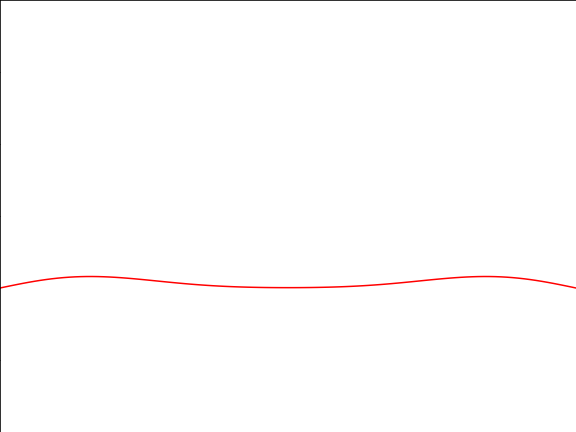
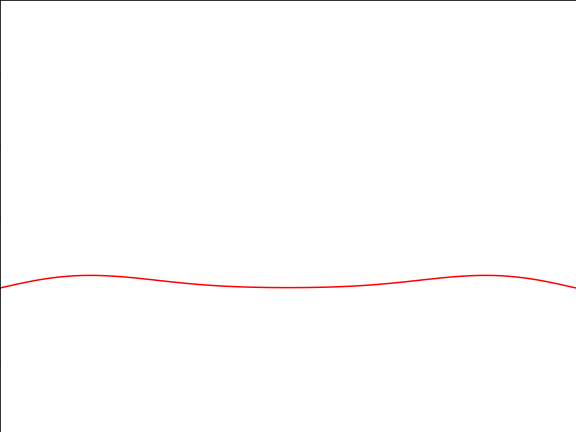
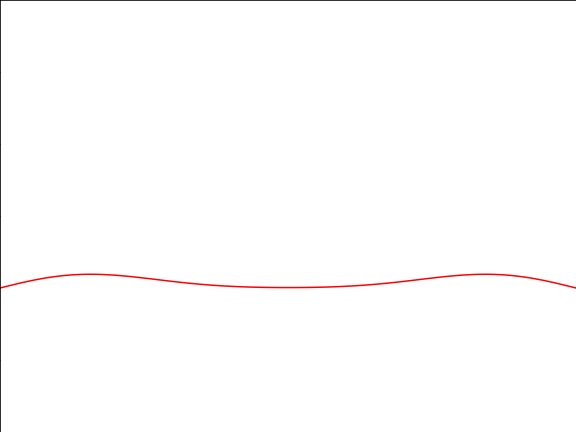
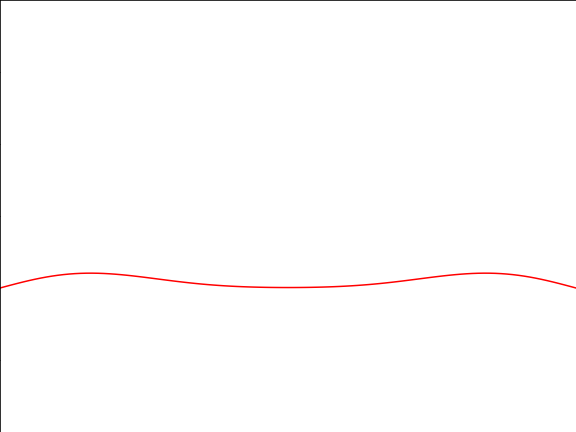
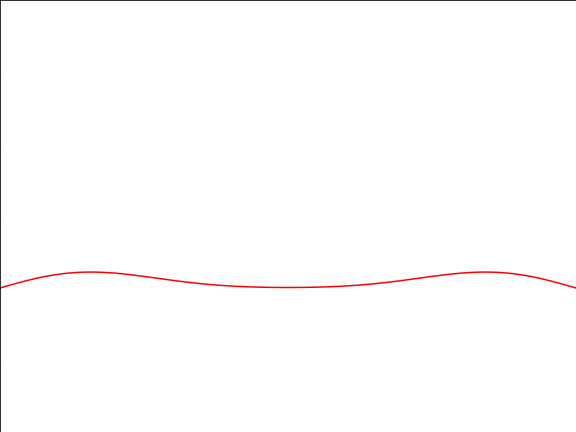
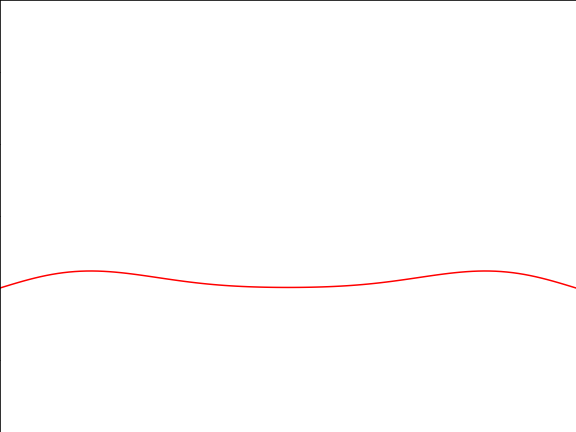
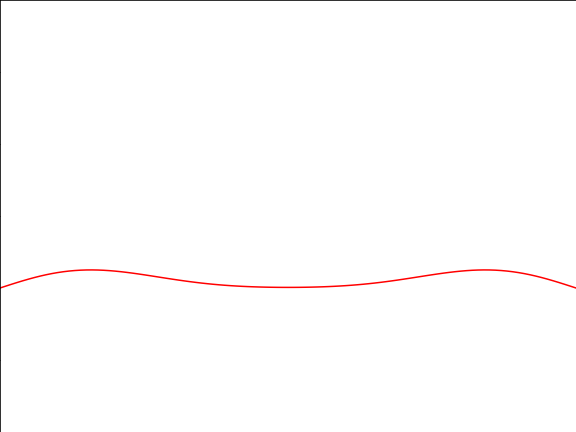
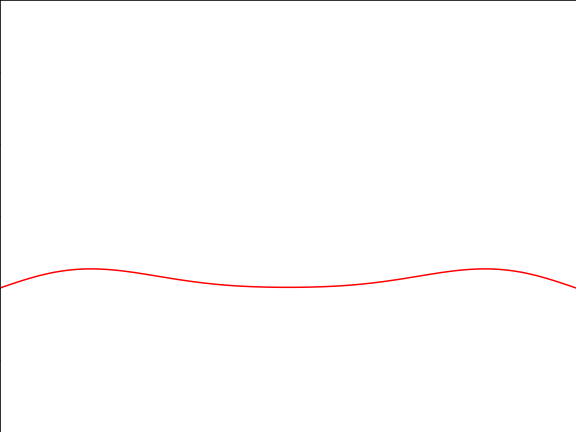
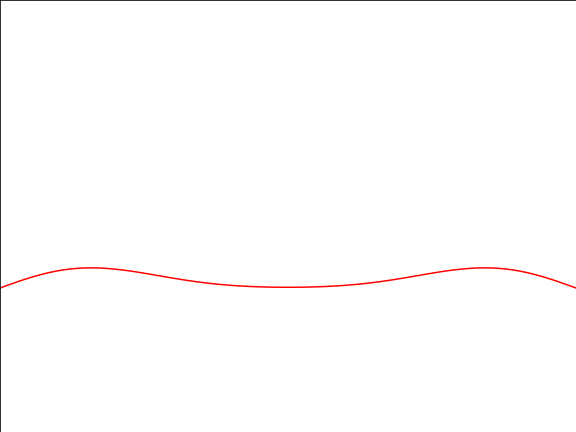
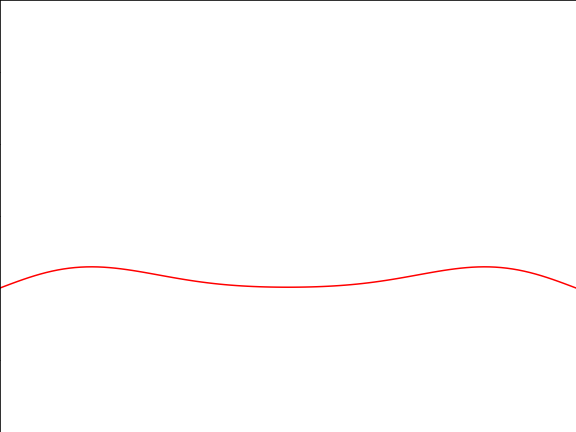
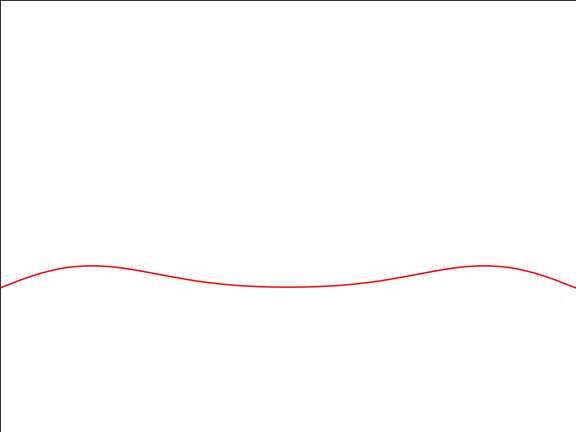
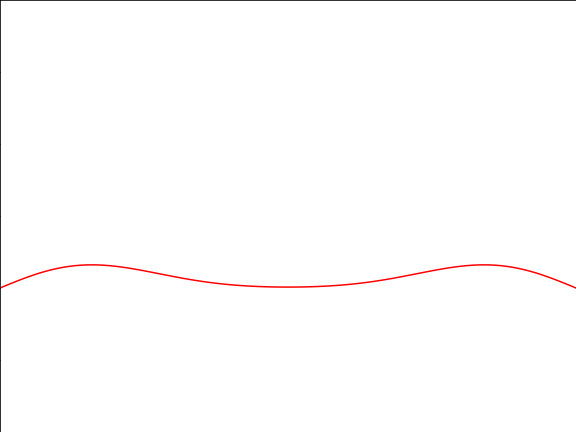
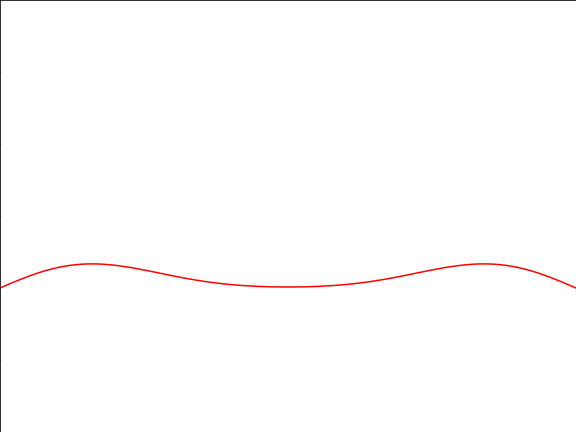
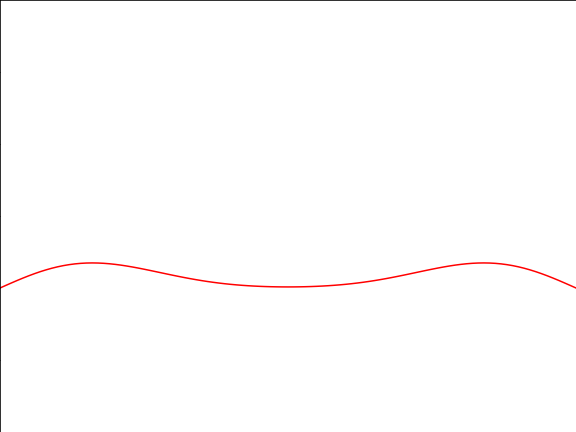
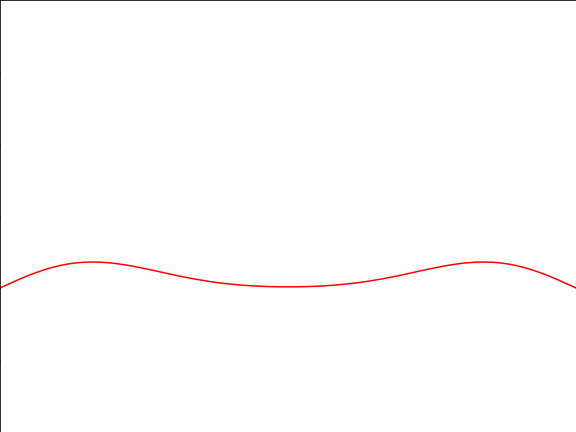
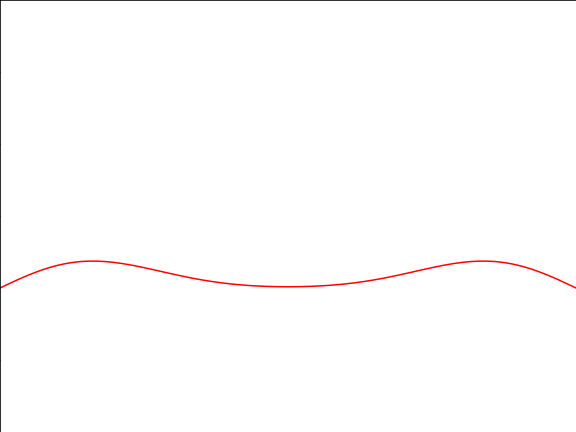
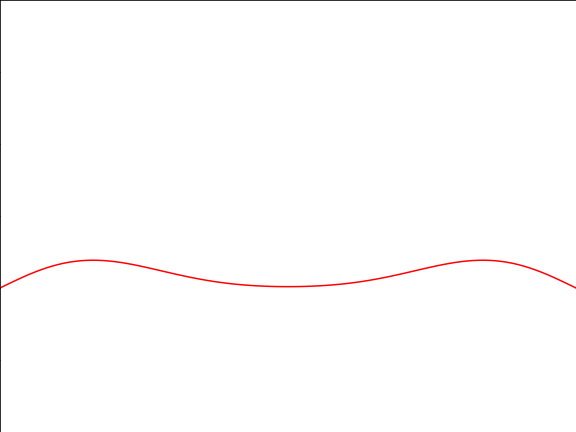
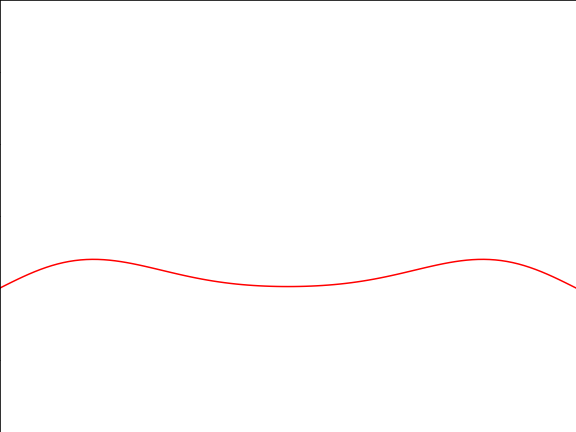
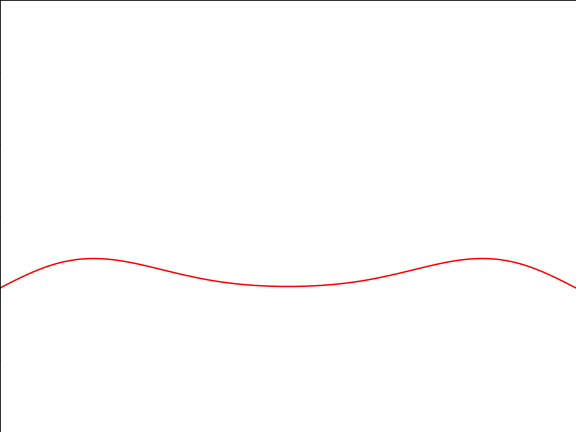
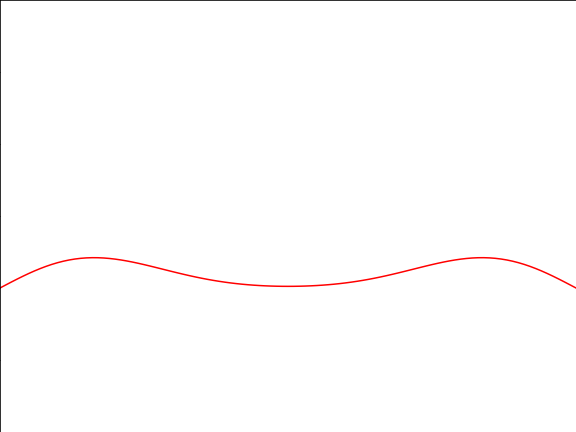
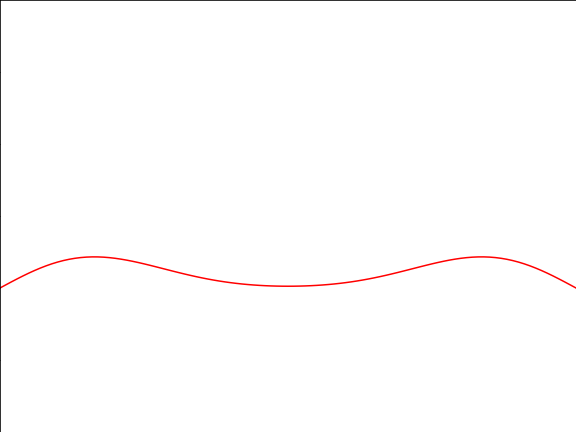
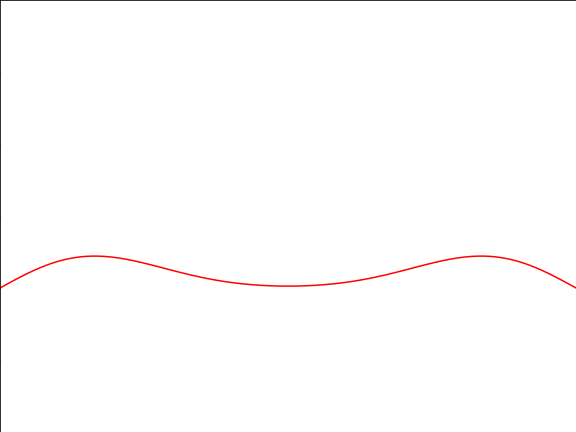
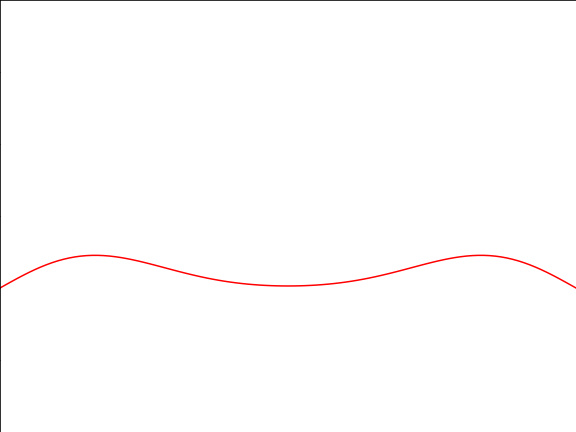
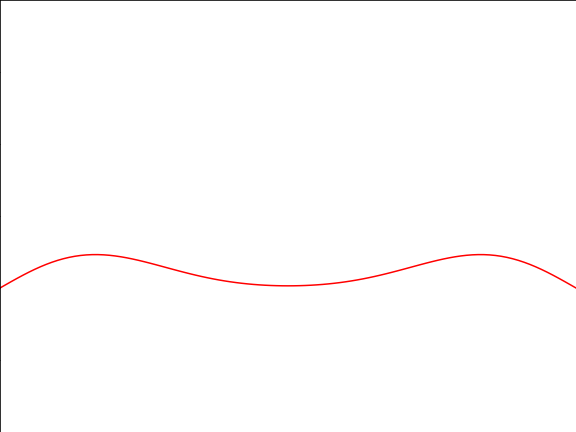
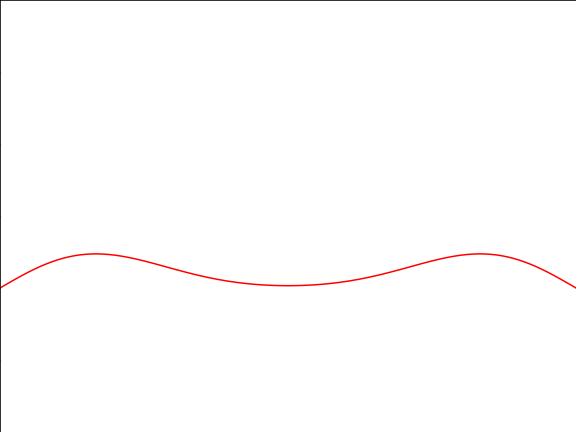
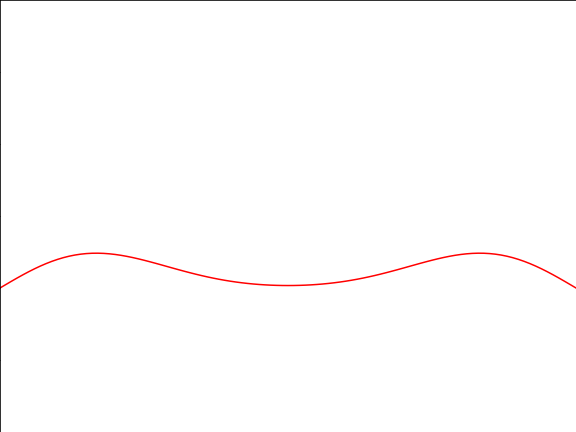
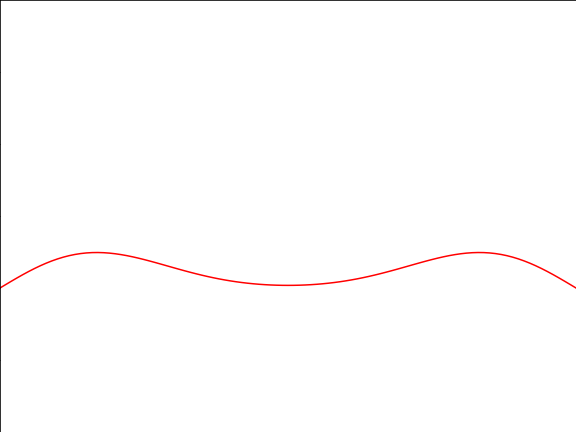
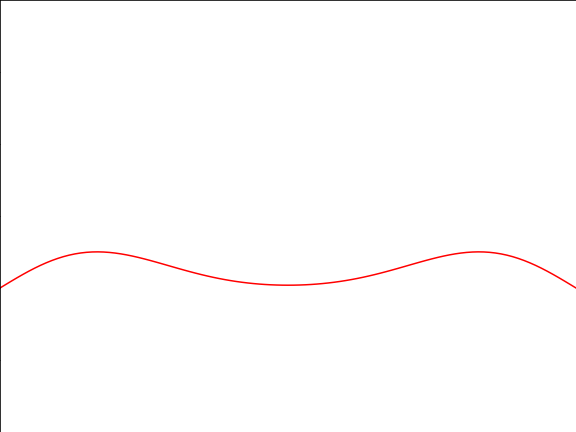
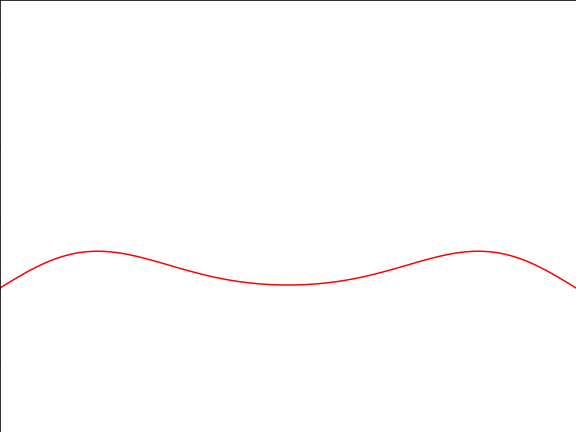
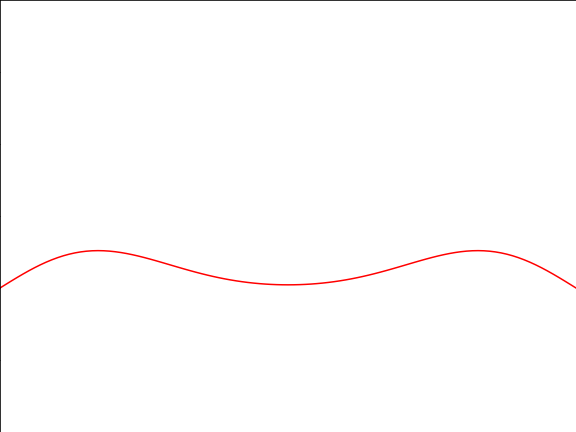
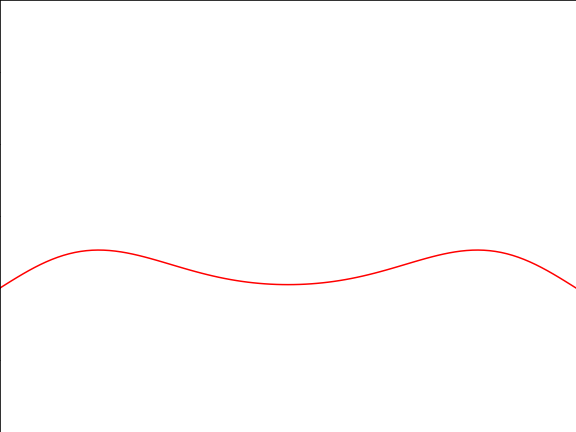
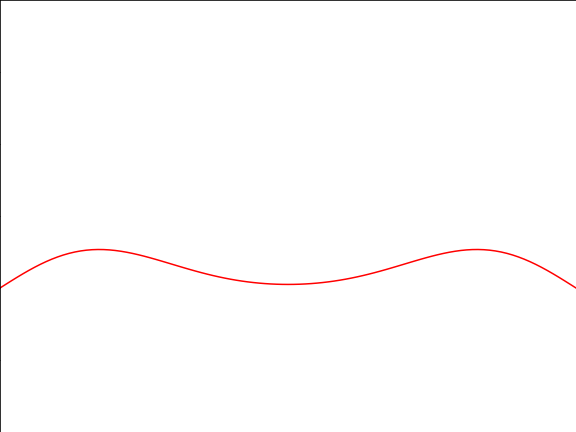
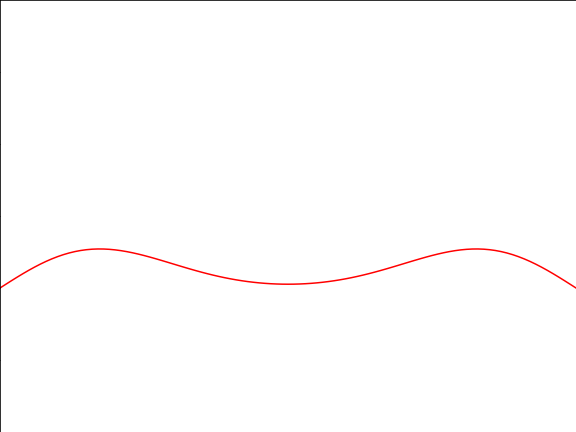
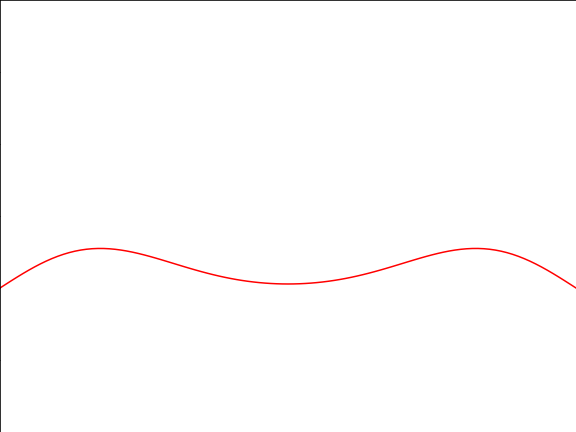
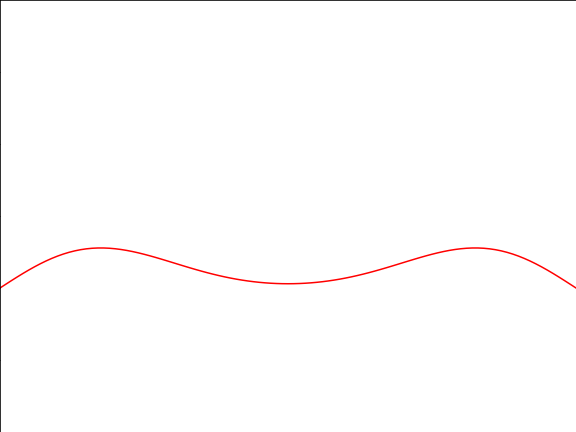
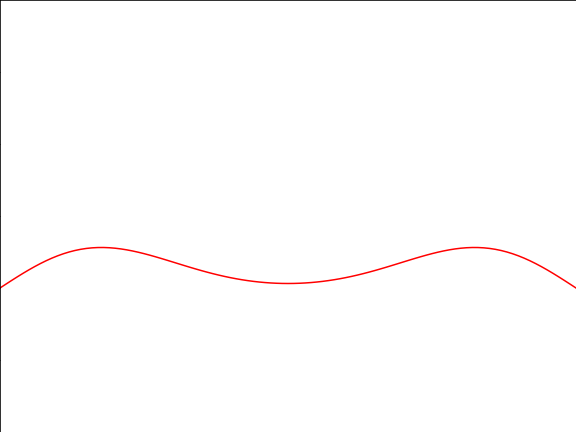
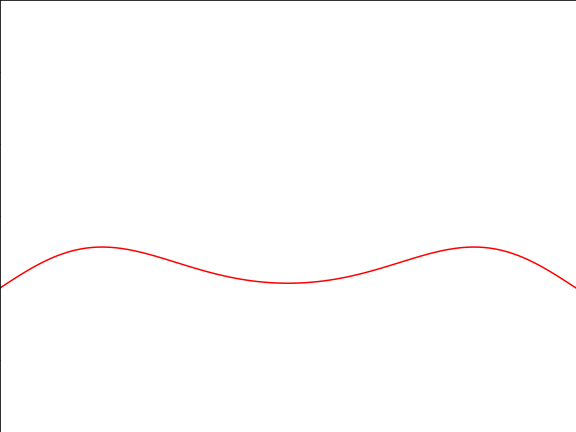
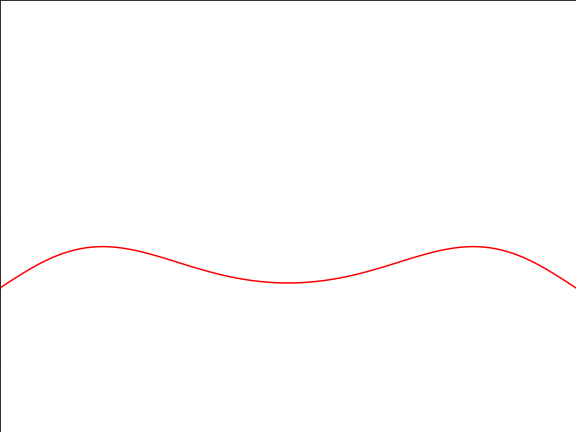
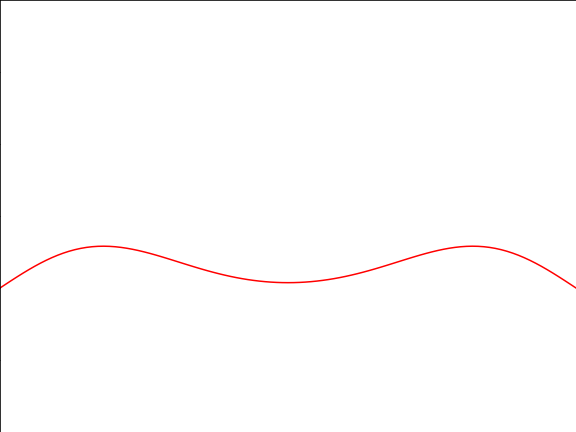
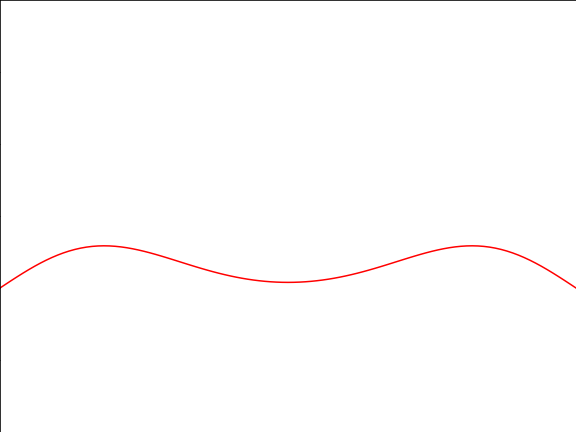
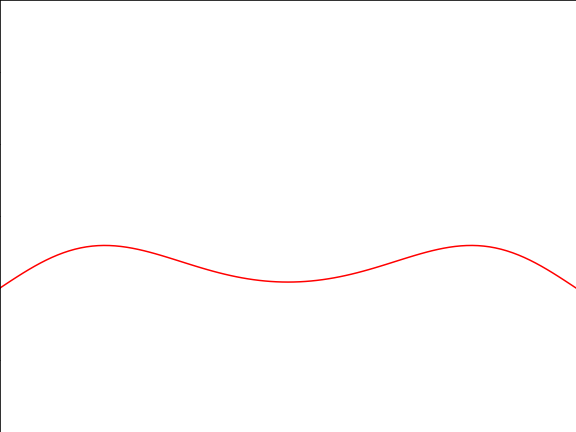
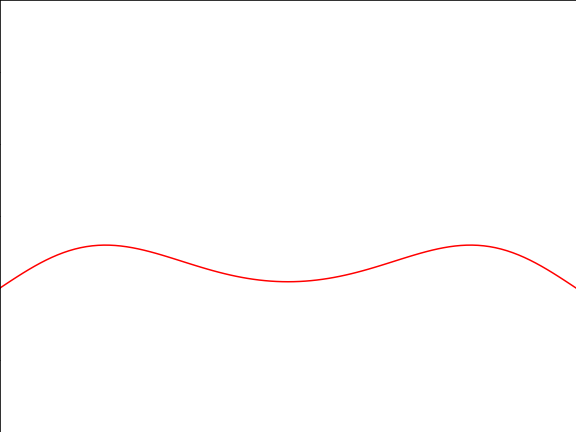
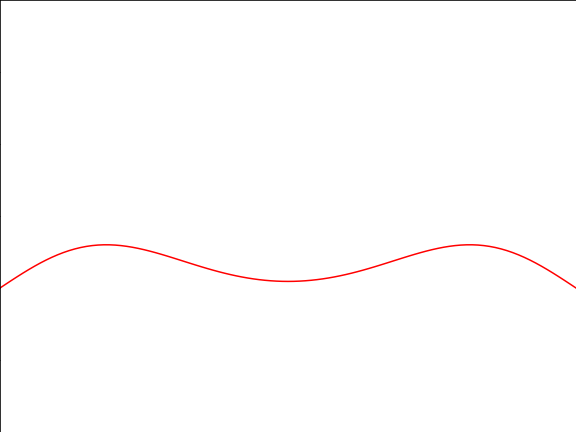
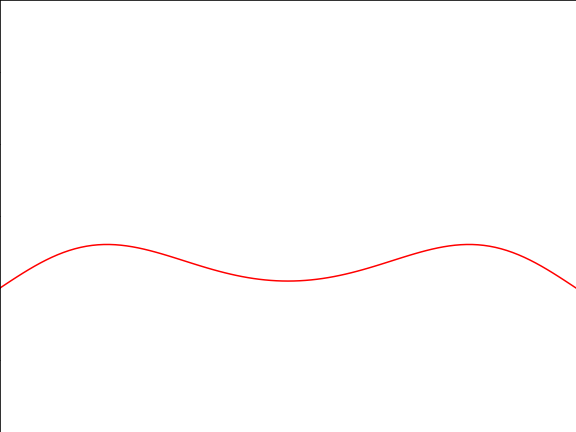
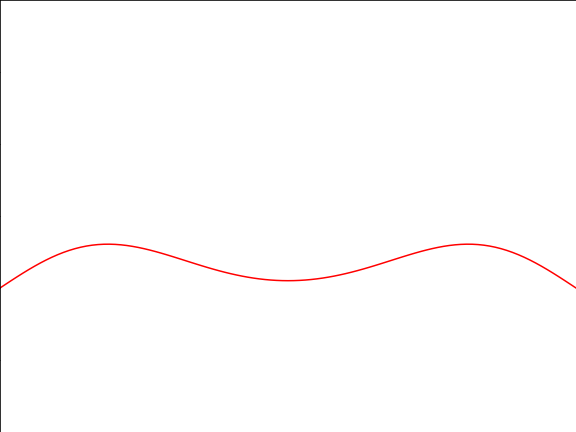
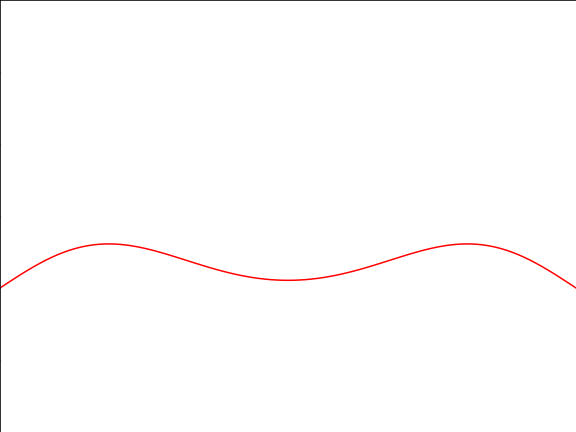
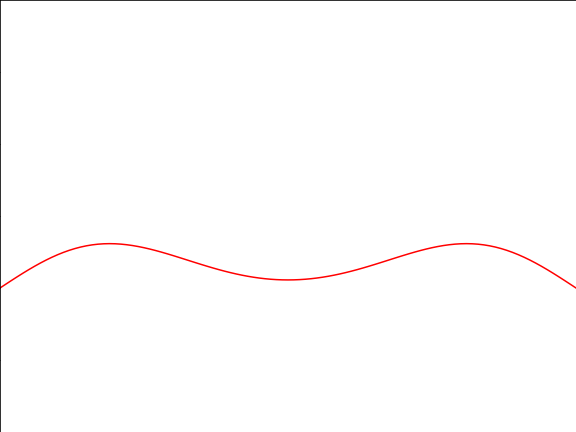
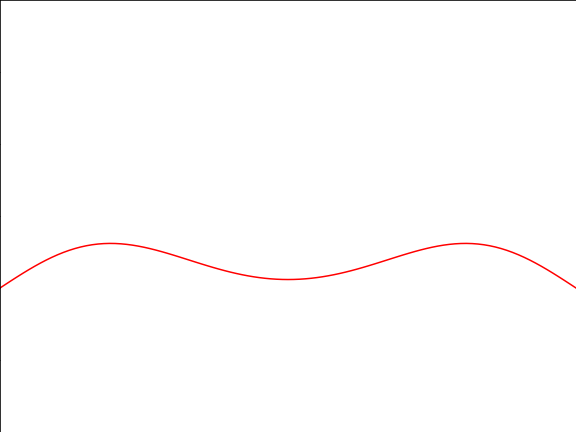
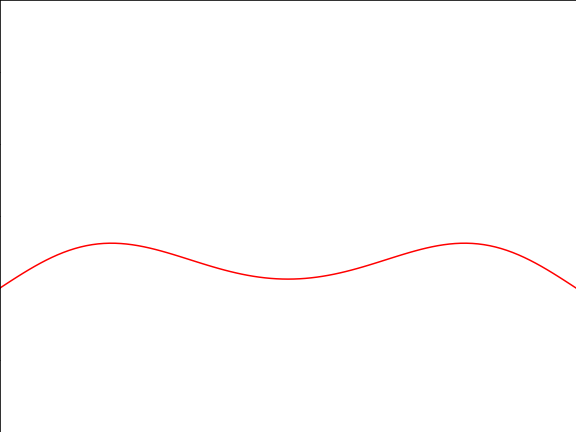
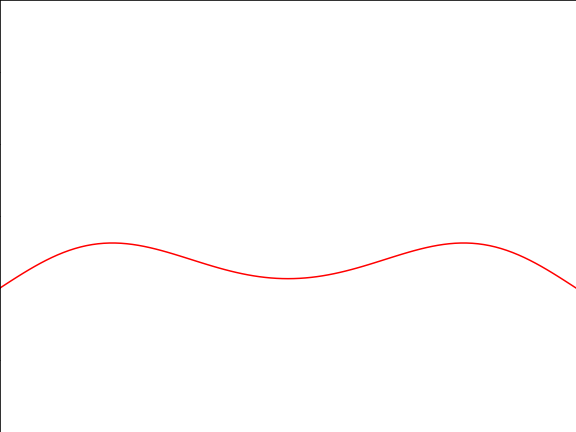
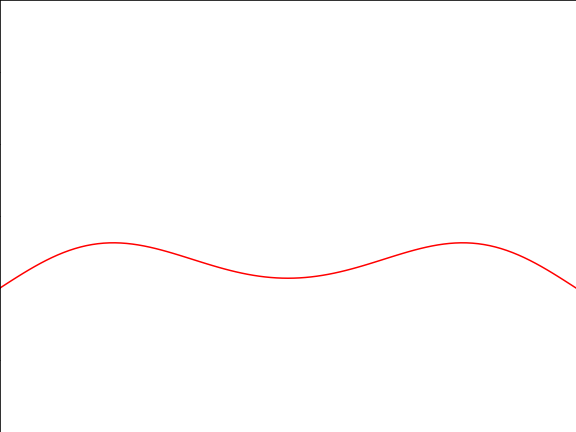
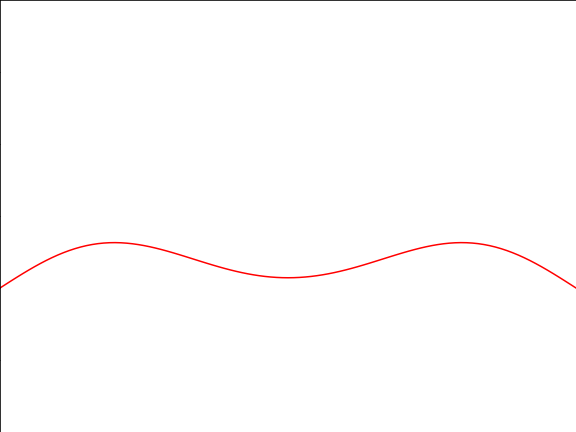
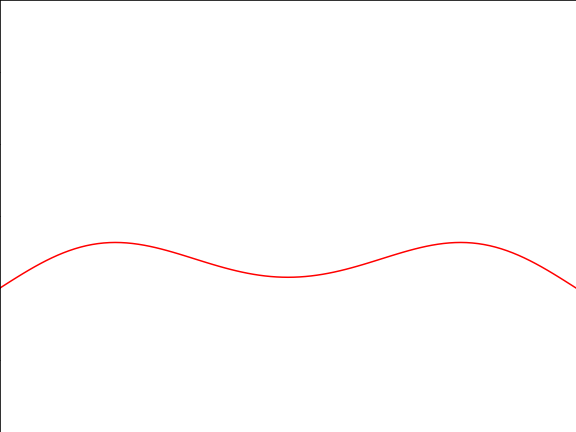
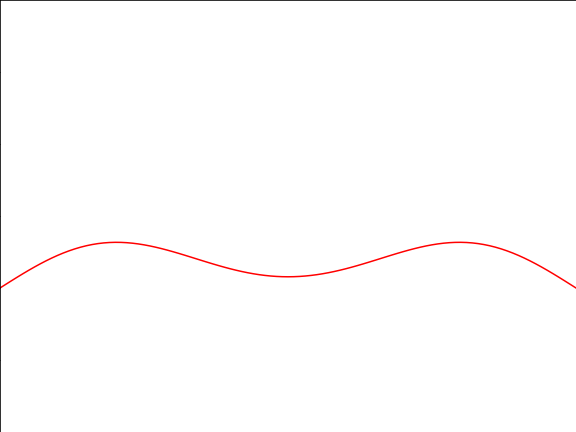
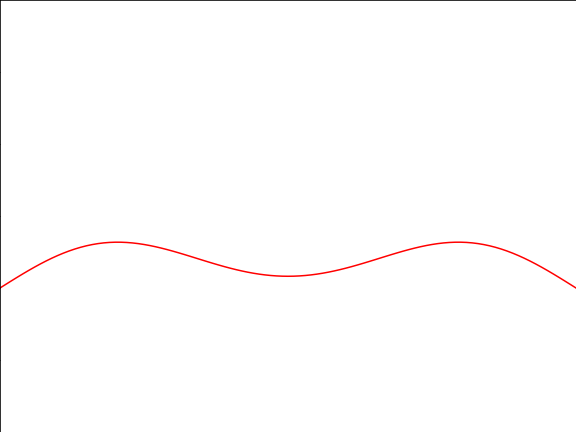
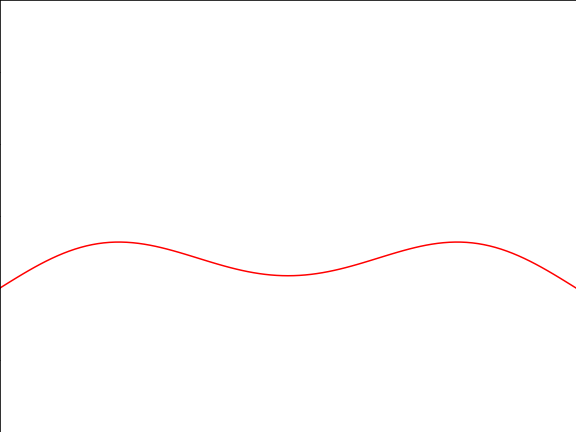
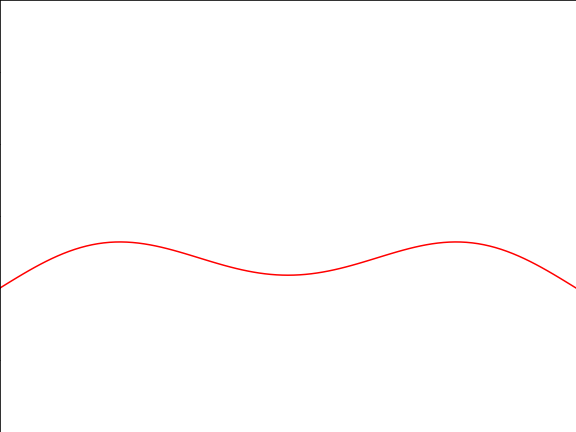
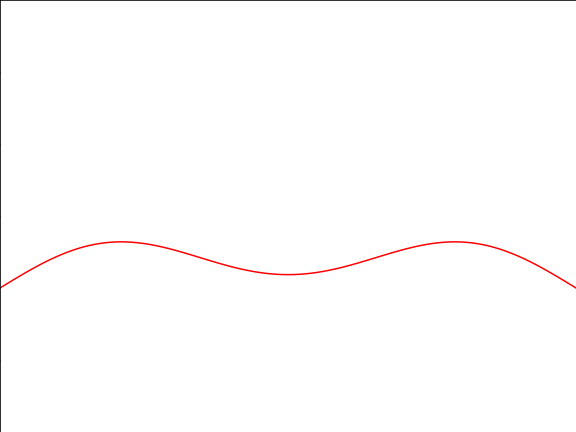
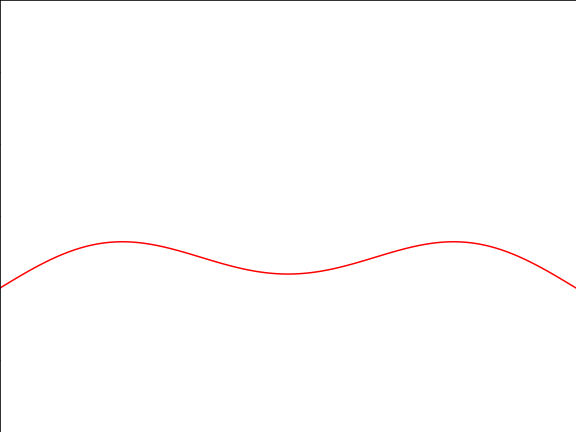
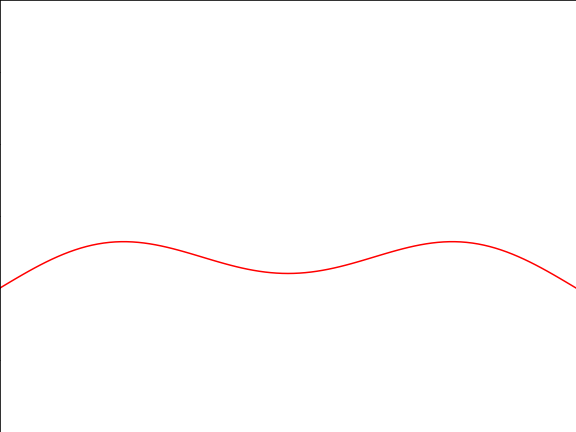
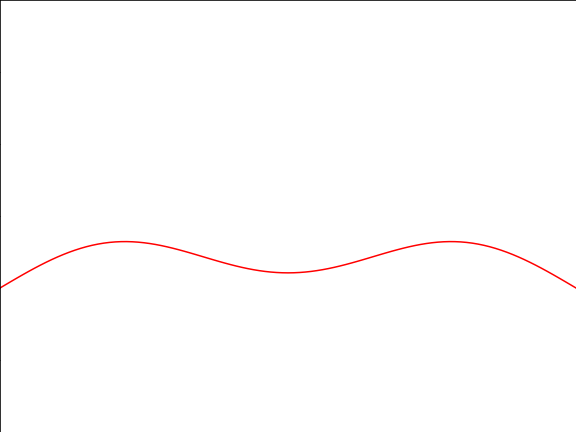
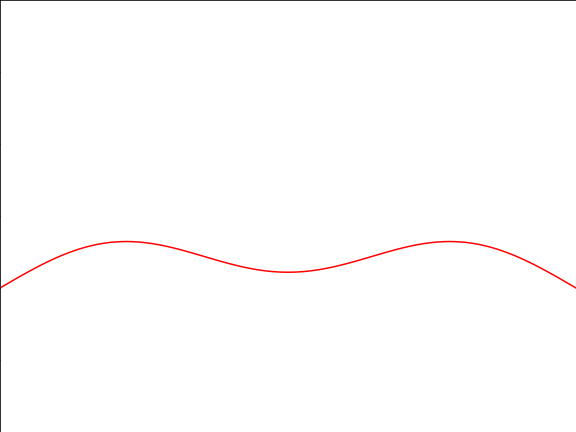
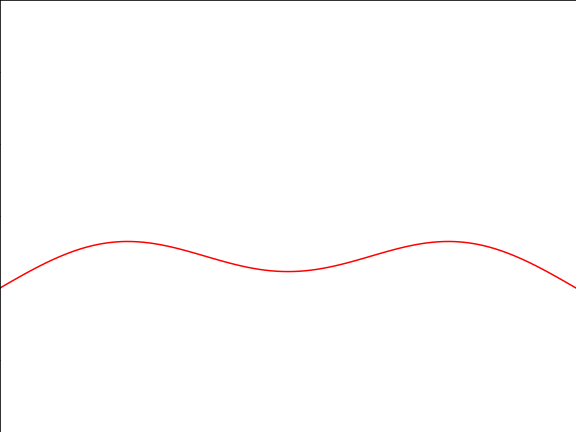
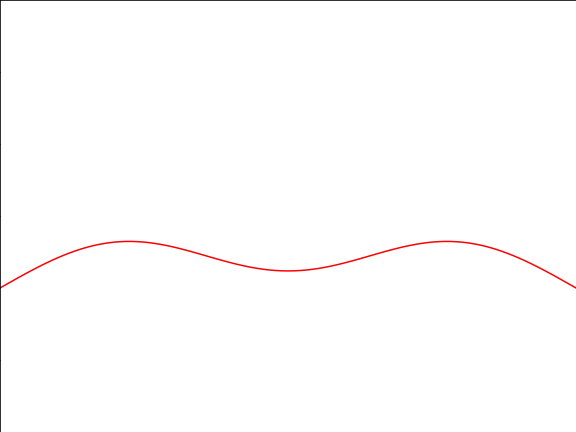
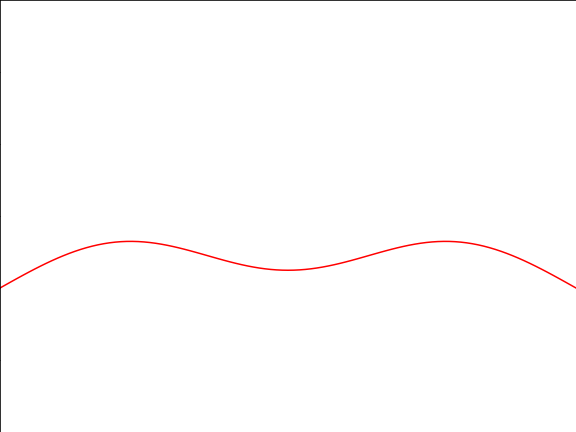
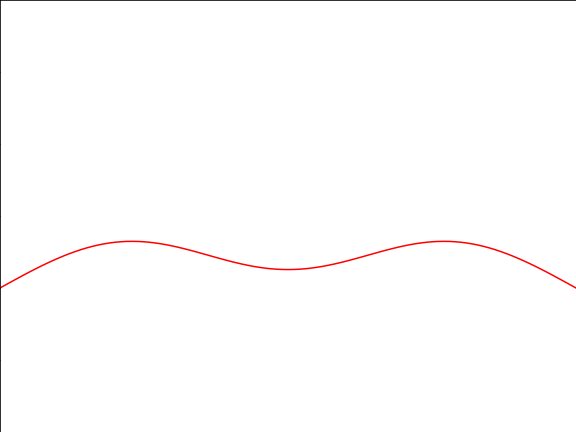
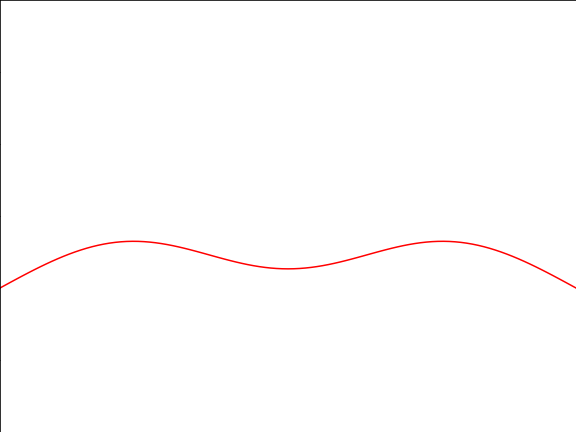
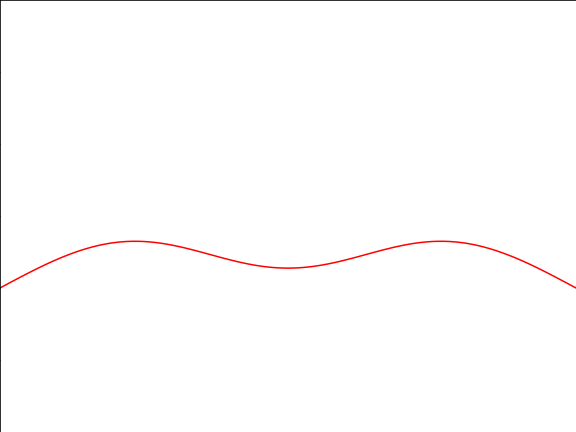
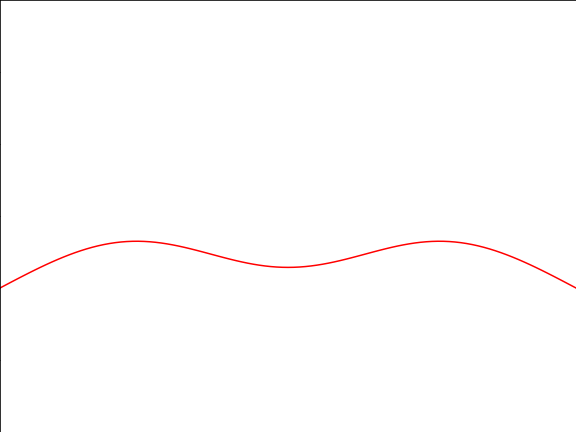
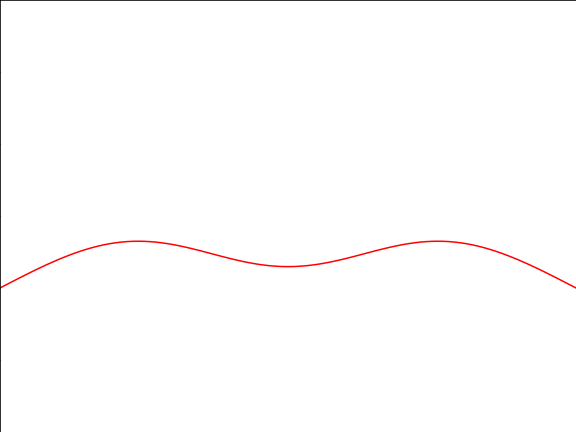
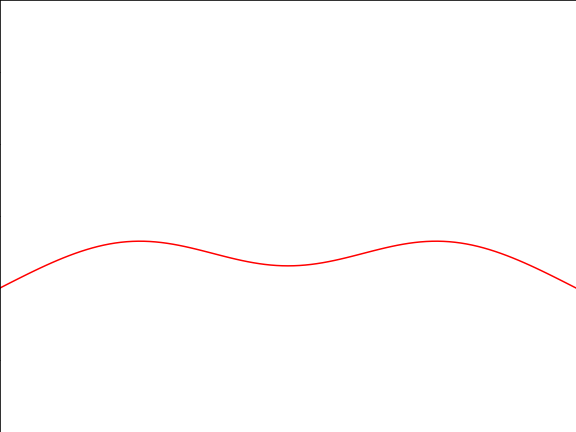
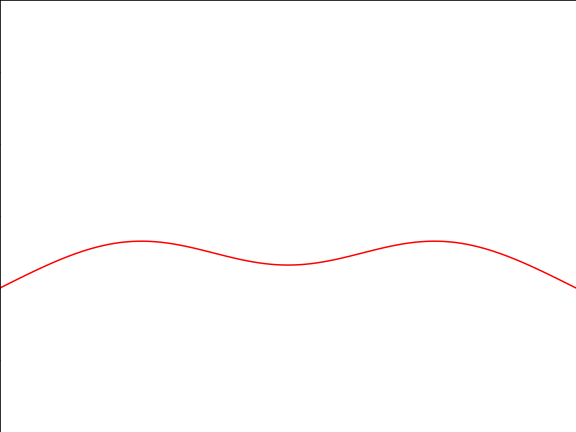
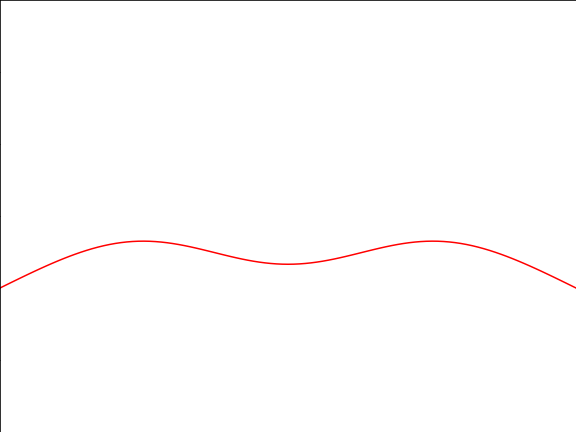
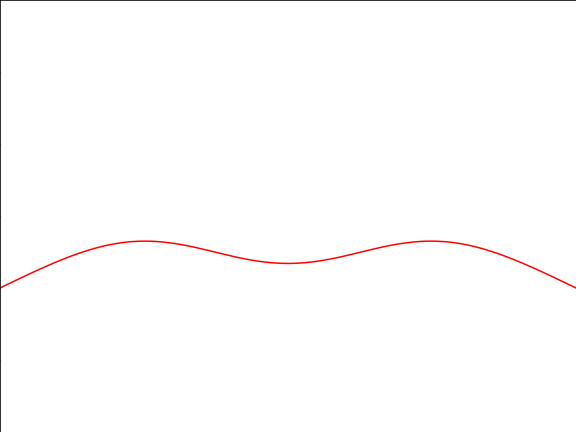
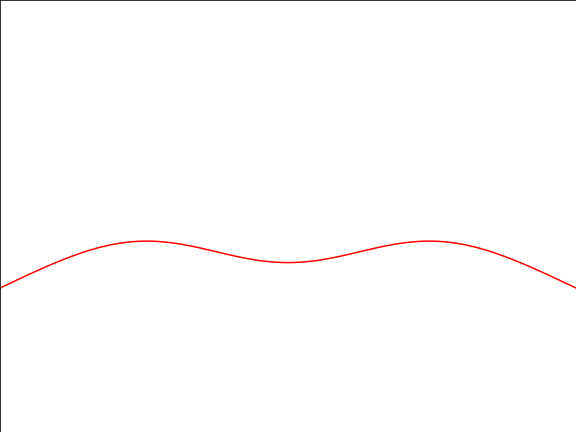
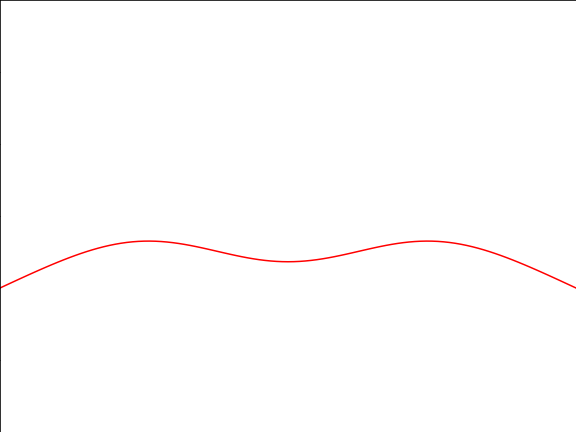
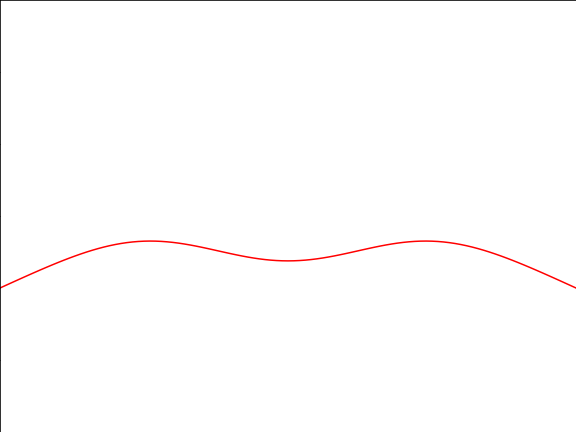
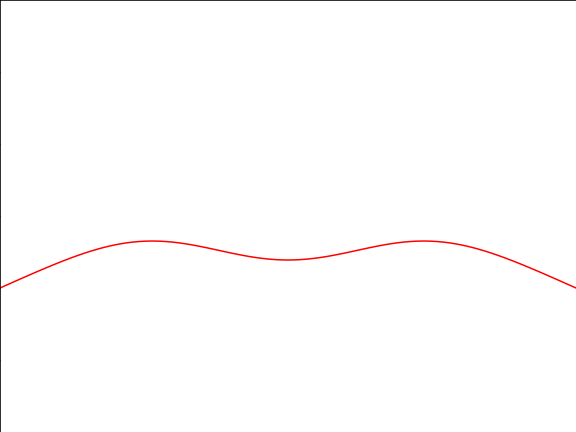
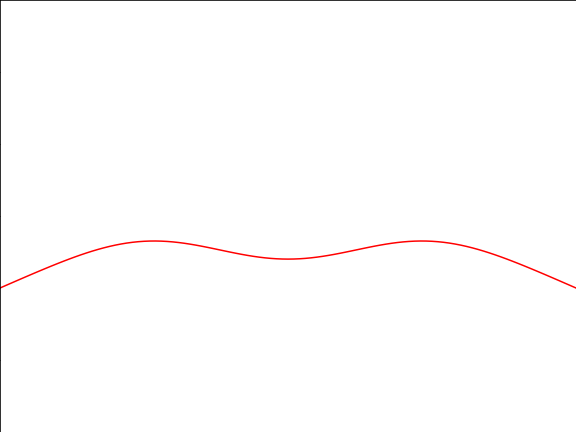
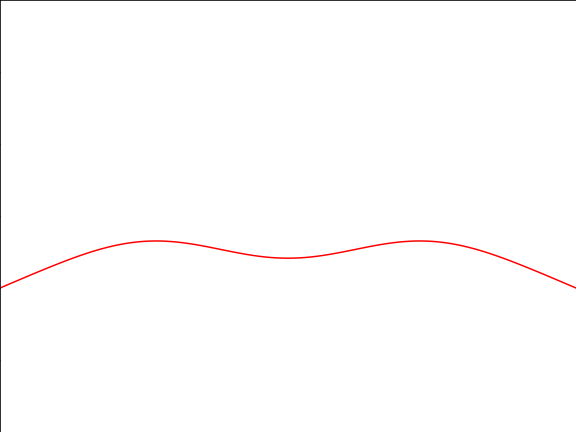
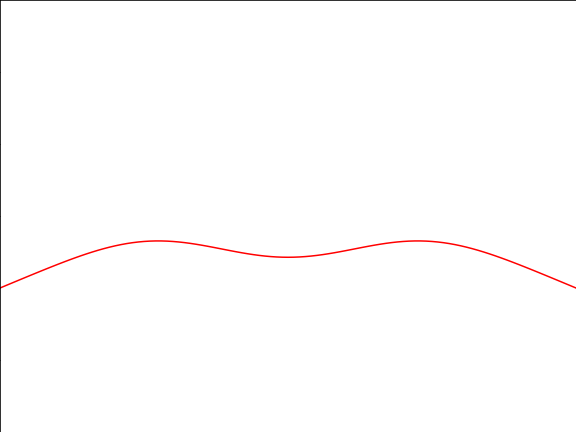
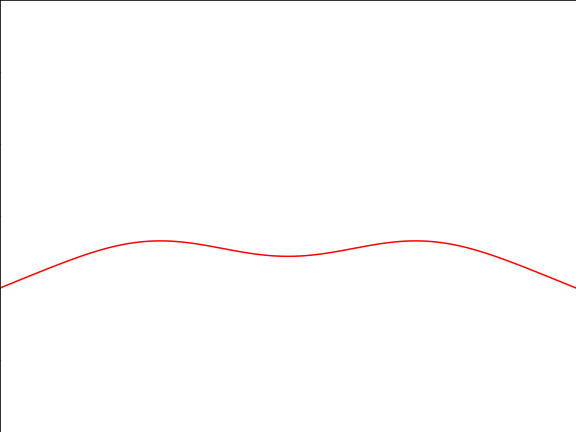
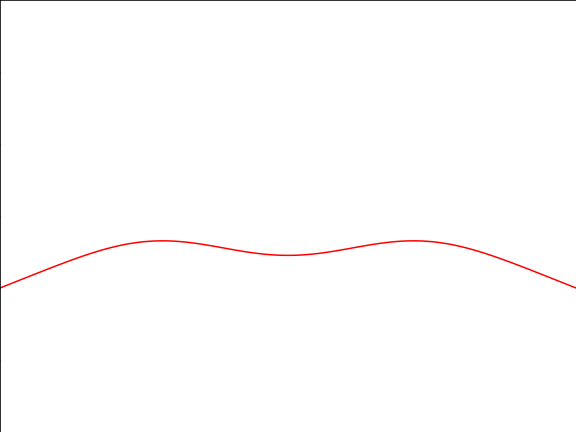
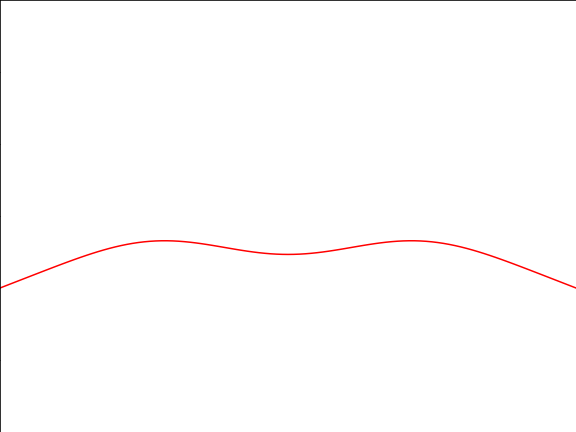
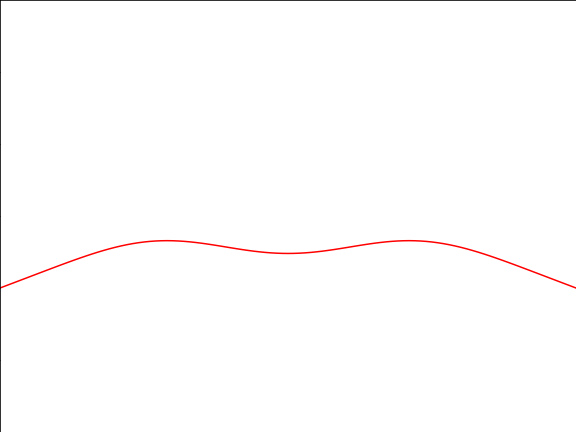
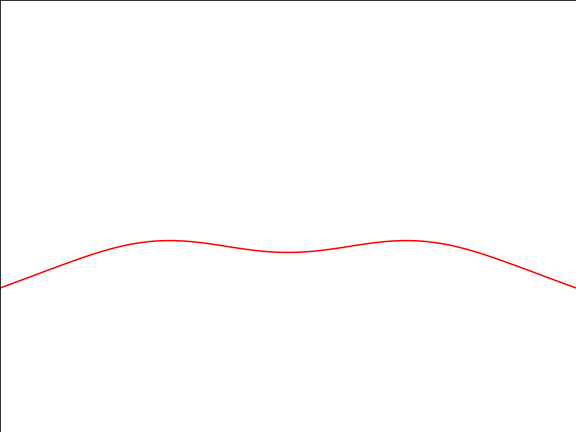
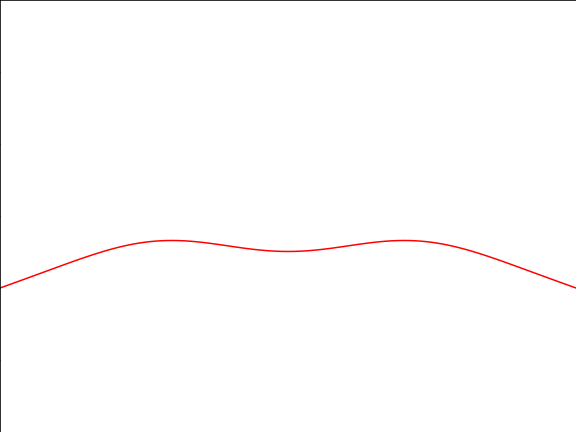
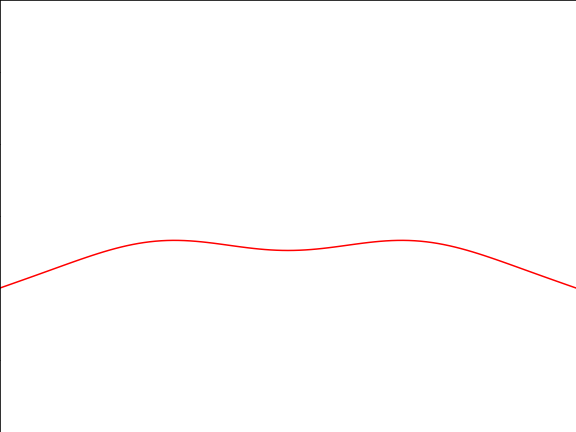
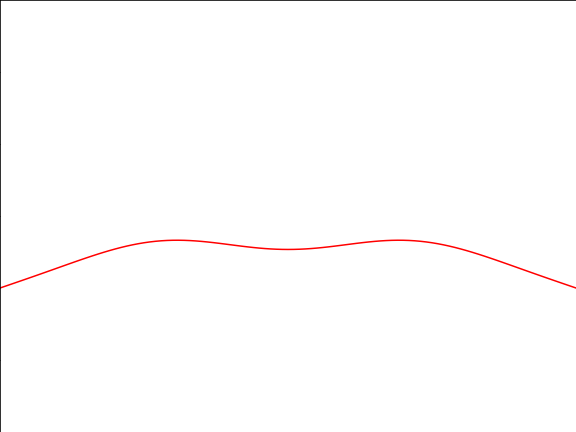
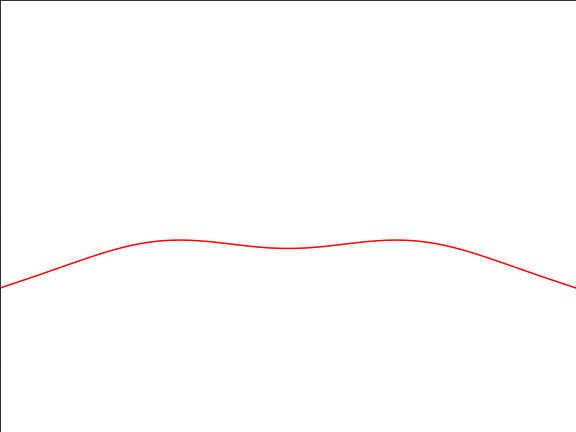
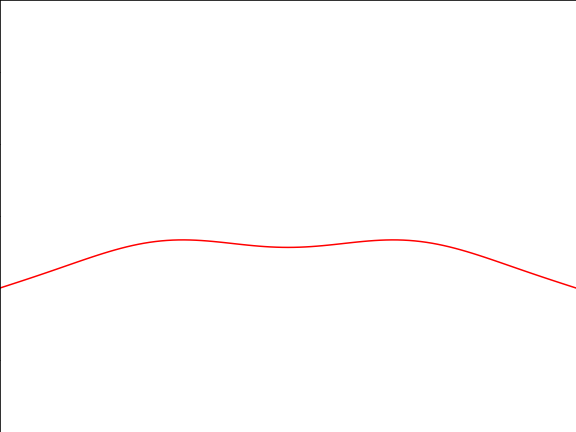
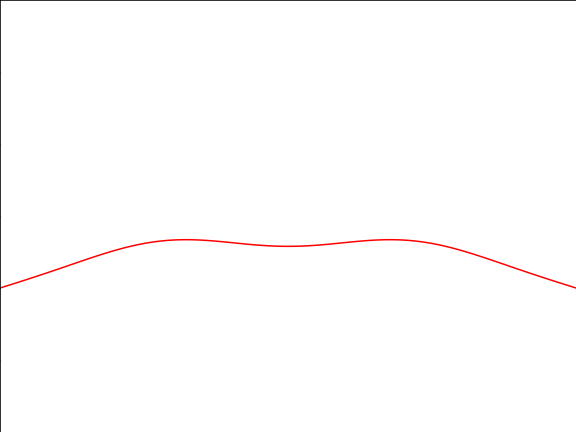
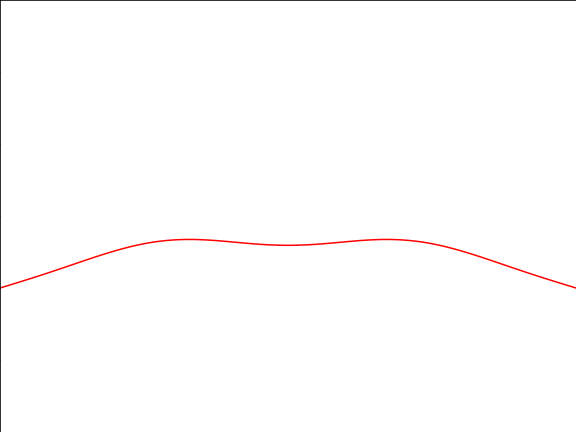
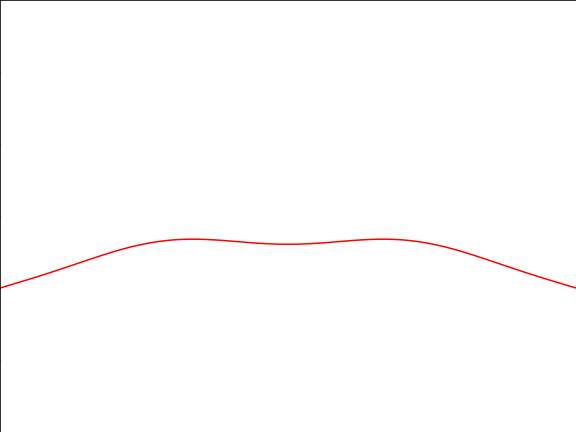
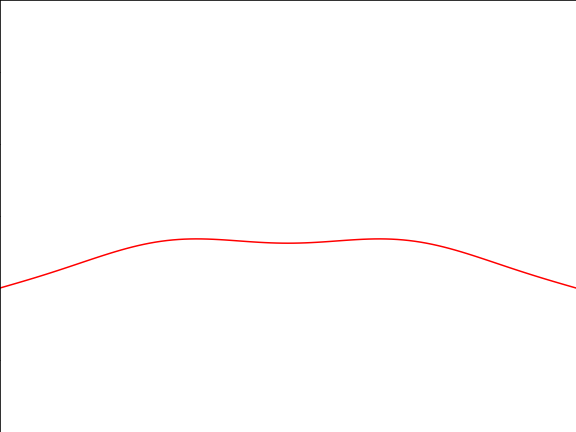
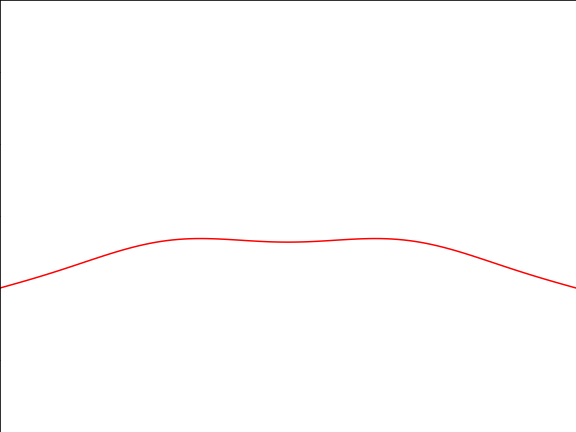
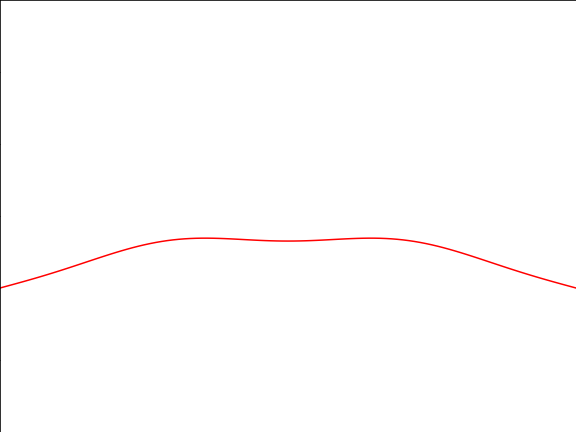
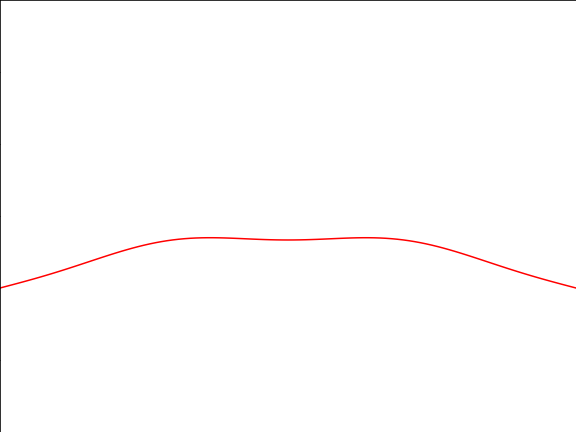
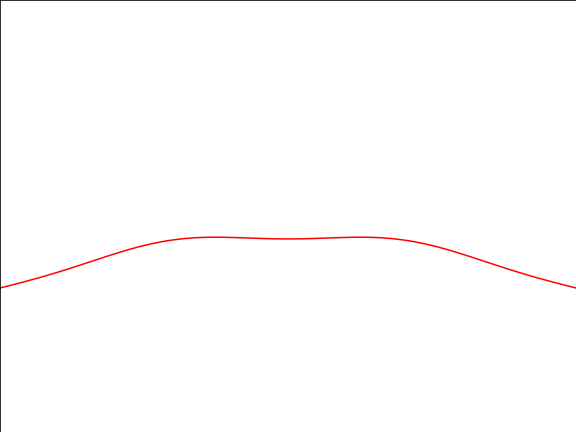
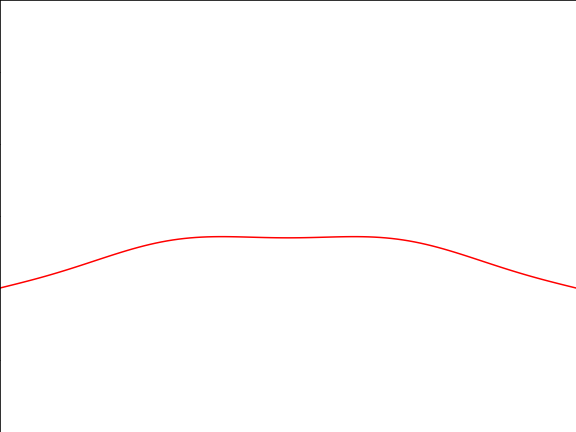
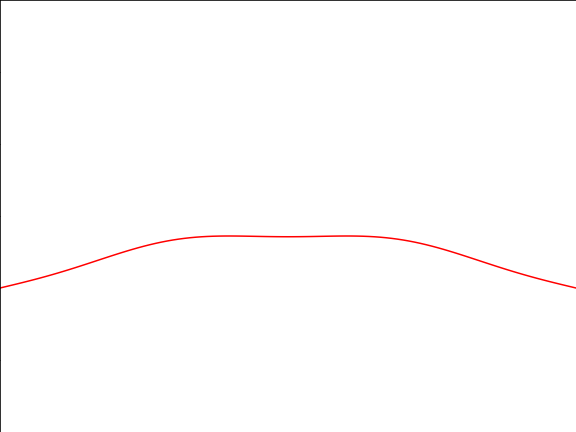
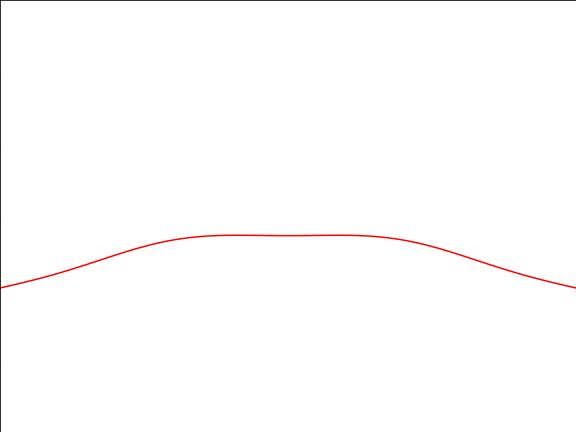
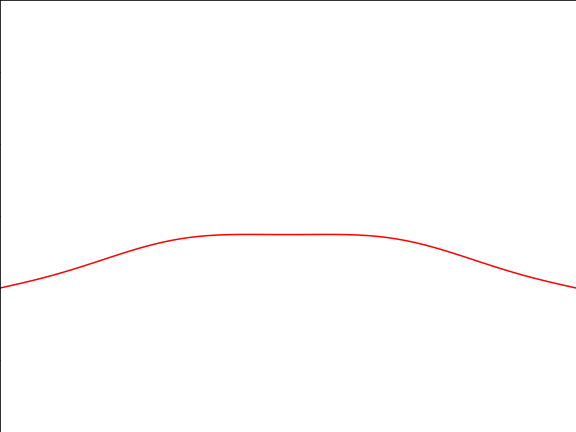
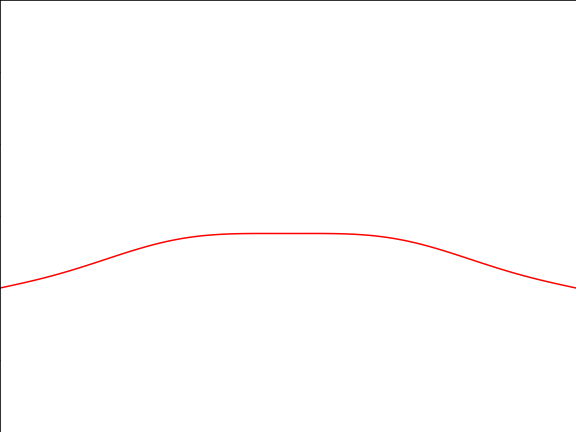
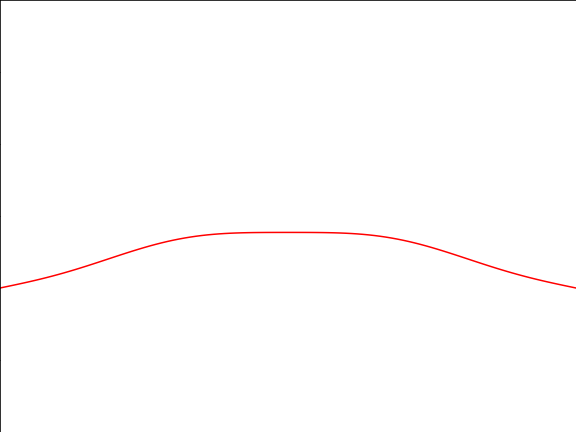
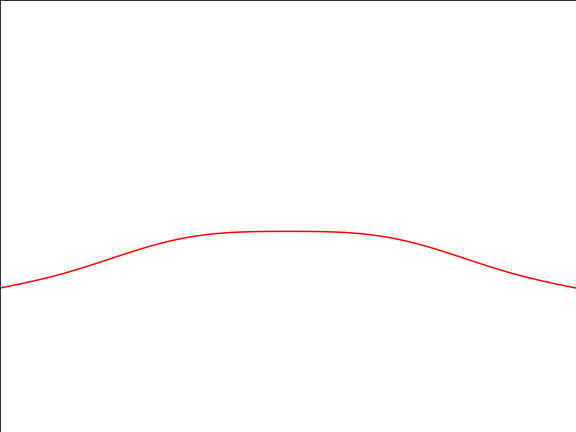
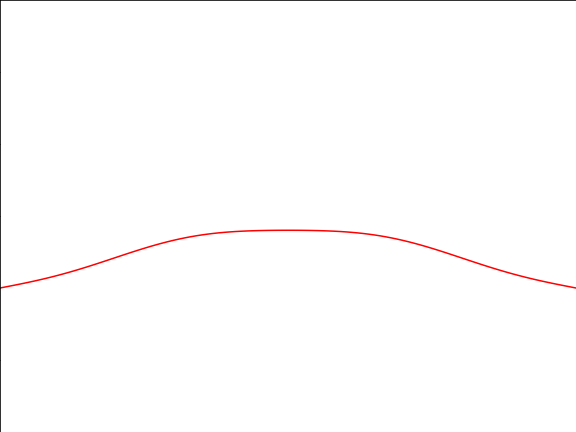
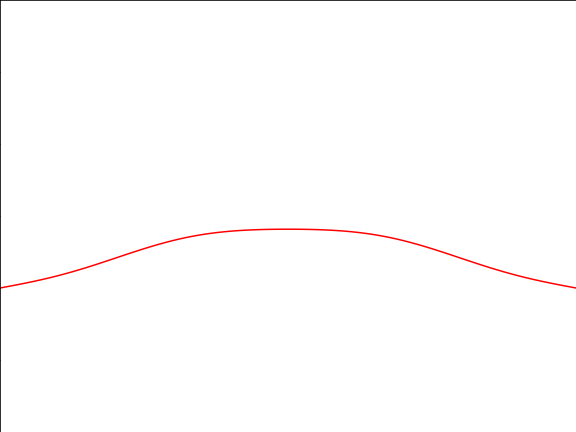
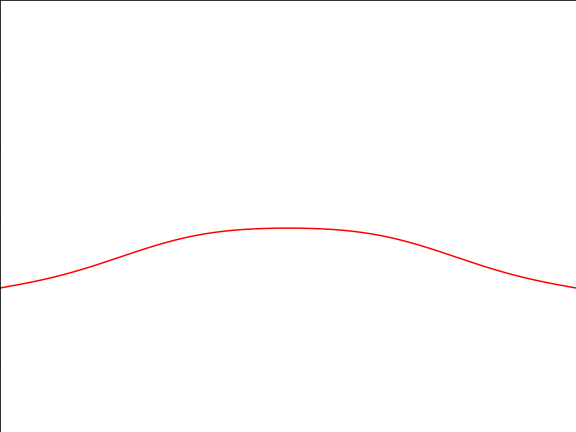
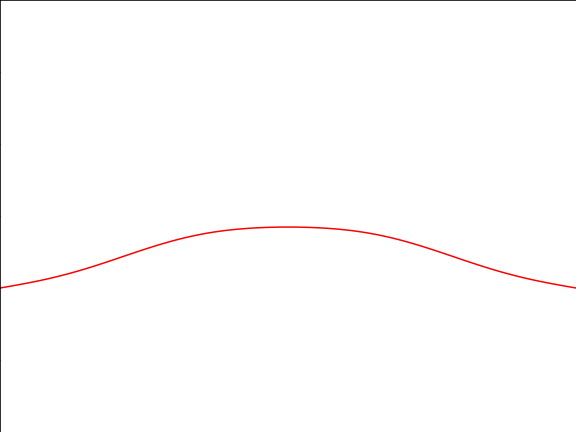
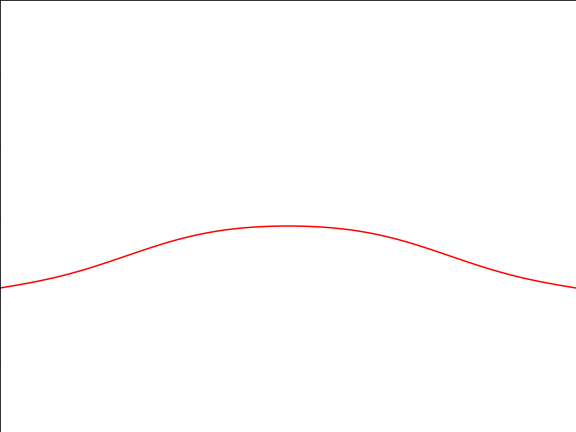
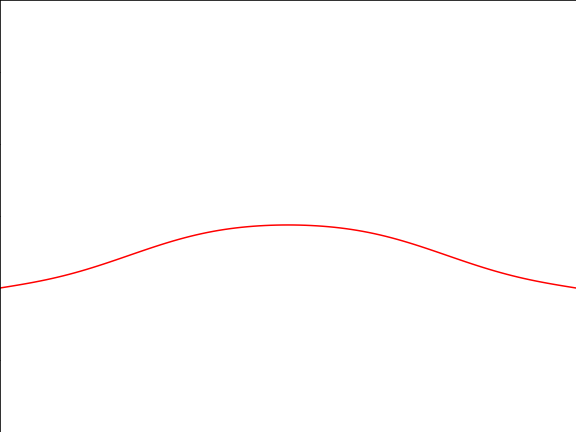
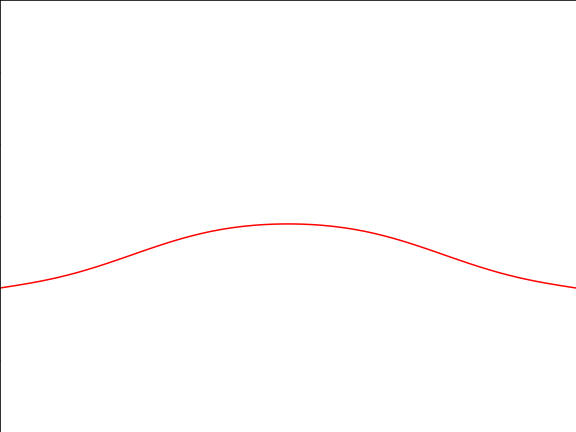
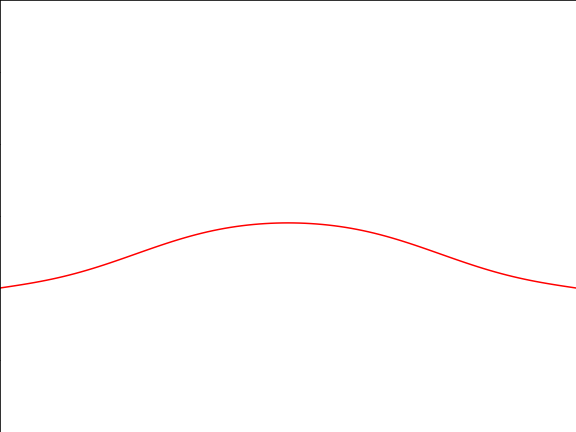
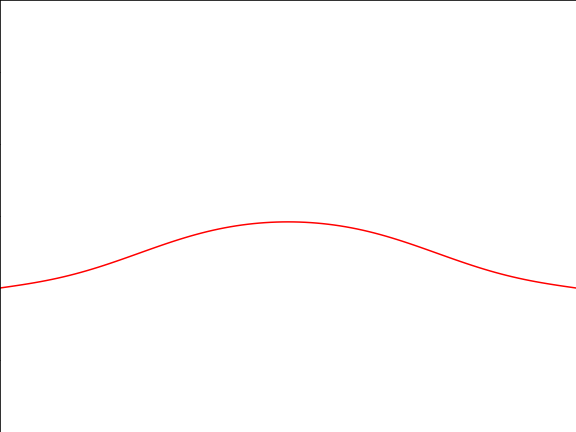
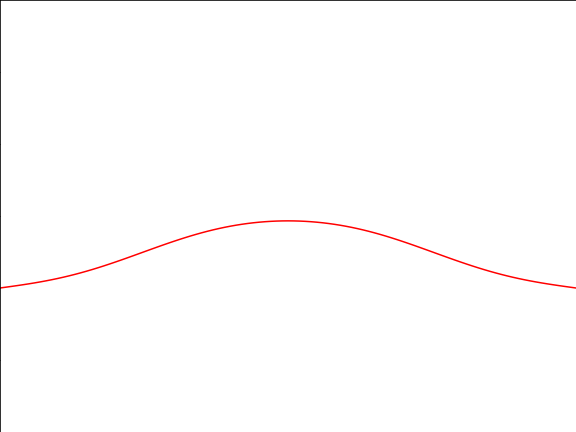
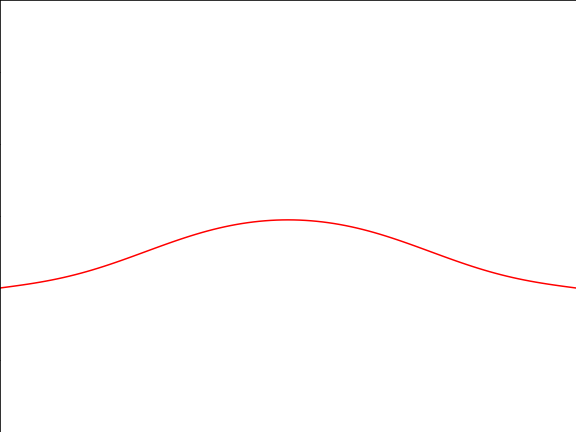
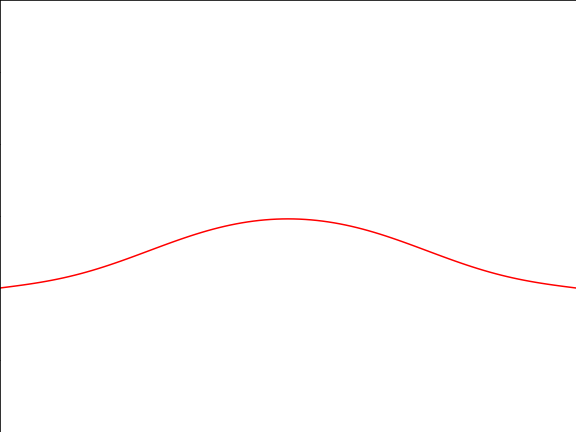
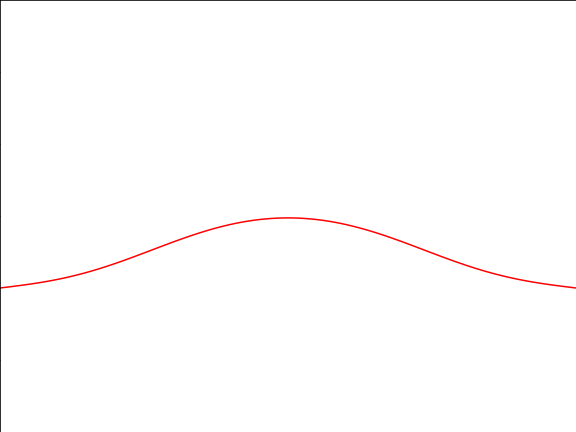
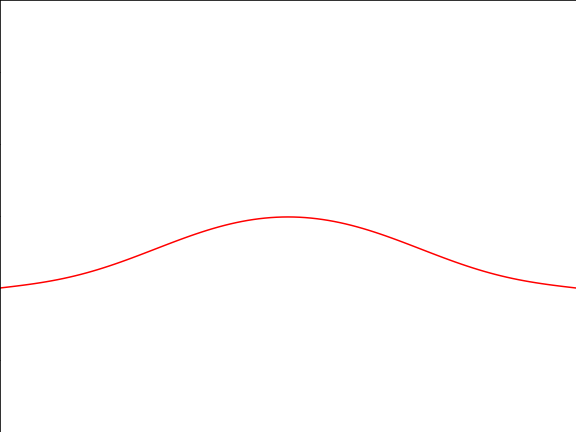
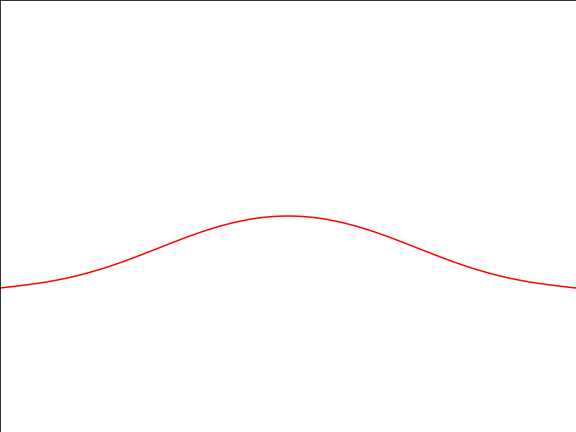
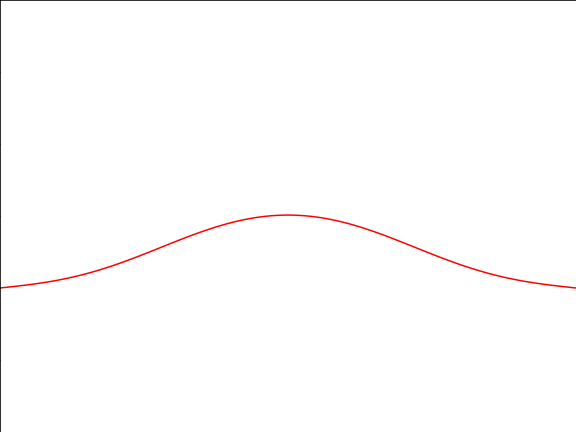
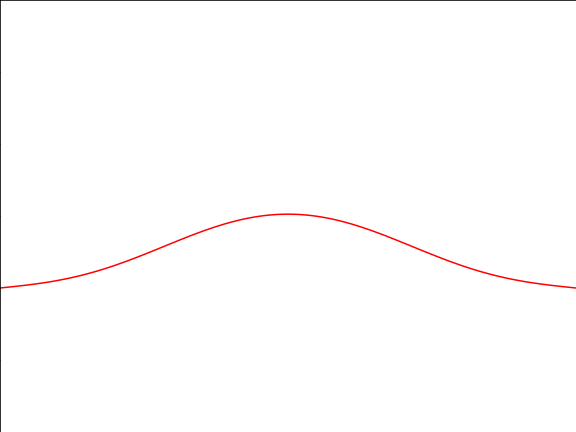
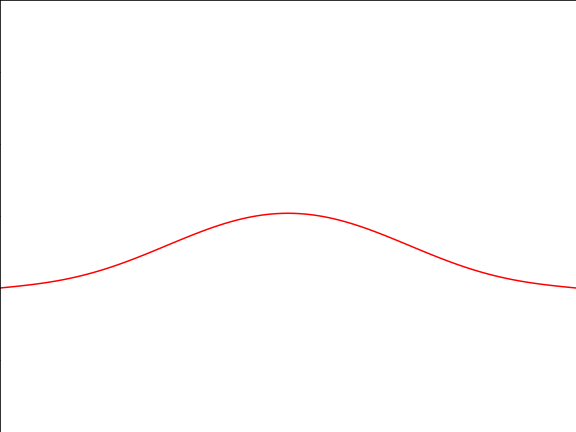
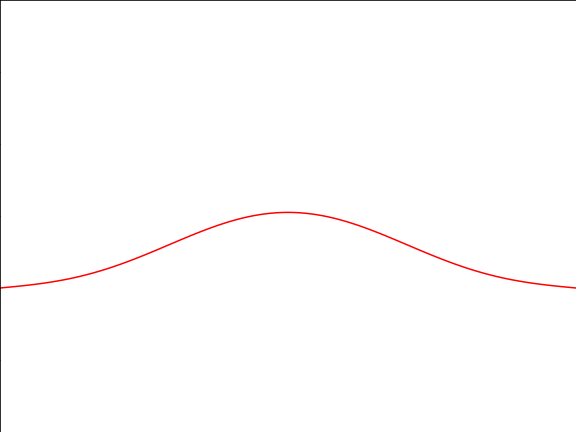
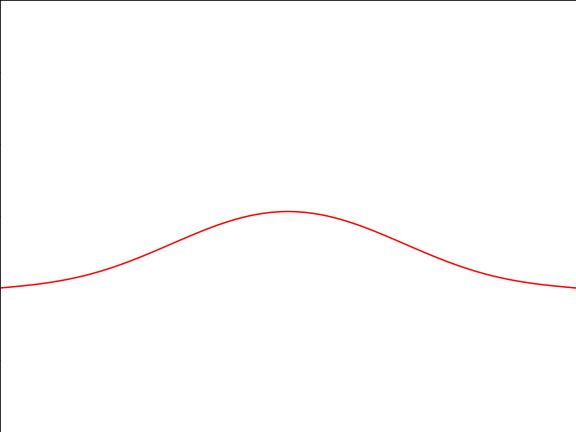
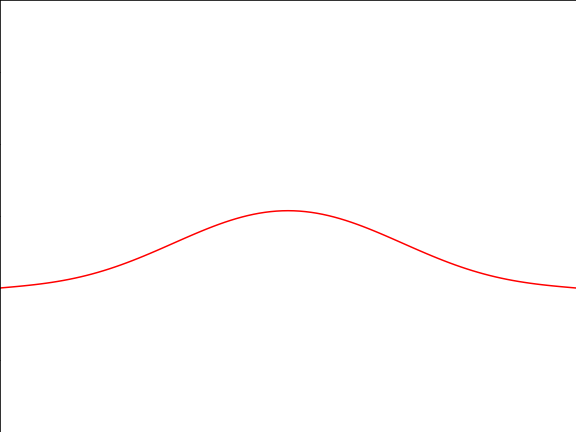
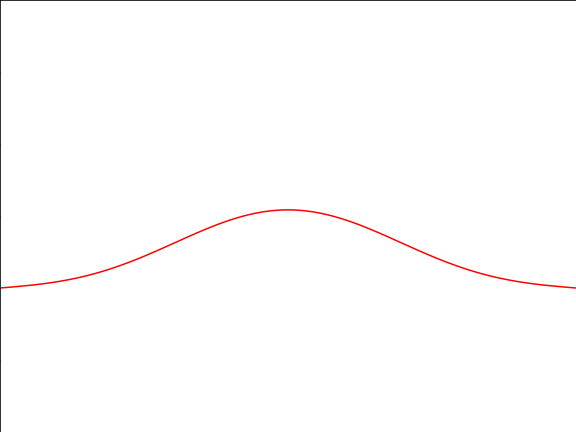
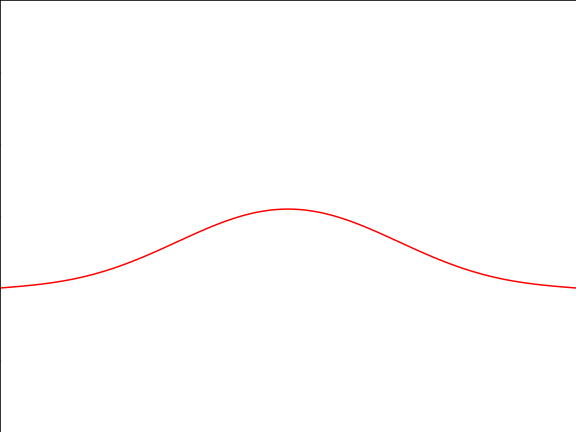
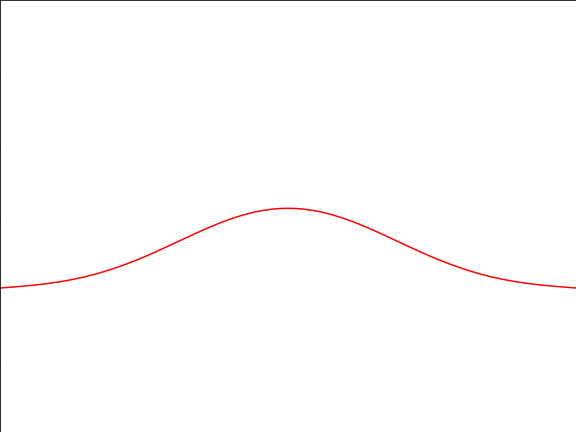
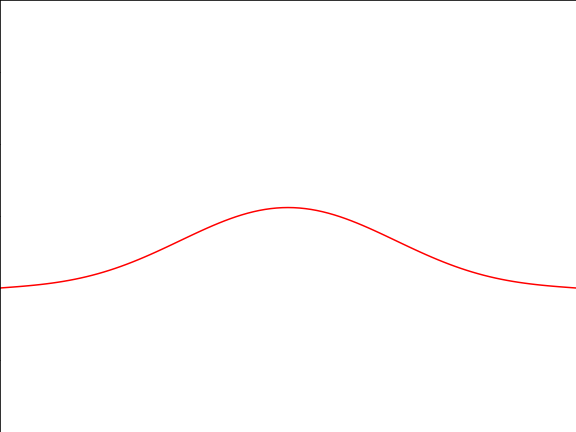
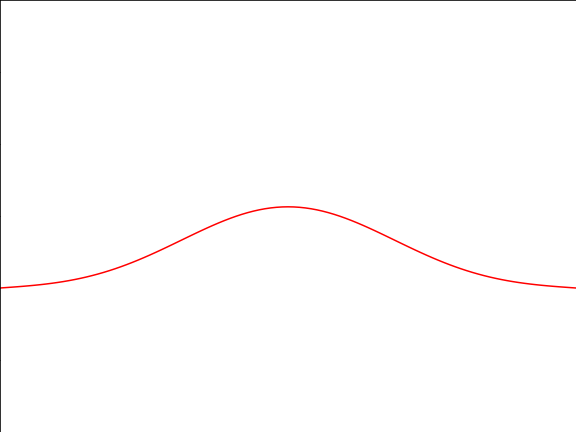
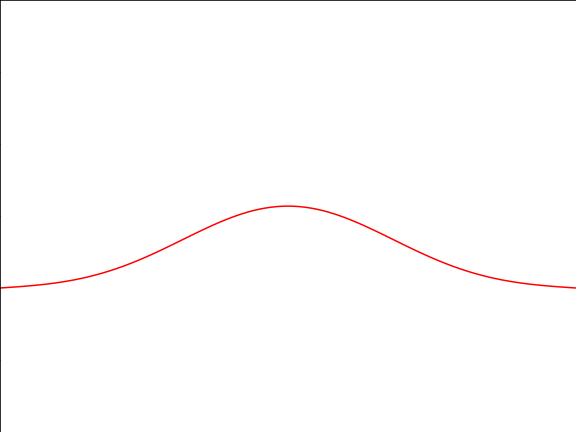
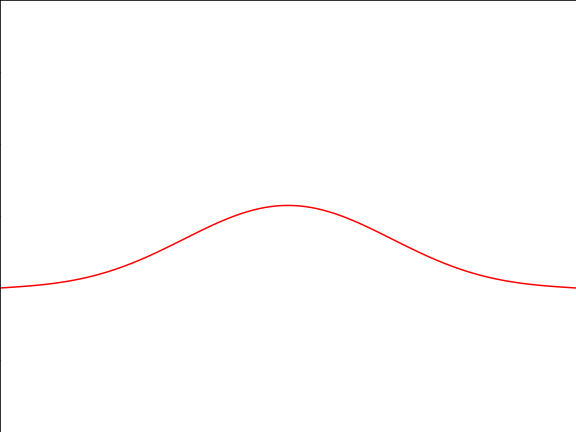
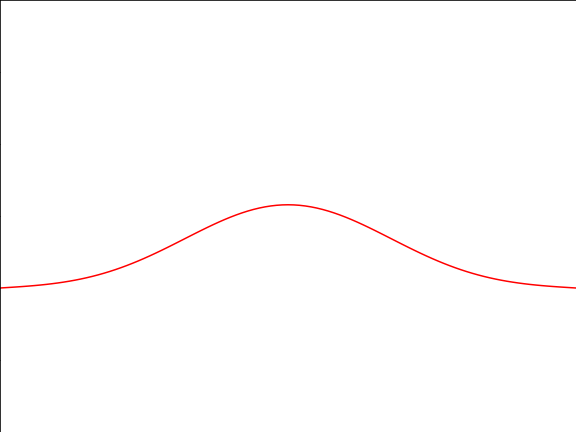
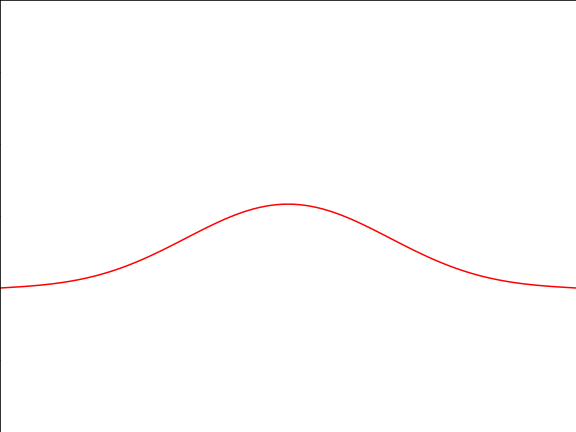
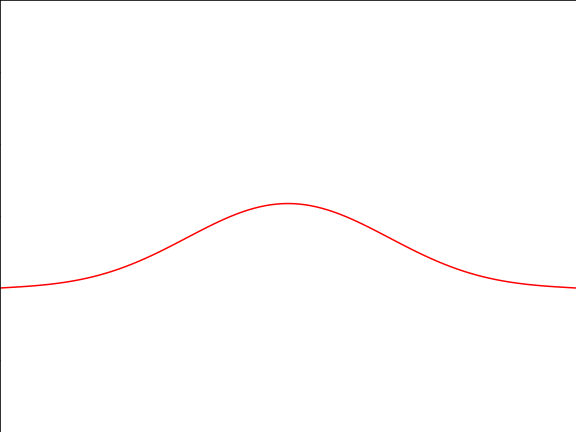
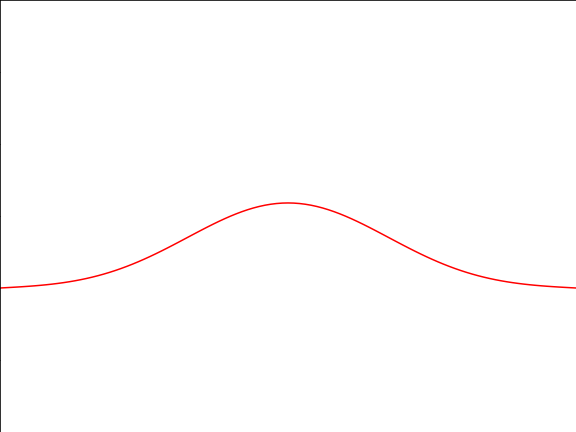
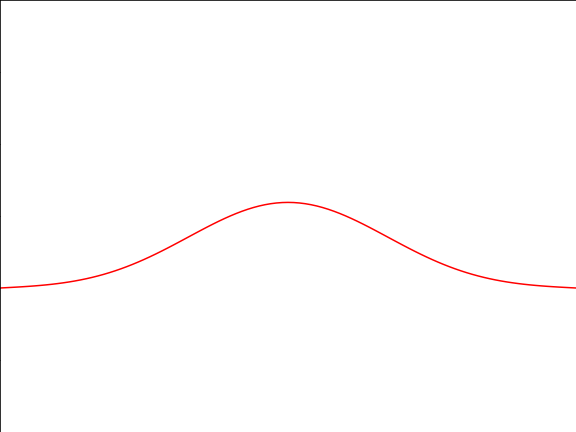
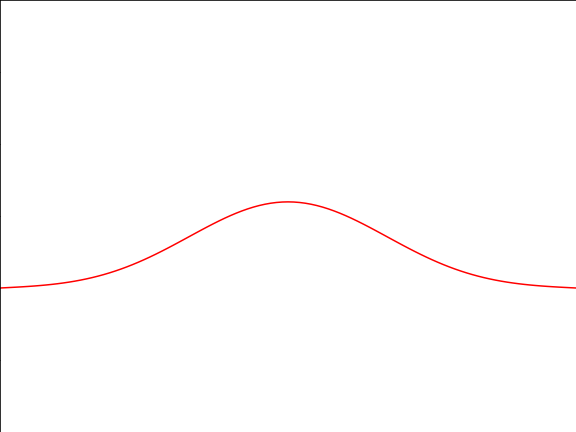
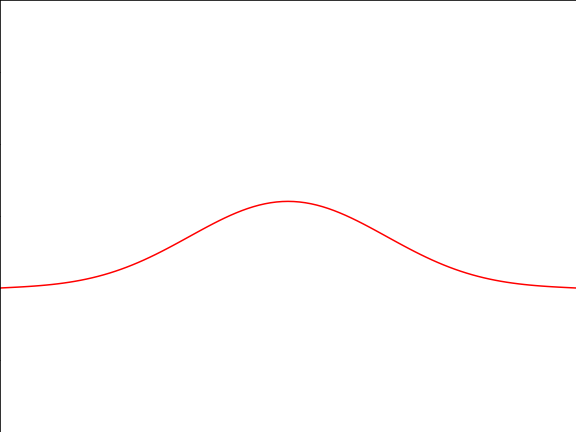
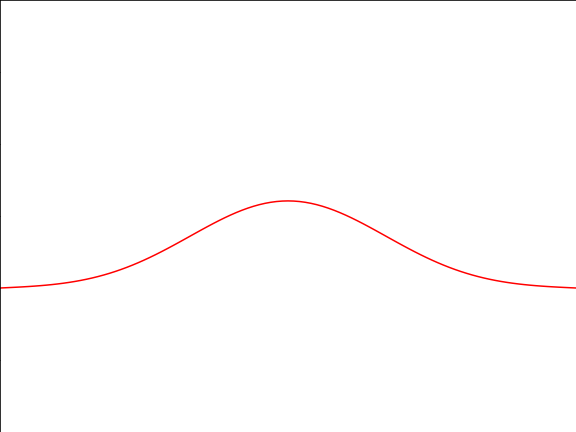
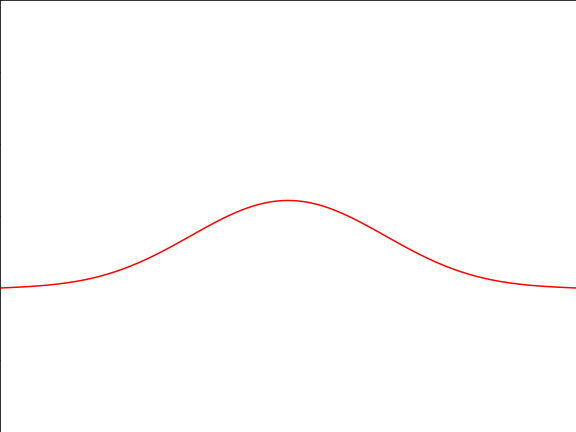
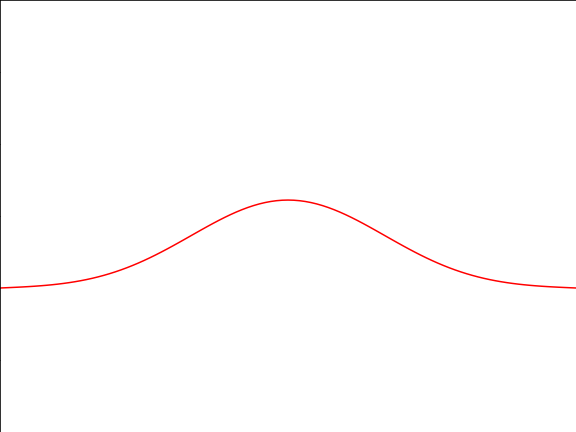
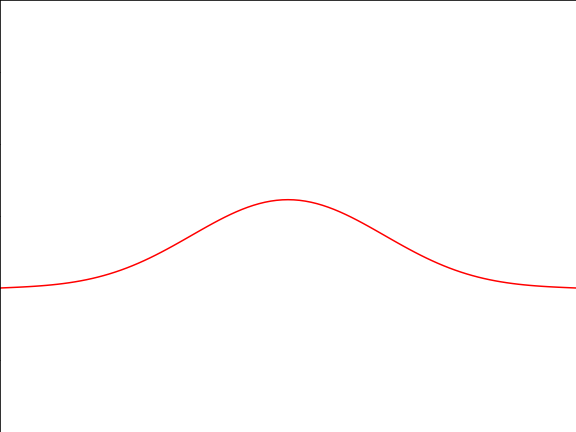
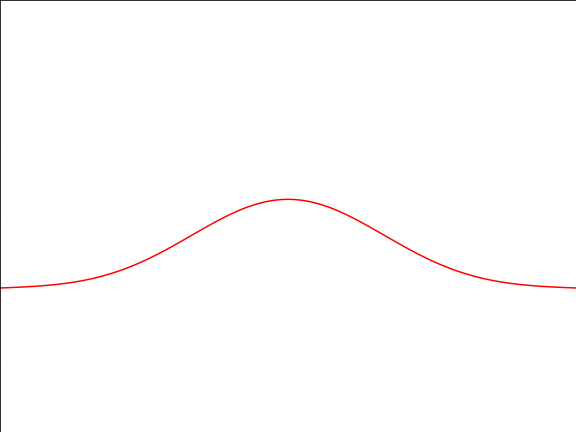
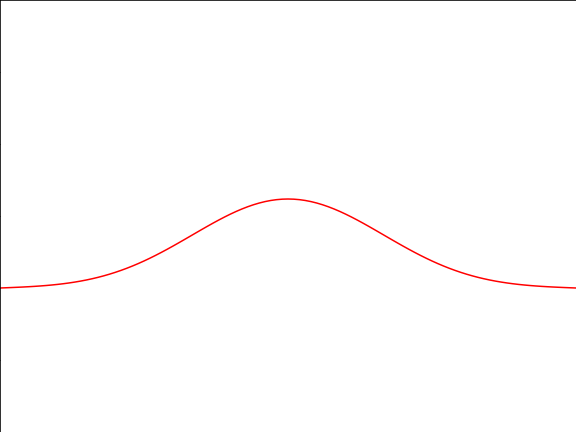
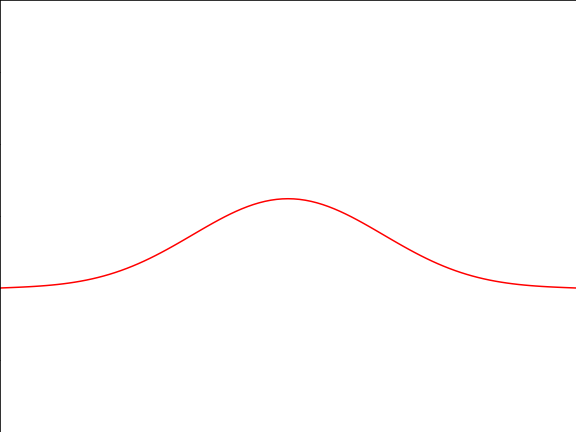
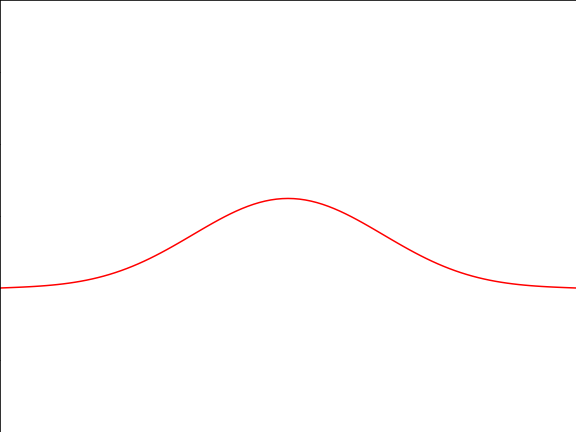
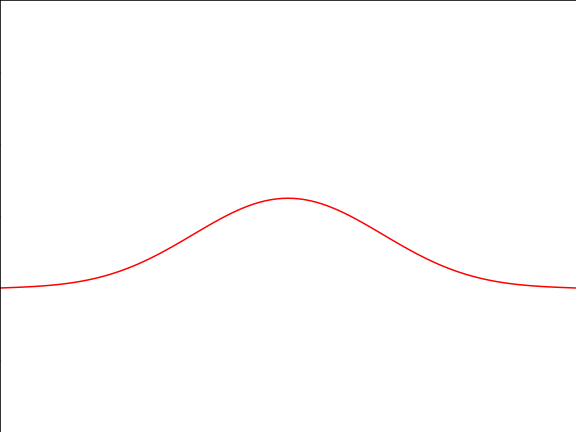
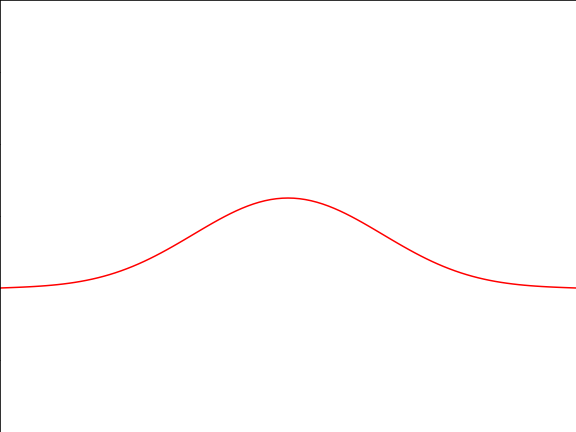
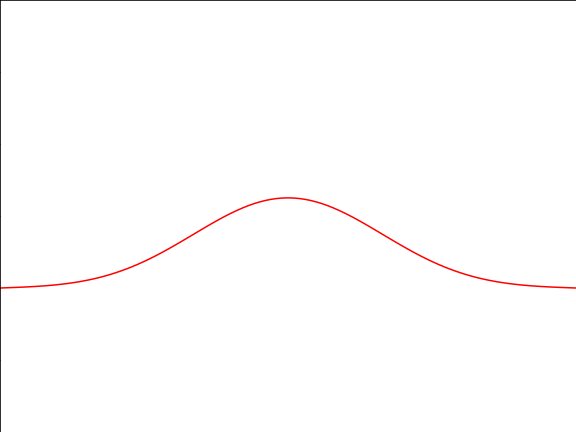
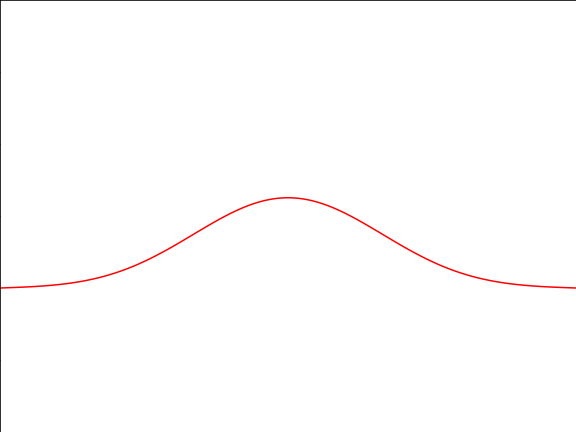
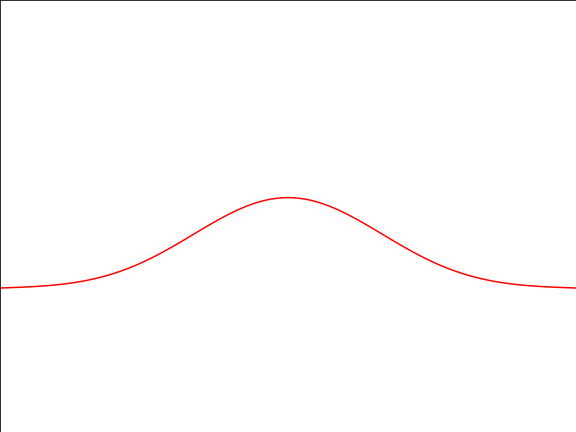
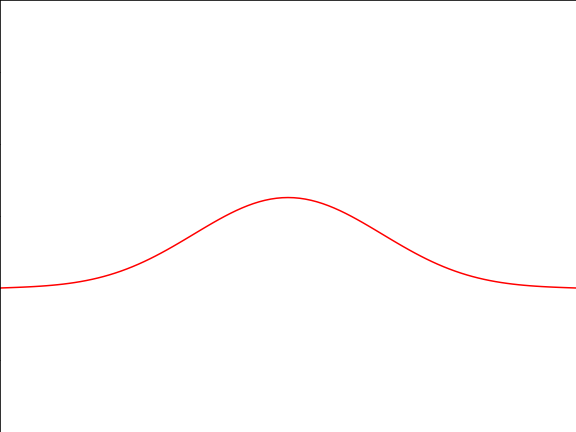
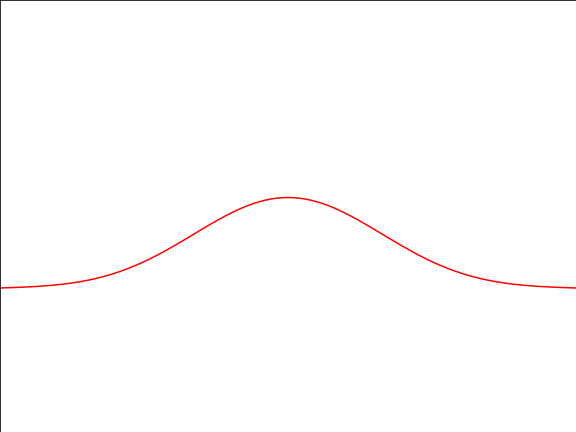
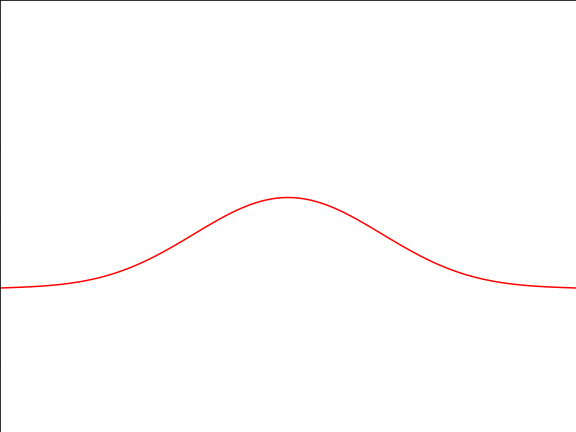
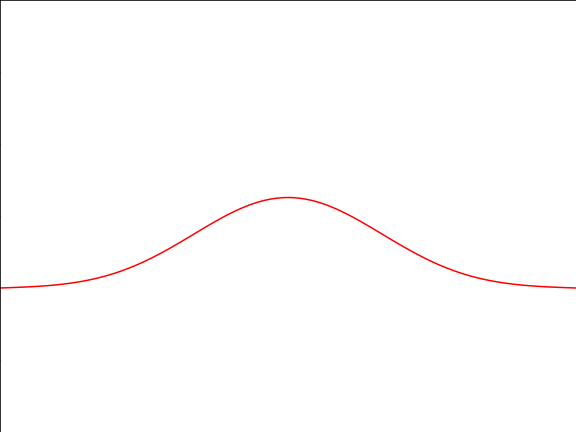
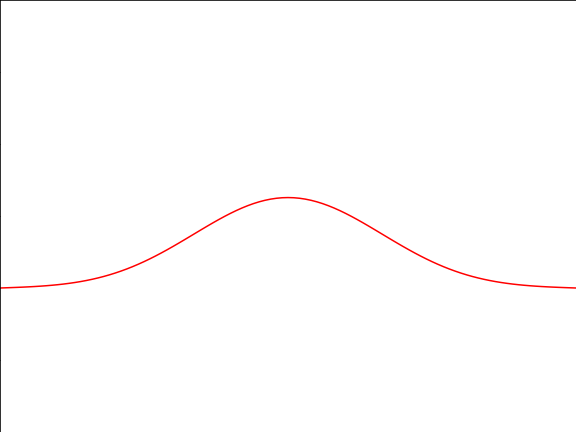
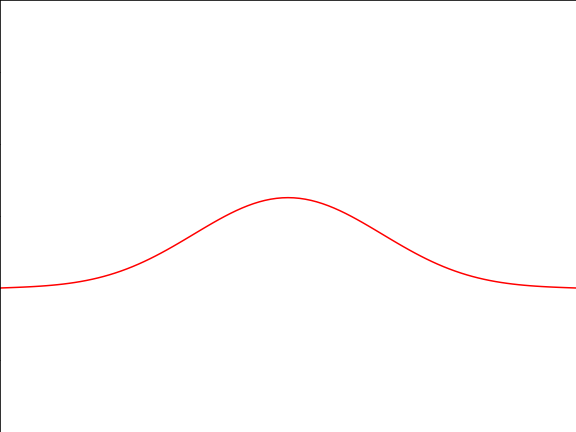
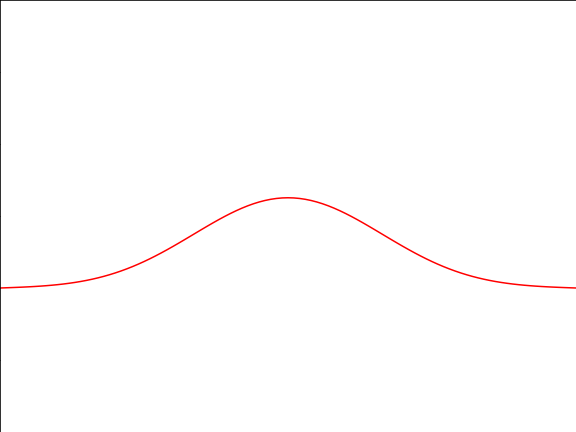
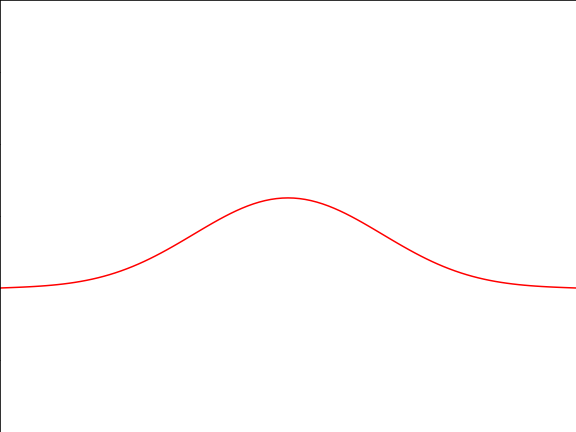
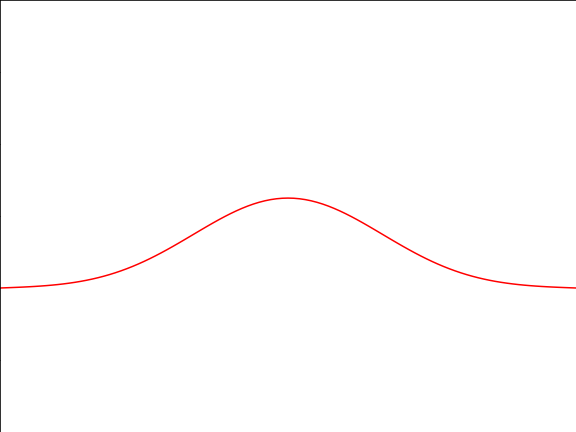
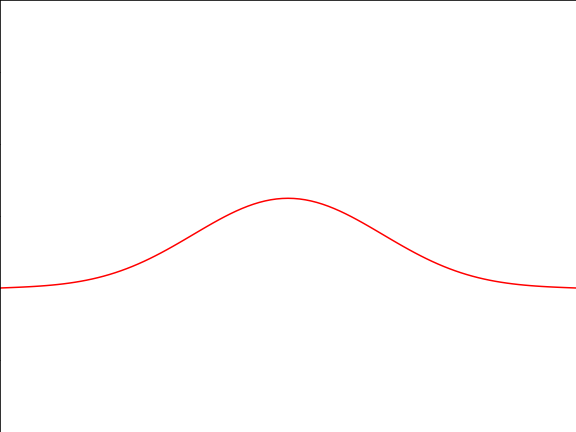
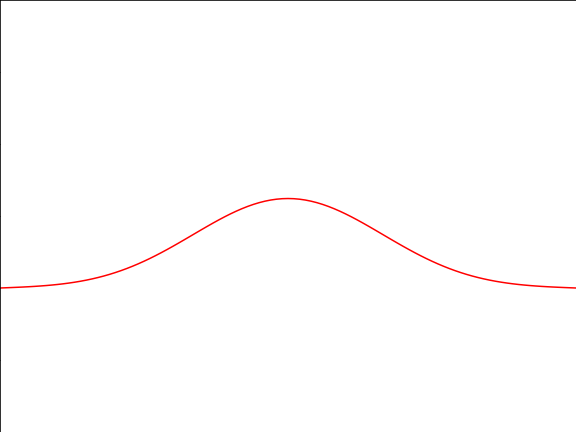
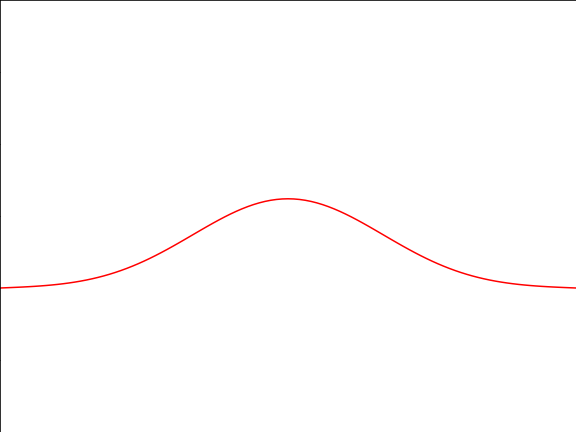
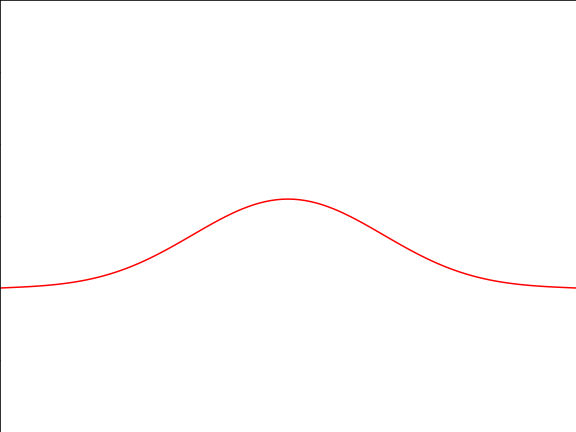
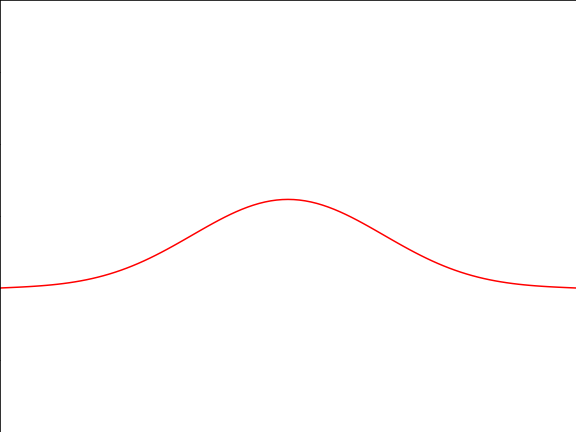
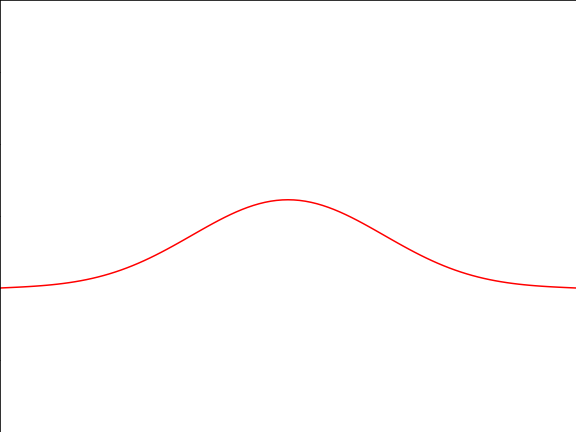
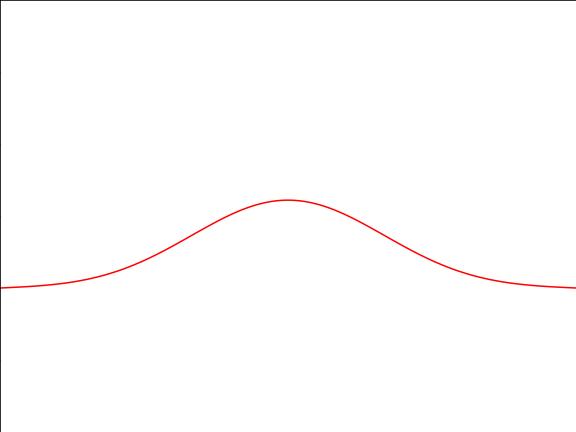
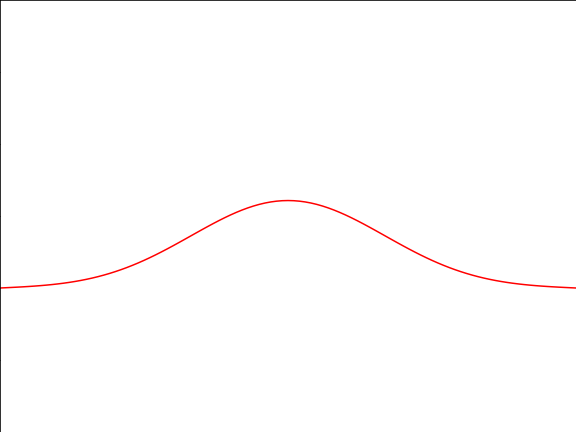
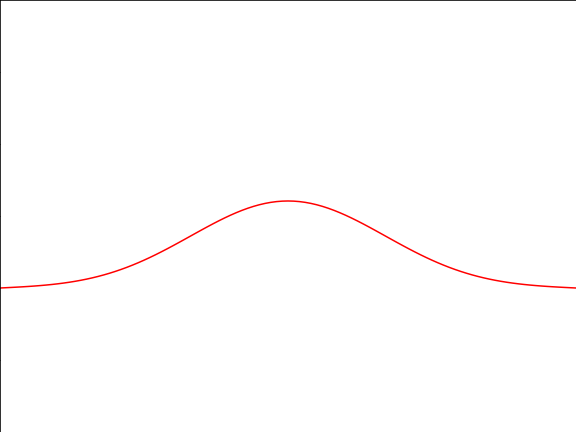
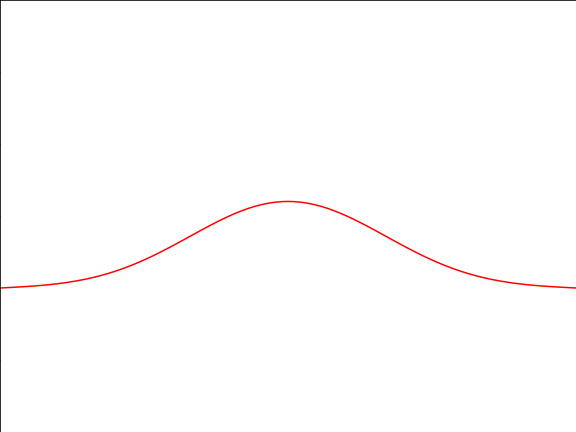
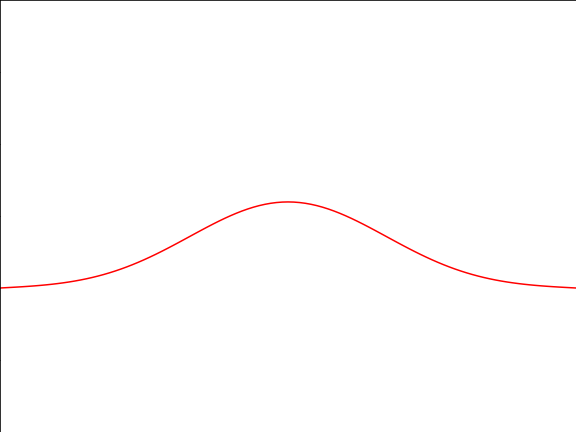
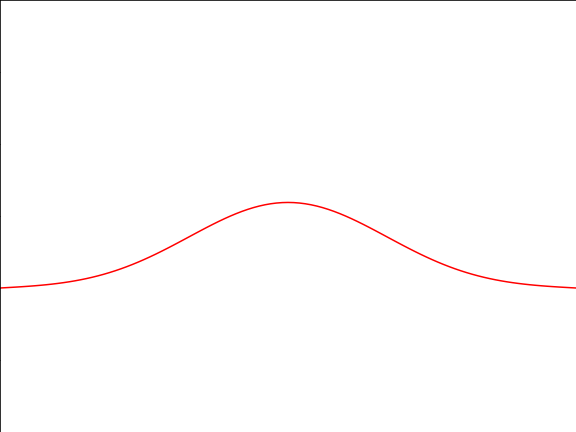
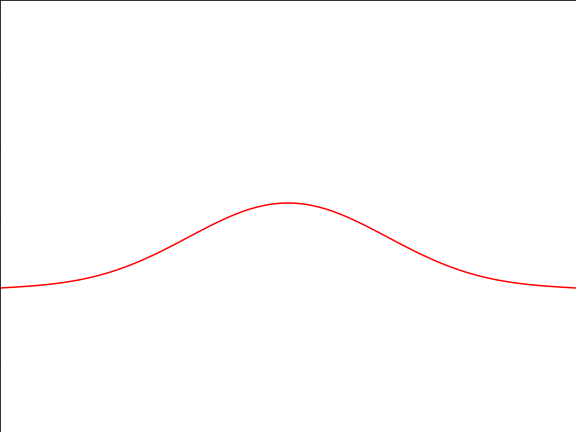
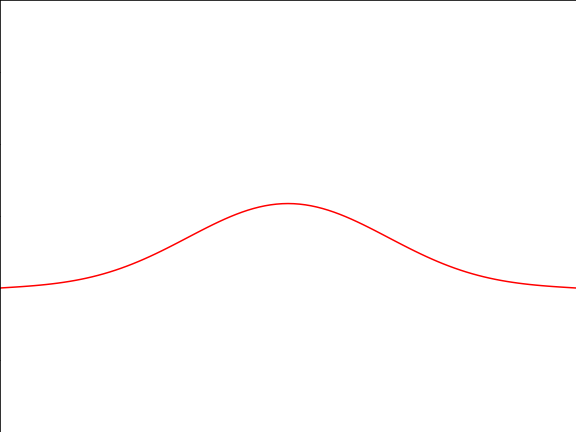
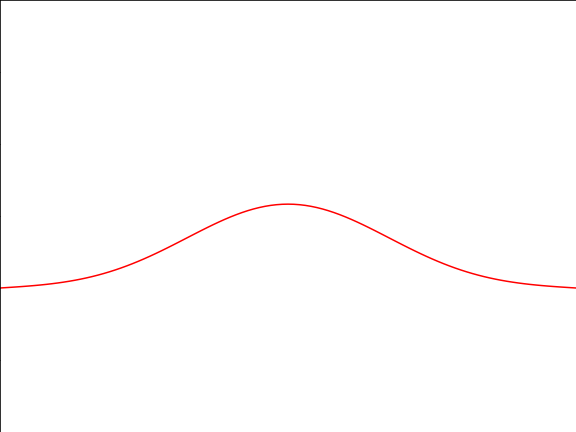
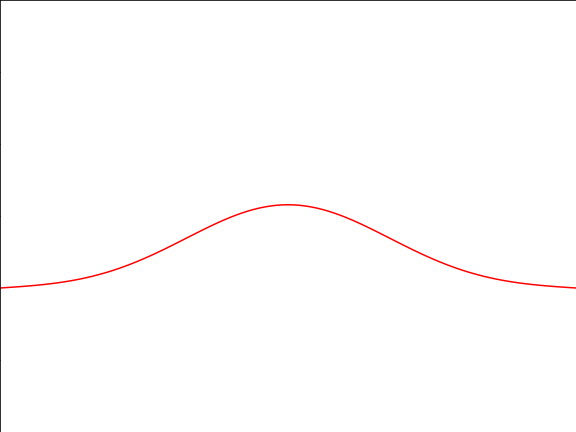
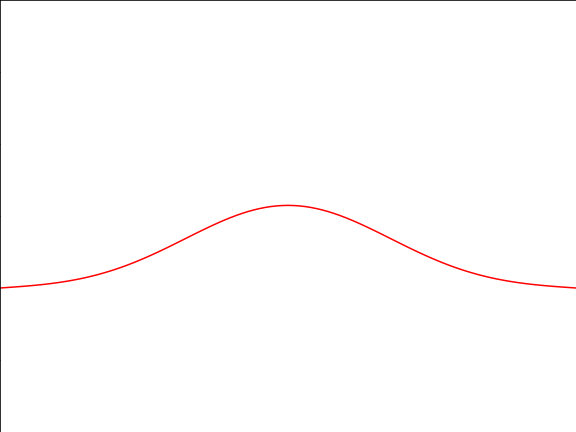
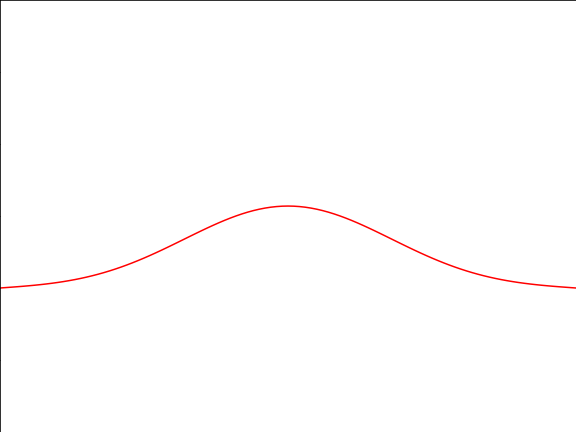
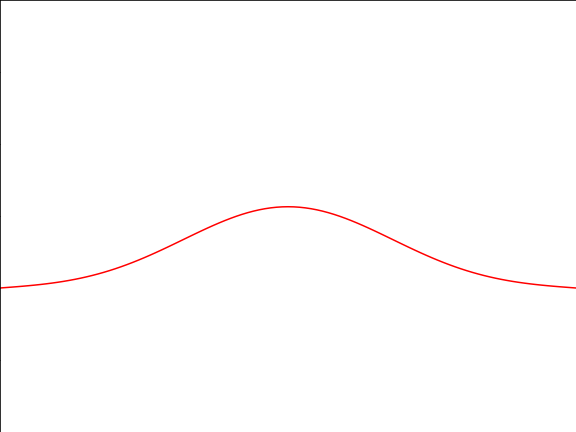
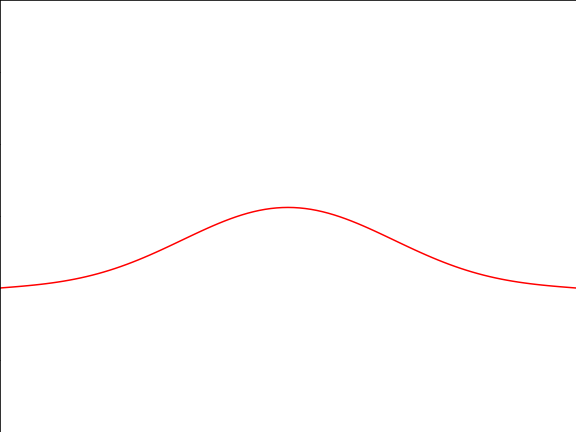
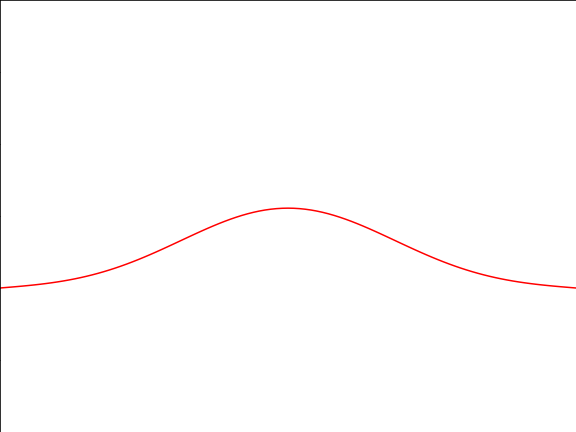
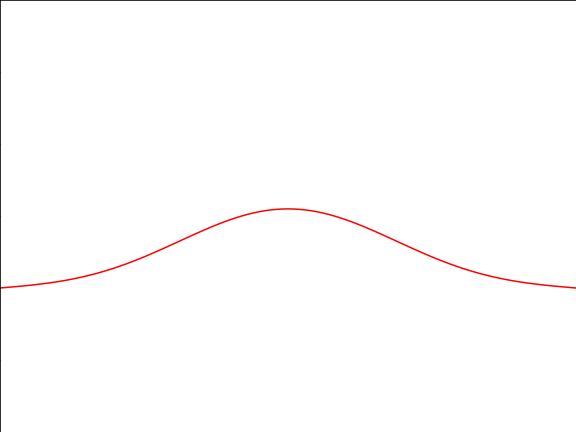
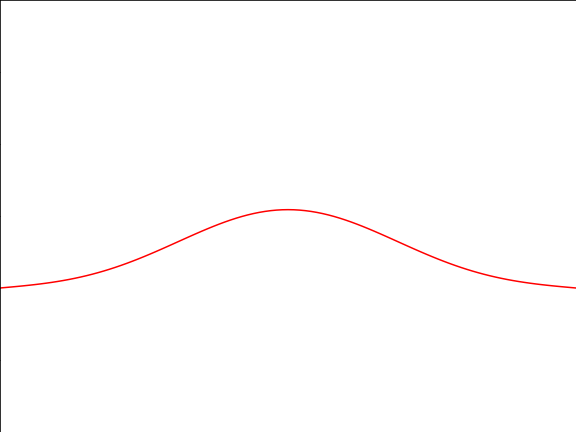
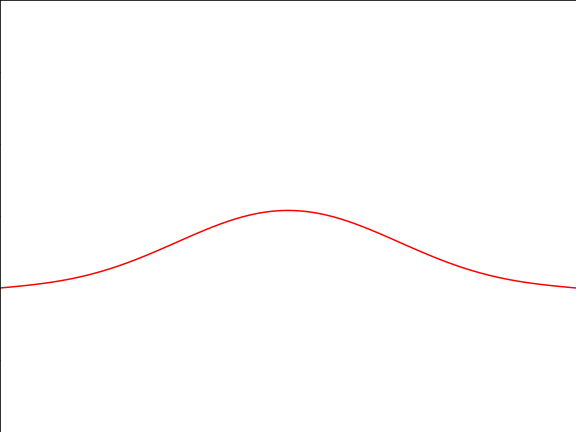
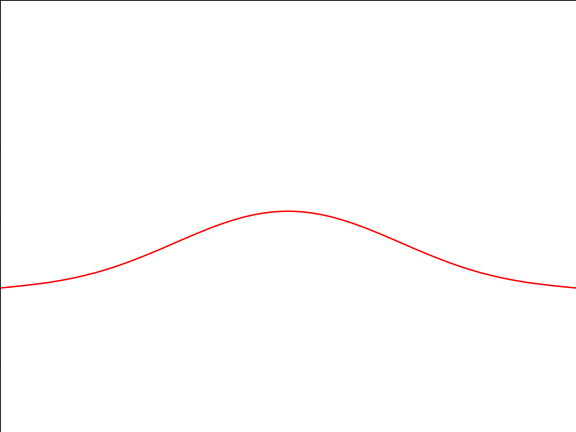
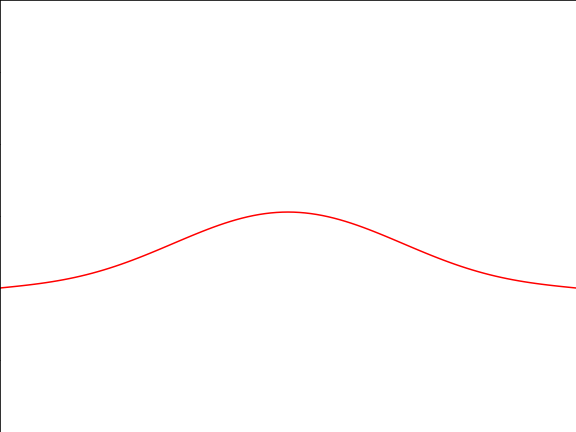
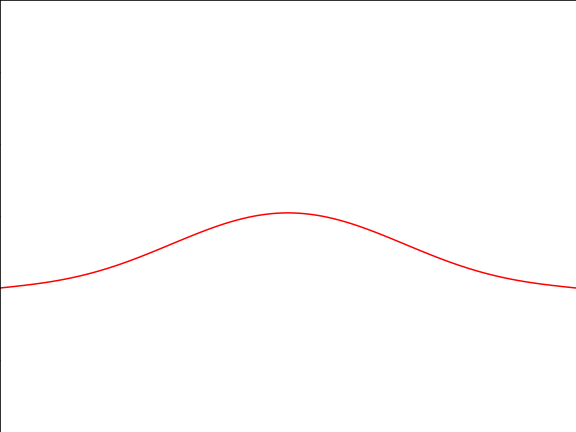
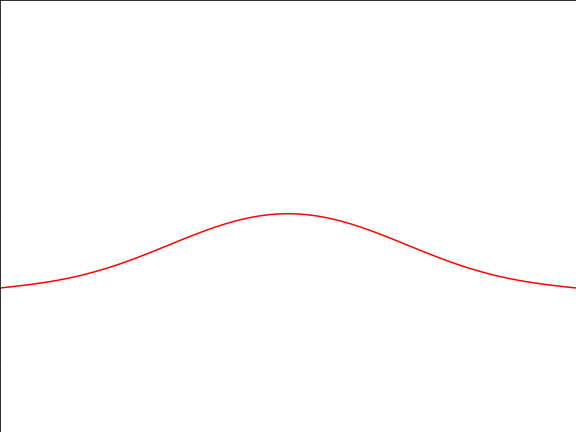
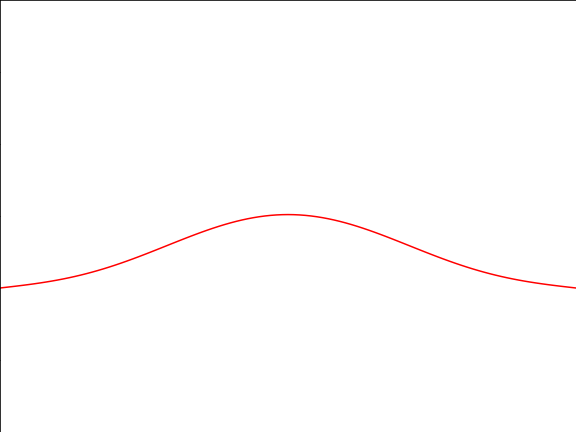
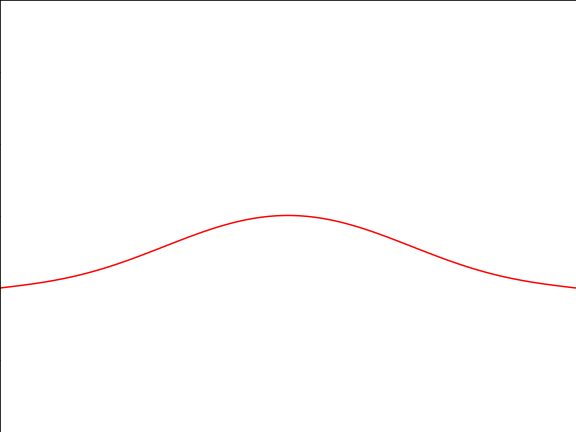
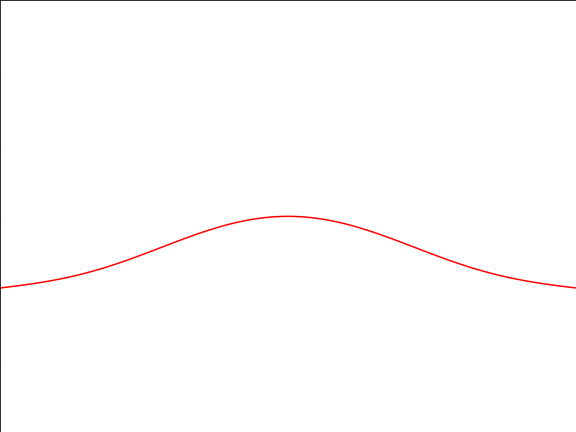
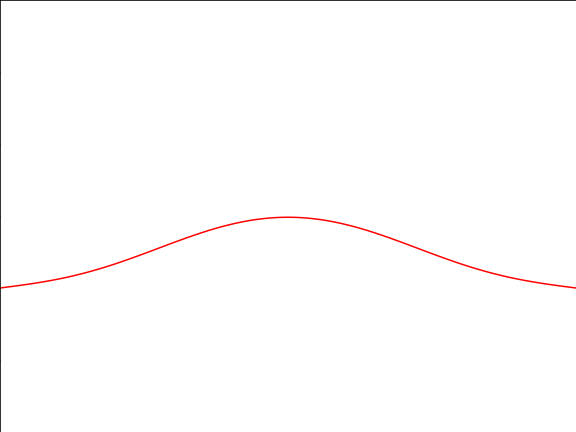
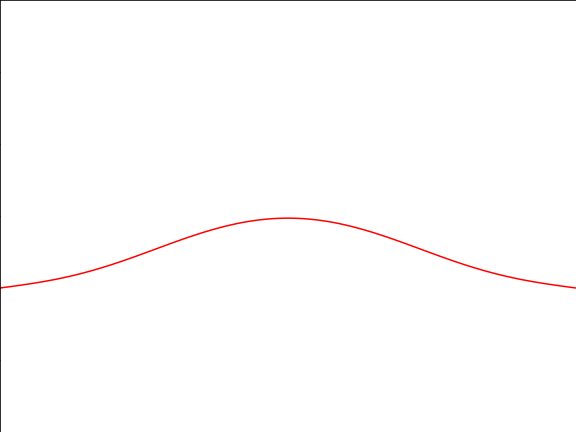
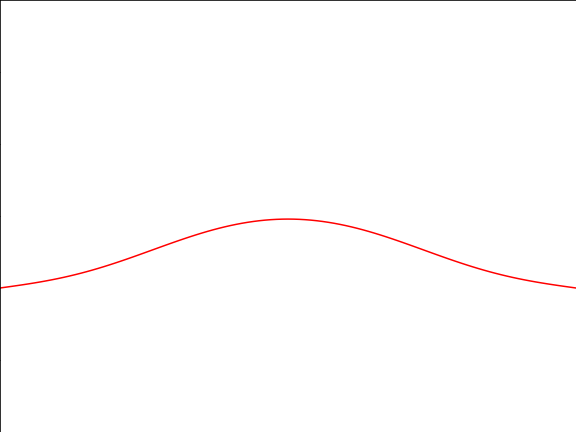
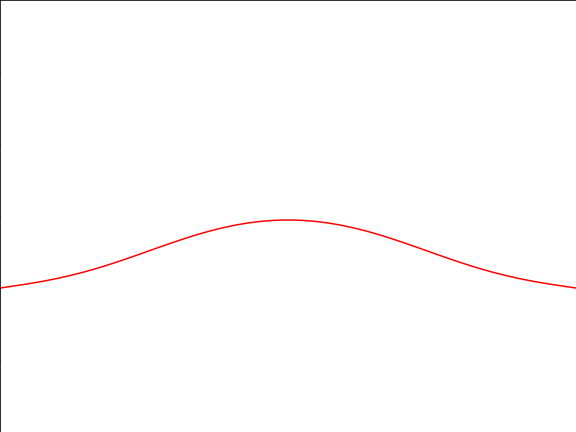
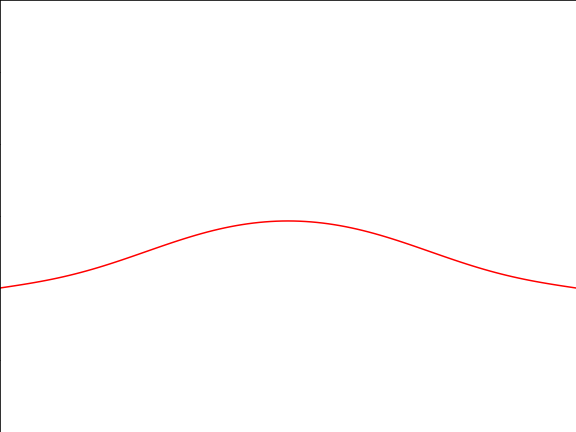
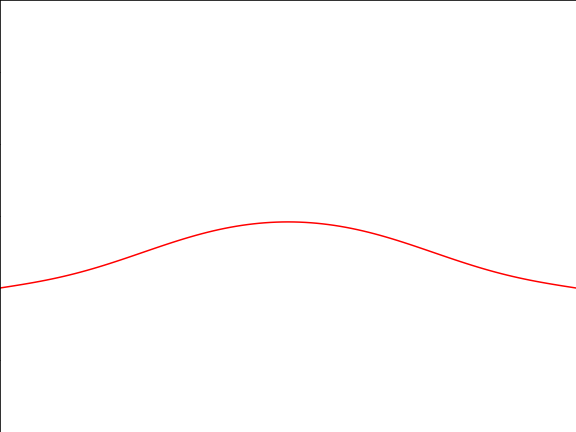
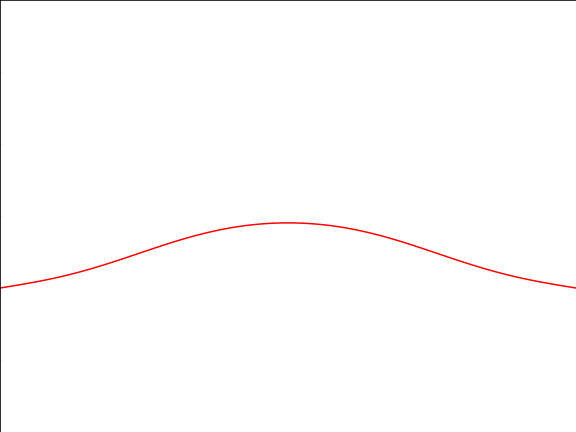
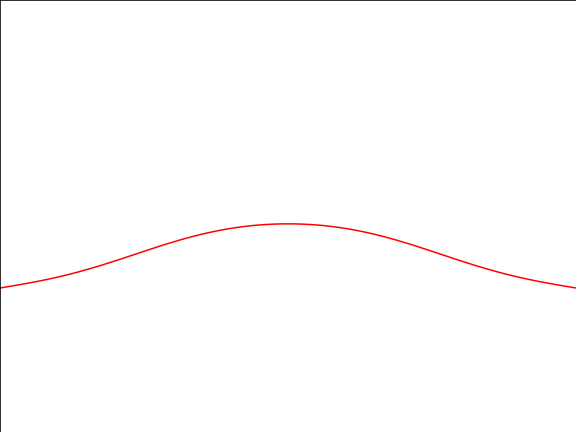
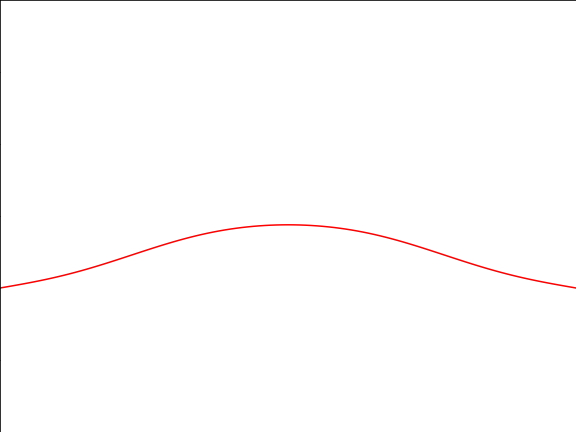
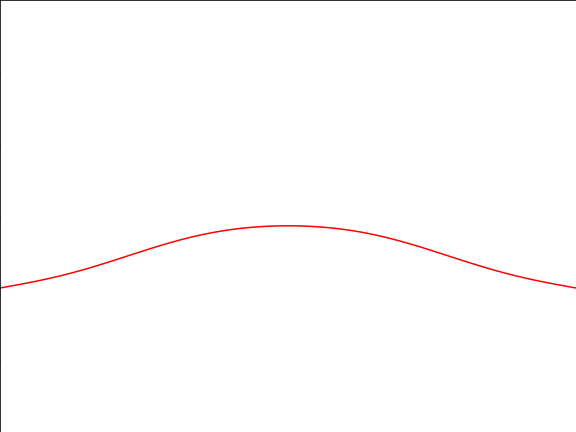
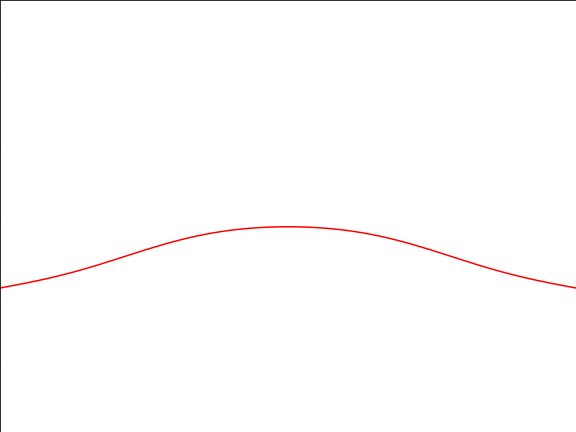
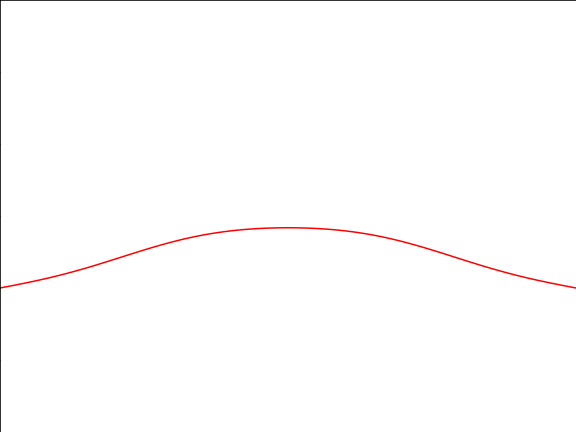
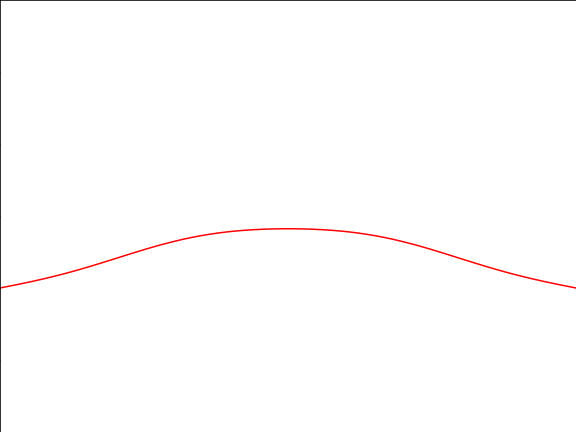
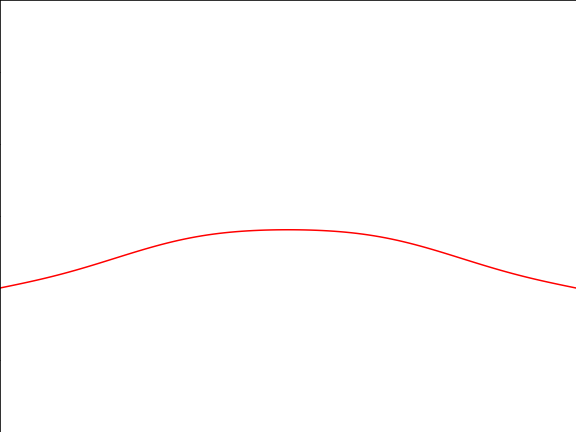
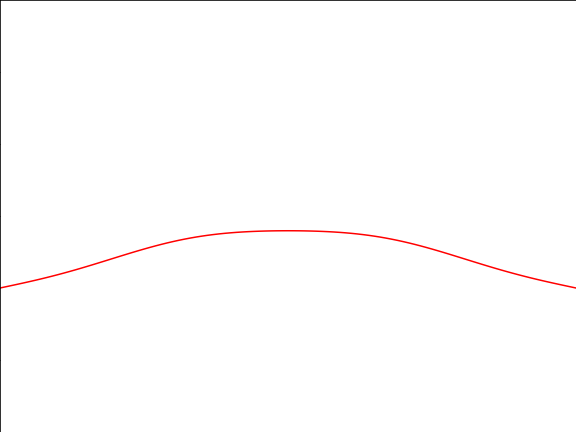
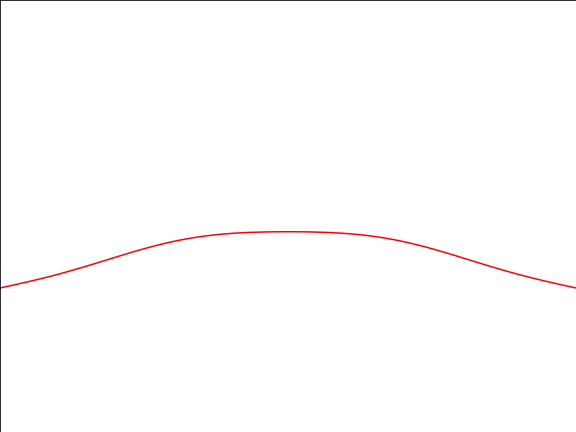
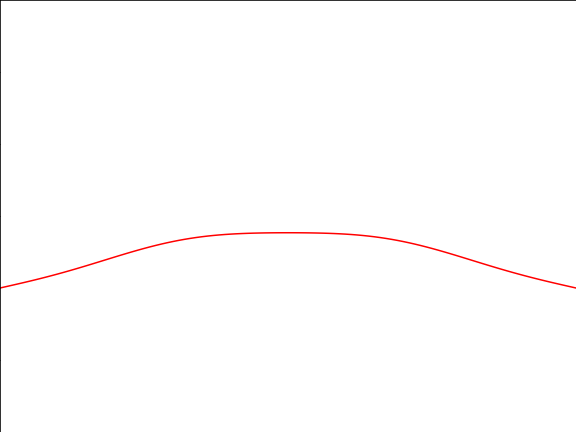
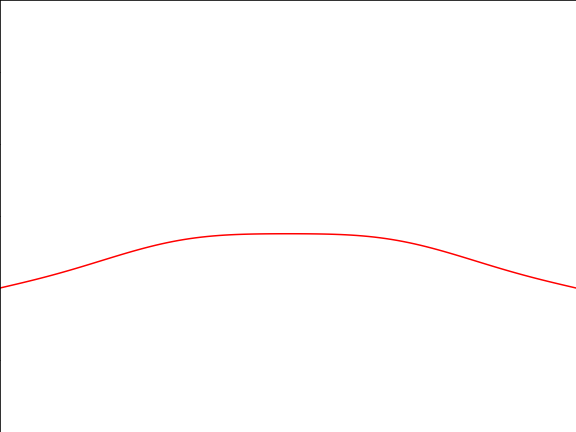
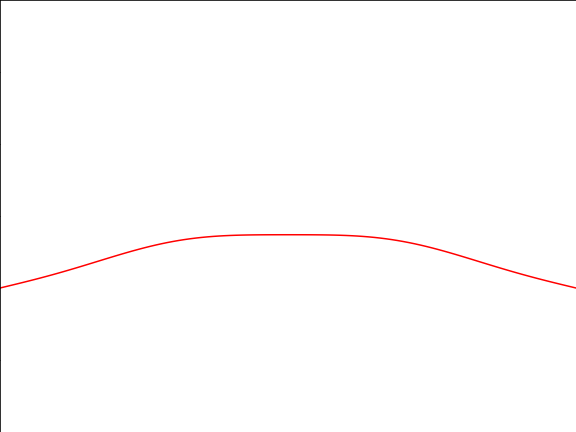
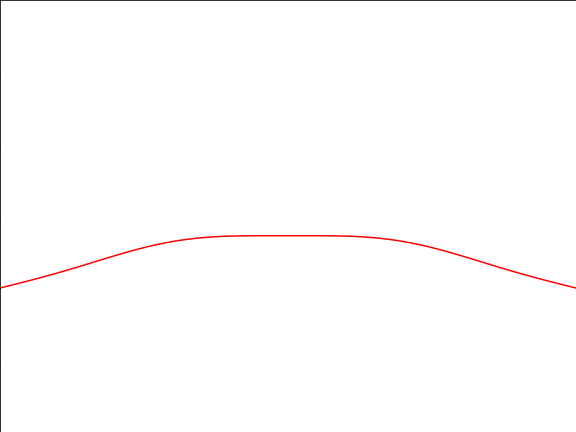
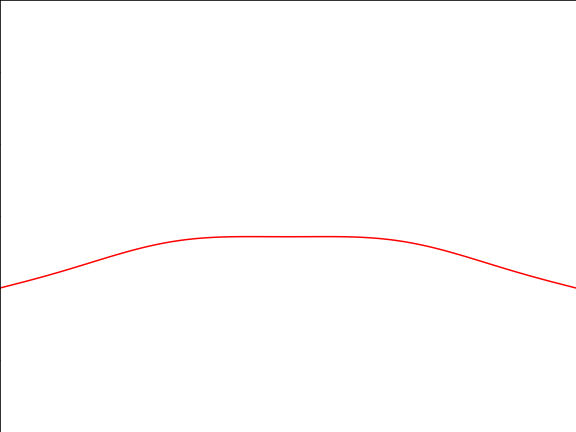
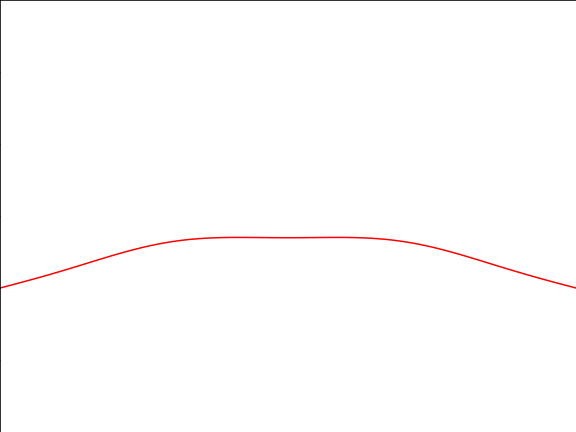
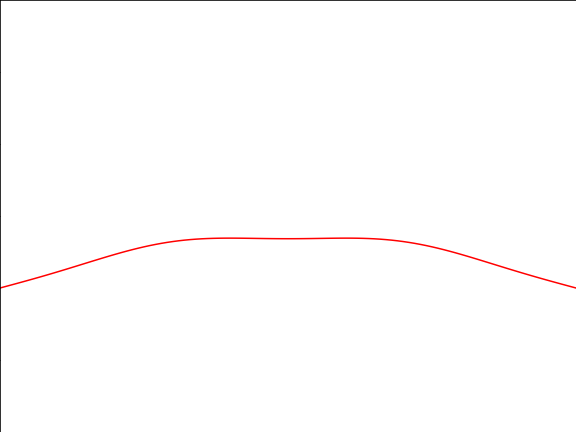
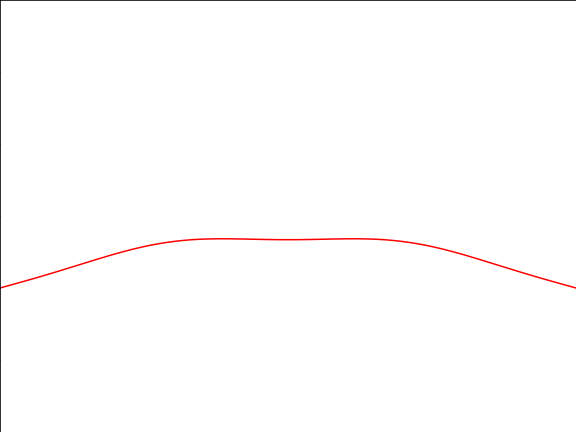
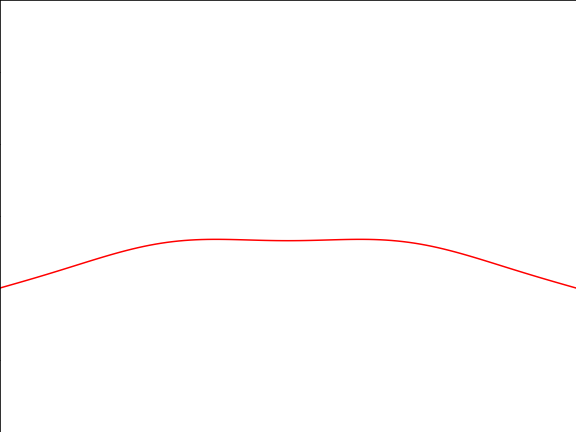
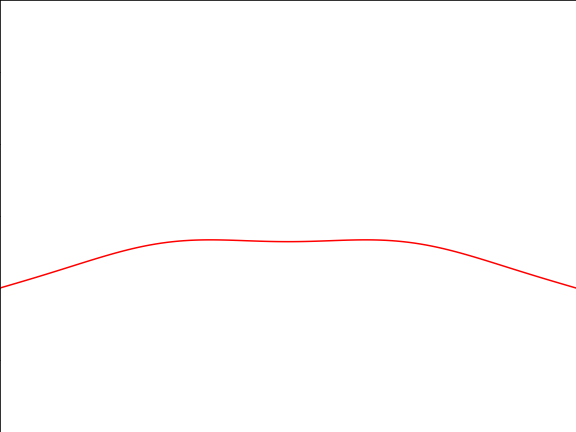
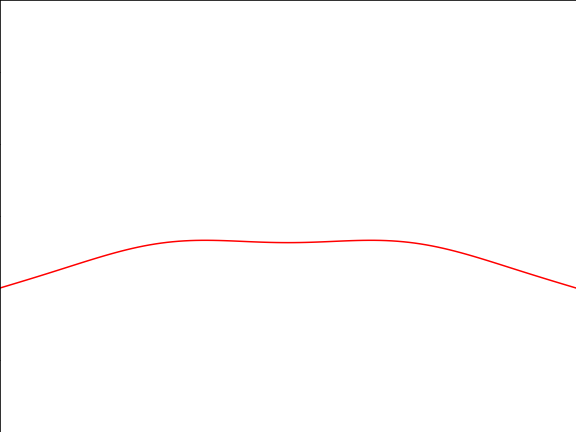
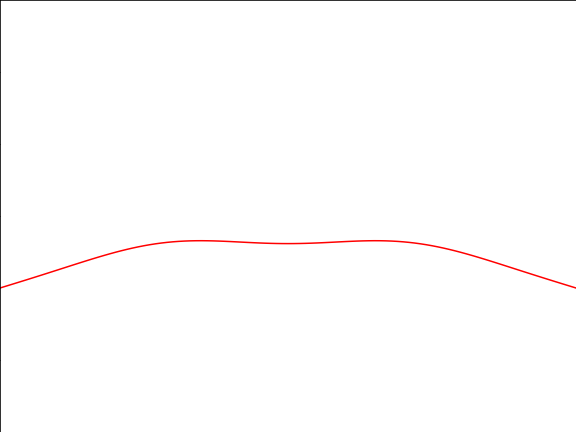
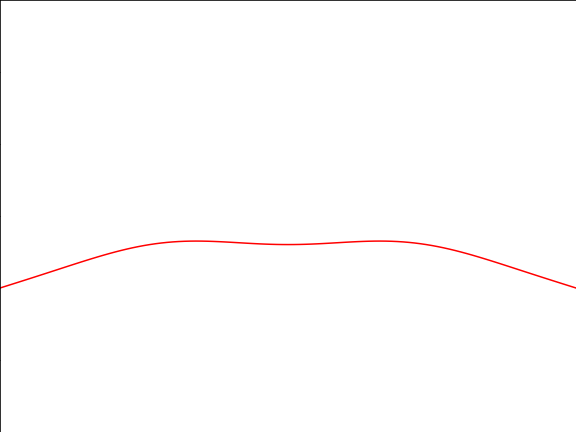
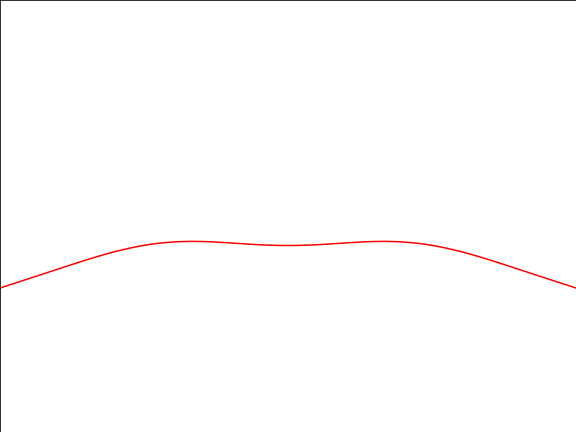
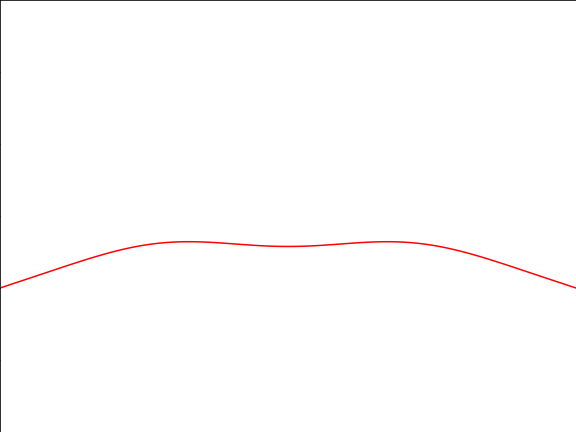
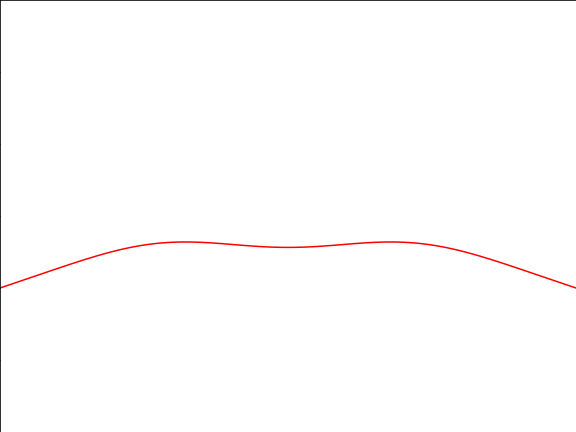
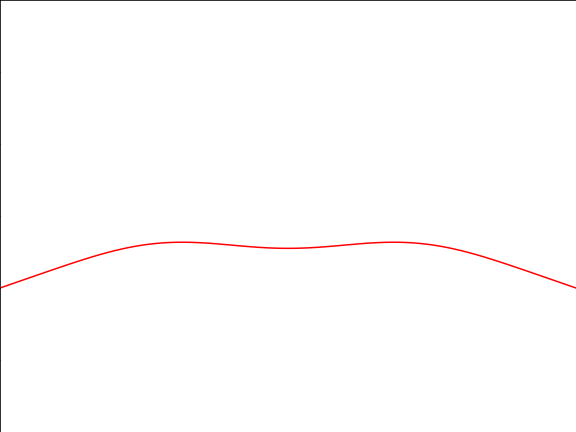
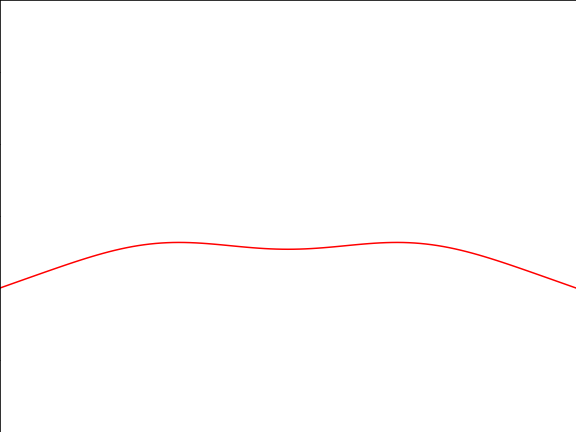
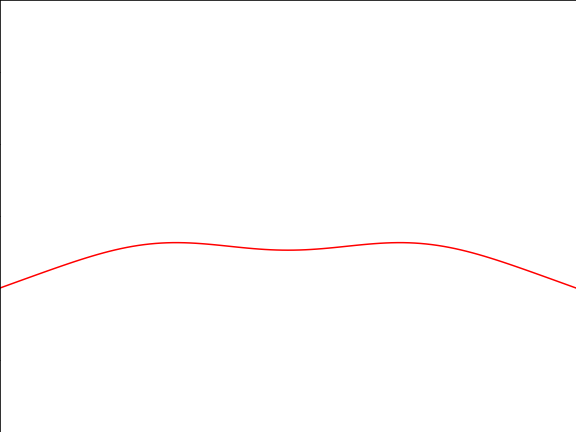
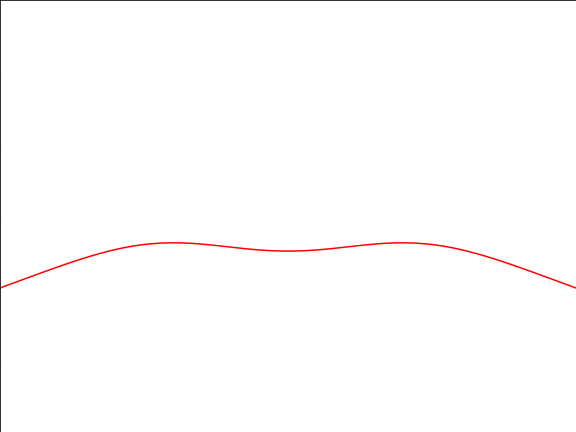
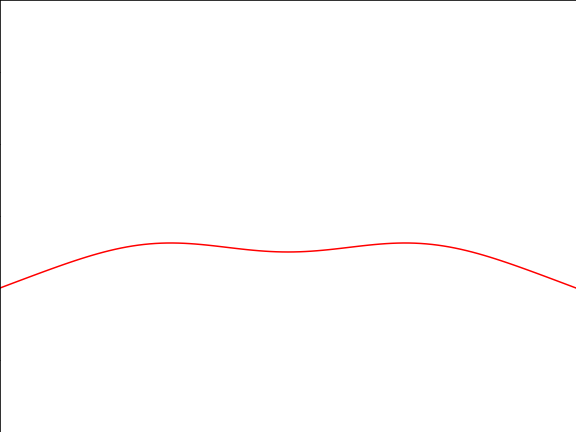
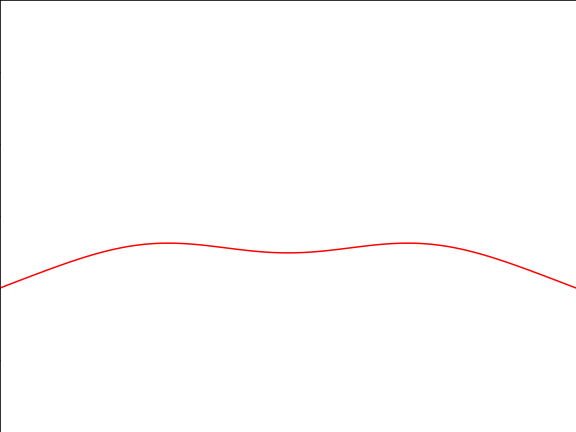
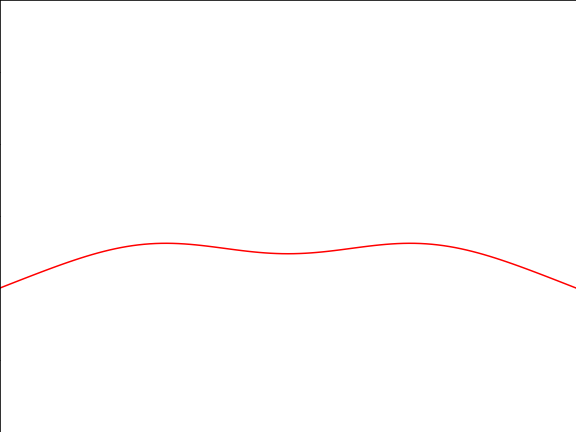
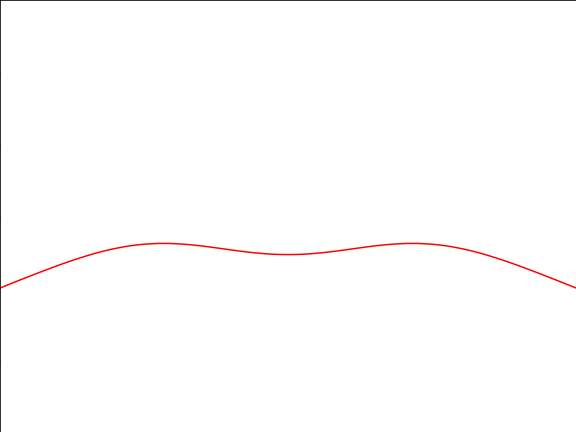
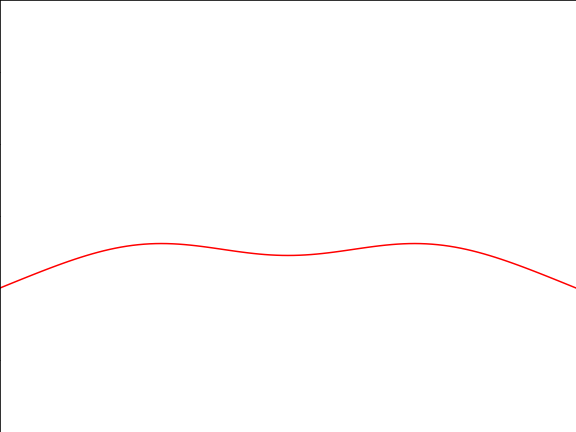
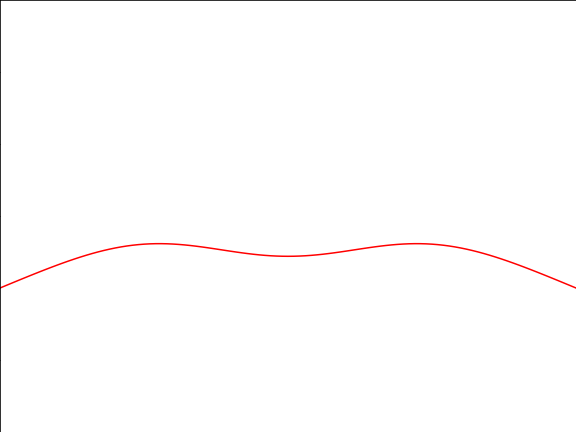
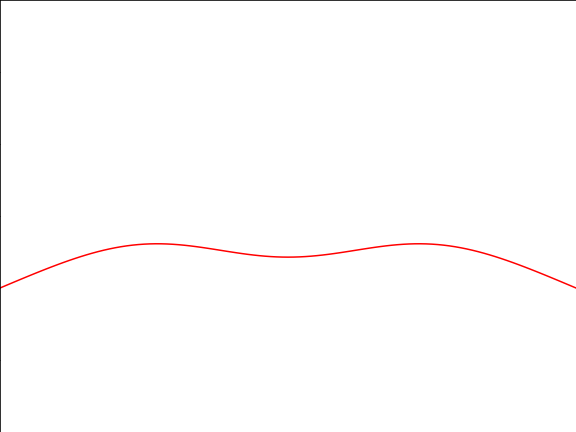
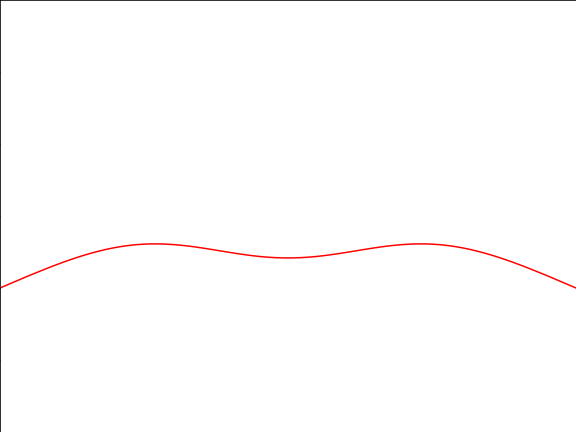
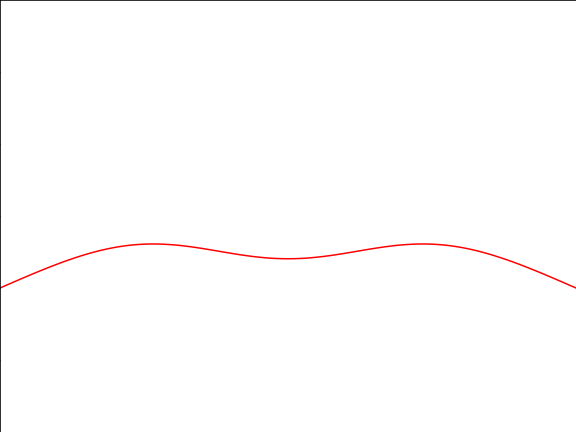
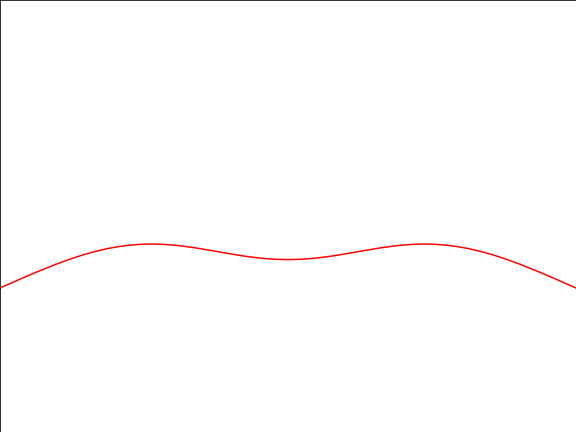
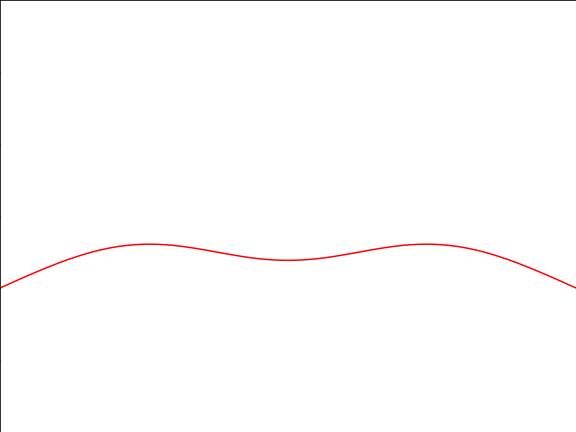
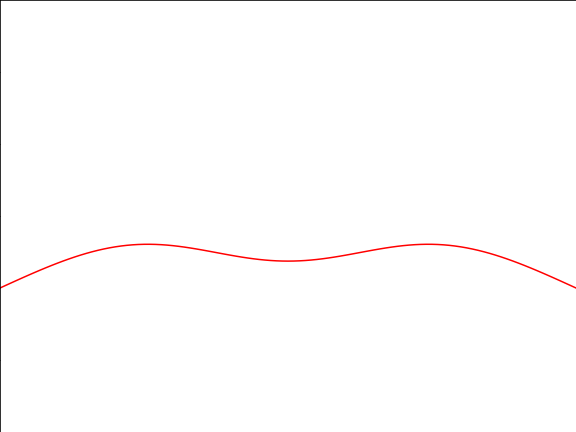
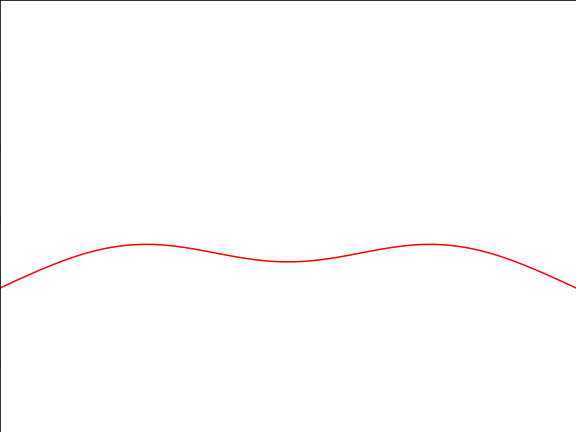
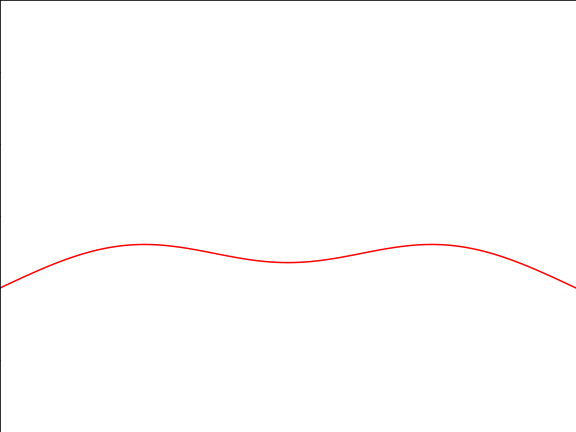
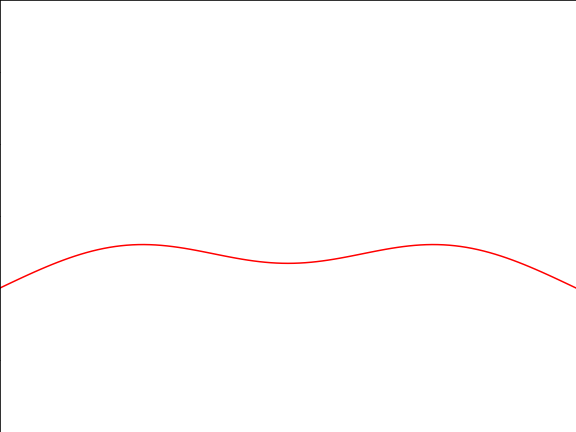
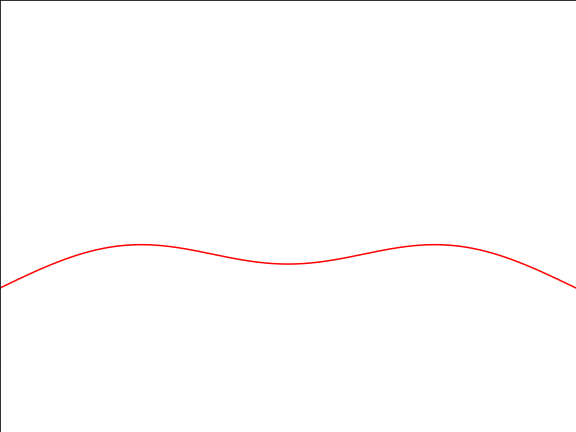
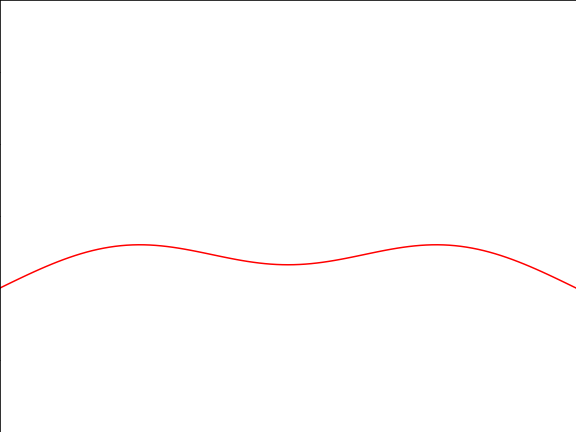
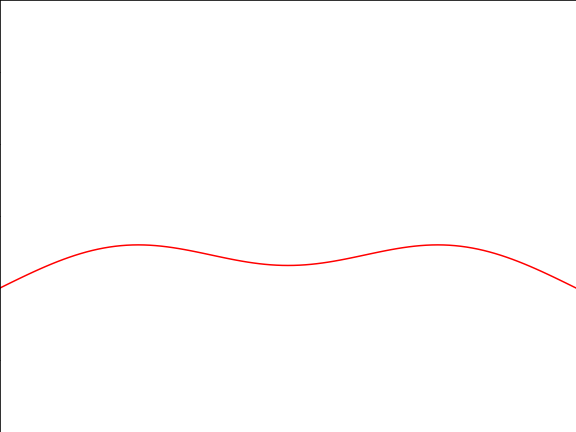
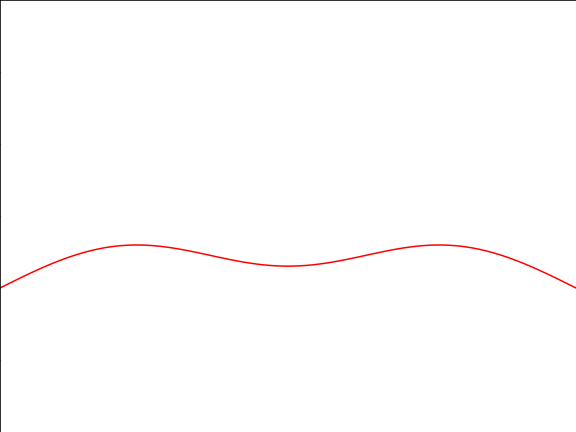
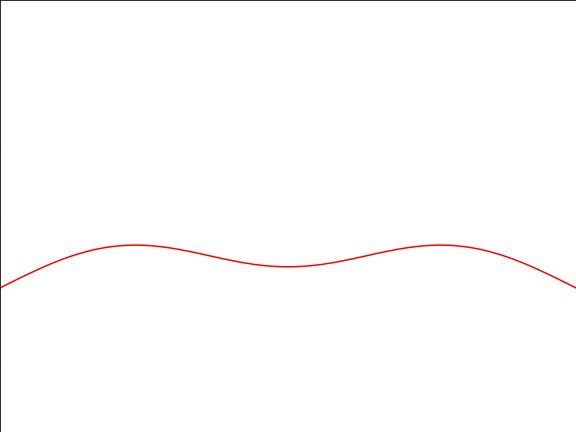
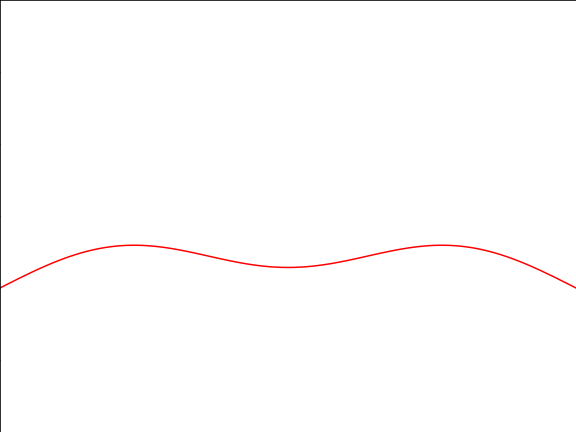
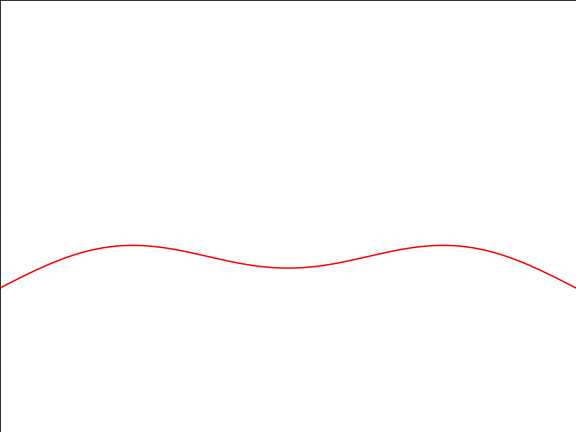
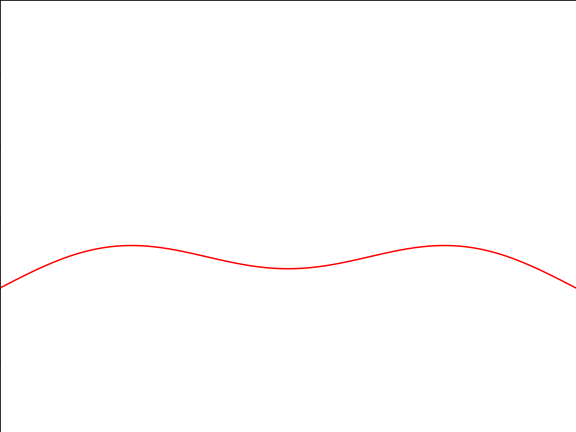
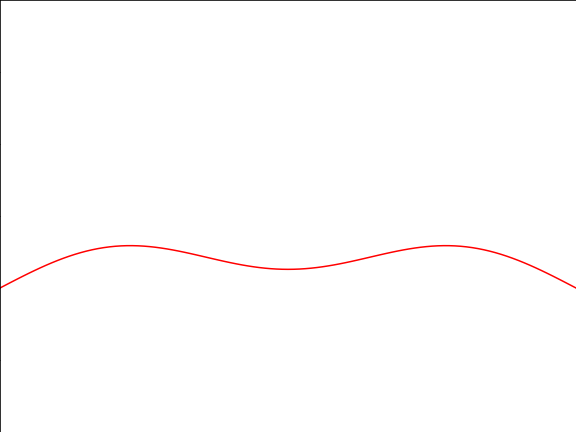
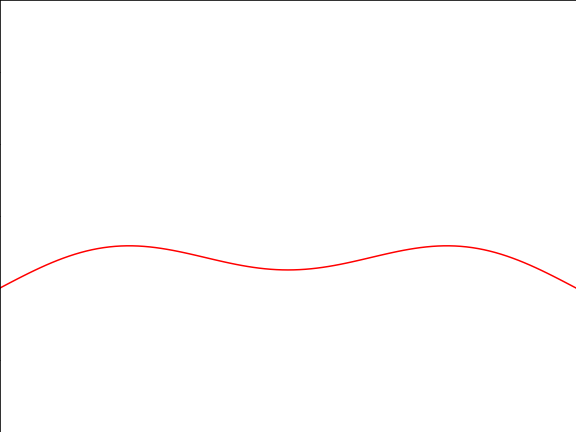
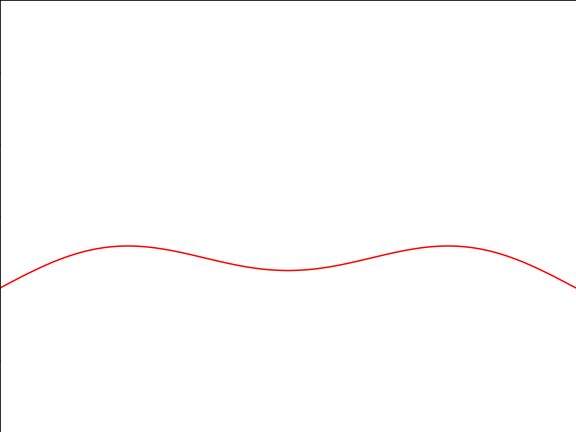
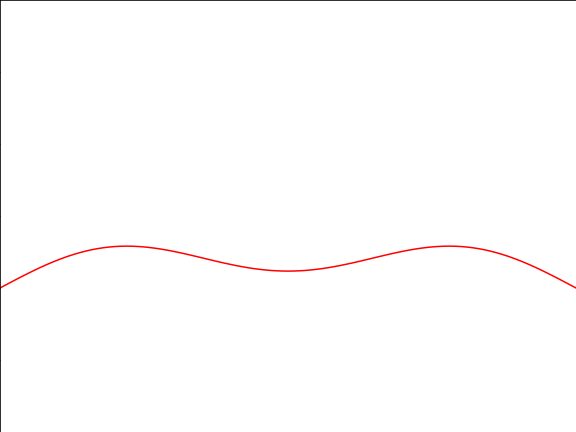
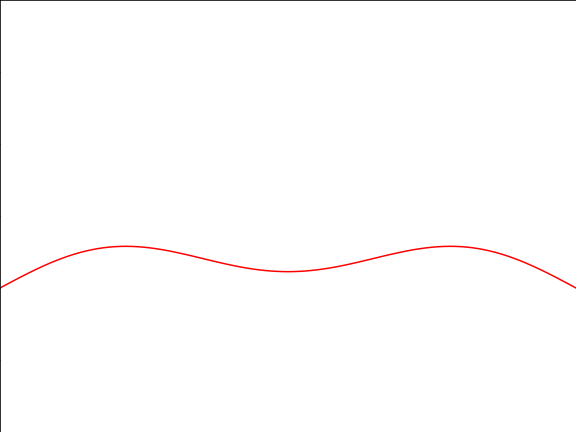
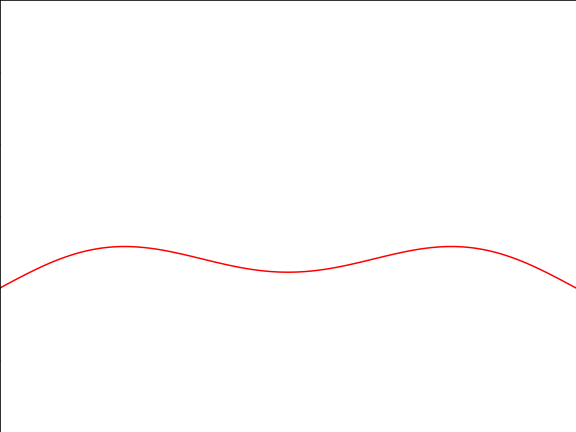
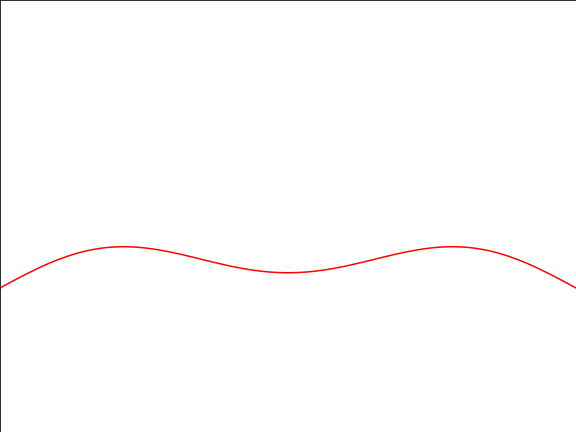
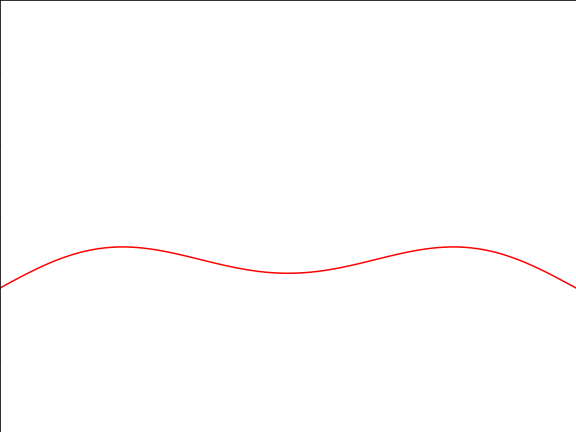
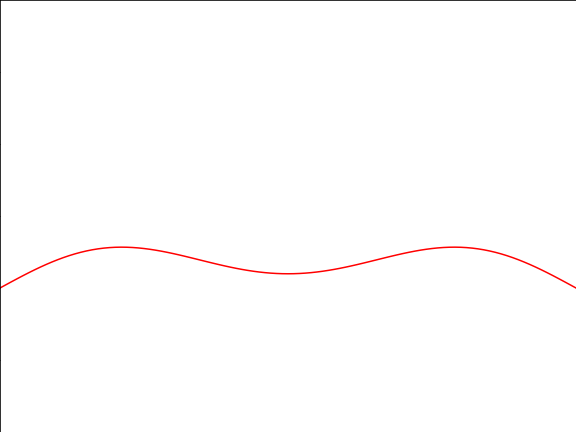
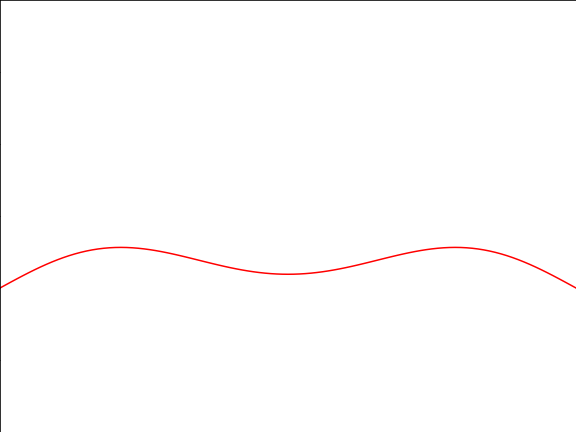
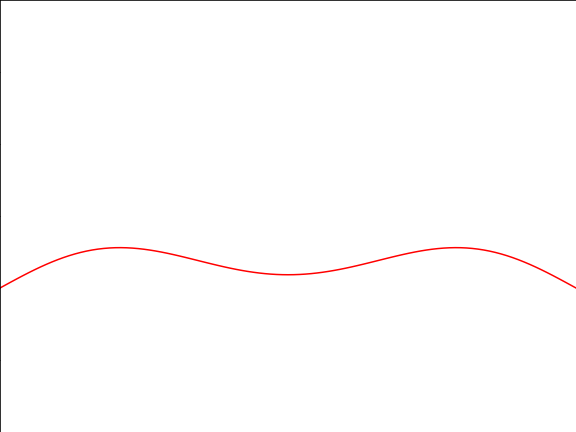
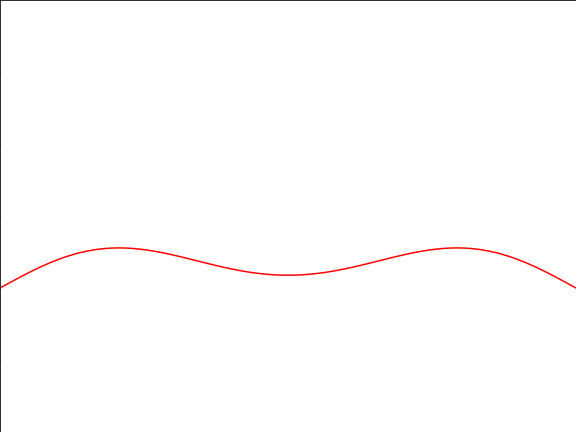
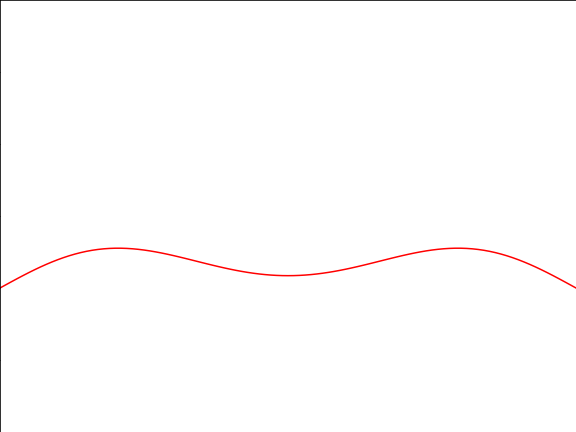
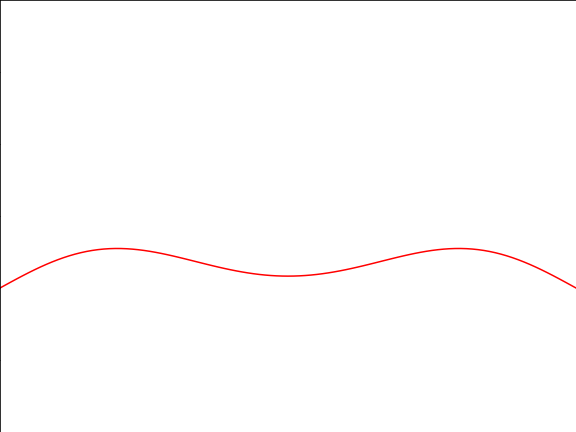
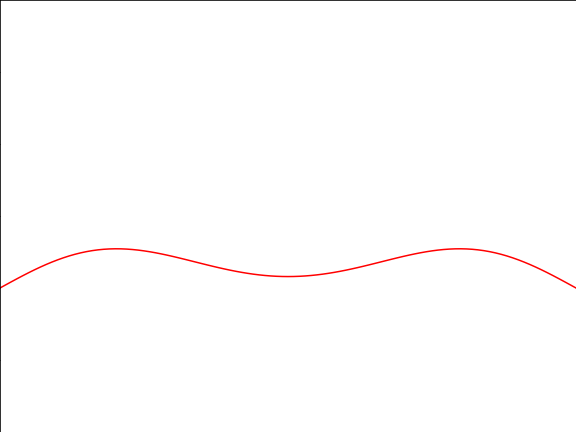
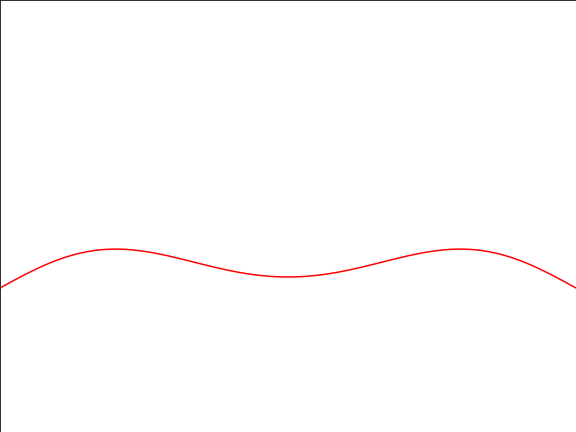
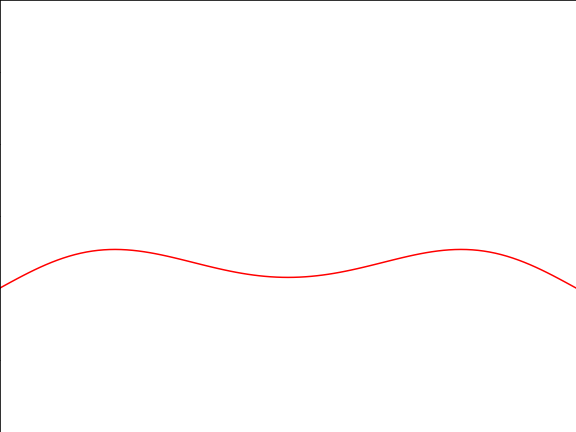
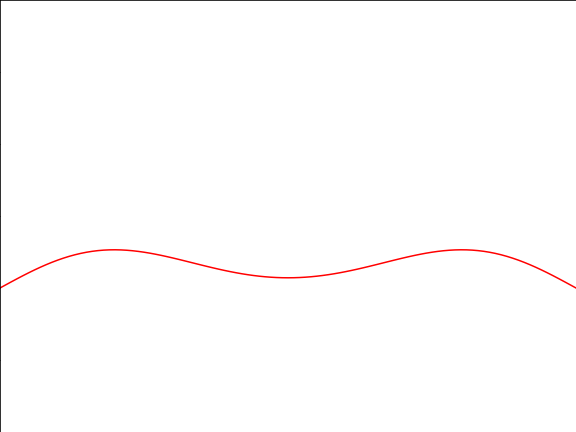
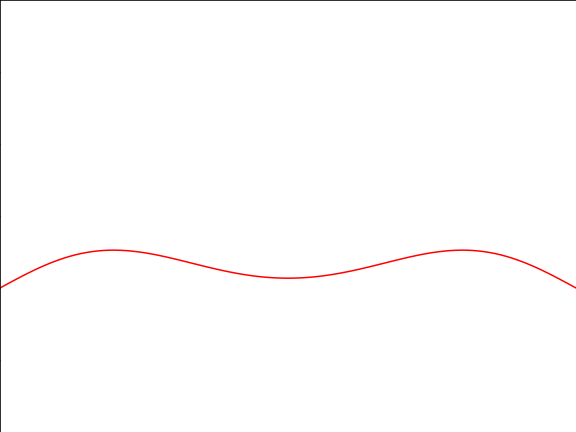
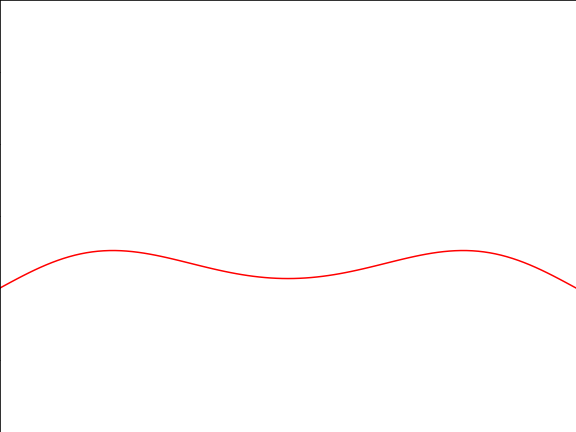
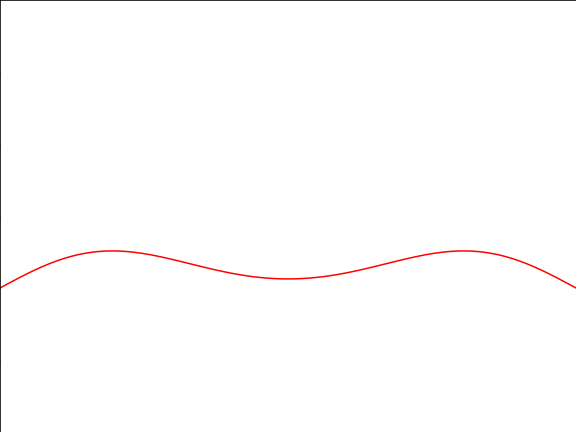
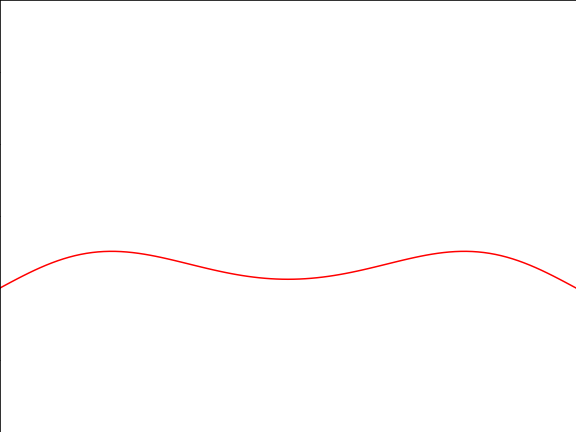
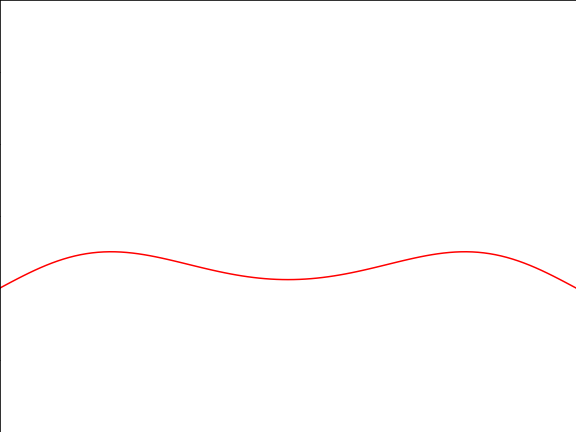
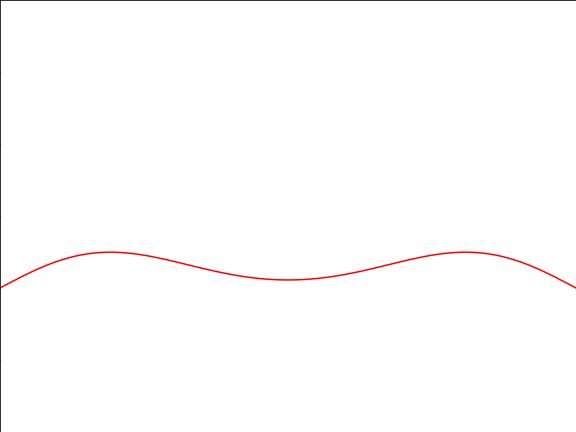
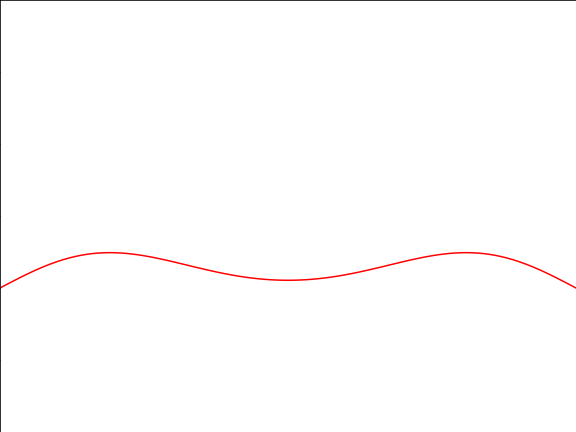
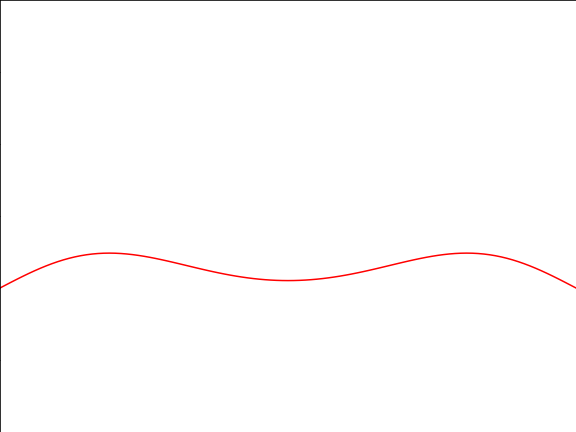
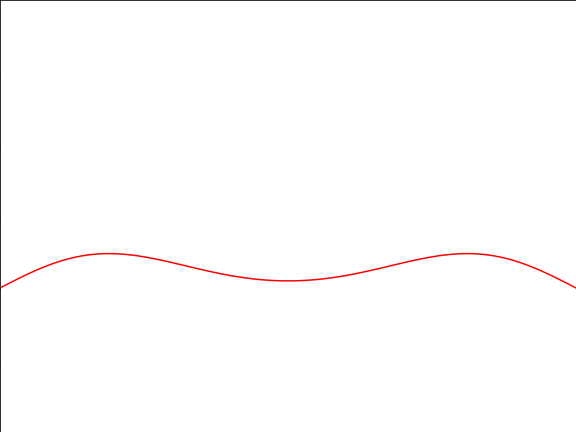
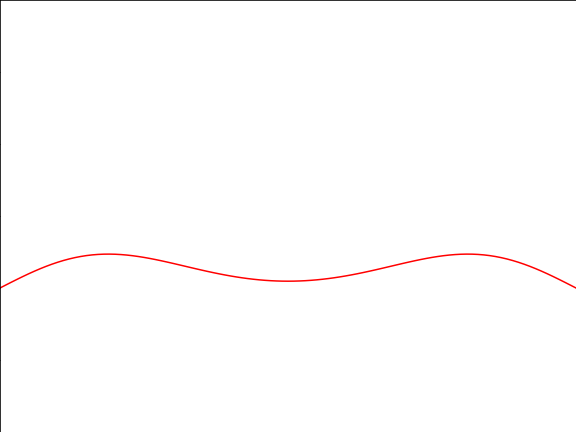
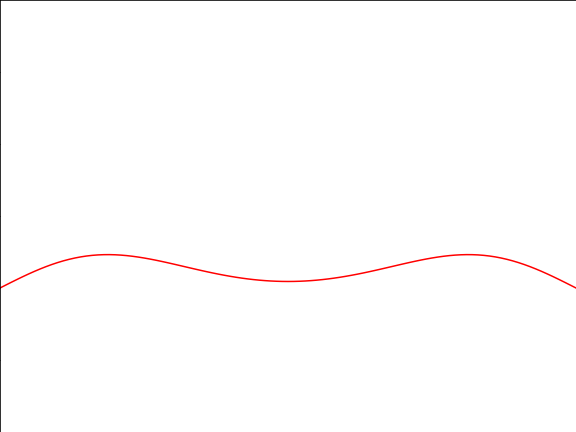
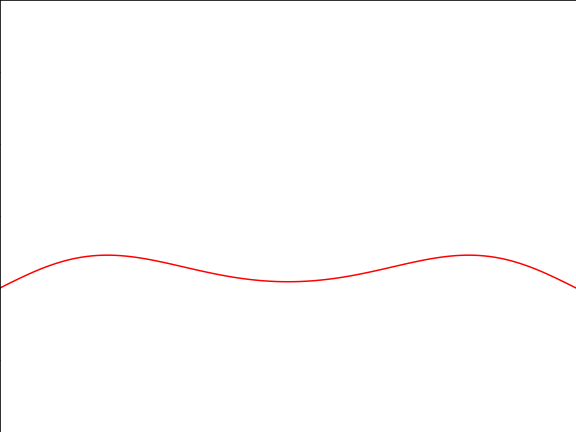
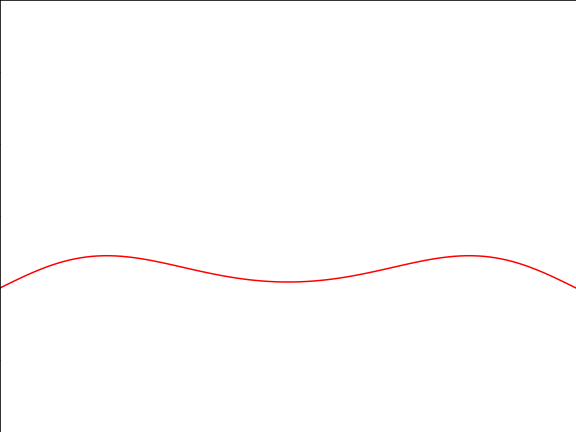
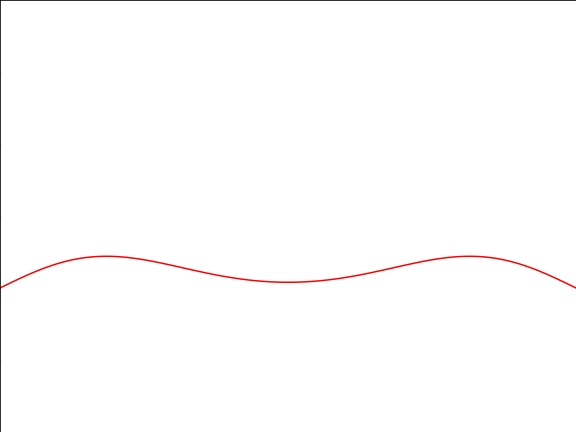
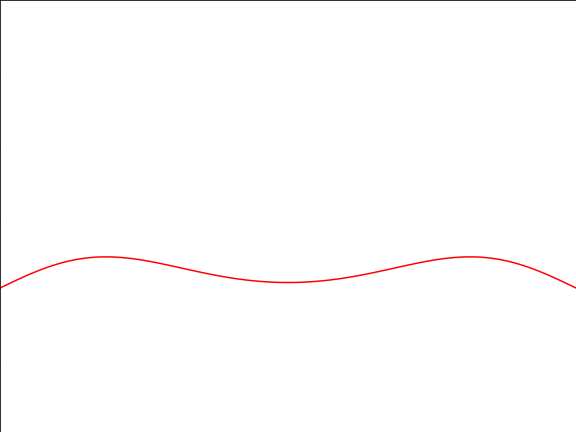
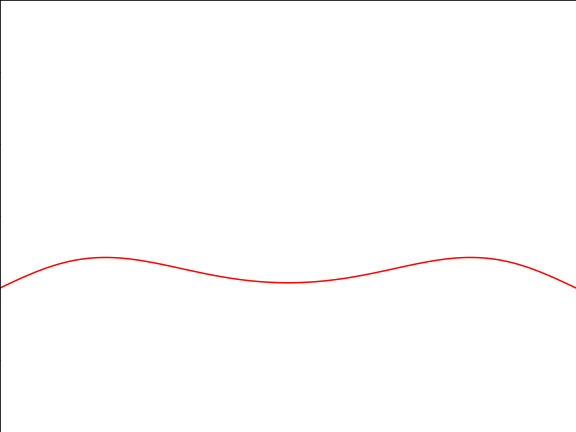
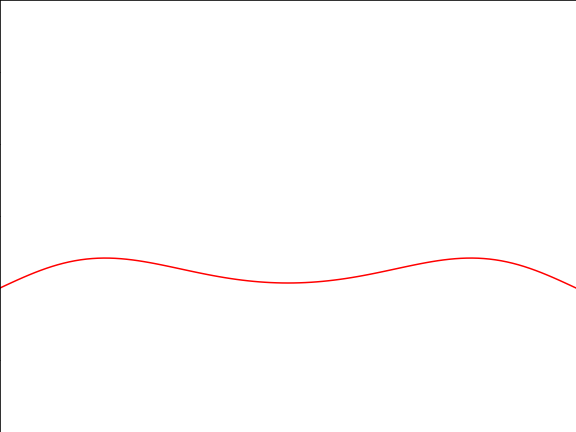
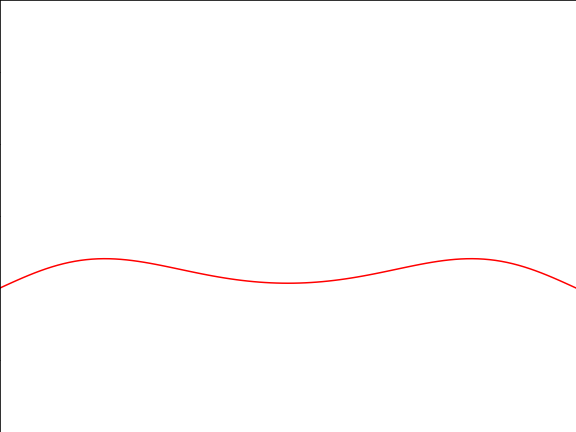
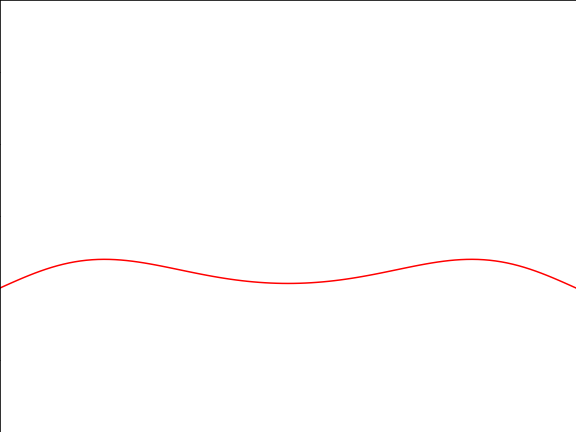
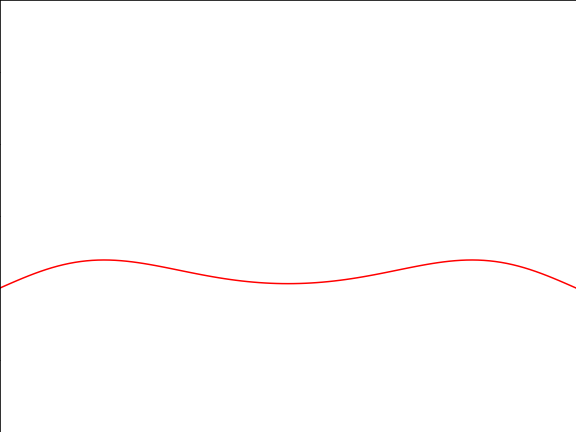
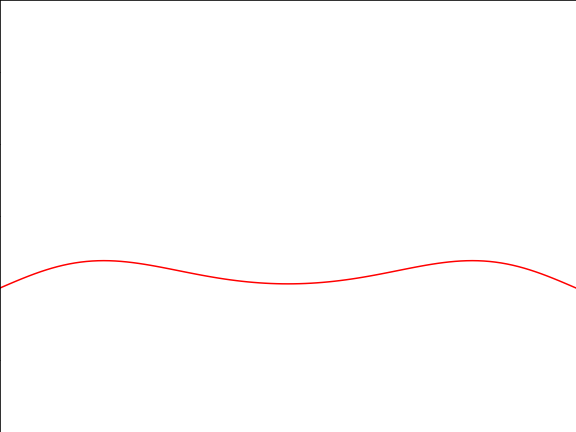
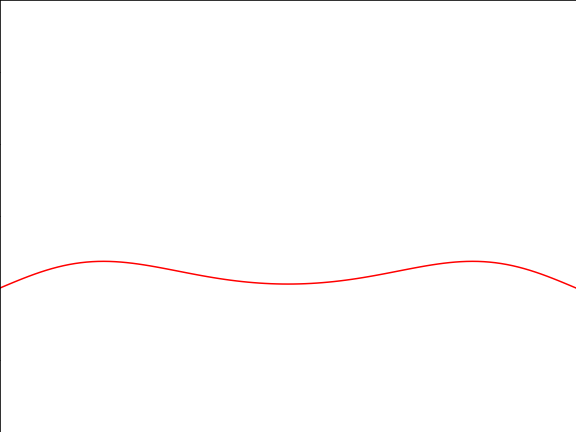
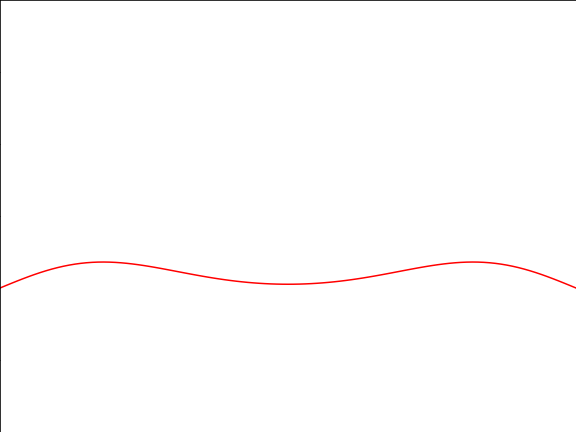
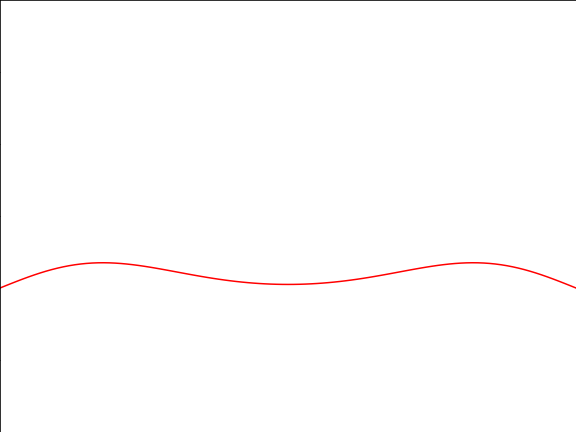
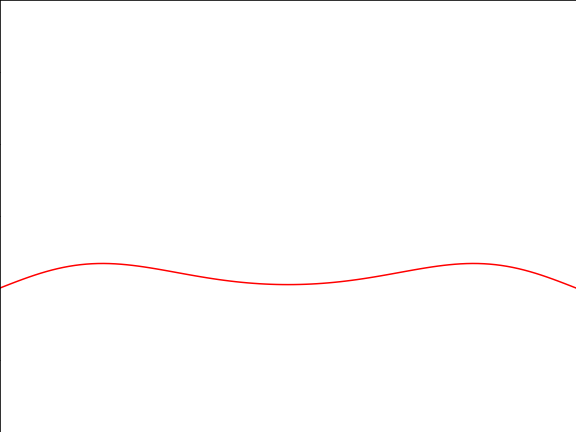
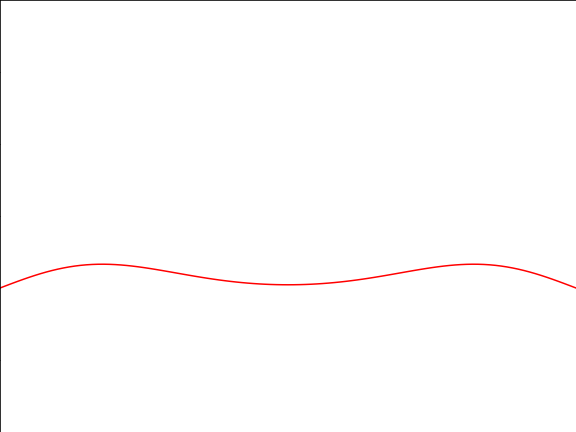
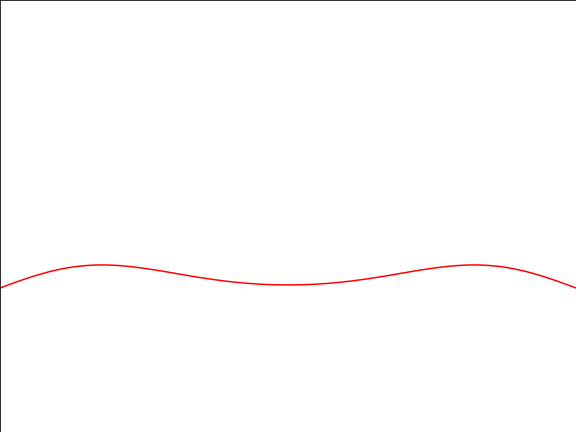
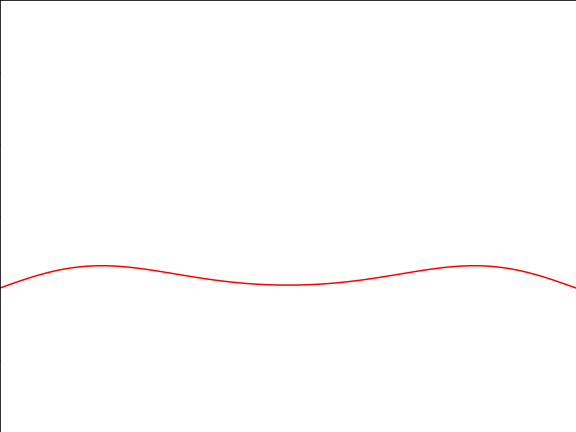
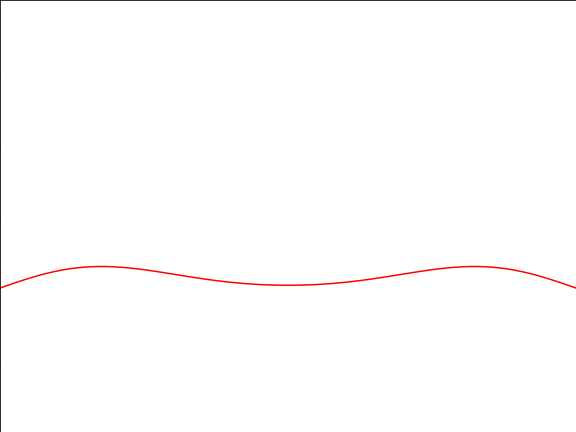
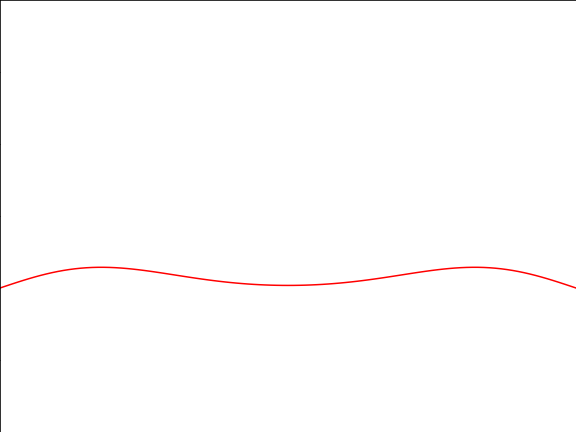
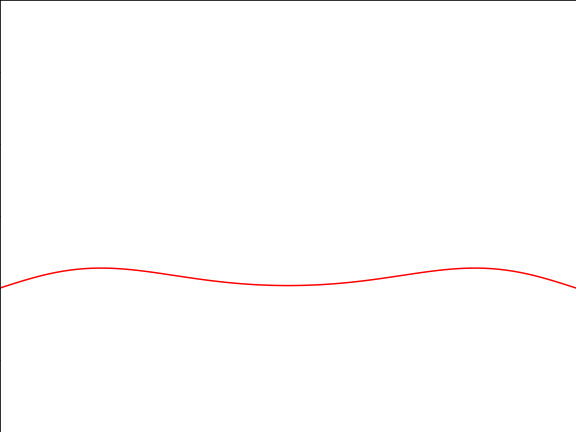
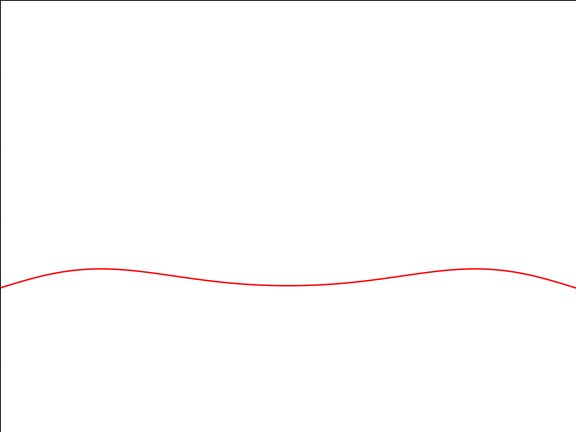
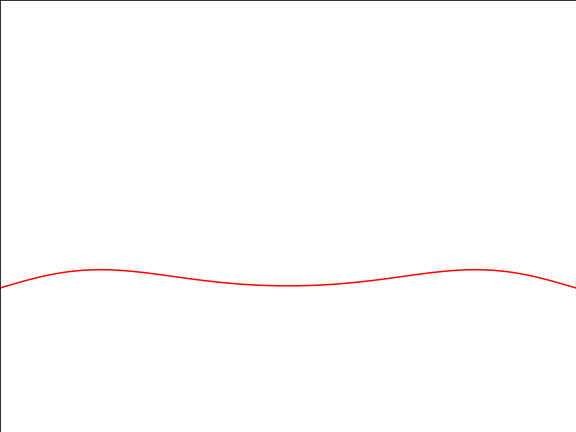
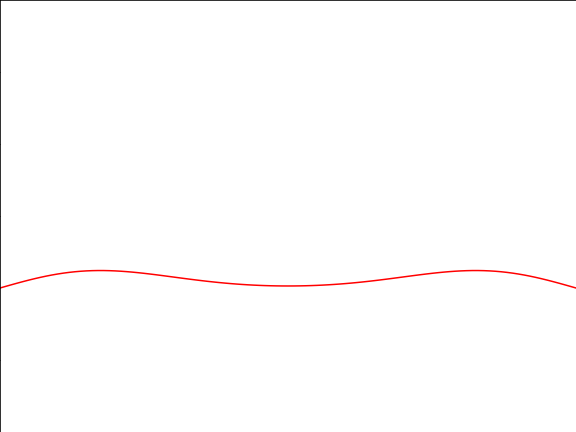
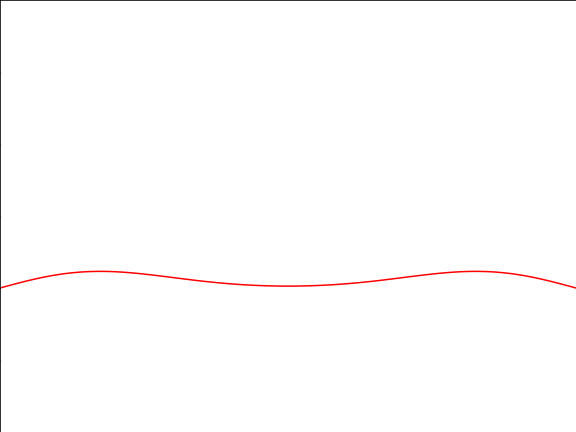
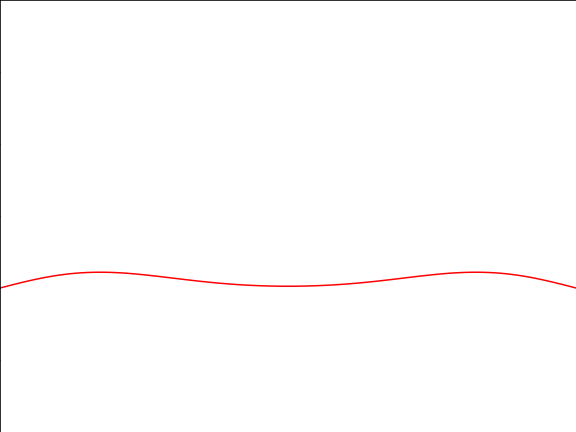
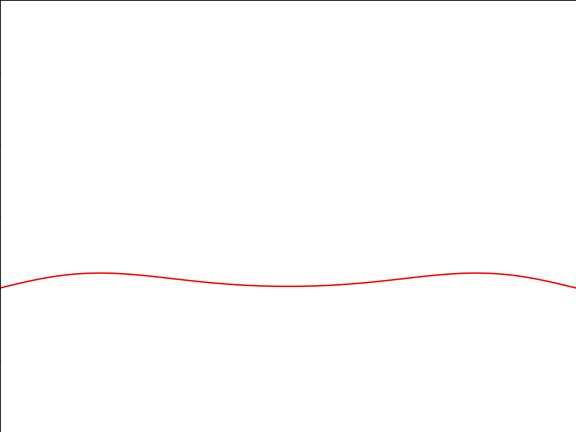
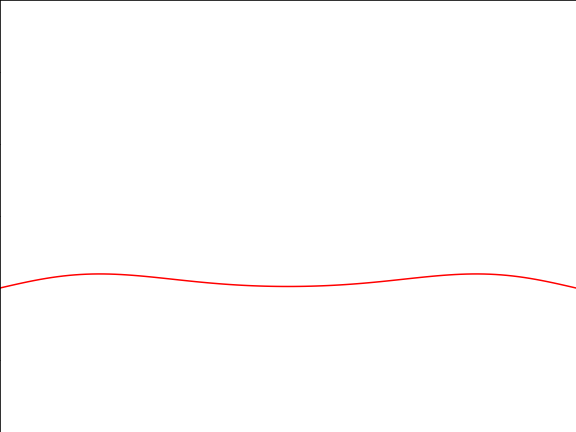
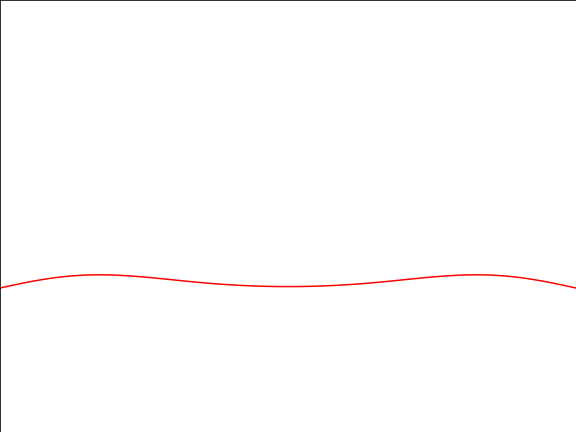
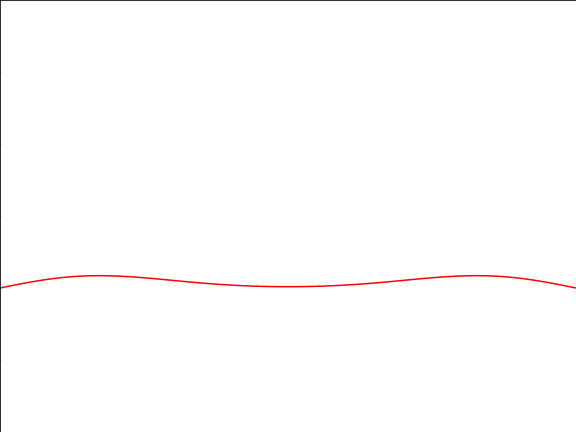
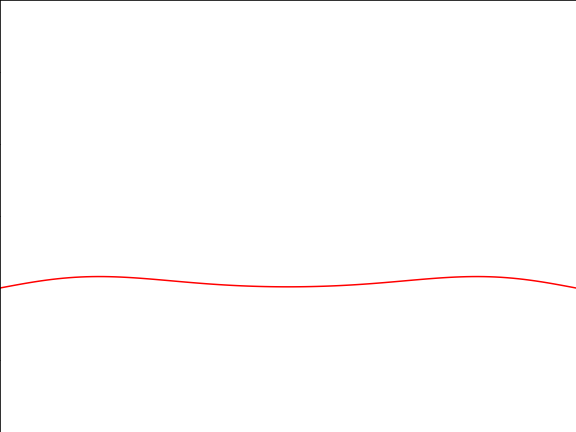
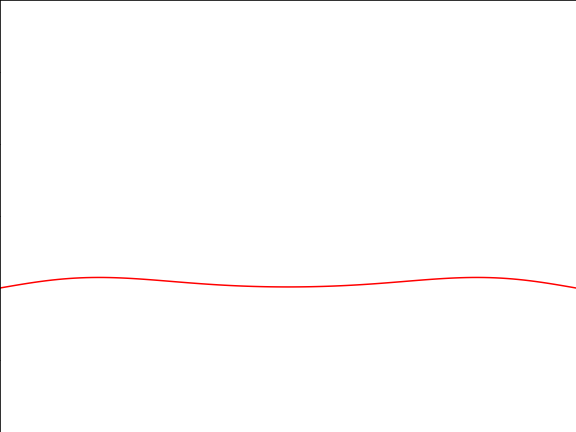
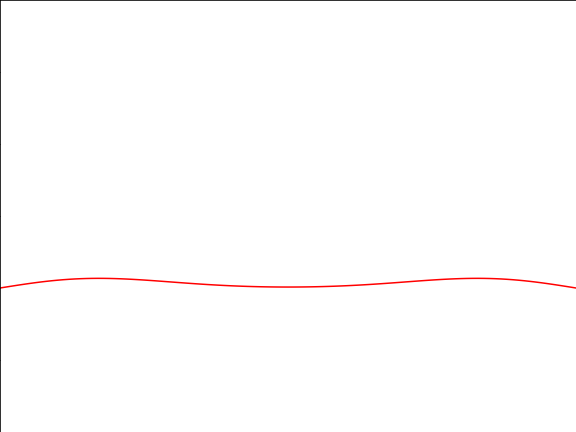
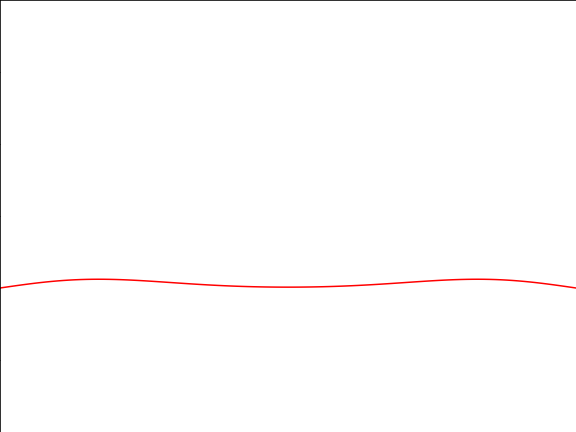
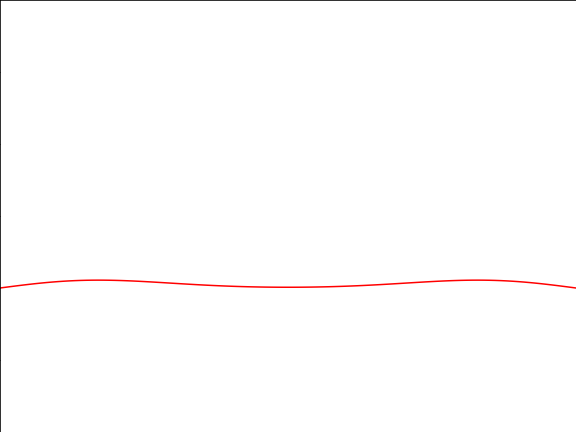
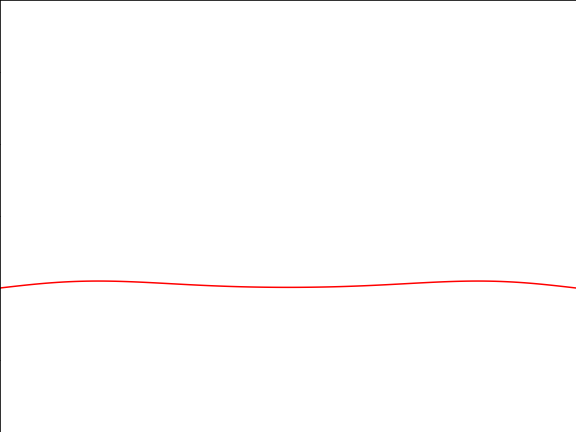
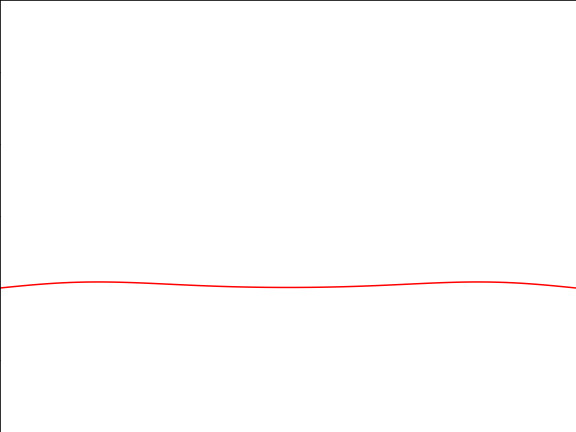
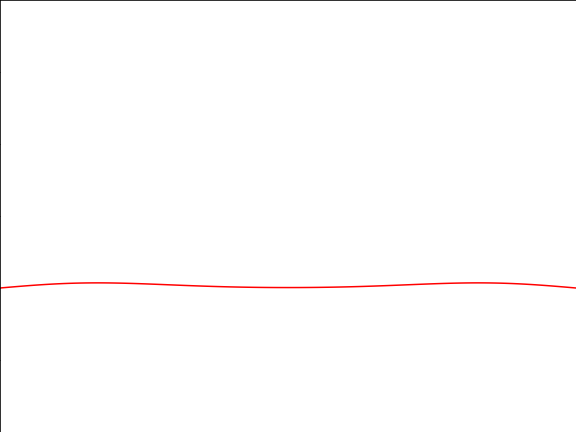
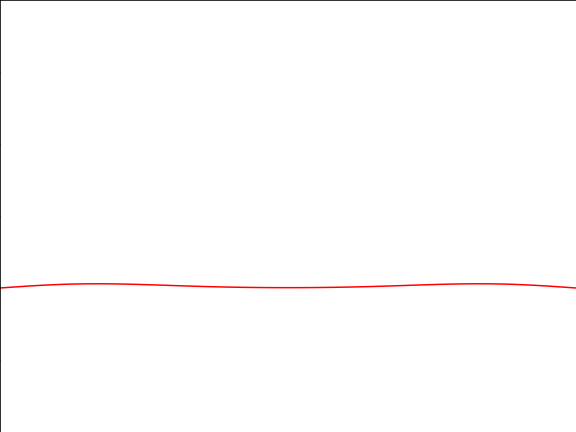
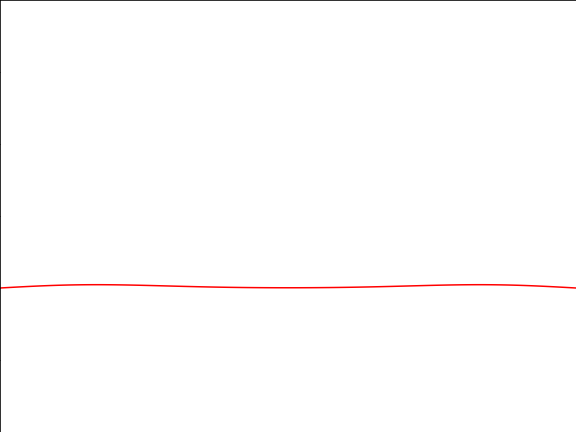
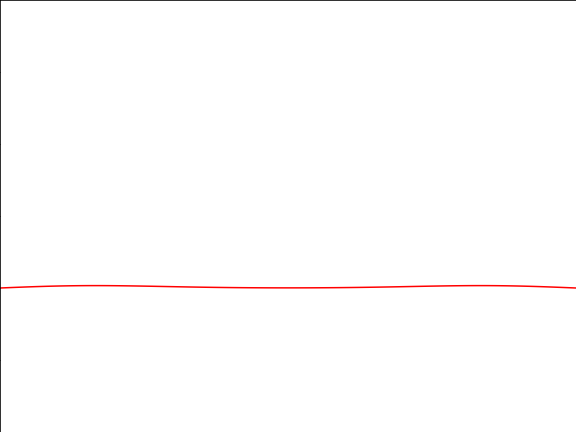
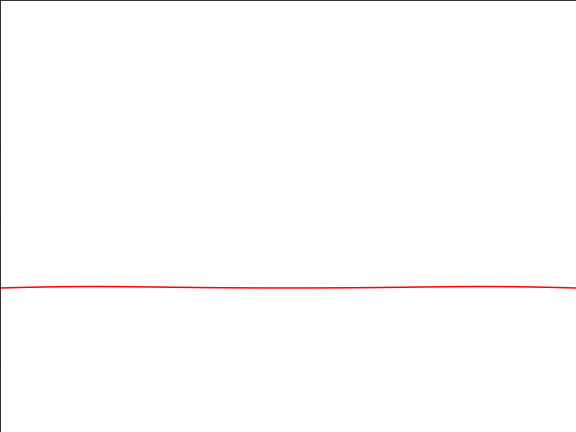
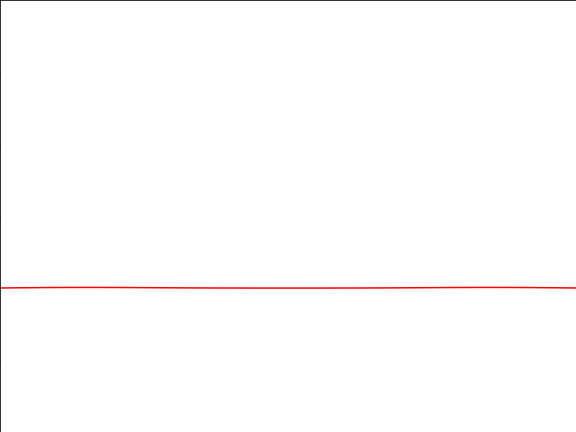
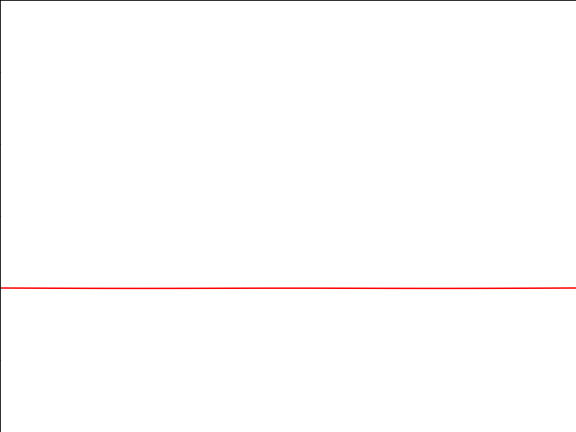
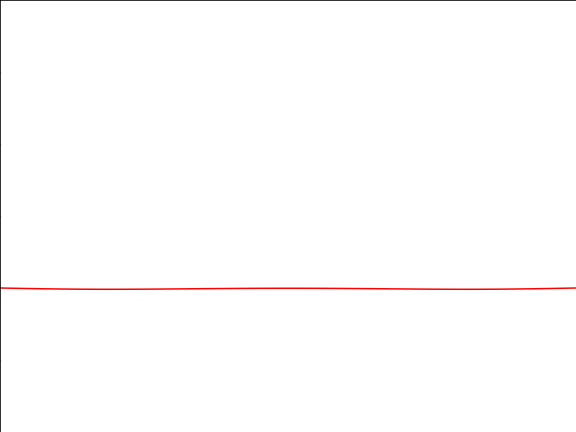
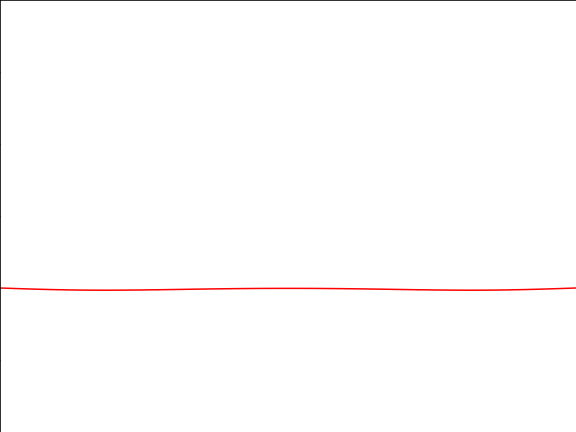
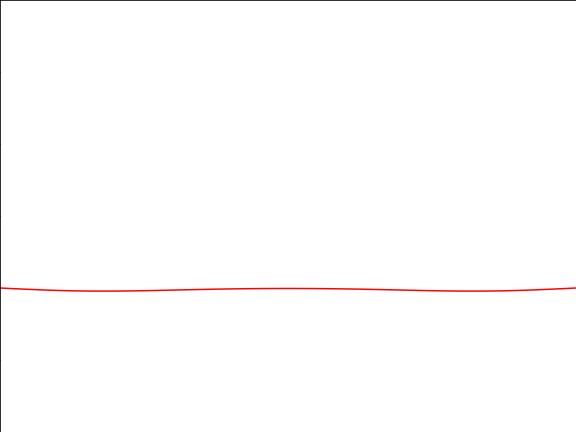
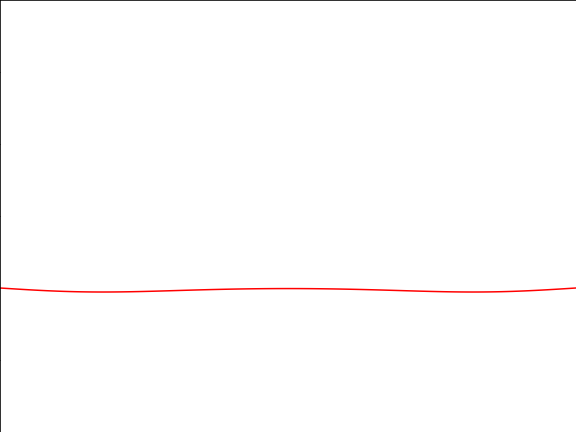
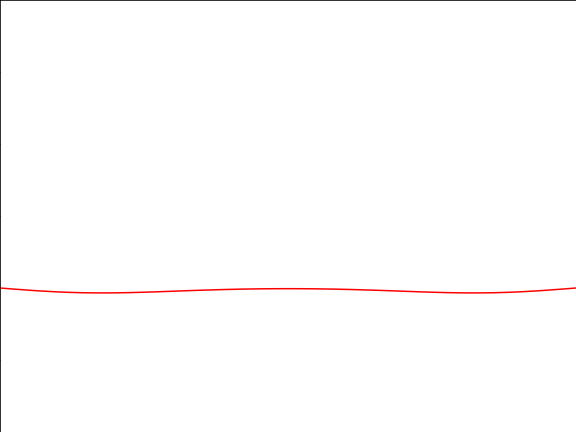
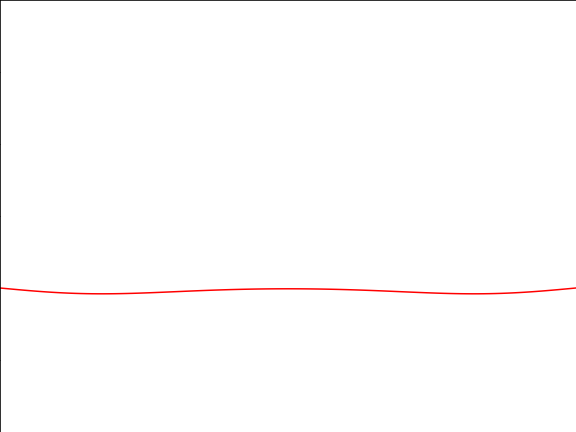
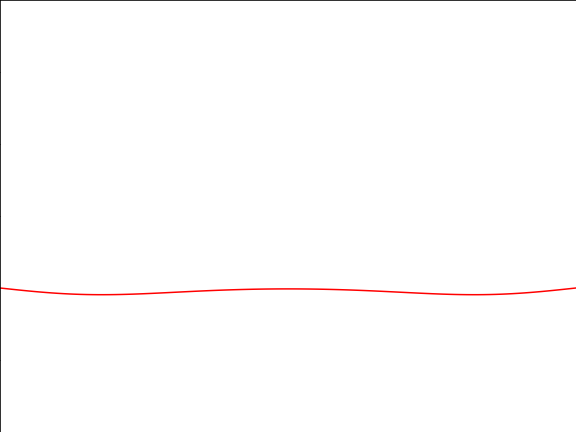
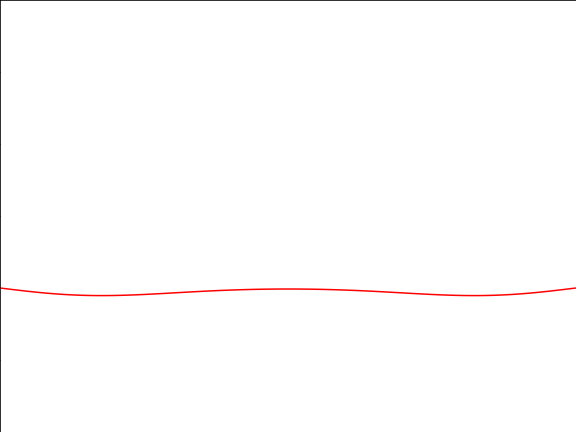
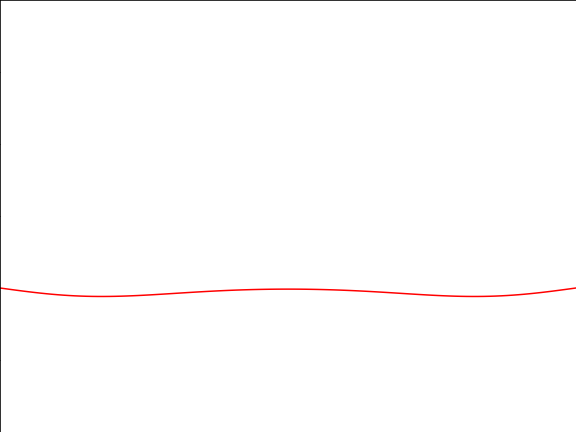
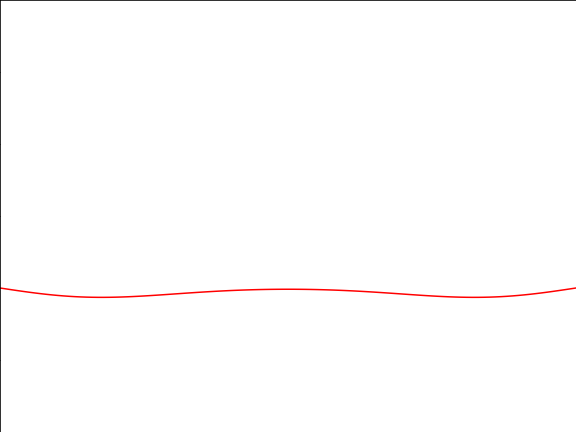
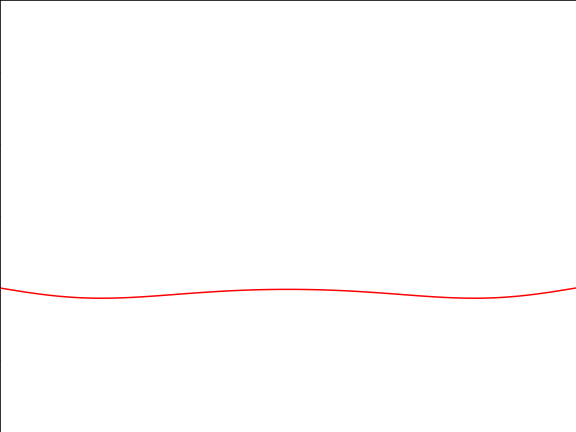
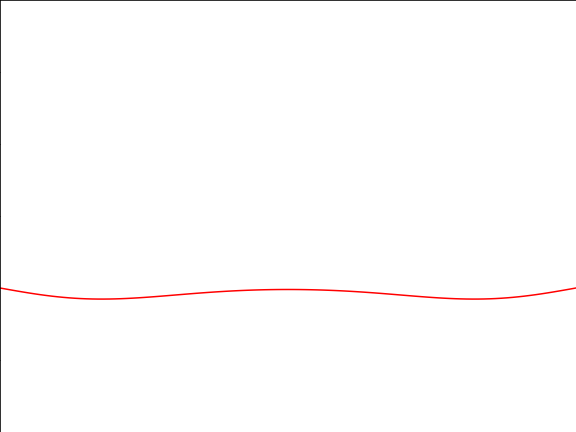
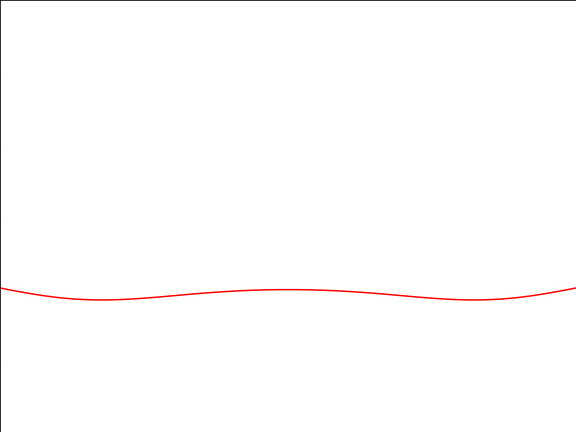
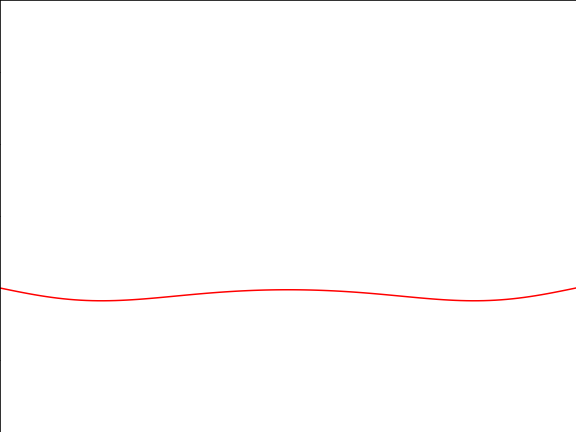
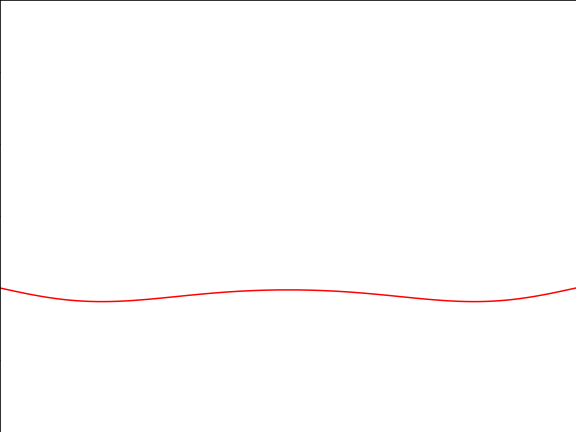
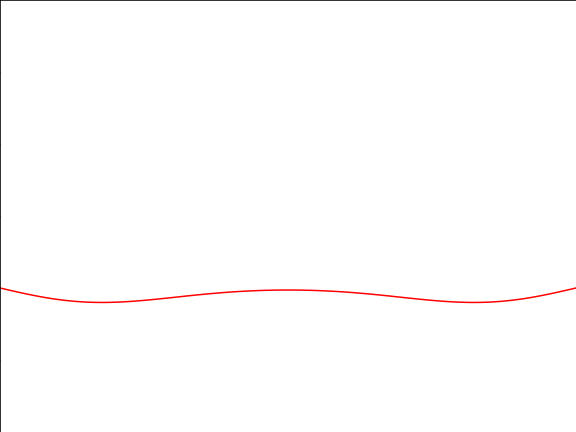
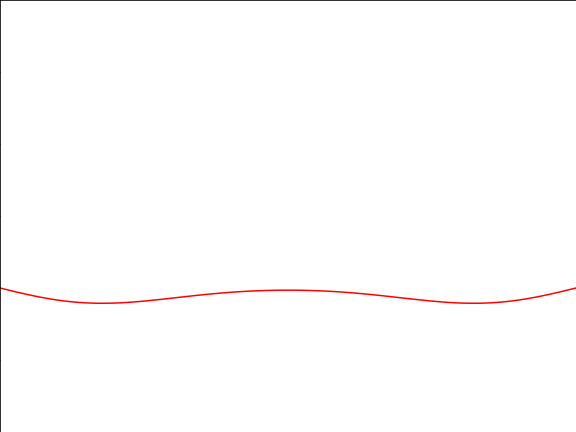
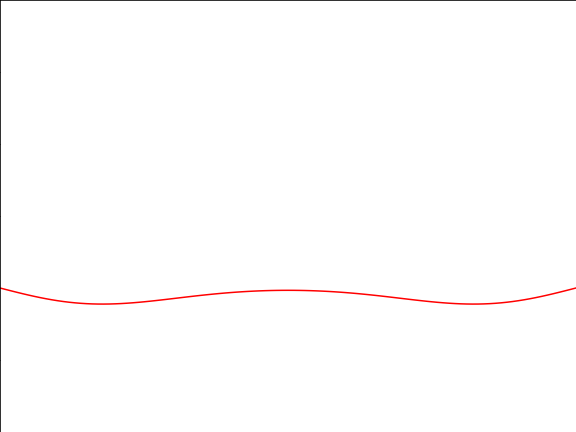
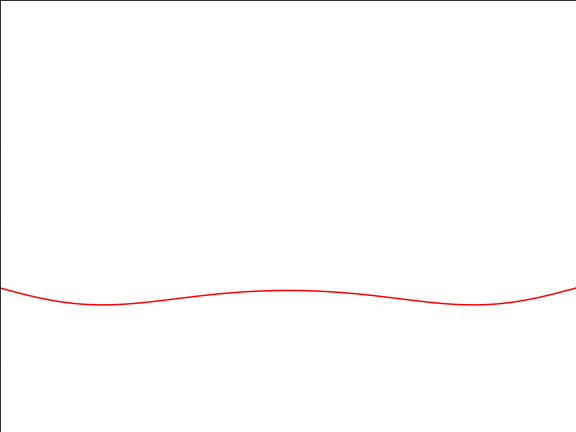
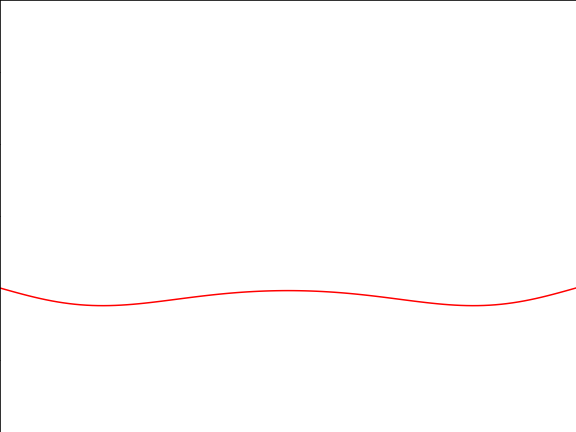
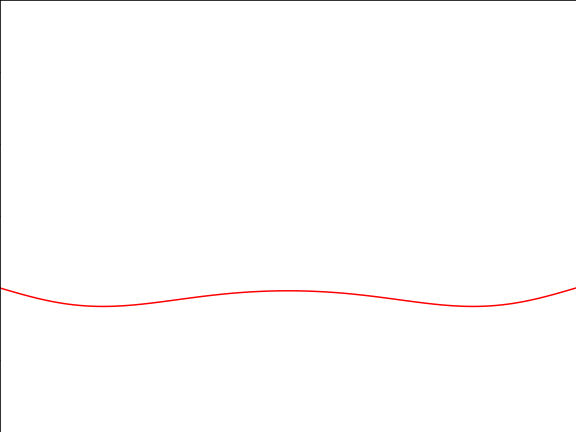
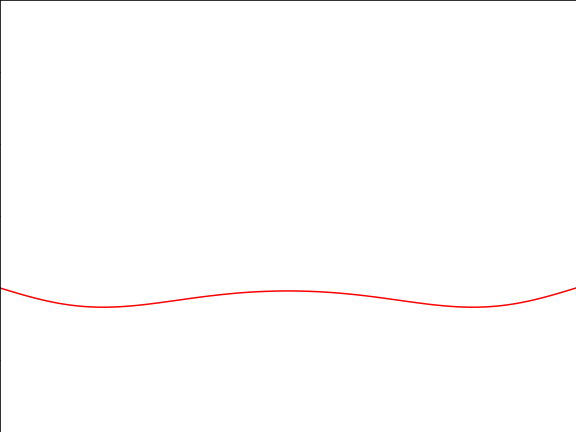
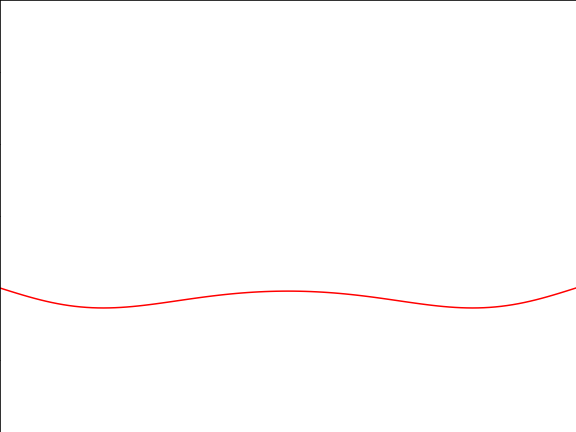
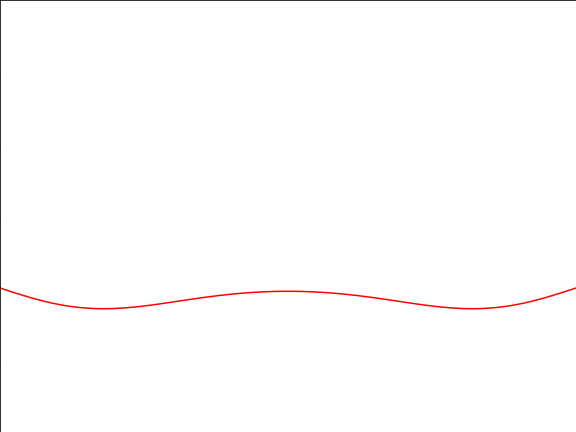
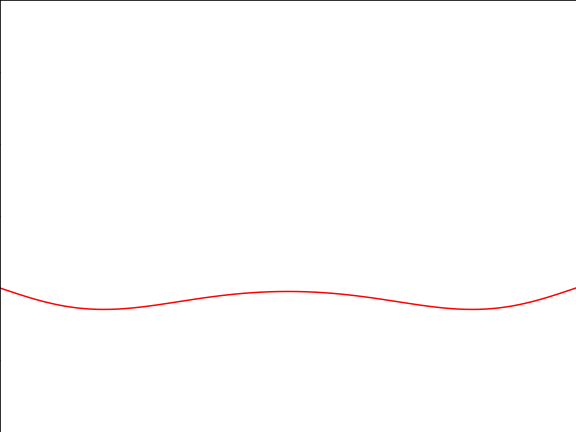
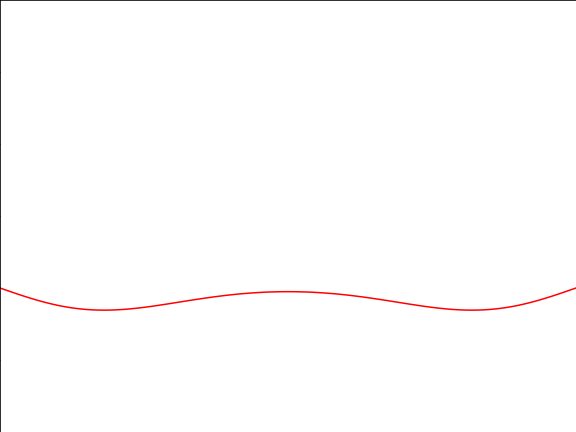
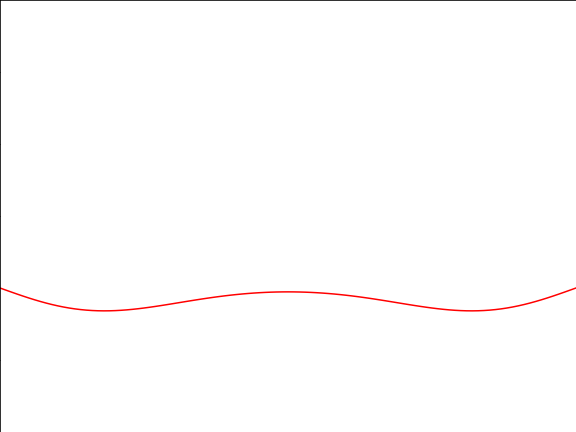
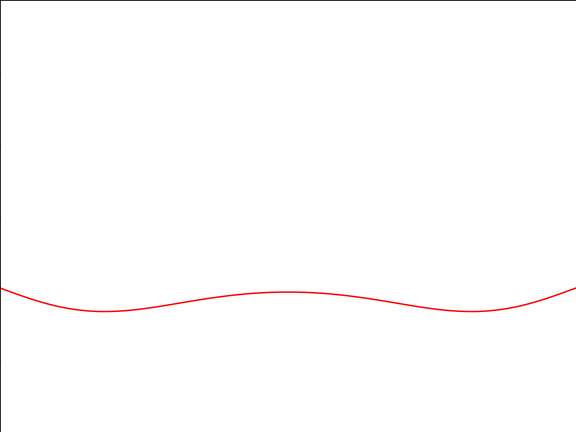
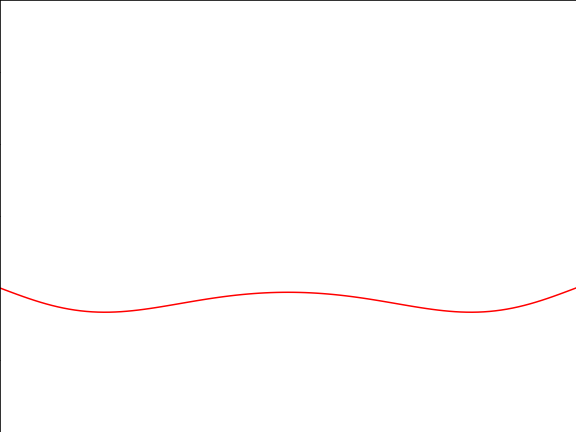
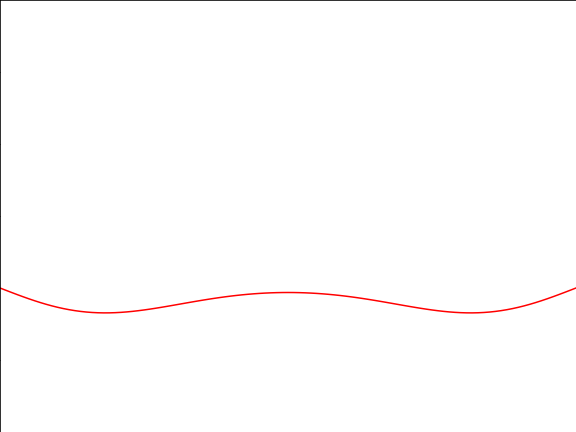
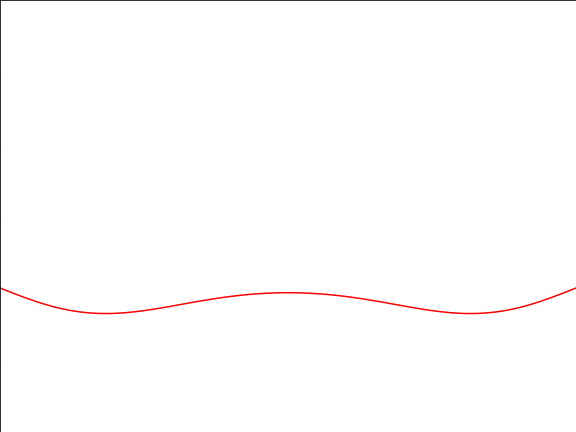
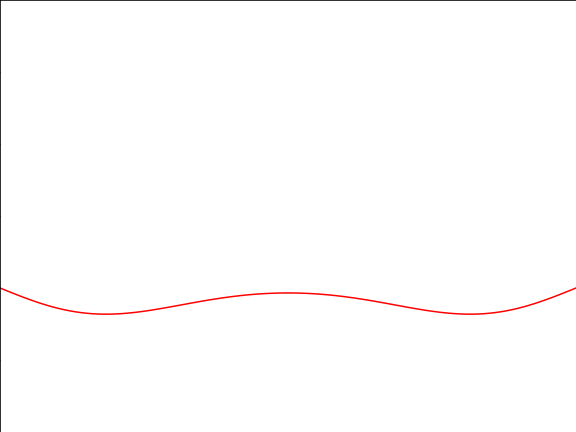
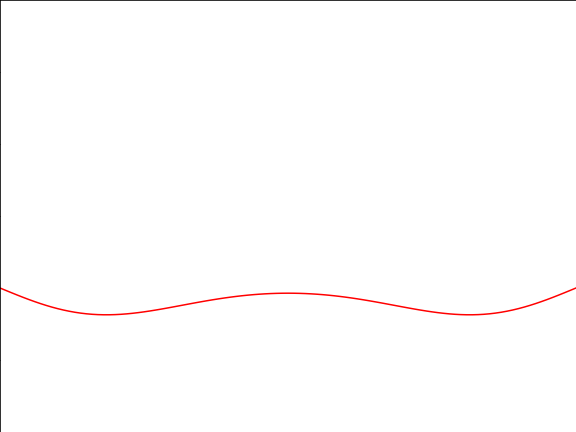

In [62]:
fig = plt.figure(figsize=(8, 6))
axis = fig.add_axes([0, 0, 1, 1])

def animate(i):
    axis.clear()
    axis.plot(x, result[i], 'r') #, x, result[1][i], 'b')
    axis.axis([a, b, -1, 2])

def init():
    axis.plot(x, result[0], 'r') #, x, result[1][0], 'b')
    axis.axis([a, b, -1, 2])


animation.FuncAnimation(fig, animate, frames=len(result), 
                        init_func=init,interval=300, blit=False)

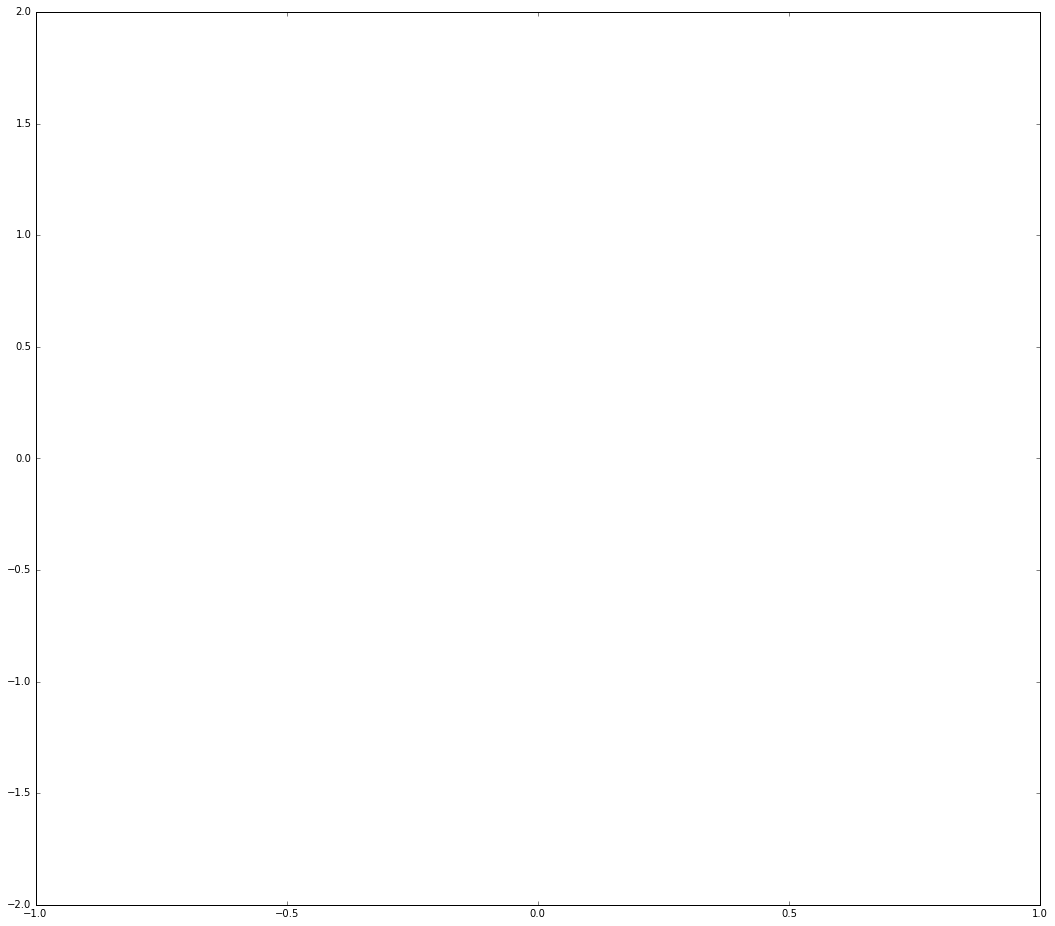

In [65]:
from matplotlib.animation import ArtistAnimation
fig = plt.figure(figsize=(18, 16)) 
ax  = fig.add_subplot(111) 

ax.set_xlim(-1, 1)
ax.set_ylim(-2,2)

images = []
for i in xrange(3*time):
    line, = ax.plot(x,result[i], '-')
    images.append((line,))
line_anim = ArtistAnimation(fig, images, interval=200, blit=False)
line_anim.save('2.mp4')